# Australia's Favourite Restaurants- DataFrames and Plots

An analysis of Australian dining habits using data from Zomato, Gourmet Traveller and the Good Food Guide.

PART ONE: Retrieving and cleaning Zomato Data

In [39]:
#Dependencies
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import gmaps
from api_key import apikey 
from api_key import g_key 
from pytrends.request import TrendReq
import scipy.stats as st
from scipy.stats import linregress
from collections import Counter
import time

In [16]:
#Set Search URL for Melbourne
search_url = f"https://developers.zomato.com/api/v2.1/search?entity_id=259&entity_type=city"

#Create Requests
print(requests.get(search_url, headers={"user-key" : apikey}))

#Get Data and Convert into JSON
data1 = requests.get(search_url, headers={"user-key" : apikey}).json()

#Get Total Restaurants
total_mel = data1["results_found"]

<Response [200]>


In [3]:
#Set Search URL for Sydney
search_url = f"https://developers.zomato.com/api/v2.1/search?entity_id=260&entity_type=city"

#Create Requests
print(requests.get(search_url, headers={"user-key" : apikey}))

#Get Data and Convert into JSON
data2 = requests.get(search_url, headers={"user-key" : apikey}).json()

#Get Total Restaurants
total_syd = data2["results_found"]

<Response [200]>


In [4]:
#Set Search URL for Perth
search_url = f"https://developers.zomato.com/api/v2.1/search?entity_id=296&entity_type=city"

#Create Requests
print(requests.get(search_url, headers={"user-key" : apikey}))

#Get Data and Convert into JSON
data3 = requests.get(search_url, headers={"user-key" : apikey}).json()

#Get Total Restaurants
total_per = data3["results_found"]

<Response [200]>


In [5]:
#Find Number of Restaurants 
resto_total = total_mel + total_syd + total_per 

#Print Number of Restaurants
print(f"The number of restaurants combined in Melbourne, Sydney and Perth is {resto_total}")

The number of restaurants combined in Melbourne, Sydney and Perth is 38810


In [6]:
#Set City IDs (Perth,Melbourne,Sydney,Brisbane,Adelaide,Gold Coast,Canberra(ACT),Newcastle,Wollongong,Logan City(Village),Geelong)
cityid = [296,259,260,298,297,2555,313,2246,2171,2493,1701]

#Create Empty Lists
rest_id_list = []
rest_name_list =[]
rest_cuis_list = []
rest_local_list = []
rest_city_list = []
rest_rate_list = []
rest_delivery_list = []
rest_ratenum_list = []
rest_lat_list = []
rest_long_list = []

resto_num = 20
loop_num = 0
show_page = 0

#Create For Loop
for citynum in cityid:
    search_url = f"https://developers.zomato.com/api/v2.1/search?entity_id={citynum}&entity_type=city&start={show_page}"
    data = requests.get(search_url, headers={"user-key" : apikey}).json()
    for page in range(5):
        for count in range(resto_num):
            try: 
                rest_id = data["restaurants"][count]["restaurant"]["id"]
                rest_name = data["restaurants"][count]["restaurant"]["name"]
                rest_cuis = data["restaurants"][count]["restaurant"]["cuisines"]
                rest_local = data["restaurants"][count]["restaurant"]["location"]["locality"]
                rest_city = data["restaurants"][count]["restaurant"]["location"]["city"]
                rest_lat = data["restaurants"][count]["restaurant"]["location"]["latitude"]
                rest_long = data["restaurants"][count]["restaurant"]["location"]["longitude"]
                rest_rate_num = data["restaurants"][count]["restaurant"]["all_reviews_count"]
                rest_rate = data["restaurants"][count]["restaurant"]["user_rating"]["aggregate_rating"]
                rest_delivery = data["restaurants"][count]["restaurant"]["highlights"]
                
                #Check if they Deliver 
                theydelivery = False
                for doesdelivery in rest_delivery:
                    if doesdelivery == 'Delivery':
                        theydelivery = True

                if theydelivery == True:
                    rest_delivery = "Yes"
                else:
                    rest_delivery = "No"

                #Append Results to List
                rest_id_list.append(rest_id)
                rest_name_list.append(rest_name)
                rest_cuis_list.append(rest_cuis)
                rest_local_list.append(rest_local)
                rest_city_list.append(rest_city)
                rest_rate_list.append(rest_rate)
                rest_ratenum_list.append(rest_rate_num)
                rest_delivery_list.append(rest_delivery)
                rest_lat_list.append(rest_lat)
                rest_long_list.append(rest_long)
                #Go to Next Page
                if count == 19:
                    show_page = show_page + 20
                    search_url = f"https://developers.zomato.com/api/v2.1/search?entity_id={citynum}&entity_type=city&start={show_page}"
                    data = requests.get(search_url, headers={"user-key" : apikey}).json()
                    count = 0
            except:
                print("error")
    count = 0
    page = 0
    show_page = 0


#Check for Errors
try:            
    restaurants_df = pd.DataFrame({
        "Restaurant ID":rest_id_list,
        "Name":rest_name_list,
        "Cuisine":rest_cuis_list,
        "Locality":rest_local_list,
        "City":rest_city_list,
        "Rating":rest_rate_list,
        "Total Number Ratings": rest_ratenum_list,
        "Delivery":rest_delivery_list,
        "Latitude":rest_lat_list,
        "Longitude":rest_long_list
    })
except:
    print(len(rest_id_list))
    print(len(rest_name_list))
    print(len(rest_cuis_list))
    print(len(rest_local_list))
    print(len(rest_city_list))
    print(len(rest_rate_list))
    print(len(rest_review_list))
    print(len(rest_delivery_list))

#Drop Duplicates
restaurants_df = restaurants_df.drop_duplicates()

#Print DataFrame
restaurants_df

Restaurant ID                        Name  \
0         16595766                   Balthazar   
1         16600038                Bib & Tucker   
2         16598976                      Marumo   
3         16597645                      Mrs. S   
4         18196379                       tbsp.   
...            ...                         ...   
1095      16604478  Kohinoor Indian Restaurant   
1096      16606497      The Geelong Boat House   
1097      16607360                Feed My Mojo   
1098      18397507    Rook : Sri Lankan Fusion   
1099      16605366                     Sushi 8   

                                   Cuisine         Locality     City Rating  \
0              European, Modern Australian        Perth CBD    Perth    4.5   
1             Modern Australian, Cafe Food  North Fremantle    Perth    4.1   
2     Japanese, Seafood, Modern Australian         Nedlands    Perth    4.9   
3                    Patisserie, Cafe Food         Maylands    Perth    4.5   
4      Sandwich, Coffee and Tea, Cafe Food        Bayswater    Perth    4.7   
...                                    ...              ...      ...    ...   
1095                                Indian      Geelong CBD  Geelong    3.8   
1096                               Seafood      Geelong CBD  Geelong    3.2   
1097  Coffee and Tea, Fast Food, Cafe Food          Belmont  Geelong    3.9   
1098                 Sri Lankan, Cafe Food      Geelong CBD  Geelong    3.8   
1099                       Japanese, Sushi      Geelong CBD  Geelong    3.9   

      Total Number Ratings Delivery        Latitude       Longitude  
0                      286       No  -31.9565943065  115.8581692725  
1                      692       No  -32.0284215000  115.7498293000  
2                      142       No  -31.9802157847  115.7966588438  
3                      643       No  -31.9286800875  115.8919624239  
4                      335       No  -31.9194560000  115.9096643000  
...                    ...      ...             ...             ...  
1095                    29       No  -38.1479230000  144.3637390000  
1096                    18       No  -38.1428964000  144.3605468000  
1097                    26       No  -38.1703540000  144.3485380000  
1098                    19      Yes  -38.1479093911  144.3625134230  
1099                    15       No  -38.1491644374  144.3595361710  

[1034 rows x 10 columns]

In [7]:
#Check for Number of Restaurants in each City
restaurants_df["City"].value_counts()

Brisbane              102
Gold Coast            100
Geelong               100
Perth                 100
ACT                   100
Newcastle             100
Adelaide              100
Wollongong            100
Sydney                 97
Melbourne              97
Eagle Heights           5
Ormeau                  4
Logan Village           3
Stapylton               3
Canungra                3
North Tamborine         3
Beaudesert              3
Tamborine Mountain      2
Tamborine               2
Alberton                1
Springbrook             1
Willow Vale             1
Mount Nathan            1
Jimboomba               1
Advancetown             1
Mt Tamborine            1
Mount Tamborine         1
Beechmont               1
Wongawallan             1
Name: City, dtype: int64

In [8]:
#Save DataFrame as CSV
restaurants_df = restaurants_df.drop_duplicates()
restaurants_df.to_csv("multi_restaurant_data.csv", encoding="utf-8", index=False)

In [9]:
#Number of Restaurants that Deliver
restaurants_df["Delivery"].value_counts()

No     960
Yes     74
Name: Delivery, dtype: int64

In [13]:
#Run this code to set dataframe by defined city otherwise skip this cell
print ("Enter a city to be analyzed or enter <ALL> to get all cities")
getcity = input ("Input: ")
if getcity != "ALL":
    multi_df = multi_df.loc[multi_df["City"].str.contains(getcity, case = False)]
    print (f"Getting restaurant details in {getcity}")
    
else:
    print ("Getting restaurant details in all of the cities in csv file.....")
    print ("Done")
    
#Print Results    
multi_df

Enter a city to be analyzed or enter <ALL> to get all cities
Input: Sydney
Getting restaurant details in Sydney


Restaurant ID                            Name  \
197       18241437                 KOI Dessert Bar   
198       16564875  The Grounds of Alexandria Cafe   
199       16564139                  Café Cre Asion   
200       18347530             Kobe Wagyu Yakiniku   
201       16566986                           Devon   
..             ...                             ...   
289       16558672           Pancakes On The Rocks   
290       18518832         The Grounds of the City   
291       18494965                          Sasaki   
292       16560405                 Cook & Archie's   
293       16559582                    Spice Temple   

                                               Cuisine  \
197                        Desserts, Modern Australian   
198             Coffee and Tea, Salad, Poké, Cafe Food   
199                Desserts, Cafe Food, Coffee and Tea   
200  Japanese BBQ, BBQ, Healthy Food, Japanese, Sea...   
201                          Coffee and Tea, Cafe Food   
..                                                 ...   
289  Grill, Desserts, Pizza, Cafe Food, Coffee and Tea   
290                          Cafe Food, Coffee and Tea   
291                                           Japanese   
292       Modern Australian, Coffee and Tea, Cafe Food   
293                           Chinese, Fusion, Yum Cha   

                                  Locality    City  Rating  \
197         Kensington Street, Chippendale  Sydney     4.7   
198  The Grounds of Alexandria, Alexandria  Sydney     4.4   
199                                    CBD  Sydney     4.8   
200                                    CBD  Sydney     4.5   
201                            Surry Hills  Sydney     4.5   
..                                     ...     ...     ...   
289                              The Rocks  Sydney     4.1   
290                                    CBD  Sydney     4.2   
291                                    CBD  Sydney     4.3   
292                            Surry Hills  Sydney     4.3   
293                                    CBD  Sydney     4.3   

     Total Number Ratings Delivery   Latitude   Longitude  
197                   451       No -33.885540  151.201767  
198                  1242       No -33.911067  151.194125  
199                   415       No -33.877972  151.210655  
200                   633       No -33.877733  151.205456  
201                   583       No -33.886173  151.207685  
..                    ...      ...        ...         ...  
289                   324       No -33.858658  151.208448  
290                   243       No -33.872159  151.207034  
291                    67       No -33.878001  151.210500  
292                   113       No -33.886743  151.207806  
293                   244       No -33.866122  151.210003  

[97 rows x 10 columns]

In [17]:
#Sort by Rating then Total Number of Ratings
multi_df.sort_values(by=["Rating","Total Number Ratings"] ,inplace=True, ascending = False)

#Drop Null Values
multi_df.dropna(inplace=True)

#Print DataFrame
multi_df.head(10)

Restaurant ID                       Name  \
210       16558798                       Quay   
237       16562433             Cow & The Moon   
229       16559171                  Tetsuya's   
211       15547004          Restaurant Hubert   
268       16568476  La Mamma del Gelato Anita   
228       16569454          LuMi Bar & Dining   
261       15545439        Manpuku - Chatswood   
248       16566535      Lorraine's Patisserie   
202       16564570                      Sokyo   
199       16564139             Café Cre Asion   

                                 Cuisine                   Locality    City  \
210                    Modern Australian              Circular Quay  Sydney   
237  Ice Cream, Desserts, Coffee and Tea                     Enmore  Sydney   
229                             Japanese                        CBD  Sydney   
211                     French, European                        CBD  Sydney   
268                            Ice Cream  Central Park, Chippendale  Sydney   
228                    Italian, Japanese                    Pyrmont  Sydney   
261                      Japanese, Ramen                  Chatswood  Sydney   
248                     Desserts, Bakery                   Ivy, CBD  Sydney   
202                             Japanese          The Star, Pyrmont  Sydney   
199  Desserts, Cafe Food, Coffee and Tea                        CBD  Sydney   

     Rating  Total Number Ratings Delivery   Latitude   Longitude  
210     4.9                   452       No -33.858029  151.209970  
237     4.9                   356       No -33.899000  151.172029  
229     4.9                   330       No -33.875136  151.204968  
211     4.9                   232       No -33.865381  151.210490  
268     4.9                   231       No -33.885072  151.200472  
228     4.9                   197       No -33.866905  151.197397  
261     4.9                   196       No -33.794394  151.189557  
248     4.9                   111       No -33.866612  151.207703  
202     4.8                   574       No -33.869555  151.195900  
199     4.8                   415       No -33.877972  151.210655

In [21]:
#Create Empty Lists for all Cuisines
cuisine_list = []

#Create For Loop
for index, row in multi_df.iterrows():
    cuiser = row["Cuisine"]
    cuiser = cuiser.split(", ")
    for cuisine in cuiser:
        cuisine_list.append(cuisine)

In [22]:
#Count Duplicated Cuisines in the list
cuisine_count = dict(Counter(cuisine_list))
cuis_df = pd.DataFrame({"Cuisine Count":cuisine_count})
cuis_df.sort_values(by=['Cuisine Count'], inplace=True, ascending = False)
cuis_df = cuis_df.head(6)
print(cuis_df)

#Drop Coffee and Tea as it is a subset of Cafe Food
cuis_df = cuis_df.drop(cuis_df.index[1])

#Get Top Cuisine
top_cuis = cuis_df.head(1)
for topcuisine in top_cuis.index:
    top_cuis = topcuisine

                   Cuisine Count
Coffee and Tea                34
Cafe Food                     31
Japanese                      22
Modern Australian             15
Desserts                      11
Asian                          8


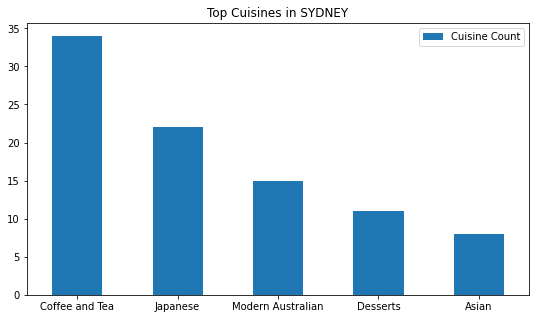

In [23]:
#Plot Bar Graph depending on Choice
if getcity != "ALL":
    plot_title = getcity.upper()
else:
    plot_title = "Australia's Biggest Cities"

#Create Plot
cuis_df.plot(kind = "bar",align="center",rot=360,subplots=True,figsize = (9,5))

#Label Title
plt.title(f"Top Cuisines in {plot_title}")

#Save as PNG
plt.savefig(f"Images/Top Cuisines in {plot_title}.png")

In [24]:
#Create Empty Lists
index_to_drop = []

#Create For Loop
for index, row in multi_df.iterrows():
    #Split Cuisine cell
    cuiser = row["Cuisine"]
    cuiser = cuiser.split(", ")
    cf = False
    #Isolate to show only Cafe Food
    for cuisine in cuiser:
        if cuisine == top_cuis:
            cf = True
    if cf == False:
        index_to_drop.append(index)
new_multi_df = multi_df.drop(index_to_drop)

#Print DataFrame
new_multi_df

Restaurant ID                            Name  \
237       16562433                  Cow & The Moon   
199       16564139                  Café Cre Asion   
221       16558268  La Renaissance Cafe Patisserie   
240       16563677                           Circa   
253       18220980               Black Star Pastry   
225       16566463                    Rustic Pearl   
263       16559258                            Trio   
265       16568015                Social Brew Cafe   
222       16560990               Black Star Pastry   
209       16557398            Bourke Street Bakery   
234       16568099                   Cuckoo Callay   
274       16559009                        Single O   
201       16566986                           Devon   
264       16562652                  Mad Spuds Cafe   
219       15545104                    Cafe Oratnek   
244       16561309                        Revolver   
277       18381614                          Auvers   
198       16564875  The Grounds of Alexandria Cafe   
206       16567840                  Three Williams   
236       16568165                Brewtown Newtown   
243       16566547                      Oh! Matcha   
245       15546911                    Flower Child   
287       16563607                     The Pie Tin   
227       16567979               Celsius Coffee Co   
281       16564601              The Wedge Espresso   
239       16564828                    Reuben Hills   
217       15544559          Haven Specialty Coffee   
238       18394951                    Cuppa Flower   
292       16560405                 Cook & Archie's   
262       16567674    The Paramount Coffee Project   
273       15546922                  Social Hideout   
290       18518832         The Grounds of the City   
250       17742790                       Meet Mica   
289       16558672           Pancakes On The Rocks   

                                               Cuisine  \
237                Ice Cream, Desserts, Coffee and Tea   
199                Desserts, Cafe Food, Coffee and Tea   
221  Desserts, Bakery, French, Patisserie, Cafe Foo...   
240                          Cafe Food, Coffee and Tea   
253                   Bakery, Desserts, Coffee and Tea   
225                 Turkish, Cafe Food, Coffee and Tea   
263  Mediterranean, Cafe Food, Coffee and Tea, Aust...   
265                          Cafe Food, Coffee and Tea   
222                   Bakery, Desserts, Coffee and Tea   
209        Cafe Food, Bakery, Desserts, Coffee and Tea   
234                          Coffee and Tea, Cafe Food   
274                          Cafe Food, Coffee and Tea   
201                          Coffee and Tea, Cafe Food   
264  Irish, Healthy Food, Salad, Cafe Food, Coffee ...   
219         Japanese, Asian, Cafe Food, Coffee and Tea   
244                          Coffee and Tea, Cafe Food   
277  Cafe Food, Coffee and Tea, Asian Fusion, Moder...   
198             Coffee and Tea, Salad, Poké, Cafe Food   
206                          Cafe Food, Coffee and Tea   
236                          Cafe Food, Coffee and Tea   
243                Japanese, Cafe Food, Coffee and Tea   
245                  Bakery, Cafe Food, Coffee and Tea   
287                             Bakery, Coffee and Tea   
227                          Cafe Food, Coffee and Tea   
281                          Coffee and Tea, Cafe Food   
239           Cafe Food, Coffee and Tea, Fried Chicken   
217                          Cafe Food, Coffee and Tea   
238                          Cafe Food, Coffee and Tea   
292       Modern Australian, Coffee and Tea, Cafe Food   
262                          Cafe Food, Coffee and Tea   
273  Juices, Desserts, Modern Australian, Salad, Co...   
290                          Cafe Food, Coffee and Tea   
250  Healthy Food, Seafood, Fusion, Japanese, Conte...   
289  Grill, Desserts, Pizza, Cafe Food, Coffee and Tea   

                                  Locality    City  Rating  \
237                  

In [25]:
#Create DataFrame depending on Choice
if getcity == "ALL":
    city = input(f"Enter a city to get {top_cuis} Top 10 restaurant recommendations: ")
    recommendation_df = new_multi_df.loc[new_multi_df["City"].str.contains(city, case = False)]
    recommendation_df = recommendation_df.head(10)
else:
    recommendation_df = new_multi_df.loc[new_multi_df["City"].str.contains(getcity, case = False)]
    recommendation_df = recommendation_df.head(10)

#Print DataFrame    
recommendation_df

Restaurant ID                            Name  \
237       16562433                  Cow & The Moon   
199       16564139                  Café Cre Asion   
221       16558268  La Renaissance Cafe Patisserie   
240       16563677                           Circa   
253       18220980               Black Star Pastry   
225       16566463                    Rustic Pearl   
263       16559258                            Trio   
265       16568015                Social Brew Cafe   
222       16560990               Black Star Pastry   
209       16557398            Bourke Street Bakery   

                                               Cuisine           Locality  \
237                Ice Cream, Desserts, Coffee and Tea             Enmore   
199                Desserts, Cafe Food, Coffee and Tea                CBD   
221  Desserts, Bakery, French, Patisserie, Cafe Foo...          The Rocks   
240                          Cafe Food, Coffee and Tea         Parramatta   
253                   Bakery, Desserts, Coffee and Tea  The Galeries, CBD   
225                 Turkish, Cafe Food, Coffee and Tea        Surry Hills   
263  Mediterranean, Cafe Food, Coffee and Tea, Aust...        Bondi Beach   
265                          Cafe Food, Coffee and Tea            Pyrmont   
222                   Bakery, Desserts, Coffee and Tea            Newtown   
209        Cafe Food, Bakery, Desserts, Coffee and Tea        Surry Hills   

       City  Rating  Total Number Ratings Delivery   Latitude   Longitude  
237  Sydney     4.9                   356       No -33.899000  151.172029  
199  Sydney     4.8                   415       No -33.877972  151.210655  
221  Sydney     4.8                   238       No -33.859210  151.208468  
240  Sydney     4.7                   412       No -33.818734  151.005179  
253  Sydney     4.7                   230       No -33.872485  151.207674  
225  Sydney     4.7                   227       No -33.886525  151.213707  
263  Sydney     4.7                   214       No -33.893424  151.273332  
265  Sydney     4.7                   185       No -33.871665  151.195214  
222  Sydney     4.6                   509       No -33.897125  151.178600  
209  Sydney     4.6                   453       No -33.889470  151.215005

In [26]:
# NOTE: Do not change any of the code in this cell

# Using the template add the restaurant marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Rating</dt><dd>{Rating}</dd>

</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
restau_info = [info_box_template.format(**row) for index, row in recommendation_df.iterrows()]
locations = recommendation_df[["Latitude", "Longitude"]]

In [27]:
#Configure gmaps with API key
gmaps.configure(api_key=g_key)
fig = gmaps.figure()

markers = gmaps.marker_layer(locations, info_box_content = restau_info)

# Add Layer to the map
fig.add_layer(markers)

# Display Map
if getcity == "ALL":
    print(f"Recommended {top_cuis} options in {city}")
else:
    print(f"Recommended {top_cuis} options in {getcity}")

#Print Map
fig

Recommended Coffee and Tea options in Sydney


Figure(layout=FigureLayout(height='420px'))

PART TWO: Getting Ratings and Reviews from Zomato

In [33]:
#Get CSV File
multi_city = "multi_restaurant_data.csv"

#Read CSV File
multi_df = pd.read_csv(multi_city)
multi_id = multi_df["Restaurant ID"].tolist()

#Print DataFrame
multi_id

[16595766,
 16600038,
 16598976,
 16597645,
 18196379,
 16598431,
 16599082,
 16596036,
 16600553,
 16596238,
 16599032,
 16596903,
 16595894,
 16600511,
 16599893,
 16599949,
 16597513,
 16598699,
 16596362,
 16597137,
 16599765,
 16596244,
 16601597,
 16598168,
 16596306,
 18016553,
 16596815,
 16597030,
 16600889,
 16600113,
 16595944,
 16600128,
 16599574,
 16600681,
 16599597,
 16596860,
 16600792,
 16598588,
 16598048,
 16601401,
 16598837,
 16600326,
 16598045,
 16597765,
 16596635,
 16597791,
 16600310,
 16596818,
 16596980,
 16595831,
 16596581,
 16599234,
 16596548,
 16597128,
 16596534,
 16596768,
 16596072,
 16597087,
 16599918,
 16596002,
 16596945,
 16596567,
 16596448,
 16599146,
 16596981,
 16596326,
 16598876,
 16598952,
 16597131,
 16596479,
 16598976,
 16596234,
 16598601,
 16602022,
 16599605,
 18156128,
 16597743,
 16601688,
 16596049,
 16599238,
 16597986,
 16598970,
 16597786,
 16598736,
 16597153,
 16597253,
 16598361,
 16598265,
 17841646,
 16601603,
 16596615,

In [103]:
#Set ID to find Ratings and Reviews
resto_id = multi_id

#Create Empty Lists
rest_id_list = []
rev_rate_list =[]
rev_time_list = []

resto_num = 20
loop_num = 0
show_page = 0
counter = 0

#Create For Loop
for resnum in resto_id:
    counter = counter + 1
    search_url = f"https://developers.zomato.com/api/v2.1/reviews?res_id={resnum}&start={show_page}"
    data = requests.get(search_url, headers={"user-key" : apikey}).json()
    for page in range(5):
        try:
            for count in range(resto_num):
                try: 
                    rev_rating = data["user_reviews"][count]["review"]["rating"]
                    rev_times = data["user_reviews"][count]["review"]["timestamp"]
                    rest_id = resnum

                    #Append Results to List
                    rest_id_list.append(rest_id)
                    rev_rate_list.append(rev_rating)
                    rev_time_list.append(rev_times)

                    #Go to Next Page
                    if count == 5:
                        show_page = count + 5
                        search_url = f"https://developers.zomato.com/api/v2.1/reviews?res_id={resnum}&start={show_page}"
                        data = requests.get(search_url, headers={"user-key" : apikey}).json()
                        count = 0
                except Exception as e: 
                    print(f"Error Count:{counter} Resto_ID:{resnum}")
                    print(f"Error: {e}")
        except:
            print("Index Error")
    count = 0
    page = 0
    show_page = 0

#Check for Errors
try:            
    restaurants_df = pd.DataFrame({
        "Restaurant ID":rest_id_list,
        "Rating":rev_rate_list,
        "TimeStamp":rev_time_list,
    })
except:
    print(len(rest_id_list))
    print(len(rest_name_list))
    print(len(rest_cuis_list))

#Drop Duplicates
restaurants_df = restaurants_df.drop_duplicates()

Error Count:1 Resto_ID:16595766
Error: list index out of range
Error Count:1 Resto_ID:16595766
Error: list index out of range
Error Count:1 Resto_ID:16595766
Error: list index out of range
Error Count:1 Resto_ID:16595766
Error: list index out of range
Error Count:1 Resto_ID:16595766
Error: list index out of range
Error Count:1 Resto_ID:16595766
Error: list index out of range
Error Count:1 Resto_ID:16595766
Error: list index out of range
Error Count:1 Resto_ID:16595766
Error: list index out of range
Error Count:1 Resto_ID:16595766
Error: list index out of range
Error Count:1 Resto_ID:16595766
Error: list index out of range
Error Count:1 Resto_ID:16595766
Error: list index out of range
Error Count:1 Resto_ID:16595766
Error: list index out of range
Error Count:1 Resto_ID:16595766
Error: list index out of range
Error Count:1 Resto_ID:16595766
Error: list index out of range
Error Count:1 Resto_ID:16595766
Error: list index out of range
Error Count:1 Resto_ID:16595766
Error: list index out o

Error Count:3 Resto_ID:16598976
Error: list index out of range
Error Count:3 Resto_ID:16598976
Error: list index out of range
Error Count:3 Resto_ID:16598976
Error: list index out of range
Error Count:3 Resto_ID:16598976
Error: list index out of range
Error Count:3 Resto_ID:16598976
Error: list index out of range
Error Count:3 Resto_ID:16598976
Error: list index out of range
Error Count:3 Resto_ID:16598976
Error: list index out of range
Error Count:3 Resto_ID:16598976
Error: list index out of range
Error Count:3 Resto_ID:16598976
Error: list index out of range
Error Count:3 Resto_ID:16598976
Error: list index out of range
Error Count:3 Resto_ID:16598976
Error: list index out of range
Error Count:3 Resto_ID:16598976
Error: list index out of range
Error Count:3 Resto_ID:16598976
Error: list index out of range
Error Count:3 Resto_ID:16598976
Error: list index out of range
Error Count:3 Resto_ID:16598976
Error: list index out of range
Error Count:3 Resto_ID:16598976
Error: list index out o

Error Count:5 Resto_ID:18196379
Error: list index out of range
Error Count:5 Resto_ID:18196379
Error: list index out of range
Error Count:5 Resto_ID:18196379
Error: list index out of range
Error Count:5 Resto_ID:18196379
Error: list index out of range
Error Count:5 Resto_ID:18196379
Error: list index out of range
Error Count:5 Resto_ID:18196379
Error: list index out of range
Error Count:5 Resto_ID:18196379
Error: list index out of range
Error Count:5 Resto_ID:18196379
Error: list index out of range
Error Count:5 Resto_ID:18196379
Error: list index out of range
Error Count:5 Resto_ID:18196379
Error: list index out of range
Error Count:5 Resto_ID:18196379
Error: list index out of range
Error Count:5 Resto_ID:18196379
Error: list index out of range
Error Count:5 Resto_ID:18196379
Error: list index out of range
Error Count:5 Resto_ID:18196379
Error: list index out of range
Error Count:5 Resto_ID:18196379
Error: list index out of range
Error Count:5 Resto_ID:18196379
Error: list index out o

Error Count:7 Resto_ID:16599082
Error: list index out of range
Error Count:7 Resto_ID:16599082
Error: list index out of range
Error Count:7 Resto_ID:16599082
Error: list index out of range
Error Count:7 Resto_ID:16599082
Error: list index out of range
Error Count:7 Resto_ID:16599082
Error: list index out of range
Error Count:7 Resto_ID:16599082
Error: list index out of range
Error Count:7 Resto_ID:16599082
Error: list index out of range
Error Count:7 Resto_ID:16599082
Error: list index out of range
Error Count:7 Resto_ID:16599082
Error: list index out of range
Error Count:7 Resto_ID:16599082
Error: list index out of range
Error Count:7 Resto_ID:16599082
Error: list index out of range
Error Count:7 Resto_ID:16599082
Error: list index out of range
Error Count:7 Resto_ID:16599082
Error: list index out of range
Error Count:7 Resto_ID:16599082
Error: list index out of range
Error Count:7 Resto_ID:16599082
Error: list index out of range
Error Count:7 Resto_ID:16599082
Error: list index out o

Error Count:9 Resto_ID:16600553
Error: list index out of range
Error Count:9 Resto_ID:16600553
Error: list index out of range
Error Count:9 Resto_ID:16600553
Error: list index out of range
Error Count:9 Resto_ID:16600553
Error: list index out of range
Error Count:9 Resto_ID:16600553
Error: list index out of range
Error Count:9 Resto_ID:16600553
Error: list index out of range
Error Count:9 Resto_ID:16600553
Error: list index out of range
Error Count:9 Resto_ID:16600553
Error: list index out of range
Error Count:9 Resto_ID:16600553
Error: list index out of range
Error Count:9 Resto_ID:16600553
Error: list index out of range
Error Count:9 Resto_ID:16600553
Error: list index out of range
Error Count:9 Resto_ID:16600553
Error: list index out of range
Error Count:9 Resto_ID:16600553
Error: list index out of range
Error Count:9 Resto_ID:16600553
Error: list index out of range
Error Count:9 Resto_ID:16600553
Error: list index out of range
Error Count:9 Resto_ID:16600553
Error: list index out o

Error Count:11 Resto_ID:16599032
Error: list index out of range
Error Count:11 Resto_ID:16599032
Error: list index out of range
Error Count:11 Resto_ID:16599032
Error: list index out of range
Error Count:11 Resto_ID:16599032
Error: list index out of range
Error Count:11 Resto_ID:16599032
Error: list index out of range
Error Count:11 Resto_ID:16599032
Error: list index out of range
Error Count:11 Resto_ID:16599032
Error: list index out of range
Error Count:11 Resto_ID:16599032
Error: list index out of range
Error Count:11 Resto_ID:16599032
Error: list index out of range
Error Count:11 Resto_ID:16599032
Error: list index out of range
Error Count:11 Resto_ID:16599032
Error: list index out of range
Error Count:11 Resto_ID:16599032
Error: list index out of range
Error Count:11 Resto_ID:16599032
Error: list index out of range
Error Count:11 Resto_ID:16599032
Error: list index out of range
Error Count:11 Resto_ID:16599032
Error: list index out of range
Error Count:11 Resto_ID:16599032
Error: 

Error Count:13 Resto_ID:16595894
Error: list index out of range
Error Count:13 Resto_ID:16595894
Error: list index out of range
Error Count:13 Resto_ID:16595894
Error: list index out of range
Error Count:13 Resto_ID:16595894
Error: list index out of range
Error Count:13 Resto_ID:16595894
Error: list index out of range
Error Count:13 Resto_ID:16595894
Error: list index out of range
Error Count:13 Resto_ID:16595894
Error: list index out of range
Error Count:13 Resto_ID:16595894
Error: list index out of range
Error Count:13 Resto_ID:16595894
Error: list index out of range
Error Count:13 Resto_ID:16595894
Error: list index out of range
Error Count:13 Resto_ID:16595894
Error: list index out of range
Error Count:13 Resto_ID:16595894
Error: list index out of range
Error Count:13 Resto_ID:16595894
Error: list index out of range
Error Count:13 Resto_ID:16595894
Error: list index out of range
Error Count:13 Resto_ID:16595894
Error: list index out of range
Error Count:13 Resto_ID:16595894
Error: 

Error Count:15 Resto_ID:16599893
Error: list index out of range
Error Count:15 Resto_ID:16599893
Error: list index out of range
Error Count:15 Resto_ID:16599893
Error: list index out of range
Error Count:15 Resto_ID:16599893
Error: list index out of range
Error Count:15 Resto_ID:16599893
Error: list index out of range
Error Count:15 Resto_ID:16599893
Error: list index out of range
Error Count:15 Resto_ID:16599893
Error: list index out of range
Error Count:15 Resto_ID:16599893
Error: list index out of range
Error Count:15 Resto_ID:16599893
Error: list index out of range
Error Count:15 Resto_ID:16599893
Error: list index out of range
Error Count:15 Resto_ID:16599893
Error: list index out of range
Error Count:15 Resto_ID:16599893
Error: list index out of range
Error Count:15 Resto_ID:16599893
Error: list index out of range
Error Count:15 Resto_ID:16599893
Error: list index out of range
Error Count:15 Resto_ID:16599893
Error: list index out of range
Error Count:15 Resto_ID:16599893
Error: 

Error Count:17 Resto_ID:16597513
Error: list index out of range
Error Count:17 Resto_ID:16597513
Error: list index out of range
Error Count:17 Resto_ID:16597513
Error: list index out of range
Error Count:17 Resto_ID:16597513
Error: list index out of range
Error Count:17 Resto_ID:16597513
Error: list index out of range
Error Count:17 Resto_ID:16597513
Error: list index out of range
Error Count:17 Resto_ID:16597513
Error: list index out of range
Error Count:17 Resto_ID:16597513
Error: list index out of range
Error Count:17 Resto_ID:16597513
Error: list index out of range
Error Count:17 Resto_ID:16597513
Error: list index out of range
Error Count:17 Resto_ID:16597513
Error: list index out of range
Error Count:17 Resto_ID:16597513
Error: list index out of range
Error Count:17 Resto_ID:16597513
Error: list index out of range
Error Count:17 Resto_ID:16597513
Error: list index out of range
Error Count:17 Resto_ID:16597513
Error: list index out of range
Error Count:17 Resto_ID:16597513
Error: 

Error Count:19 Resto_ID:16596362
Error: list index out of range
Error Count:19 Resto_ID:16596362
Error: list index out of range
Error Count:19 Resto_ID:16596362
Error: list index out of range
Error Count:19 Resto_ID:16596362
Error: list index out of range
Error Count:19 Resto_ID:16596362
Error: list index out of range
Error Count:19 Resto_ID:16596362
Error: list index out of range
Error Count:19 Resto_ID:16596362
Error: list index out of range
Error Count:19 Resto_ID:16596362
Error: list index out of range
Error Count:19 Resto_ID:16596362
Error: list index out of range
Error Count:19 Resto_ID:16596362
Error: list index out of range
Error Count:19 Resto_ID:16596362
Error: list index out of range
Error Count:19 Resto_ID:16596362
Error: list index out of range
Error Count:19 Resto_ID:16596362
Error: list index out of range
Error Count:19 Resto_ID:16596362
Error: list index out of range
Error Count:19 Resto_ID:16596362
Error: list index out of range
Error Count:19 Resto_ID:16596362
Error: 

Error Count:21 Resto_ID:16599765
Error: list index out of range
Error Count:21 Resto_ID:16599765
Error: list index out of range
Error Count:21 Resto_ID:16599765
Error: list index out of range
Error Count:21 Resto_ID:16599765
Error: list index out of range
Error Count:21 Resto_ID:16599765
Error: list index out of range
Error Count:21 Resto_ID:16599765
Error: list index out of range
Error Count:21 Resto_ID:16599765
Error: list index out of range
Error Count:21 Resto_ID:16599765
Error: list index out of range
Error Count:21 Resto_ID:16599765
Error: list index out of range
Error Count:21 Resto_ID:16599765
Error: list index out of range
Error Count:21 Resto_ID:16599765
Error: list index out of range
Error Count:21 Resto_ID:16599765
Error: list index out of range
Error Count:21 Resto_ID:16599765
Error: list index out of range
Error Count:21 Resto_ID:16599765
Error: list index out of range
Error Count:21 Resto_ID:16599765
Error: list index out of range
Error Count:21 Resto_ID:16599765
Error: 

Error Count:23 Resto_ID:16601597
Error: list index out of range
Error Count:23 Resto_ID:16601597
Error: list index out of range
Error Count:23 Resto_ID:16601597
Error: list index out of range
Error Count:23 Resto_ID:16601597
Error: list index out of range
Error Count:23 Resto_ID:16601597
Error: list index out of range
Error Count:23 Resto_ID:16601597
Error: list index out of range
Error Count:23 Resto_ID:16601597
Error: list index out of range
Error Count:23 Resto_ID:16601597
Error: list index out of range
Error Count:23 Resto_ID:16601597
Error: list index out of range
Error Count:23 Resto_ID:16601597
Error: list index out of range
Error Count:23 Resto_ID:16601597
Error: list index out of range
Error Count:23 Resto_ID:16601597
Error: list index out of range
Error Count:23 Resto_ID:16601597
Error: list index out of range
Error Count:23 Resto_ID:16601597
Error: list index out of range
Error Count:23 Resto_ID:16601597
Error: list index out of range
Error Count:23 Resto_ID:16601597
Error: 

Error Count:25 Resto_ID:16596306
Error: list index out of range
Error Count:25 Resto_ID:16596306
Error: list index out of range
Error Count:25 Resto_ID:16596306
Error: list index out of range
Error Count:25 Resto_ID:16596306
Error: list index out of range
Error Count:25 Resto_ID:16596306
Error: list index out of range
Error Count:25 Resto_ID:16596306
Error: list index out of range
Error Count:25 Resto_ID:16596306
Error: list index out of range
Error Count:25 Resto_ID:16596306
Error: list index out of range
Error Count:25 Resto_ID:16596306
Error: list index out of range
Error Count:25 Resto_ID:16596306
Error: list index out of range
Error Count:25 Resto_ID:16596306
Error: list index out of range
Error Count:25 Resto_ID:16596306
Error: list index out of range
Error Count:25 Resto_ID:16596306
Error: list index out of range
Error Count:25 Resto_ID:16596306
Error: list index out of range
Error Count:25 Resto_ID:16596306
Error: list index out of range
Error Count:25 Resto_ID:16596306
Error: 

Error Count:27 Resto_ID:16596815
Error: 'user_reviews'
Error Count:27 Resto_ID:16596815
Error: 'user_reviews'
Error Count:27 Resto_ID:16596815
Error: 'user_reviews'
Error Count:27 Resto_ID:16596815
Error: 'user_reviews'
Error Count:27 Resto_ID:16596815
Error: 'user_reviews'
Error Count:27 Resto_ID:16596815
Error: 'user_reviews'
Error Count:27 Resto_ID:16596815
Error: 'user_reviews'
Error Count:27 Resto_ID:16596815
Error: 'user_reviews'
Error Count:27 Resto_ID:16596815
Error: 'user_reviews'
Error Count:27 Resto_ID:16596815
Error: 'user_reviews'
Error Count:27 Resto_ID:16596815
Error: 'user_reviews'
Error Count:27 Resto_ID:16596815
Error: 'user_reviews'
Error Count:27 Resto_ID:16596815
Error: 'user_reviews'
Error Count:27 Resto_ID:16596815
Error: 'user_reviews'
Error Count:27 Resto_ID:16596815
Error: 'user_reviews'
Error Count:27 Resto_ID:16596815
Error: 'user_reviews'
Error Count:27 Resto_ID:16596815
Error: 'user_reviews'
Error Count:27 Resto_ID:16596815
Error: 'user_reviews'
Error Coun

Error Count:29 Resto_ID:16600889
Error: 'user_reviews'
Error Count:29 Resto_ID:16600889
Error: 'user_reviews'
Error Count:29 Resto_ID:16600889
Error: 'user_reviews'
Error Count:29 Resto_ID:16600889
Error: 'user_reviews'
Error Count:29 Resto_ID:16600889
Error: 'user_reviews'
Error Count:29 Resto_ID:16600889
Error: 'user_reviews'
Error Count:29 Resto_ID:16600889
Error: 'user_reviews'
Error Count:29 Resto_ID:16600889
Error: 'user_reviews'
Error Count:29 Resto_ID:16600889
Error: 'user_reviews'
Error Count:29 Resto_ID:16600889
Error: 'user_reviews'
Error Count:29 Resto_ID:16600889
Error: 'user_reviews'
Error Count:29 Resto_ID:16600889
Error: 'user_reviews'
Error Count:29 Resto_ID:16600889
Error: 'user_reviews'
Error Count:29 Resto_ID:16600889
Error: 'user_reviews'
Error Count:29 Resto_ID:16600889
Error: 'user_reviews'
Error Count:29 Resto_ID:16600889
Error: 'user_reviews'
Error Count:29 Resto_ID:16600889
Error: 'user_reviews'
Error Count:29 Resto_ID:16600889
Error: 'user_reviews'
Error Coun

Error Count:31 Resto_ID:16595944
Error: 'user_reviews'
Error Count:31 Resto_ID:16595944
Error: 'user_reviews'
Error Count:31 Resto_ID:16595944
Error: 'user_reviews'
Error Count:31 Resto_ID:16595944
Error: 'user_reviews'
Error Count:31 Resto_ID:16595944
Error: 'user_reviews'
Error Count:31 Resto_ID:16595944
Error: 'user_reviews'
Error Count:31 Resto_ID:16595944
Error: 'user_reviews'
Error Count:31 Resto_ID:16595944
Error: 'user_reviews'
Error Count:31 Resto_ID:16595944
Error: 'user_reviews'
Error Count:31 Resto_ID:16595944
Error: 'user_reviews'
Error Count:31 Resto_ID:16595944
Error: 'user_reviews'
Error Count:31 Resto_ID:16595944
Error: 'user_reviews'
Error Count:31 Resto_ID:16595944
Error: 'user_reviews'
Error Count:31 Resto_ID:16595944
Error: 'user_reviews'
Error Count:31 Resto_ID:16595944
Error: 'user_reviews'
Error Count:31 Resto_ID:16595944
Error: 'user_reviews'
Error Count:31 Resto_ID:16595944
Error: 'user_reviews'
Error Count:31 Resto_ID:16595944
Error: 'user_reviews'
Error Coun

Error Count:33 Resto_ID:16599574
Error: 'user_reviews'
Error Count:33 Resto_ID:16599574
Error: 'user_reviews'
Error Count:33 Resto_ID:16599574
Error: 'user_reviews'
Error Count:33 Resto_ID:16599574
Error: 'user_reviews'
Error Count:33 Resto_ID:16599574
Error: 'user_reviews'
Error Count:33 Resto_ID:16599574
Error: 'user_reviews'
Error Count:33 Resto_ID:16599574
Error: 'user_reviews'
Error Count:33 Resto_ID:16599574
Error: 'user_reviews'
Error Count:33 Resto_ID:16599574
Error: 'user_reviews'
Error Count:33 Resto_ID:16599574
Error: 'user_reviews'
Error Count:33 Resto_ID:16599574
Error: 'user_reviews'
Error Count:33 Resto_ID:16599574
Error: 'user_reviews'
Error Count:33 Resto_ID:16599574
Error: 'user_reviews'
Error Count:33 Resto_ID:16599574
Error: 'user_reviews'
Error Count:33 Resto_ID:16599574
Error: 'user_reviews'
Error Count:33 Resto_ID:16599574
Error: 'user_reviews'
Error Count:33 Resto_ID:16599574
Error: 'user_reviews'
Error Count:33 Resto_ID:16599574
Error: 'user_reviews'
Error Coun

Error Count:35 Resto_ID:16599597
Error: 'user_reviews'
Error Count:35 Resto_ID:16599597
Error: 'user_reviews'
Error Count:35 Resto_ID:16599597
Error: 'user_reviews'
Error Count:35 Resto_ID:16599597
Error: 'user_reviews'
Error Count:35 Resto_ID:16599597
Error: 'user_reviews'
Error Count:35 Resto_ID:16599597
Error: 'user_reviews'
Error Count:35 Resto_ID:16599597
Error: 'user_reviews'
Error Count:35 Resto_ID:16599597
Error: 'user_reviews'
Error Count:35 Resto_ID:16599597
Error: 'user_reviews'
Error Count:35 Resto_ID:16599597
Error: 'user_reviews'
Error Count:35 Resto_ID:16599597
Error: 'user_reviews'
Error Count:35 Resto_ID:16599597
Error: 'user_reviews'
Error Count:35 Resto_ID:16599597
Error: 'user_reviews'
Error Count:35 Resto_ID:16599597
Error: 'user_reviews'
Error Count:35 Resto_ID:16599597
Error: 'user_reviews'
Error Count:35 Resto_ID:16599597
Error: 'user_reviews'
Error Count:35 Resto_ID:16599597
Error: 'user_reviews'
Error Count:35 Resto_ID:16599597
Error: 'user_reviews'
Error Coun

Error Count:37 Resto_ID:16600792
Error: 'user_reviews'
Error Count:37 Resto_ID:16600792
Error: 'user_reviews'
Error Count:37 Resto_ID:16600792
Error: 'user_reviews'
Error Count:37 Resto_ID:16600792
Error: 'user_reviews'
Error Count:37 Resto_ID:16600792
Error: 'user_reviews'
Error Count:37 Resto_ID:16600792
Error: 'user_reviews'
Error Count:37 Resto_ID:16600792
Error: 'user_reviews'
Error Count:37 Resto_ID:16600792
Error: 'user_reviews'
Error Count:37 Resto_ID:16600792
Error: 'user_reviews'
Error Count:37 Resto_ID:16600792
Error: 'user_reviews'
Error Count:37 Resto_ID:16600792
Error: 'user_reviews'
Error Count:37 Resto_ID:16600792
Error: 'user_reviews'
Error Count:37 Resto_ID:16600792
Error: 'user_reviews'
Error Count:37 Resto_ID:16600792
Error: 'user_reviews'
Error Count:37 Resto_ID:16600792
Error: 'user_reviews'
Error Count:37 Resto_ID:16600792
Error: 'user_reviews'
Error Count:37 Resto_ID:16600792
Error: 'user_reviews'
Error Count:37 Resto_ID:16600792
Error: 'user_reviews'
Error Coun

Error Count:39 Resto_ID:16598048
Error: 'user_reviews'
Error Count:39 Resto_ID:16598048
Error: 'user_reviews'
Error Count:39 Resto_ID:16598048
Error: 'user_reviews'
Error Count:39 Resto_ID:16598048
Error: 'user_reviews'
Error Count:39 Resto_ID:16598048
Error: 'user_reviews'
Error Count:39 Resto_ID:16598048
Error: 'user_reviews'
Error Count:39 Resto_ID:16598048
Error: 'user_reviews'
Error Count:39 Resto_ID:16598048
Error: 'user_reviews'
Error Count:39 Resto_ID:16598048
Error: 'user_reviews'
Error Count:39 Resto_ID:16598048
Error: 'user_reviews'
Error Count:39 Resto_ID:16598048
Error: 'user_reviews'
Error Count:39 Resto_ID:16598048
Error: 'user_reviews'
Error Count:39 Resto_ID:16598048
Error: 'user_reviews'
Error Count:39 Resto_ID:16598048
Error: 'user_reviews'
Error Count:39 Resto_ID:16598048
Error: 'user_reviews'
Error Count:39 Resto_ID:16598048
Error: 'user_reviews'
Error Count:39 Resto_ID:16598048
Error: 'user_reviews'
Error Count:39 Resto_ID:16598048
Error: 'user_reviews'
Error Coun

Error Count:41 Resto_ID:16598837
Error: list index out of range
Error Count:41 Resto_ID:16598837
Error: list index out of range
Error Count:41 Resto_ID:16598837
Error: list index out of range
Error Count:41 Resto_ID:16598837
Error: list index out of range
Error Count:41 Resto_ID:16598837
Error: list index out of range
Error Count:41 Resto_ID:16598837
Error: list index out of range
Error Count:41 Resto_ID:16598837
Error: list index out of range
Error Count:41 Resto_ID:16598837
Error: list index out of range
Error Count:41 Resto_ID:16598837
Error: list index out of range
Error Count:41 Resto_ID:16598837
Error: list index out of range
Error Count:41 Resto_ID:16598837
Error: list index out of range
Error Count:41 Resto_ID:16598837
Error: list index out of range
Error Count:41 Resto_ID:16598837
Error: list index out of range
Error Count:41 Resto_ID:16598837
Error: list index out of range
Error Count:41 Resto_ID:16598837
Error: list index out of range
Error Count:41 Resto_ID:16598837
Error: 

Error Count:43 Resto_ID:16598045
Error: list index out of range
Error Count:43 Resto_ID:16598045
Error: list index out of range
Error Count:43 Resto_ID:16598045
Error: list index out of range
Error Count:43 Resto_ID:16598045
Error: list index out of range
Error Count:43 Resto_ID:16598045
Error: list index out of range
Error Count:43 Resto_ID:16598045
Error: list index out of range
Error Count:43 Resto_ID:16598045
Error: list index out of range
Error Count:43 Resto_ID:16598045
Error: list index out of range
Error Count:43 Resto_ID:16598045
Error: list index out of range
Error Count:43 Resto_ID:16598045
Error: list index out of range
Error Count:43 Resto_ID:16598045
Error: list index out of range
Error Count:43 Resto_ID:16598045
Error: list index out of range
Error Count:43 Resto_ID:16598045
Error: list index out of range
Error Count:43 Resto_ID:16598045
Error: list index out of range
Error Count:43 Resto_ID:16598045
Error: list index out of range
Error Count:43 Resto_ID:16598045
Error: 

Error Count:45 Resto_ID:16596635
Error: list index out of range
Error Count:45 Resto_ID:16596635
Error: list index out of range
Error Count:45 Resto_ID:16596635
Error: list index out of range
Error Count:45 Resto_ID:16596635
Error: list index out of range
Error Count:45 Resto_ID:16596635
Error: list index out of range
Error Count:45 Resto_ID:16596635
Error: list index out of range
Error Count:45 Resto_ID:16596635
Error: list index out of range
Error Count:45 Resto_ID:16596635
Error: list index out of range
Error Count:45 Resto_ID:16596635
Error: list index out of range
Error Count:45 Resto_ID:16596635
Error: list index out of range
Error Count:45 Resto_ID:16596635
Error: list index out of range
Error Count:45 Resto_ID:16596635
Error: list index out of range
Error Count:45 Resto_ID:16596635
Error: list index out of range
Error Count:45 Resto_ID:16596635
Error: list index out of range
Error Count:45 Resto_ID:16596635
Error: list index out of range
Error Count:45 Resto_ID:16596635
Error: 

Error Count:47 Resto_ID:16600310
Error: list index out of range
Error Count:47 Resto_ID:16600310
Error: list index out of range
Error Count:47 Resto_ID:16600310
Error: list index out of range
Error Count:47 Resto_ID:16600310
Error: list index out of range
Error Count:47 Resto_ID:16600310
Error: list index out of range
Error Count:47 Resto_ID:16600310
Error: list index out of range
Error Count:47 Resto_ID:16600310
Error: list index out of range
Error Count:47 Resto_ID:16600310
Error: list index out of range
Error Count:47 Resto_ID:16600310
Error: list index out of range
Error Count:47 Resto_ID:16600310
Error: list index out of range
Error Count:47 Resto_ID:16600310
Error: list index out of range
Error Count:47 Resto_ID:16600310
Error: list index out of range
Error Count:47 Resto_ID:16600310
Error: list index out of range
Error Count:47 Resto_ID:16600310
Error: list index out of range
Error Count:47 Resto_ID:16600310
Error: list index out of range
Error Count:47 Resto_ID:16600310
Error: 

Error Count:49 Resto_ID:16596980
Error: list index out of range
Error Count:49 Resto_ID:16596980
Error: list index out of range
Error Count:49 Resto_ID:16596980
Error: list index out of range
Error Count:49 Resto_ID:16596980
Error: list index out of range
Error Count:49 Resto_ID:16596980
Error: list index out of range
Error Count:49 Resto_ID:16596980
Error: list index out of range
Error Count:49 Resto_ID:16596980
Error: list index out of range
Error Count:49 Resto_ID:16596980
Error: list index out of range
Error Count:49 Resto_ID:16596980
Error: list index out of range
Error Count:49 Resto_ID:16596980
Error: list index out of range
Error Count:49 Resto_ID:16596980
Error: list index out of range
Error Count:49 Resto_ID:16596980
Error: list index out of range
Error Count:49 Resto_ID:16596980
Error: list index out of range
Error Count:49 Resto_ID:16596980
Error: list index out of range
Error Count:49 Resto_ID:16596980
Error: list index out of range
Error Count:49 Resto_ID:16596980
Error: 

Error Count:51 Resto_ID:16596581
Error: list index out of range
Error Count:51 Resto_ID:16596581
Error: list index out of range
Error Count:51 Resto_ID:16596581
Error: list index out of range
Error Count:51 Resto_ID:16596581
Error: list index out of range
Error Count:51 Resto_ID:16596581
Error: list index out of range
Error Count:51 Resto_ID:16596581
Error: list index out of range
Error Count:51 Resto_ID:16596581
Error: list index out of range
Error Count:51 Resto_ID:16596581
Error: list index out of range
Error Count:51 Resto_ID:16596581
Error: list index out of range
Error Count:51 Resto_ID:16596581
Error: list index out of range
Error Count:51 Resto_ID:16596581
Error: list index out of range
Error Count:51 Resto_ID:16596581
Error: list index out of range
Error Count:51 Resto_ID:16596581
Error: list index out of range
Error Count:51 Resto_ID:16596581
Error: list index out of range
Error Count:51 Resto_ID:16596581
Error: list index out of range
Error Count:51 Resto_ID:16596581
Error: 

Error Count:53 Resto_ID:16596548
Error: 'user_reviews'
Error Count:53 Resto_ID:16596548
Error: 'user_reviews'
Error Count:53 Resto_ID:16596548
Error: 'user_reviews'
Error Count:53 Resto_ID:16596548
Error: 'user_reviews'
Error Count:53 Resto_ID:16596548
Error: 'user_reviews'
Error Count:53 Resto_ID:16596548
Error: 'user_reviews'
Error Count:53 Resto_ID:16596548
Error: 'user_reviews'
Error Count:53 Resto_ID:16596548
Error: 'user_reviews'
Error Count:53 Resto_ID:16596548
Error: 'user_reviews'
Error Count:53 Resto_ID:16596548
Error: 'user_reviews'
Error Count:53 Resto_ID:16596548
Error: 'user_reviews'
Error Count:53 Resto_ID:16596548
Error: 'user_reviews'
Error Count:53 Resto_ID:16596548
Error: 'user_reviews'
Error Count:53 Resto_ID:16596548
Error: 'user_reviews'
Error Count:53 Resto_ID:16596548
Error: 'user_reviews'
Error Count:53 Resto_ID:16596548
Error: 'user_reviews'
Error Count:53 Resto_ID:16596548
Error: 'user_reviews'
Error Count:53 Resto_ID:16596548
Error: 'user_reviews'
Error Coun

Error Count:55 Resto_ID:16596534
Error: list index out of range
Error Count:55 Resto_ID:16596534
Error: list index out of range
Error Count:55 Resto_ID:16596534
Error: list index out of range
Error Count:55 Resto_ID:16596534
Error: list index out of range
Error Count:55 Resto_ID:16596534
Error: list index out of range
Error Count:55 Resto_ID:16596534
Error: list index out of range
Error Count:55 Resto_ID:16596534
Error: list index out of range
Error Count:55 Resto_ID:16596534
Error: list index out of range
Error Count:55 Resto_ID:16596534
Error: list index out of range
Error Count:55 Resto_ID:16596534
Error: list index out of range
Error Count:55 Resto_ID:16596534
Error: list index out of range
Error Count:55 Resto_ID:16596534
Error: list index out of range
Error Count:55 Resto_ID:16596534
Error: list index out of range
Error Count:55 Resto_ID:16596534
Error: list index out of range
Error Count:55 Resto_ID:16596534
Error: list index out of range
Error Count:55 Resto_ID:16596534
Error: 

Error Count:57 Resto_ID:16596072
Error: list index out of range
Error Count:57 Resto_ID:16596072
Error: list index out of range
Error Count:57 Resto_ID:16596072
Error: list index out of range
Error Count:57 Resto_ID:16596072
Error: list index out of range
Error Count:57 Resto_ID:16596072
Error: list index out of range
Error Count:57 Resto_ID:16596072
Error: list index out of range
Error Count:57 Resto_ID:16596072
Error: list index out of range
Error Count:57 Resto_ID:16596072
Error: list index out of range
Error Count:57 Resto_ID:16596072
Error: list index out of range
Error Count:57 Resto_ID:16596072
Error: list index out of range
Error Count:57 Resto_ID:16596072
Error: list index out of range
Error Count:57 Resto_ID:16596072
Error: list index out of range
Error Count:57 Resto_ID:16596072
Error: list index out of range
Error Count:57 Resto_ID:16596072
Error: list index out of range
Error Count:57 Resto_ID:16596072
Error: list index out of range
Error Count:57 Resto_ID:16596072
Error: 

Error Count:59 Resto_ID:16599918
Error: list index out of range
Error Count:59 Resto_ID:16599918
Error: list index out of range
Error Count:59 Resto_ID:16599918
Error: list index out of range
Error Count:59 Resto_ID:16599918
Error: list index out of range
Error Count:59 Resto_ID:16599918
Error: list index out of range
Error Count:59 Resto_ID:16599918
Error: list index out of range
Error Count:59 Resto_ID:16599918
Error: list index out of range
Error Count:59 Resto_ID:16599918
Error: list index out of range
Error Count:59 Resto_ID:16599918
Error: list index out of range
Error Count:59 Resto_ID:16599918
Error: list index out of range
Error Count:59 Resto_ID:16599918
Error: list index out of range
Error Count:59 Resto_ID:16599918
Error: list index out of range
Error Count:59 Resto_ID:16599918
Error: list index out of range
Error Count:59 Resto_ID:16599918
Error: list index out of range
Error Count:59 Resto_ID:16599918
Error: list index out of range
Error Count:59 Resto_ID:16599918
Error: 

Error Count:61 Resto_ID:16596945
Error: list index out of range
Error Count:61 Resto_ID:16596945
Error: list index out of range
Error Count:61 Resto_ID:16596945
Error: list index out of range
Error Count:61 Resto_ID:16596945
Error: list index out of range
Error Count:61 Resto_ID:16596945
Error: list index out of range
Error Count:61 Resto_ID:16596945
Error: list index out of range
Error Count:61 Resto_ID:16596945
Error: list index out of range
Error Count:61 Resto_ID:16596945
Error: list index out of range
Error Count:61 Resto_ID:16596945
Error: list index out of range
Error Count:61 Resto_ID:16596945
Error: list index out of range
Error Count:61 Resto_ID:16596945
Error: list index out of range
Error Count:61 Resto_ID:16596945
Error: list index out of range
Error Count:61 Resto_ID:16596945
Error: list index out of range
Error Count:61 Resto_ID:16596945
Error: list index out of range
Error Count:61 Resto_ID:16596945
Error: list index out of range
Error Count:61 Resto_ID:16596945
Error: 

Error Count:63 Resto_ID:16596448
Error: list index out of range
Error Count:63 Resto_ID:16596448
Error: list index out of range
Error Count:63 Resto_ID:16596448
Error: list index out of range
Error Count:63 Resto_ID:16596448
Error: list index out of range
Error Count:63 Resto_ID:16596448
Error: list index out of range
Error Count:63 Resto_ID:16596448
Error: list index out of range
Error Count:63 Resto_ID:16596448
Error: list index out of range
Error Count:63 Resto_ID:16596448
Error: list index out of range
Error Count:63 Resto_ID:16596448
Error: list index out of range
Error Count:63 Resto_ID:16596448
Error: list index out of range
Error Count:63 Resto_ID:16596448
Error: list index out of range
Error Count:63 Resto_ID:16596448
Error: list index out of range
Error Count:63 Resto_ID:16596448
Error: list index out of range
Error Count:63 Resto_ID:16596448
Error: list index out of range
Error Count:63 Resto_ID:16596448
Error: list index out of range
Error Count:63 Resto_ID:16596448
Error: 

Error Count:65 Resto_ID:16596981
Error: list index out of range
Error Count:65 Resto_ID:16596981
Error: list index out of range
Error Count:65 Resto_ID:16596981
Error: list index out of range
Error Count:65 Resto_ID:16596981
Error: list index out of range
Error Count:65 Resto_ID:16596981
Error: list index out of range
Error Count:65 Resto_ID:16596981
Error: list index out of range
Error Count:65 Resto_ID:16596981
Error: list index out of range
Error Count:65 Resto_ID:16596981
Error: list index out of range
Error Count:65 Resto_ID:16596981
Error: list index out of range
Error Count:65 Resto_ID:16596981
Error: list index out of range
Error Count:65 Resto_ID:16596981
Error: list index out of range
Error Count:65 Resto_ID:16596981
Error: list index out of range
Error Count:65 Resto_ID:16596981
Error: list index out of range
Error Count:65 Resto_ID:16596981
Error: list index out of range
Error Count:65 Resto_ID:16596981
Error: list index out of range
Error Count:65 Resto_ID:16596981
Error: 

Error Count:67 Resto_ID:16598876
Error: list index out of range
Error Count:67 Resto_ID:16598876
Error: list index out of range
Error Count:67 Resto_ID:16598876
Error: list index out of range
Error Count:67 Resto_ID:16598876
Error: list index out of range
Error Count:67 Resto_ID:16598876
Error: list index out of range
Error Count:67 Resto_ID:16598876
Error: list index out of range
Error Count:67 Resto_ID:16598876
Error: list index out of range
Error Count:67 Resto_ID:16598876
Error: list index out of range
Error Count:67 Resto_ID:16598876
Error: list index out of range
Error Count:67 Resto_ID:16598876
Error: list index out of range
Error Count:67 Resto_ID:16598876
Error: list index out of range
Error Count:67 Resto_ID:16598876
Error: list index out of range
Error Count:67 Resto_ID:16598876
Error: list index out of range
Error Count:67 Resto_ID:16598876
Error: list index out of range
Error Count:67 Resto_ID:16598876
Error: list index out of range
Error Count:67 Resto_ID:16598876
Error: 

Error Count:69 Resto_ID:16597131
Error: list index out of range
Error Count:69 Resto_ID:16597131
Error: list index out of range
Error Count:69 Resto_ID:16597131
Error: list index out of range
Error Count:69 Resto_ID:16597131
Error: list index out of range
Error Count:69 Resto_ID:16597131
Error: list index out of range
Error Count:69 Resto_ID:16597131
Error: list index out of range
Error Count:69 Resto_ID:16597131
Error: list index out of range
Error Count:69 Resto_ID:16597131
Error: list index out of range
Error Count:69 Resto_ID:16597131
Error: list index out of range
Error Count:69 Resto_ID:16597131
Error: list index out of range
Error Count:69 Resto_ID:16597131
Error: list index out of range
Error Count:69 Resto_ID:16597131
Error: list index out of range
Error Count:69 Resto_ID:16597131
Error: list index out of range
Error Count:69 Resto_ID:16597131
Error: list index out of range
Error Count:69 Resto_ID:16597131
Error: list index out of range
Error Count:69 Resto_ID:16597131
Error: 

Error Count:71 Resto_ID:16598976
Error: list index out of range
Error Count:71 Resto_ID:16598976
Error: list index out of range
Error Count:71 Resto_ID:16598976
Error: list index out of range
Error Count:71 Resto_ID:16598976
Error: list index out of range
Error Count:71 Resto_ID:16598976
Error: list index out of range
Error Count:71 Resto_ID:16598976
Error: list index out of range
Error Count:71 Resto_ID:16598976
Error: list index out of range
Error Count:71 Resto_ID:16598976
Error: list index out of range
Error Count:71 Resto_ID:16598976
Error: list index out of range
Error Count:71 Resto_ID:16598976
Error: list index out of range
Error Count:71 Resto_ID:16598976
Error: list index out of range
Error Count:71 Resto_ID:16598976
Error: list index out of range
Error Count:71 Resto_ID:16598976
Error: list index out of range
Error Count:71 Resto_ID:16598976
Error: list index out of range
Error Count:71 Resto_ID:16598976
Error: list index out of range
Error Count:71 Resto_ID:16598976
Error: 

Error Count:73 Resto_ID:16598601
Error: list index out of range
Error Count:73 Resto_ID:16598601
Error: list index out of range
Error Count:73 Resto_ID:16598601
Error: list index out of range
Error Count:73 Resto_ID:16598601
Error: list index out of range
Error Count:73 Resto_ID:16598601
Error: list index out of range
Error Count:73 Resto_ID:16598601
Error: list index out of range
Error Count:73 Resto_ID:16598601
Error: list index out of range
Error Count:73 Resto_ID:16598601
Error: list index out of range
Error Count:73 Resto_ID:16598601
Error: list index out of range
Error Count:73 Resto_ID:16598601
Error: list index out of range
Error Count:73 Resto_ID:16598601
Error: list index out of range
Error Count:73 Resto_ID:16598601
Error: list index out of range
Error Count:73 Resto_ID:16598601
Error: list index out of range
Error Count:73 Resto_ID:16598601
Error: list index out of range
Error Count:73 Resto_ID:16598601
Error: list index out of range
Error Count:73 Resto_ID:16598601
Error: 

Error Count:75 Resto_ID:16599605
Error: list index out of range
Error Count:75 Resto_ID:16599605
Error: list index out of range
Error Count:75 Resto_ID:16599605
Error: list index out of range
Error Count:75 Resto_ID:16599605
Error: list index out of range
Error Count:75 Resto_ID:16599605
Error: list index out of range
Error Count:75 Resto_ID:16599605
Error: list index out of range
Error Count:75 Resto_ID:16599605
Error: list index out of range
Error Count:75 Resto_ID:16599605
Error: list index out of range
Error Count:75 Resto_ID:16599605
Error: list index out of range
Error Count:75 Resto_ID:16599605
Error: list index out of range
Error Count:75 Resto_ID:16599605
Error: list index out of range
Error Count:75 Resto_ID:16599605
Error: list index out of range
Error Count:75 Resto_ID:16599605
Error: list index out of range
Error Count:75 Resto_ID:16599605
Error: list index out of range
Error Count:75 Resto_ID:16599605
Error: list index out of range
Error Count:75 Resto_ID:16599605
Error: 

Error Count:77 Resto_ID:16597743
Error: list index out of range
Error Count:77 Resto_ID:16597743
Error: list index out of range
Error Count:77 Resto_ID:16597743
Error: list index out of range
Error Count:77 Resto_ID:16597743
Error: list index out of range
Error Count:77 Resto_ID:16597743
Error: list index out of range
Error Count:77 Resto_ID:16597743
Error: list index out of range
Error Count:77 Resto_ID:16597743
Error: list index out of range
Error Count:77 Resto_ID:16597743
Error: list index out of range
Error Count:77 Resto_ID:16597743
Error: list index out of range
Error Count:77 Resto_ID:16597743
Error: list index out of range
Error Count:77 Resto_ID:16597743
Error: list index out of range
Error Count:77 Resto_ID:16597743
Error: list index out of range
Error Count:77 Resto_ID:16597743
Error: list index out of range
Error Count:77 Resto_ID:16597743
Error: list index out of range
Error Count:77 Resto_ID:16597743
Error: list index out of range
Error Count:77 Resto_ID:16597743
Error: 

Error Count:79 Resto_ID:16596049
Error: list index out of range
Error Count:79 Resto_ID:16596049
Error: list index out of range
Error Count:79 Resto_ID:16596049
Error: list index out of range
Error Count:79 Resto_ID:16596049
Error: list index out of range
Error Count:79 Resto_ID:16596049
Error: list index out of range
Error Count:79 Resto_ID:16596049
Error: list index out of range
Error Count:79 Resto_ID:16596049
Error: list index out of range
Error Count:79 Resto_ID:16596049
Error: list index out of range
Error Count:79 Resto_ID:16596049
Error: list index out of range
Error Count:79 Resto_ID:16596049
Error: list index out of range
Error Count:79 Resto_ID:16596049
Error: list index out of range
Error Count:79 Resto_ID:16596049
Error: list index out of range
Error Count:79 Resto_ID:16596049
Error: list index out of range
Error Count:79 Resto_ID:16596049
Error: list index out of range
Error Count:79 Resto_ID:16596049
Error: list index out of range
Error Count:79 Resto_ID:16596049
Error: 

Error Count:81 Resto_ID:16597986
Error: list index out of range
Error Count:81 Resto_ID:16597986
Error: list index out of range
Error Count:81 Resto_ID:16597986
Error: list index out of range
Error Count:81 Resto_ID:16597986
Error: list index out of range
Error Count:81 Resto_ID:16597986
Error: list index out of range
Error Count:81 Resto_ID:16597986
Error: list index out of range
Error Count:81 Resto_ID:16597986
Error: list index out of range
Error Count:81 Resto_ID:16597986
Error: list index out of range
Error Count:81 Resto_ID:16597986
Error: list index out of range
Error Count:81 Resto_ID:16597986
Error: list index out of range
Error Count:81 Resto_ID:16597986
Error: list index out of range
Error Count:81 Resto_ID:16597986
Error: list index out of range
Error Count:81 Resto_ID:16597986
Error: list index out of range
Error Count:81 Resto_ID:16597986
Error: list index out of range
Error Count:81 Resto_ID:16597986
Error: list index out of range
Error Count:81 Resto_ID:16597986
Error: 

Error Count:83 Resto_ID:16597786
Error: list index out of range
Error Count:83 Resto_ID:16597786
Error: list index out of range
Error Count:83 Resto_ID:16597786
Error: list index out of range
Error Count:83 Resto_ID:16597786
Error: list index out of range
Error Count:83 Resto_ID:16597786
Error: list index out of range
Error Count:83 Resto_ID:16597786
Error: list index out of range
Error Count:83 Resto_ID:16597786
Error: list index out of range
Error Count:83 Resto_ID:16597786
Error: list index out of range
Error Count:83 Resto_ID:16597786
Error: list index out of range
Error Count:83 Resto_ID:16597786
Error: list index out of range
Error Count:83 Resto_ID:16597786
Error: list index out of range
Error Count:83 Resto_ID:16597786
Error: list index out of range
Error Count:83 Resto_ID:16597786
Error: list index out of range
Error Count:83 Resto_ID:16597786
Error: list index out of range
Error Count:83 Resto_ID:16597786
Error: list index out of range
Error Count:83 Resto_ID:16597786
Error: 

Error Count:85 Resto_ID:16597153
Error: list index out of range
Error Count:85 Resto_ID:16597153
Error: list index out of range
Error Count:85 Resto_ID:16597153
Error: list index out of range
Error Count:85 Resto_ID:16597153
Error: list index out of range
Error Count:85 Resto_ID:16597153
Error: list index out of range
Error Count:85 Resto_ID:16597153
Error: list index out of range
Error Count:85 Resto_ID:16597153
Error: list index out of range
Error Count:85 Resto_ID:16597153
Error: list index out of range
Error Count:85 Resto_ID:16597153
Error: list index out of range
Error Count:85 Resto_ID:16597153
Error: list index out of range
Error Count:85 Resto_ID:16597153
Error: list index out of range
Error Count:85 Resto_ID:16597153
Error: list index out of range
Error Count:85 Resto_ID:16597153
Error: list index out of range
Error Count:85 Resto_ID:16597153
Error: list index out of range
Error Count:85 Resto_ID:16597153
Error: list index out of range
Error Count:85 Resto_ID:16597153
Error: 

Error Count:87 Resto_ID:16598361
Error: list index out of range
Error Count:87 Resto_ID:16598361
Error: list index out of range
Error Count:87 Resto_ID:16598361
Error: list index out of range
Error Count:87 Resto_ID:16598361
Error: list index out of range
Error Count:87 Resto_ID:16598361
Error: list index out of range
Error Count:87 Resto_ID:16598361
Error: list index out of range
Error Count:87 Resto_ID:16598361
Error: list index out of range
Error Count:87 Resto_ID:16598361
Error: list index out of range
Error Count:87 Resto_ID:16598361
Error: list index out of range
Error Count:87 Resto_ID:16598361
Error: list index out of range
Error Count:87 Resto_ID:16598361
Error: list index out of range
Error Count:87 Resto_ID:16598361
Error: list index out of range
Error Count:87 Resto_ID:16598361
Error: list index out of range
Error Count:87 Resto_ID:16598361
Error: list index out of range
Error Count:87 Resto_ID:16598361
Error: list index out of range
Error Count:87 Resto_ID:16598361
Error: 

Error Count:89 Resto_ID:17841646
Error: list index out of range
Error Count:89 Resto_ID:17841646
Error: list index out of range
Error Count:89 Resto_ID:17841646
Error: list index out of range
Error Count:89 Resto_ID:17841646
Error: list index out of range
Error Count:89 Resto_ID:17841646
Error: list index out of range
Error Count:89 Resto_ID:17841646
Error: list index out of range
Error Count:89 Resto_ID:17841646
Error: list index out of range
Error Count:89 Resto_ID:17841646
Error: list index out of range
Error Count:89 Resto_ID:17841646
Error: list index out of range
Error Count:89 Resto_ID:17841646
Error: list index out of range
Error Count:89 Resto_ID:17841646
Error: list index out of range
Error Count:89 Resto_ID:17841646
Error: list index out of range
Error Count:89 Resto_ID:17841646
Error: list index out of range
Error Count:89 Resto_ID:17841646
Error: list index out of range
Error Count:89 Resto_ID:17841646
Error: list index out of range
Error Count:89 Resto_ID:17841646
Error: 

Error Count:91 Resto_ID:16596615
Error: list index out of range
Error Count:91 Resto_ID:16596615
Error: list index out of range
Error Count:91 Resto_ID:16596615
Error: list index out of range
Error Count:91 Resto_ID:16596615
Error: list index out of range
Error Count:91 Resto_ID:16596615
Error: list index out of range
Error Count:91 Resto_ID:16596615
Error: list index out of range
Error Count:91 Resto_ID:16596615
Error: list index out of range
Error Count:91 Resto_ID:16596615
Error: list index out of range
Error Count:91 Resto_ID:16596615
Error: list index out of range
Error Count:91 Resto_ID:16596615
Error: list index out of range
Error Count:91 Resto_ID:16596615
Error: list index out of range
Error Count:91 Resto_ID:16596615
Error: list index out of range
Error Count:91 Resto_ID:16596615
Error: list index out of range
Error Count:91 Resto_ID:16596615
Error: list index out of range
Error Count:91 Resto_ID:16596615
Error: list index out of range
Error Count:91 Resto_ID:16596615
Error: 

Error Count:93 Resto_ID:16599908
Error: list index out of range
Error Count:93 Resto_ID:16599908
Error: list index out of range
Error Count:93 Resto_ID:16599908
Error: list index out of range
Error Count:93 Resto_ID:16599908
Error: list index out of range
Error Count:93 Resto_ID:16599908
Error: list index out of range
Error Count:93 Resto_ID:16599908
Error: list index out of range
Error Count:93 Resto_ID:16599908
Error: list index out of range
Error Count:93 Resto_ID:16599908
Error: list index out of range
Error Count:93 Resto_ID:16599908
Error: list index out of range
Error Count:93 Resto_ID:16599908
Error: list index out of range
Error Count:93 Resto_ID:16599908
Error: list index out of range
Error Count:93 Resto_ID:16599908
Error: list index out of range
Error Count:93 Resto_ID:16599908
Error: list index out of range
Error Count:93 Resto_ID:16599908
Error: list index out of range
Error Count:93 Resto_ID:16599908
Error: list index out of range
Error Count:93 Resto_ID:16599908
Error: 

Error Count:95 Resto_ID:16602023
Error: list index out of range
Error Count:95 Resto_ID:16602023
Error: list index out of range
Error Count:95 Resto_ID:16602023
Error: list index out of range
Error Count:95 Resto_ID:16602023
Error: list index out of range
Error Count:95 Resto_ID:16602023
Error: list index out of range
Error Count:95 Resto_ID:16602023
Error: list index out of range
Error Count:95 Resto_ID:16602023
Error: list index out of range
Error Count:95 Resto_ID:16602023
Error: list index out of range
Error Count:95 Resto_ID:16602023
Error: list index out of range
Error Count:95 Resto_ID:16602023
Error: list index out of range
Error Count:95 Resto_ID:16602023
Error: list index out of range
Error Count:95 Resto_ID:16602023
Error: list index out of range
Error Count:95 Resto_ID:16602023
Error: list index out of range
Error Count:95 Resto_ID:16602023
Error: list index out of range
Error Count:95 Resto_ID:16602023
Error: list index out of range
Error Count:95 Resto_ID:16602023
Error: 

Error Count:97 Resto_ID:16597503
Error: list index out of range
Error Count:97 Resto_ID:16597503
Error: list index out of range
Error Count:97 Resto_ID:16597503
Error: list index out of range
Error Count:97 Resto_ID:16597503
Error: list index out of range
Error Count:97 Resto_ID:16597503
Error: list index out of range
Error Count:97 Resto_ID:16597503
Error: list index out of range
Error Count:97 Resto_ID:16597503
Error: list index out of range
Error Count:97 Resto_ID:16597503
Error: list index out of range
Error Count:97 Resto_ID:16597503
Error: list index out of range
Error Count:97 Resto_ID:16597503
Error: list index out of range
Error Count:97 Resto_ID:16597503
Error: list index out of range
Error Count:97 Resto_ID:16597503
Error: list index out of range
Error Count:97 Resto_ID:16597503
Error: list index out of range
Error Count:97 Resto_ID:16597503
Error: list index out of range
Error Count:97 Resto_ID:16597503
Error: list index out of range
Error Count:97 Resto_ID:16597503
Error: 

Error Count:99 Resto_ID:16596197
Error: list index out of range
Error Count:99 Resto_ID:16596197
Error: list index out of range
Error Count:99 Resto_ID:16596197
Error: list index out of range
Error Count:99 Resto_ID:16596197
Error: list index out of range
Error Count:99 Resto_ID:16596197
Error: list index out of range
Error Count:99 Resto_ID:16596197
Error: list index out of range
Error Count:99 Resto_ID:16596197
Error: list index out of range
Error Count:99 Resto_ID:16596197
Error: list index out of range
Error Count:99 Resto_ID:16596197
Error: list index out of range
Error Count:99 Resto_ID:16596197
Error: list index out of range
Error Count:99 Resto_ID:16596197
Error: list index out of range
Error Count:99 Resto_ID:16596197
Error: list index out of range
Error Count:99 Resto_ID:16596197
Error: list index out of range
Error Count:99 Resto_ID:16596197
Error: list index out of range
Error Count:99 Resto_ID:16596197
Error: list index out of range
Error Count:99 Resto_ID:16596197
Error: 

Error Count:101 Resto_ID:16577492
Error: list index out of range
Error Count:101 Resto_ID:16577492
Error: list index out of range
Error Count:101 Resto_ID:16577492
Error: list index out of range
Error Count:101 Resto_ID:16577492
Error: list index out of range
Error Count:101 Resto_ID:16577492
Error: list index out of range
Error Count:101 Resto_ID:16577492
Error: list index out of range
Error Count:101 Resto_ID:16577492
Error: list index out of range
Error Count:101 Resto_ID:16577492
Error: list index out of range
Error Count:101 Resto_ID:16577492
Error: list index out of range
Error Count:101 Resto_ID:16577492
Error: list index out of range
Error Count:101 Resto_ID:16577492
Error: list index out of range
Error Count:101 Resto_ID:16577492
Error: list index out of range
Error Count:101 Resto_ID:16577492
Error: list index out of range
Error Count:101 Resto_ID:16577492
Error: list index out of range
Error Count:101 Resto_ID:16577492
Error: list index out of range
Error Count:101 Resto_ID:

Error Count:103 Resto_ID:16573665
Error: list index out of range
Error Count:103 Resto_ID:16573665
Error: list index out of range
Error Count:103 Resto_ID:16573665
Error: list index out of range
Error Count:103 Resto_ID:16573665
Error: list index out of range
Error Count:103 Resto_ID:16573665
Error: list index out of range
Error Count:103 Resto_ID:16573665
Error: list index out of range
Error Count:103 Resto_ID:16573665
Error: list index out of range
Error Count:103 Resto_ID:16573665
Error: list index out of range
Error Count:103 Resto_ID:16573665
Error: list index out of range
Error Count:103 Resto_ID:16573665
Error: list index out of range
Error Count:103 Resto_ID:16573665
Error: list index out of range
Error Count:103 Resto_ID:16573665
Error: list index out of range
Error Count:103 Resto_ID:16573665
Error: list index out of range
Error Count:103 Resto_ID:16573665
Error: list index out of range
Error Count:103 Resto_ID:16573665
Error: list index out of range
Error Count:103 Resto_ID:

Error Count:105 Resto_ID:16577212
Error: list index out of range
Error Count:105 Resto_ID:16577212
Error: list index out of range
Error Count:105 Resto_ID:16577212
Error: list index out of range
Error Count:105 Resto_ID:16577212
Error: list index out of range
Error Count:105 Resto_ID:16577212
Error: list index out of range
Error Count:105 Resto_ID:16577212
Error: list index out of range
Error Count:105 Resto_ID:16577212
Error: list index out of range
Error Count:105 Resto_ID:16577212
Error: list index out of range
Error Count:105 Resto_ID:16577212
Error: list index out of range
Error Count:105 Resto_ID:16577212
Error: list index out of range
Error Count:105 Resto_ID:16577212
Error: list index out of range
Error Count:105 Resto_ID:16577212
Error: list index out of range
Error Count:105 Resto_ID:16577212
Error: list index out of range
Error Count:105 Resto_ID:16577212
Error: list index out of range
Error Count:105 Resto_ID:16577212
Error: list index out of range
Error Count:105 Resto_ID:

Error Count:107 Resto_ID:16582897
Error: list index out of range
Error Count:107 Resto_ID:16582897
Error: list index out of range
Error Count:107 Resto_ID:16582897
Error: list index out of range
Error Count:107 Resto_ID:16582897
Error: list index out of range
Error Count:107 Resto_ID:16582897
Error: list index out of range
Error Count:107 Resto_ID:16582897
Error: list index out of range
Error Count:107 Resto_ID:16582897
Error: list index out of range
Error Count:107 Resto_ID:16582897
Error: list index out of range
Error Count:107 Resto_ID:16582897
Error: list index out of range
Error Count:107 Resto_ID:16582897
Error: list index out of range
Error Count:107 Resto_ID:16582897
Error: list index out of range
Error Count:107 Resto_ID:16582897
Error: list index out of range
Error Count:107 Resto_ID:16582897
Error: list index out of range
Error Count:107 Resto_ID:16582897
Error: list index out of range
Error Count:107 Resto_ID:16582897
Error: list index out of range
Error Count:107 Resto_ID:

Error Count:109 Resto_ID:16582887
Error: list index out of range
Error Count:109 Resto_ID:16582887
Error: list index out of range
Error Count:109 Resto_ID:16582887
Error: list index out of range
Error Count:109 Resto_ID:16582887
Error: list index out of range
Error Count:109 Resto_ID:16582887
Error: list index out of range
Error Count:109 Resto_ID:16582887
Error: list index out of range
Error Count:109 Resto_ID:16582887
Error: list index out of range
Error Count:109 Resto_ID:16582887
Error: list index out of range
Error Count:109 Resto_ID:16582887
Error: list index out of range
Error Count:109 Resto_ID:16582887
Error: list index out of range
Error Count:109 Resto_ID:16582887
Error: list index out of range
Error Count:109 Resto_ID:16582887
Error: list index out of range
Error Count:109 Resto_ID:16582887
Error: list index out of range
Error Count:109 Resto_ID:16582887
Error: list index out of range
Error Count:109 Resto_ID:16582887
Error: list index out of range
Error Count:109 Resto_ID:

Error Count:111 Resto_ID:18449476
Error: list index out of range
Error Count:111 Resto_ID:18449476
Error: list index out of range
Error Count:111 Resto_ID:18449476
Error: list index out of range
Error Count:111 Resto_ID:18449476
Error: list index out of range
Error Count:111 Resto_ID:18449476
Error: list index out of range
Error Count:111 Resto_ID:18449476
Error: list index out of range
Error Count:111 Resto_ID:18449476
Error: list index out of range
Error Count:111 Resto_ID:18449476
Error: list index out of range
Error Count:111 Resto_ID:18449476
Error: list index out of range
Error Count:111 Resto_ID:18449476
Error: list index out of range
Error Count:111 Resto_ID:18449476
Error: list index out of range
Error Count:111 Resto_ID:18449476
Error: list index out of range
Error Count:111 Resto_ID:18449476
Error: list index out of range
Error Count:111 Resto_ID:18449476
Error: list index out of range
Error Count:111 Resto_ID:18449476
Error: list index out of range
Error Count:111 Resto_ID:

Error Count:113 Resto_ID:16581560
Error: list index out of range
Error Count:113 Resto_ID:16581560
Error: list index out of range
Error Count:113 Resto_ID:16581560
Error: list index out of range
Error Count:113 Resto_ID:16581560
Error: list index out of range
Error Count:113 Resto_ID:16581560
Error: list index out of range
Error Count:113 Resto_ID:16581560
Error: list index out of range
Error Count:113 Resto_ID:16581560
Error: list index out of range
Error Count:113 Resto_ID:16581560
Error: list index out of range
Error Count:113 Resto_ID:16581560
Error: list index out of range
Error Count:113 Resto_ID:16581560
Error: list index out of range
Error Count:113 Resto_ID:16581560
Error: list index out of range
Error Count:113 Resto_ID:16581560
Error: list index out of range
Error Count:113 Resto_ID:16581560
Error: list index out of range
Error Count:113 Resto_ID:16581560
Error: list index out of range
Error Count:113 Resto_ID:16581560
Error: list index out of range
Error Count:113 Resto_ID:

Error Count:115 Resto_ID:16575238
Error: list index out of range
Error Count:115 Resto_ID:16575238
Error: list index out of range
Error Count:115 Resto_ID:16575238
Error: list index out of range
Error Count:115 Resto_ID:16575238
Error: list index out of range
Error Count:115 Resto_ID:16575238
Error: list index out of range
Error Count:115 Resto_ID:16575238
Error: list index out of range
Error Count:115 Resto_ID:16575238
Error: list index out of range
Error Count:115 Resto_ID:16575238
Error: list index out of range
Error Count:115 Resto_ID:16575238
Error: list index out of range
Error Count:115 Resto_ID:16575238
Error: list index out of range
Error Count:115 Resto_ID:16575238
Error: list index out of range
Error Count:115 Resto_ID:16575238
Error: list index out of range
Error Count:115 Resto_ID:16575238
Error: list index out of range
Error Count:115 Resto_ID:16575238
Error: list index out of range
Error Count:115 Resto_ID:16575238
Error: list index out of range
Error Count:115 Resto_ID:

Error Count:117 Resto_ID:18316755
Error: list index out of range
Error Count:117 Resto_ID:18316755
Error: list index out of range
Error Count:117 Resto_ID:18316755
Error: list index out of range
Error Count:117 Resto_ID:18316755
Error: list index out of range
Error Count:117 Resto_ID:18316755
Error: list index out of range
Error Count:117 Resto_ID:18316755
Error: list index out of range
Error Count:117 Resto_ID:18316755
Error: list index out of range
Error Count:117 Resto_ID:18316755
Error: list index out of range
Error Count:117 Resto_ID:18316755
Error: list index out of range
Error Count:117 Resto_ID:18316755
Error: list index out of range
Error Count:117 Resto_ID:18316755
Error: list index out of range
Error Count:117 Resto_ID:18316755
Error: list index out of range
Error Count:117 Resto_ID:18316755
Error: list index out of range
Error Count:117 Resto_ID:18316755
Error: list index out of range
Error Count:117 Resto_ID:18316755
Error: list index out of range
Error Count:117 Resto_ID:

Error Count:119 Resto_ID:16580028
Error: list index out of range
Error Count:119 Resto_ID:16580028
Error: list index out of range
Error Count:119 Resto_ID:16580028
Error: list index out of range
Error Count:119 Resto_ID:16580028
Error: list index out of range
Error Count:119 Resto_ID:16580028
Error: list index out of range
Error Count:119 Resto_ID:16580028
Error: list index out of range
Error Count:119 Resto_ID:16580028
Error: list index out of range
Error Count:119 Resto_ID:16580028
Error: list index out of range
Error Count:119 Resto_ID:16580028
Error: list index out of range
Error Count:119 Resto_ID:16580028
Error: list index out of range
Error Count:119 Resto_ID:16580028
Error: list index out of range
Error Count:119 Resto_ID:16580028
Error: list index out of range
Error Count:119 Resto_ID:16580028
Error: list index out of range
Error Count:119 Resto_ID:16580028
Error: list index out of range
Error Count:119 Resto_ID:16580028
Error: list index out of range
Error Count:119 Resto_ID:

Error Count:121 Resto_ID:16578345
Error: list index out of range
Error Count:121 Resto_ID:16578345
Error: list index out of range
Error Count:121 Resto_ID:16578345
Error: list index out of range
Error Count:121 Resto_ID:16578345
Error: list index out of range
Error Count:121 Resto_ID:16578345
Error: list index out of range
Error Count:121 Resto_ID:16578345
Error: list index out of range
Error Count:121 Resto_ID:16578345
Error: list index out of range
Error Count:121 Resto_ID:16578345
Error: list index out of range
Error Count:121 Resto_ID:16578345
Error: list index out of range
Error Count:121 Resto_ID:16578345
Error: list index out of range
Error Count:121 Resto_ID:16578345
Error: list index out of range
Error Count:121 Resto_ID:16578345
Error: list index out of range
Error Count:121 Resto_ID:16578345
Error: list index out of range
Error Count:121 Resto_ID:16578345
Error: list index out of range
Error Count:121 Resto_ID:16578345
Error: list index out of range
Error Count:121 Resto_ID:

Error Count:123 Resto_ID:16573759
Error: list index out of range
Error Count:123 Resto_ID:16573759
Error: list index out of range
Error Count:123 Resto_ID:16573759
Error: list index out of range
Error Count:123 Resto_ID:16573759
Error: list index out of range
Error Count:123 Resto_ID:16573759
Error: list index out of range
Error Count:123 Resto_ID:16573759
Error: list index out of range
Error Count:123 Resto_ID:16573759
Error: list index out of range
Error Count:123 Resto_ID:16573759
Error: list index out of range
Error Count:123 Resto_ID:16573759
Error: list index out of range
Error Count:123 Resto_ID:16573759
Error: list index out of range
Error Count:123 Resto_ID:16573759
Error: list index out of range
Error Count:123 Resto_ID:16573759
Error: list index out of range
Error Count:123 Resto_ID:16573759
Error: list index out of range
Error Count:123 Resto_ID:16573759
Error: list index out of range
Error Count:123 Resto_ID:16573759
Error: list index out of range
Error Count:123 Resto_ID:

Error Count:125 Resto_ID:16571189
Error: list index out of range
Error Count:125 Resto_ID:16571189
Error: list index out of range
Error Count:125 Resto_ID:16571189
Error: list index out of range
Error Count:125 Resto_ID:16571189
Error: list index out of range
Error Count:125 Resto_ID:16571189
Error: list index out of range
Error Count:125 Resto_ID:16571189
Error: list index out of range
Error Count:125 Resto_ID:16571189
Error: list index out of range
Error Count:125 Resto_ID:16571189
Error: list index out of range
Error Count:125 Resto_ID:16571189
Error: list index out of range
Error Count:125 Resto_ID:16571189
Error: list index out of range
Error Count:125 Resto_ID:16571189
Error: list index out of range
Error Count:125 Resto_ID:16571189
Error: list index out of range
Error Count:125 Resto_ID:16571189
Error: list index out of range
Error Count:125 Resto_ID:16571189
Error: list index out of range
Error Count:125 Resto_ID:16571189
Error: list index out of range
Error Count:125 Resto_ID:

Error Count:127 Resto_ID:18138489
Error: list index out of range
Error Count:127 Resto_ID:18138489
Error: list index out of range
Error Count:127 Resto_ID:18138489
Error: list index out of range
Error Count:127 Resto_ID:18138489
Error: list index out of range
Error Count:127 Resto_ID:18138489
Error: list index out of range
Error Count:127 Resto_ID:18138489
Error: list index out of range
Error Count:127 Resto_ID:18138489
Error: list index out of range
Error Count:127 Resto_ID:18138489
Error: list index out of range
Error Count:127 Resto_ID:18138489
Error: list index out of range
Error Count:127 Resto_ID:18138489
Error: list index out of range
Error Count:127 Resto_ID:18138489
Error: list index out of range
Error Count:127 Resto_ID:18138489
Error: list index out of range
Error Count:127 Resto_ID:18138489
Error: list index out of range
Error Count:127 Resto_ID:18138489
Error: list index out of range
Error Count:127 Resto_ID:18138489
Error: list index out of range
Error Count:127 Resto_ID:

Error Count:129 Resto_ID:16572612
Error: list index out of range
Error Count:129 Resto_ID:16572612
Error: list index out of range
Error Count:129 Resto_ID:16572612
Error: list index out of range
Error Count:129 Resto_ID:16572612
Error: list index out of range
Error Count:129 Resto_ID:16572612
Error: list index out of range
Error Count:129 Resto_ID:16572612
Error: list index out of range
Error Count:129 Resto_ID:16572612
Error: list index out of range
Error Count:129 Resto_ID:16572612
Error: list index out of range
Error Count:129 Resto_ID:16572612
Error: list index out of range
Error Count:129 Resto_ID:16572612
Error: list index out of range
Error Count:129 Resto_ID:16572612
Error: list index out of range
Error Count:129 Resto_ID:16572612
Error: list index out of range
Error Count:129 Resto_ID:16572612
Error: list index out of range
Error Count:129 Resto_ID:16572612
Error: list index out of range
Error Count:129 Resto_ID:16572612
Error: list index out of range
Error Count:129 Resto_ID:

Error Count:131 Resto_ID:18584637
Error: list index out of range
Error Count:131 Resto_ID:18584637
Error: list index out of range
Error Count:131 Resto_ID:18584637
Error: list index out of range
Error Count:131 Resto_ID:18584637
Error: list index out of range
Error Count:131 Resto_ID:18584637
Error: list index out of range
Error Count:131 Resto_ID:18584637
Error: list index out of range
Error Count:131 Resto_ID:18584637
Error: list index out of range
Error Count:131 Resto_ID:18584637
Error: list index out of range
Error Count:131 Resto_ID:18584637
Error: list index out of range
Error Count:131 Resto_ID:18584637
Error: list index out of range
Error Count:131 Resto_ID:18584637
Error: list index out of range
Error Count:131 Resto_ID:18584637
Error: list index out of range
Error Count:131 Resto_ID:18584637
Error: list index out of range
Error Count:131 Resto_ID:18584637
Error: list index out of range
Error Count:131 Resto_ID:18584637
Error: list index out of range
Error Count:131 Resto_ID:

Error Count:133 Resto_ID:16574687
Error: list index out of range
Error Count:133 Resto_ID:16574687
Error: list index out of range
Error Count:133 Resto_ID:16574687
Error: list index out of range
Error Count:133 Resto_ID:16574687
Error: list index out of range
Error Count:133 Resto_ID:16574687
Error: list index out of range
Error Count:133 Resto_ID:16574687
Error: list index out of range
Error Count:133 Resto_ID:16574687
Error: list index out of range
Error Count:133 Resto_ID:16574687
Error: list index out of range
Error Count:133 Resto_ID:16574687
Error: list index out of range
Error Count:133 Resto_ID:16574687
Error: list index out of range
Error Count:133 Resto_ID:16574687
Error: list index out of range
Error Count:133 Resto_ID:16574687
Error: list index out of range
Error Count:133 Resto_ID:16574687
Error: list index out of range
Error Count:133 Resto_ID:16574687
Error: list index out of range
Error Count:133 Resto_ID:16574687
Error: list index out of range
Error Count:133 Resto_ID:

Error Count:135 Resto_ID:16578793
Error: list index out of range
Error Count:135 Resto_ID:16578793
Error: list index out of range
Error Count:135 Resto_ID:16578793
Error: list index out of range
Error Count:135 Resto_ID:16578793
Error: list index out of range
Error Count:135 Resto_ID:16578793
Error: list index out of range
Error Count:135 Resto_ID:16578793
Error: list index out of range
Error Count:135 Resto_ID:16578793
Error: list index out of range
Error Count:135 Resto_ID:16578793
Error: list index out of range
Error Count:135 Resto_ID:16578793
Error: list index out of range
Error Count:135 Resto_ID:16578793
Error: list index out of range
Error Count:135 Resto_ID:16578793
Error: list index out of range
Error Count:135 Resto_ID:16578793
Error: list index out of range
Error Count:135 Resto_ID:16578793
Error: list index out of range
Error Count:135 Resto_ID:16578793
Error: list index out of range
Error Count:135 Resto_ID:16578793
Error: list index out of range
Error Count:135 Resto_ID:

Error Count:137 Resto_ID:16581252
Error: list index out of range
Error Count:137 Resto_ID:16581252
Error: list index out of range
Error Count:137 Resto_ID:16581252
Error: list index out of range
Error Count:137 Resto_ID:16581252
Error: list index out of range
Error Count:137 Resto_ID:16581252
Error: list index out of range
Error Count:137 Resto_ID:16581252
Error: list index out of range
Error Count:137 Resto_ID:16581252
Error: list index out of range
Error Count:137 Resto_ID:16581252
Error: list index out of range
Error Count:137 Resto_ID:16581252
Error: list index out of range
Error Count:137 Resto_ID:16581252
Error: list index out of range
Error Count:137 Resto_ID:16581252
Error: list index out of range
Error Count:137 Resto_ID:16581252
Error: list index out of range
Error Count:137 Resto_ID:16581252
Error: list index out of range
Error Count:137 Resto_ID:16581252
Error: list index out of range
Error Count:137 Resto_ID:16581252
Error: list index out of range
Error Count:137 Resto_ID:

Error Count:139 Resto_ID:16576154
Error: list index out of range
Error Count:139 Resto_ID:16576154
Error: list index out of range
Error Count:139 Resto_ID:16576154
Error: list index out of range
Error Count:139 Resto_ID:16576154
Error: list index out of range
Error Count:139 Resto_ID:16576154
Error: list index out of range
Error Count:139 Resto_ID:16576154
Error: list index out of range
Error Count:139 Resto_ID:16576154
Error: list index out of range
Error Count:139 Resto_ID:16576154
Error: list index out of range
Error Count:139 Resto_ID:16576154
Error: list index out of range
Error Count:139 Resto_ID:16576154
Error: list index out of range
Error Count:139 Resto_ID:16576154
Error: list index out of range
Error Count:139 Resto_ID:16576154
Error: list index out of range
Error Count:139 Resto_ID:16576154
Error: list index out of range
Error Count:139 Resto_ID:16576154
Error: list index out of range
Error Count:139 Resto_ID:16576154
Error: list index out of range
Error Count:139 Resto_ID:

Error Count:141 Resto_ID:16572688
Error: list index out of range
Error Count:141 Resto_ID:16572688
Error: list index out of range
Error Count:141 Resto_ID:16572688
Error: list index out of range
Error Count:141 Resto_ID:16572688
Error: list index out of range
Error Count:141 Resto_ID:16572688
Error: list index out of range
Error Count:141 Resto_ID:16572688
Error: list index out of range
Error Count:141 Resto_ID:16572688
Error: list index out of range
Error Count:141 Resto_ID:16572688
Error: list index out of range
Error Count:141 Resto_ID:16572688
Error: list index out of range
Error Count:141 Resto_ID:16572688
Error: list index out of range
Error Count:141 Resto_ID:16572688
Error: list index out of range
Error Count:141 Resto_ID:16572688
Error: list index out of range
Error Count:141 Resto_ID:16572688
Error: list index out of range
Error Count:141 Resto_ID:16572688
Error: list index out of range
Error Count:141 Resto_ID:16572688
Error: list index out of range
Error Count:141 Resto_ID:

Error Count:143 Resto_ID:16576105
Error: list index out of range
Error Count:143 Resto_ID:16576105
Error: list index out of range
Error Count:143 Resto_ID:16576105
Error: list index out of range
Error Count:143 Resto_ID:16576105
Error: list index out of range
Error Count:143 Resto_ID:16576105
Error: list index out of range
Error Count:143 Resto_ID:16576105
Error: list index out of range
Error Count:143 Resto_ID:16576105
Error: list index out of range
Error Count:143 Resto_ID:16576105
Error: list index out of range
Error Count:143 Resto_ID:16576105
Error: list index out of range
Error Count:143 Resto_ID:16576105
Error: list index out of range
Error Count:143 Resto_ID:16576105
Error: list index out of range
Error Count:143 Resto_ID:16576105
Error: list index out of range
Error Count:143 Resto_ID:16576105
Error: list index out of range
Error Count:143 Resto_ID:16576105
Error: list index out of range
Error Count:143 Resto_ID:16576105
Error: list index out of range
Error Count:143 Resto_ID:

Error Count:145 Resto_ID:16586349
Error: list index out of range
Error Count:145 Resto_ID:16586349
Error: list index out of range
Error Count:145 Resto_ID:16586349
Error: list index out of range
Error Count:145 Resto_ID:16586349
Error: list index out of range
Error Count:145 Resto_ID:16586349
Error: list index out of range
Error Count:145 Resto_ID:16586349
Error: list index out of range
Error Count:145 Resto_ID:16586349
Error: list index out of range
Error Count:145 Resto_ID:16586349
Error: list index out of range
Error Count:145 Resto_ID:16586349
Error: list index out of range
Error Count:145 Resto_ID:16586349
Error: list index out of range
Error Count:145 Resto_ID:16586349
Error: list index out of range
Error Count:145 Resto_ID:16586349
Error: list index out of range
Error Count:145 Resto_ID:16586349
Error: list index out of range
Error Count:145 Resto_ID:16586349
Error: list index out of range
Error Count:145 Resto_ID:16586349
Error: list index out of range
Error Count:145 Resto_ID:

Error Count:147 Resto_ID:16576912
Error: list index out of range
Error Count:147 Resto_ID:16576912
Error: list index out of range
Error Count:147 Resto_ID:16576912
Error: list index out of range
Error Count:147 Resto_ID:16576912
Error: list index out of range
Error Count:147 Resto_ID:16576912
Error: list index out of range
Error Count:147 Resto_ID:16576912
Error: list index out of range
Error Count:147 Resto_ID:16576912
Error: list index out of range
Error Count:147 Resto_ID:16576912
Error: list index out of range
Error Count:147 Resto_ID:16576912
Error: list index out of range
Error Count:147 Resto_ID:16576912
Error: list index out of range
Error Count:147 Resto_ID:16576912
Error: list index out of range
Error Count:147 Resto_ID:16576912
Error: list index out of range
Error Count:147 Resto_ID:16576912
Error: list index out of range
Error Count:147 Resto_ID:16576912
Error: list index out of range
Error Count:147 Resto_ID:16576912
Error: list index out of range
Error Count:147 Resto_ID:

Error Count:149 Resto_ID:18303417
Error: list index out of range
Error Count:149 Resto_ID:18303417
Error: list index out of range
Error Count:149 Resto_ID:18303417
Error: list index out of range
Error Count:149 Resto_ID:18303417
Error: list index out of range
Error Count:149 Resto_ID:18303417
Error: list index out of range
Error Count:149 Resto_ID:18303417
Error: list index out of range
Error Count:149 Resto_ID:18303417
Error: list index out of range
Error Count:149 Resto_ID:18303417
Error: list index out of range
Error Count:149 Resto_ID:18303417
Error: list index out of range
Error Count:149 Resto_ID:18303417
Error: list index out of range
Error Count:149 Resto_ID:18303417
Error: list index out of range
Error Count:149 Resto_ID:18303417
Error: list index out of range
Error Count:149 Resto_ID:18303417
Error: list index out of range
Error Count:149 Resto_ID:18303417
Error: list index out of range
Error Count:149 Resto_ID:18303417
Error: list index out of range
Error Count:149 Resto_ID:

Error Count:151 Resto_ID:16571861
Error: list index out of range
Error Count:151 Resto_ID:16571861
Error: list index out of range
Error Count:151 Resto_ID:16571861
Error: list index out of range
Error Count:151 Resto_ID:16571861
Error: list index out of range
Error Count:151 Resto_ID:16571861
Error: list index out of range
Error Count:151 Resto_ID:16571861
Error: list index out of range
Error Count:151 Resto_ID:16571861
Error: list index out of range
Error Count:151 Resto_ID:16571861
Error: list index out of range
Error Count:151 Resto_ID:16571861
Error: list index out of range
Error Count:151 Resto_ID:16571861
Error: list index out of range
Error Count:151 Resto_ID:16571861
Error: list index out of range
Error Count:151 Resto_ID:16571861
Error: list index out of range
Error Count:151 Resto_ID:16571861
Error: list index out of range
Error Count:151 Resto_ID:16571861
Error: list index out of range
Error Count:151 Resto_ID:16571861
Error: list index out of range
Error Count:151 Resto_ID:

Error Count:153 Resto_ID:16576959
Error: list index out of range
Error Count:153 Resto_ID:16576959
Error: list index out of range
Error Count:153 Resto_ID:16576959
Error: list index out of range
Error Count:153 Resto_ID:16576959
Error: list index out of range
Error Count:153 Resto_ID:16576959
Error: list index out of range
Error Count:153 Resto_ID:16576959
Error: list index out of range
Error Count:153 Resto_ID:16576959
Error: list index out of range
Error Count:153 Resto_ID:16576959
Error: list index out of range
Error Count:153 Resto_ID:16576959
Error: list index out of range
Error Count:153 Resto_ID:16576959
Error: list index out of range
Error Count:153 Resto_ID:16576959
Error: list index out of range
Error Count:153 Resto_ID:16576959
Error: list index out of range
Error Count:153 Resto_ID:16576959
Error: list index out of range
Error Count:153 Resto_ID:16576959
Error: list index out of range
Error Count:153 Resto_ID:16576959
Error: list index out of range
Error Count:153 Resto_ID:

Error Count:155 Resto_ID:16577335
Error: list index out of range
Error Count:155 Resto_ID:16577335
Error: list index out of range
Error Count:155 Resto_ID:16577335
Error: list index out of range
Error Count:155 Resto_ID:16577335
Error: list index out of range
Error Count:155 Resto_ID:16577335
Error: list index out of range
Error Count:155 Resto_ID:16577335
Error: list index out of range
Error Count:155 Resto_ID:16577335
Error: list index out of range
Error Count:155 Resto_ID:16577335
Error: list index out of range
Error Count:155 Resto_ID:16577335
Error: list index out of range
Error Count:155 Resto_ID:16577335
Error: list index out of range
Error Count:155 Resto_ID:16577335
Error: list index out of range
Error Count:155 Resto_ID:16577335
Error: list index out of range
Error Count:155 Resto_ID:16577335
Error: list index out of range
Error Count:155 Resto_ID:16577335
Error: list index out of range
Error Count:155 Resto_ID:16577335
Error: list index out of range
Error Count:155 Resto_ID:

Error Count:157 Resto_ID:16570776
Error: list index out of range
Error Count:157 Resto_ID:16570776
Error: list index out of range
Error Count:157 Resto_ID:16570776
Error: list index out of range
Error Count:157 Resto_ID:16570776
Error: list index out of range
Error Count:157 Resto_ID:16570776
Error: list index out of range
Error Count:157 Resto_ID:16570776
Error: list index out of range
Error Count:157 Resto_ID:16570776
Error: list index out of range
Error Count:157 Resto_ID:16570776
Error: list index out of range
Error Count:157 Resto_ID:16570776
Error: list index out of range
Error Count:157 Resto_ID:16570776
Error: list index out of range
Error Count:157 Resto_ID:16570776
Error: list index out of range
Error Count:157 Resto_ID:16570776
Error: list index out of range
Error Count:157 Resto_ID:16570776
Error: list index out of range
Error Count:157 Resto_ID:16570776
Error: list index out of range
Error Count:157 Resto_ID:16570776
Error: list index out of range
Error Count:157 Resto_ID:

Error Count:159 Resto_ID:16576477
Error: list index out of range
Error Count:159 Resto_ID:16576477
Error: list index out of range
Error Count:159 Resto_ID:16576477
Error: list index out of range
Error Count:159 Resto_ID:16576477
Error: list index out of range
Error Count:159 Resto_ID:16576477
Error: list index out of range
Error Count:159 Resto_ID:16576477
Error: list index out of range
Error Count:159 Resto_ID:16576477
Error: list index out of range
Error Count:159 Resto_ID:16576477
Error: list index out of range
Error Count:159 Resto_ID:16576477
Error: list index out of range
Error Count:159 Resto_ID:16576477
Error: list index out of range
Error Count:159 Resto_ID:16576477
Error: list index out of range
Error Count:159 Resto_ID:16576477
Error: list index out of range
Error Count:159 Resto_ID:16576477
Error: list index out of range
Error Count:159 Resto_ID:16576477
Error: list index out of range
Error Count:159 Resto_ID:16576477
Error: list index out of range
Error Count:159 Resto_ID:

Error Count:161 Resto_ID:16585312
Error: list index out of range
Error Count:161 Resto_ID:16585312
Error: list index out of range
Error Count:161 Resto_ID:16585312
Error: list index out of range
Error Count:161 Resto_ID:16585312
Error: list index out of range
Error Count:161 Resto_ID:16585312
Error: list index out of range
Error Count:161 Resto_ID:16585312
Error: list index out of range
Error Count:161 Resto_ID:16585312
Error: list index out of range
Error Count:161 Resto_ID:16585312
Error: list index out of range
Error Count:161 Resto_ID:16585312
Error: list index out of range
Error Count:161 Resto_ID:16585312
Error: list index out of range
Error Count:161 Resto_ID:16585312
Error: list index out of range
Error Count:161 Resto_ID:16585312
Error: list index out of range
Error Count:161 Resto_ID:16585312
Error: list index out of range
Error Count:161 Resto_ID:16585312
Error: list index out of range
Error Count:161 Resto_ID:16585312
Error: list index out of range
Error Count:161 Resto_ID:

Error Count:163 Resto_ID:16570775
Error: list index out of range
Error Count:163 Resto_ID:16570775
Error: list index out of range
Error Count:163 Resto_ID:16570775
Error: list index out of range
Error Count:163 Resto_ID:16570775
Error: list index out of range
Error Count:163 Resto_ID:16570775
Error: list index out of range
Error Count:163 Resto_ID:16570775
Error: list index out of range
Error Count:163 Resto_ID:16570775
Error: list index out of range
Error Count:163 Resto_ID:16570775
Error: list index out of range
Error Count:163 Resto_ID:16570775
Error: list index out of range
Error Count:163 Resto_ID:16570775
Error: list index out of range
Error Count:163 Resto_ID:16570775
Error: list index out of range
Error Count:163 Resto_ID:16570775
Error: list index out of range
Error Count:163 Resto_ID:16570775
Error: list index out of range
Error Count:163 Resto_ID:16570775
Error: list index out of range
Error Count:163 Resto_ID:16570775
Error: list index out of range
Error Count:163 Resto_ID:

Error Count:165 Resto_ID:16582263
Error: list index out of range
Error Count:165 Resto_ID:16582263
Error: list index out of range
Error Count:165 Resto_ID:16582263
Error: list index out of range
Error Count:165 Resto_ID:16582263
Error: list index out of range
Error Count:165 Resto_ID:16582263
Error: list index out of range
Error Count:165 Resto_ID:16582263
Error: list index out of range
Error Count:165 Resto_ID:16582263
Error: list index out of range
Error Count:165 Resto_ID:16582263
Error: list index out of range
Error Count:165 Resto_ID:16582263
Error: list index out of range
Error Count:165 Resto_ID:16582263
Error: list index out of range
Error Count:165 Resto_ID:16582263
Error: list index out of range
Error Count:165 Resto_ID:16582263
Error: list index out of range
Error Count:165 Resto_ID:16582263
Error: list index out of range
Error Count:165 Resto_ID:16582263
Error: list index out of range
Error Count:165 Resto_ID:16582263
Error: list index out of range
Error Count:165 Resto_ID:

Error Count:167 Resto_ID:16584504
Error: list index out of range
Error Count:167 Resto_ID:16584504
Error: list index out of range
Error Count:167 Resto_ID:16584504
Error: list index out of range
Error Count:167 Resto_ID:16584504
Error: list index out of range
Error Count:167 Resto_ID:16584504
Error: list index out of range
Error Count:167 Resto_ID:16584504
Error: list index out of range
Error Count:167 Resto_ID:16584504
Error: list index out of range
Error Count:167 Resto_ID:16584504
Error: list index out of range
Error Count:167 Resto_ID:16584504
Error: list index out of range
Error Count:167 Resto_ID:16584504
Error: list index out of range
Error Count:167 Resto_ID:16584504
Error: list index out of range
Error Count:167 Resto_ID:16584504
Error: list index out of range
Error Count:167 Resto_ID:16584504
Error: list index out of range
Error Count:167 Resto_ID:16584504
Error: list index out of range
Error Count:167 Resto_ID:16584504
Error: list index out of range
Error Count:167 Resto_ID:

Error Count:169 Resto_ID:16579337
Error: list index out of range
Error Count:169 Resto_ID:16579337
Error: list index out of range
Error Count:169 Resto_ID:16579337
Error: list index out of range
Error Count:169 Resto_ID:16579337
Error: list index out of range
Error Count:169 Resto_ID:16579337
Error: list index out of range
Error Count:169 Resto_ID:16579337
Error: list index out of range
Error Count:169 Resto_ID:16579337
Error: list index out of range
Error Count:169 Resto_ID:16579337
Error: list index out of range
Error Count:169 Resto_ID:16579337
Error: list index out of range
Error Count:169 Resto_ID:16579337
Error: list index out of range
Error Count:169 Resto_ID:16579337
Error: list index out of range
Error Count:169 Resto_ID:16579337
Error: list index out of range
Error Count:169 Resto_ID:16579337
Error: list index out of range
Error Count:169 Resto_ID:16579337
Error: list index out of range
Error Count:169 Resto_ID:16579337
Error: list index out of range
Error Count:169 Resto_ID:

Error Count:171 Resto_ID:16573473
Error: list index out of range
Error Count:171 Resto_ID:16573473
Error: list index out of range
Error Count:171 Resto_ID:16573473
Error: list index out of range
Error Count:171 Resto_ID:16573473
Error: list index out of range
Error Count:171 Resto_ID:16573473
Error: list index out of range
Error Count:171 Resto_ID:16573473
Error: list index out of range
Error Count:171 Resto_ID:16573473
Error: list index out of range
Error Count:171 Resto_ID:16573473
Error: list index out of range
Error Count:171 Resto_ID:16573473
Error: list index out of range
Error Count:171 Resto_ID:16573473
Error: list index out of range
Error Count:171 Resto_ID:16573473
Error: list index out of range
Error Count:171 Resto_ID:16573473
Error: list index out of range
Error Count:171 Resto_ID:16573473
Error: list index out of range
Error Count:171 Resto_ID:16573473
Error: list index out of range
Error Count:171 Resto_ID:16573473
Error: list index out of range
Error Count:171 Resto_ID:

Error Count:173 Resto_ID:16577331
Error: list index out of range
Error Count:173 Resto_ID:16577331
Error: list index out of range
Error Count:173 Resto_ID:16577331
Error: list index out of range
Error Count:173 Resto_ID:16577331
Error: list index out of range
Error Count:173 Resto_ID:16577331
Error: list index out of range
Error Count:173 Resto_ID:16577331
Error: list index out of range
Error Count:173 Resto_ID:16577331
Error: list index out of range
Error Count:173 Resto_ID:16577331
Error: list index out of range
Error Count:173 Resto_ID:16577331
Error: list index out of range
Error Count:173 Resto_ID:16577331
Error: list index out of range
Error Count:173 Resto_ID:16577331
Error: list index out of range
Error Count:173 Resto_ID:16577331
Error: list index out of range
Error Count:173 Resto_ID:16577331
Error: list index out of range
Error Count:173 Resto_ID:16577331
Error: list index out of range
Error Count:173 Resto_ID:16577331
Error: list index out of range
Error Count:173 Resto_ID:

Error Count:175 Resto_ID:16573419
Error: list index out of range
Error Count:175 Resto_ID:16573419
Error: list index out of range
Error Count:175 Resto_ID:16573419
Error: list index out of range
Error Count:175 Resto_ID:16573419
Error: list index out of range
Error Count:175 Resto_ID:16573419
Error: list index out of range
Error Count:175 Resto_ID:16573419
Error: list index out of range
Error Count:175 Resto_ID:16573419
Error: list index out of range
Error Count:175 Resto_ID:16573419
Error: list index out of range
Error Count:175 Resto_ID:16573419
Error: list index out of range
Error Count:175 Resto_ID:16573419
Error: list index out of range
Error Count:175 Resto_ID:16573419
Error: list index out of range
Error Count:175 Resto_ID:16573419
Error: list index out of range
Error Count:175 Resto_ID:16573419
Error: list index out of range
Error Count:175 Resto_ID:16573419
Error: list index out of range
Error Count:175 Resto_ID:16573419
Error: list index out of range
Error Count:175 Resto_ID:

Error Count:177 Resto_ID:16583132
Error: list index out of range
Error Count:177 Resto_ID:16583132
Error: list index out of range
Error Count:177 Resto_ID:16583132
Error: list index out of range
Error Count:177 Resto_ID:16583132
Error: list index out of range
Error Count:177 Resto_ID:16583132
Error: list index out of range
Error Count:177 Resto_ID:16583132
Error: list index out of range
Error Count:177 Resto_ID:16583132
Error: list index out of range
Error Count:177 Resto_ID:16583132
Error: list index out of range
Error Count:177 Resto_ID:16583132
Error: list index out of range
Error Count:177 Resto_ID:16583132
Error: list index out of range
Error Count:177 Resto_ID:16583132
Error: list index out of range
Error Count:177 Resto_ID:16583132
Error: list index out of range
Error Count:177 Resto_ID:16583132
Error: list index out of range
Error Count:177 Resto_ID:16583132
Error: list index out of range
Error Count:177 Resto_ID:16583132
Error: list index out of range
Error Count:177 Resto_ID:

Error Count:179 Resto_ID:16577621
Error: list index out of range
Error Count:179 Resto_ID:16577621
Error: list index out of range
Error Count:179 Resto_ID:16577621
Error: list index out of range
Error Count:179 Resto_ID:16577621
Error: list index out of range
Error Count:179 Resto_ID:16577621
Error: list index out of range
Error Count:179 Resto_ID:16577621
Error: list index out of range
Error Count:179 Resto_ID:16577621
Error: list index out of range
Error Count:179 Resto_ID:16577621
Error: list index out of range
Error Count:179 Resto_ID:16577621
Error: list index out of range
Error Count:179 Resto_ID:16577621
Error: list index out of range
Error Count:179 Resto_ID:16577621
Error: list index out of range
Error Count:179 Resto_ID:16577621
Error: list index out of range
Error Count:179 Resto_ID:16577621
Error: list index out of range
Error Count:179 Resto_ID:16577621
Error: list index out of range
Error Count:179 Resto_ID:16577621
Error: list index out of range
Error Count:179 Resto_ID:

Error Count:181 Resto_ID:16713830
Error: list index out of range
Error Count:181 Resto_ID:16713830
Error: list index out of range
Error Count:181 Resto_ID:16713830
Error: list index out of range
Error Count:181 Resto_ID:16713830
Error: list index out of range
Error Count:181 Resto_ID:16713830
Error: list index out of range
Error Count:181 Resto_ID:16713830
Error: list index out of range
Error Count:181 Resto_ID:16713830
Error: list index out of range
Error Count:181 Resto_ID:16713830
Error: list index out of range
Error Count:181 Resto_ID:16713830
Error: list index out of range
Error Count:181 Resto_ID:16713830
Error: list index out of range
Error Count:181 Resto_ID:16713830
Error: list index out of range
Error Count:181 Resto_ID:16713830
Error: list index out of range
Error Count:181 Resto_ID:16713830
Error: list index out of range
Error Count:181 Resto_ID:16713830
Error: list index out of range
Error Count:181 Resto_ID:16713830
Error: list index out of range
Error Count:181 Resto_ID:

Error Count:183 Resto_ID:16574818
Error: list index out of range
Error Count:183 Resto_ID:16574818
Error: list index out of range
Error Count:183 Resto_ID:16574818
Error: list index out of range
Error Count:183 Resto_ID:16574818
Error: list index out of range
Error Count:183 Resto_ID:16574818
Error: list index out of range
Error Count:183 Resto_ID:16574818
Error: list index out of range
Error Count:183 Resto_ID:16574818
Error: list index out of range
Error Count:183 Resto_ID:16574818
Error: list index out of range
Error Count:183 Resto_ID:16574818
Error: list index out of range
Error Count:183 Resto_ID:16574818
Error: list index out of range
Error Count:183 Resto_ID:16574818
Error: list index out of range
Error Count:183 Resto_ID:16574818
Error: list index out of range
Error Count:183 Resto_ID:16574818
Error: list index out of range
Error Count:183 Resto_ID:16574818
Error: list index out of range
Error Count:183 Resto_ID:16574818
Error: list index out of range
Error Count:183 Resto_ID:

Error Count:185 Resto_ID:16576672
Error: list index out of range
Error Count:185 Resto_ID:16576672
Error: list index out of range
Error Count:185 Resto_ID:16576672
Error: list index out of range
Error Count:185 Resto_ID:16576672
Error: list index out of range
Error Count:185 Resto_ID:16576672
Error: list index out of range
Error Count:185 Resto_ID:16576672
Error: list index out of range
Error Count:185 Resto_ID:16576672
Error: list index out of range
Error Count:185 Resto_ID:16576672
Error: list index out of range
Error Count:185 Resto_ID:16576672
Error: list index out of range
Error Count:185 Resto_ID:16576672
Error: list index out of range
Error Count:185 Resto_ID:16576672
Error: list index out of range
Error Count:185 Resto_ID:16576672
Error: list index out of range
Error Count:185 Resto_ID:16576672
Error: list index out of range
Error Count:185 Resto_ID:16576672
Error: list index out of range
Error Count:185 Resto_ID:16576672
Error: list index out of range
Error Count:185 Resto_ID:

Error Count:187 Resto_ID:16572155
Error: list index out of range
Error Count:187 Resto_ID:16572155
Error: list index out of range
Error Count:187 Resto_ID:16572155
Error: list index out of range
Error Count:187 Resto_ID:16572155
Error: list index out of range
Error Count:187 Resto_ID:16572155
Error: list index out of range
Error Count:187 Resto_ID:16572155
Error: list index out of range
Error Count:187 Resto_ID:16572155
Error: list index out of range
Error Count:187 Resto_ID:16572155
Error: list index out of range
Error Count:187 Resto_ID:16572155
Error: list index out of range
Error Count:187 Resto_ID:16572155
Error: list index out of range
Error Count:187 Resto_ID:16572155
Error: list index out of range
Error Count:187 Resto_ID:16572155
Error: list index out of range
Error Count:187 Resto_ID:16572155
Error: list index out of range
Error Count:187 Resto_ID:16572155
Error: list index out of range
Error Count:187 Resto_ID:16572155
Error: list index out of range
Error Count:187 Resto_ID:

Error Count:189 Resto_ID:16572235
Error: list index out of range
Error Count:189 Resto_ID:16572235
Error: list index out of range
Error Count:189 Resto_ID:16572235
Error: list index out of range
Error Count:189 Resto_ID:16572235
Error: list index out of range
Error Count:189 Resto_ID:16572235
Error: list index out of range
Error Count:189 Resto_ID:16572235
Error: list index out of range
Error Count:189 Resto_ID:16572235
Error: list index out of range
Error Count:189 Resto_ID:16572235
Error: list index out of range
Error Count:189 Resto_ID:16572235
Error: list index out of range
Error Count:189 Resto_ID:16572235
Error: list index out of range
Error Count:189 Resto_ID:16572235
Error: list index out of range
Error Count:189 Resto_ID:16572235
Error: list index out of range
Error Count:189 Resto_ID:16572235
Error: list index out of range
Error Count:189 Resto_ID:16572235
Error: list index out of range
Error Count:189 Resto_ID:16572235
Error: list index out of range
Error Count:189 Resto_ID:

Error Count:191 Resto_ID:16583248
Error: list index out of range
Error Count:191 Resto_ID:16583248
Error: list index out of range
Error Count:191 Resto_ID:16583248
Error: list index out of range
Error Count:191 Resto_ID:16583248
Error: list index out of range
Error Count:191 Resto_ID:16583248
Error: list index out of range
Error Count:191 Resto_ID:16583248
Error: list index out of range
Error Count:191 Resto_ID:16583248
Error: list index out of range
Error Count:191 Resto_ID:16583248
Error: list index out of range
Error Count:191 Resto_ID:16583248
Error: list index out of range
Error Count:191 Resto_ID:16583248
Error: list index out of range
Error Count:191 Resto_ID:16583248
Error: list index out of range
Error Count:191 Resto_ID:16583248
Error: list index out of range
Error Count:191 Resto_ID:16583248
Error: list index out of range
Error Count:191 Resto_ID:16583248
Error: list index out of range
Error Count:191 Resto_ID:16583248
Error: list index out of range
Error Count:191 Resto_ID:

Error Count:193 Resto_ID:16582908
Error: list index out of range
Error Count:193 Resto_ID:16582908
Error: list index out of range
Error Count:193 Resto_ID:16582908
Error: list index out of range
Error Count:193 Resto_ID:16582908
Error: list index out of range
Error Count:193 Resto_ID:16582908
Error: list index out of range
Error Count:193 Resto_ID:16582908
Error: list index out of range
Error Count:193 Resto_ID:16582908
Error: list index out of range
Error Count:193 Resto_ID:16582908
Error: list index out of range
Error Count:193 Resto_ID:16582908
Error: list index out of range
Error Count:193 Resto_ID:16582908
Error: list index out of range
Error Count:193 Resto_ID:16582908
Error: list index out of range
Error Count:193 Resto_ID:16582908
Error: list index out of range
Error Count:193 Resto_ID:16582908
Error: list index out of range
Error Count:193 Resto_ID:16582908
Error: list index out of range
Error Count:193 Resto_ID:16582908
Error: list index out of range
Error Count:193 Resto_ID:

Error Count:195 Resto_ID:16579874
Error: list index out of range
Error Count:195 Resto_ID:16579874
Error: list index out of range
Error Count:195 Resto_ID:16579874
Error: list index out of range
Error Count:195 Resto_ID:16579874
Error: list index out of range
Error Count:195 Resto_ID:16579874
Error: list index out of range
Error Count:195 Resto_ID:16579874
Error: list index out of range
Error Count:195 Resto_ID:16579874
Error: list index out of range
Error Count:195 Resto_ID:16579874
Error: list index out of range
Error Count:195 Resto_ID:16579874
Error: list index out of range
Error Count:195 Resto_ID:16579874
Error: list index out of range
Error Count:195 Resto_ID:16579874
Error: list index out of range
Error Count:195 Resto_ID:16579874
Error: list index out of range
Error Count:195 Resto_ID:16579874
Error: list index out of range
Error Count:195 Resto_ID:16579874
Error: list index out of range
Error Count:195 Resto_ID:16579874
Error: list index out of range
Error Count:195 Resto_ID:

Error Count:197 Resto_ID:16573068
Error: list index out of range
Error Count:197 Resto_ID:16573068
Error: list index out of range
Error Count:197 Resto_ID:16573068
Error: list index out of range
Error Count:197 Resto_ID:16573068
Error: list index out of range
Error Count:197 Resto_ID:16573068
Error: list index out of range
Error Count:197 Resto_ID:16573068
Error: list index out of range
Error Count:197 Resto_ID:16573068
Error: list index out of range
Error Count:197 Resto_ID:16573068
Error: list index out of range
Error Count:197 Resto_ID:16573068
Error: list index out of range
Error Count:197 Resto_ID:16573068
Error: list index out of range
Error Count:197 Resto_ID:16573068
Error: list index out of range
Error Count:197 Resto_ID:16573068
Error: list index out of range
Error Count:197 Resto_ID:16573068
Error: list index out of range
Error Count:197 Resto_ID:16573068
Error: list index out of range
Error Count:197 Resto_ID:16573068
Error: list index out of range
Error Count:197 Resto_ID:

Error Count:199 Resto_ID:16564875
Error: list index out of range
Error Count:199 Resto_ID:16564875
Error: list index out of range
Error Count:199 Resto_ID:16564875
Error: list index out of range
Error Count:199 Resto_ID:16564875
Error: list index out of range
Error Count:199 Resto_ID:16564875
Error: list index out of range
Error Count:199 Resto_ID:16564875
Error: list index out of range
Error Count:199 Resto_ID:16564875
Error: list index out of range
Error Count:199 Resto_ID:16564875
Error: list index out of range
Error Count:199 Resto_ID:16564875
Error: list index out of range
Error Count:199 Resto_ID:16564875
Error: list index out of range
Error Count:199 Resto_ID:16564875
Error: list index out of range
Error Count:199 Resto_ID:16564875
Error: list index out of range
Error Count:199 Resto_ID:16564875
Error: list index out of range
Error Count:199 Resto_ID:16564875
Error: list index out of range
Error Count:199 Resto_ID:16564875
Error: list index out of range
Error Count:199 Resto_ID:

Error Count:201 Resto_ID:18347530
Error: 'user_reviews'
Error Count:201 Resto_ID:18347530
Error: 'user_reviews'
Error Count:201 Resto_ID:18347530
Error: 'user_reviews'
Error Count:201 Resto_ID:18347530
Error: 'user_reviews'
Error Count:201 Resto_ID:18347530
Error: 'user_reviews'
Error Count:201 Resto_ID:18347530
Error: 'user_reviews'
Error Count:201 Resto_ID:18347530
Error: 'user_reviews'
Error Count:201 Resto_ID:18347530
Error: 'user_reviews'
Error Count:201 Resto_ID:18347530
Error: 'user_reviews'
Error Count:201 Resto_ID:18347530
Error: 'user_reviews'
Error Count:201 Resto_ID:18347530
Error: 'user_reviews'
Error Count:201 Resto_ID:18347530
Error: 'user_reviews'
Error Count:201 Resto_ID:18347530
Error: 'user_reviews'
Error Count:201 Resto_ID:18347530
Error: 'user_reviews'
Error Count:201 Resto_ID:18347530
Error: 'user_reviews'
Error Count:201 Resto_ID:18347530
Error: 'user_reviews'
Error Count:201 Resto_ID:18347530
Error: 'user_reviews'
Error Count:201 Resto_ID:18347530
Error: 'user_r

Error Count:203 Resto_ID:16564570
Error: list index out of range
Error Count:203 Resto_ID:16564570
Error: list index out of range
Error Count:203 Resto_ID:16564570
Error: list index out of range
Error Count:203 Resto_ID:16564570
Error: list index out of range
Error Count:203 Resto_ID:16564570
Error: list index out of range
Error Count:203 Resto_ID:16564570
Error: list index out of range
Error Count:203 Resto_ID:16564570
Error: list index out of range
Error Count:203 Resto_ID:16564570
Error: list index out of range
Error Count:203 Resto_ID:16564570
Error: list index out of range
Error Count:203 Resto_ID:16564570
Error: list index out of range
Error Count:203 Resto_ID:16564570
Error: list index out of range
Error Count:203 Resto_ID:16564570
Error: list index out of range
Error Count:203 Resto_ID:16564570
Error: list index out of range
Error Count:203 Resto_ID:16564570
Error: list index out of range
Error Count:203 Resto_ID:16564570
Error: list index out of range
Error Count:203 Resto_ID:

Error Count:205 Resto_ID:16558450
Error: list index out of range
Error Count:205 Resto_ID:16558450
Error: list index out of range
Error Count:205 Resto_ID:16558450
Error: list index out of range
Error Count:205 Resto_ID:16558450
Error: list index out of range
Error Count:205 Resto_ID:16558450
Error: list index out of range
Error Count:205 Resto_ID:16558450
Error: list index out of range
Error Count:205 Resto_ID:16558450
Error: list index out of range
Error Count:205 Resto_ID:16558450
Error: list index out of range
Error Count:205 Resto_ID:16558450
Error: list index out of range
Error Count:205 Resto_ID:16558450
Error: list index out of range
Error Count:205 Resto_ID:16558450
Error: list index out of range
Error Count:205 Resto_ID:16558450
Error: list index out of range
Error Count:205 Resto_ID:16558450
Error: list index out of range
Error Count:205 Resto_ID:16558450
Error: list index out of range
Error Count:205 Resto_ID:16558450
Error: list index out of range
Error Count:205 Resto_ID:

Error Count:207 Resto_ID:16567840
Error: list index out of range
Error Count:207 Resto_ID:16567840
Error: list index out of range
Error Count:207 Resto_ID:16567840
Error: list index out of range
Error Count:207 Resto_ID:16567840
Error: list index out of range
Error Count:207 Resto_ID:16567840
Error: list index out of range
Error Count:207 Resto_ID:16567840
Error: list index out of range
Error Count:207 Resto_ID:16567840
Error: list index out of range
Error Count:207 Resto_ID:16567840
Error: list index out of range
Error Count:207 Resto_ID:16567840
Error: list index out of range
Error Count:207 Resto_ID:16567840
Error: list index out of range
Error Count:207 Resto_ID:16567840
Error: list index out of range
Error Count:207 Resto_ID:16567840
Error: list index out of range
Error Count:207 Resto_ID:16567840
Error: list index out of range
Error Count:207 Resto_ID:16567840
Error: list index out of range
Error Count:207 Resto_ID:16567840
Error: list index out of range
Error Count:207 Resto_ID:

Error Count:209 Resto_ID:16559119
Error: list index out of range
Error Count:209 Resto_ID:16559119
Error: list index out of range
Error Count:209 Resto_ID:16559119
Error: list index out of range
Error Count:209 Resto_ID:16559119
Error: list index out of range
Error Count:209 Resto_ID:16559119
Error: list index out of range
Error Count:209 Resto_ID:16559119
Error: list index out of range
Error Count:209 Resto_ID:16559119
Error: list index out of range
Error Count:209 Resto_ID:16559119
Error: list index out of range
Error Count:209 Resto_ID:16559119
Error: list index out of range
Error Count:209 Resto_ID:16559119
Error: list index out of range
Error Count:209 Resto_ID:16559119
Error: list index out of range
Error Count:209 Resto_ID:16559119
Error: list index out of range
Error Count:209 Resto_ID:16559119
Error: list index out of range
Error Count:209 Resto_ID:16559119
Error: list index out of range
Error Count:209 Resto_ID:16559119
Error: list index out of range
Error Count:209 Resto_ID:

Error Count:211 Resto_ID:16558798
Error: list index out of range
Error Count:211 Resto_ID:16558798
Error: list index out of range
Error Count:211 Resto_ID:16558798
Error: list index out of range
Error Count:211 Resto_ID:16558798
Error: list index out of range
Error Count:211 Resto_ID:16558798
Error: list index out of range
Error Count:211 Resto_ID:16558798
Error: list index out of range
Error Count:211 Resto_ID:16558798
Error: list index out of range
Error Count:211 Resto_ID:16558798
Error: list index out of range
Error Count:211 Resto_ID:16558798
Error: list index out of range
Error Count:211 Resto_ID:16558798
Error: list index out of range
Error Count:211 Resto_ID:16558798
Error: list index out of range
Error Count:211 Resto_ID:16558798
Error: list index out of range
Error Count:211 Resto_ID:16558798
Error: list index out of range
Error Count:211 Resto_ID:16558798
Error: list index out of range
Error Count:211 Resto_ID:16558798
Error: list index out of range
Error Count:211 Resto_ID:

Error Count:213 Resto_ID:16563159
Error: list index out of range
Error Count:213 Resto_ID:16563159
Error: list index out of range
Error Count:213 Resto_ID:16563159
Error: list index out of range
Error Count:213 Resto_ID:16563159
Error: list index out of range
Error Count:213 Resto_ID:16563159
Error: list index out of range
Error Count:213 Resto_ID:16563159
Error: list index out of range
Error Count:213 Resto_ID:16563159
Error: list index out of range
Error Count:213 Resto_ID:16563159
Error: list index out of range
Error Count:213 Resto_ID:16563159
Error: list index out of range
Error Count:213 Resto_ID:16563159
Error: list index out of range
Error Count:213 Resto_ID:16563159
Error: list index out of range
Error Count:213 Resto_ID:16563159
Error: list index out of range
Error Count:213 Resto_ID:16563159
Error: list index out of range
Error Count:213 Resto_ID:16563159
Error: list index out of range
Error Count:213 Resto_ID:16563159
Error: list index out of range
Error Count:213 Resto_ID:

Error Count:215 Resto_ID:16557552
Error: list index out of range
Error Count:215 Resto_ID:16557552
Error: list index out of range
Error Count:215 Resto_ID:16557552
Error: list index out of range
Error Count:215 Resto_ID:16557552
Error: list index out of range
Error Count:215 Resto_ID:16557552
Error: list index out of range
Error Count:215 Resto_ID:16557552
Error: list index out of range
Error Count:215 Resto_ID:16557552
Error: list index out of range
Error Count:215 Resto_ID:16557552
Error: list index out of range
Error Count:215 Resto_ID:16557552
Error: list index out of range
Error Count:215 Resto_ID:16557552
Error: list index out of range
Error Count:215 Resto_ID:16557552
Error: list index out of range
Error Count:215 Resto_ID:16557552
Error: list index out of range
Error Count:215 Resto_ID:16557552
Error: list index out of range
Error Count:215 Resto_ID:16557552
Error: list index out of range
Error Count:215 Resto_ID:16557552
Error: list index out of range
Error Count:215 Resto_ID:

Error Count:217 Resto_ID:16559790
Error: list index out of range
Error Count:217 Resto_ID:16559790
Error: list index out of range
Error Count:217 Resto_ID:16559790
Error: list index out of range
Error Count:217 Resto_ID:16559790
Error: list index out of range
Error Count:217 Resto_ID:16559790
Error: list index out of range
Error Count:217 Resto_ID:16559790
Error: list index out of range
Error Count:217 Resto_ID:16559790
Error: list index out of range
Error Count:217 Resto_ID:16559790
Error: list index out of range
Error Count:217 Resto_ID:16559790
Error: list index out of range
Error Count:217 Resto_ID:16559790
Error: list index out of range
Error Count:217 Resto_ID:16559790
Error: list index out of range
Error Count:217 Resto_ID:16559790
Error: list index out of range
Error Count:217 Resto_ID:16559790
Error: list index out of range
Error Count:217 Resto_ID:16559790
Error: list index out of range
Error Count:217 Resto_ID:16559790
Error: list index out of range
Error Count:217 Resto_ID:

Error Count:219 Resto_ID:16569007
Error: list index out of range
Error Count:219 Resto_ID:16569007
Error: list index out of range
Error Count:219 Resto_ID:16569007
Error: list index out of range
Error Count:219 Resto_ID:16569007
Error: list index out of range
Error Count:219 Resto_ID:16569007
Error: list index out of range
Error Count:219 Resto_ID:16569007
Error: list index out of range
Error Count:219 Resto_ID:16569007
Error: list index out of range
Error Count:219 Resto_ID:16569007
Error: list index out of range
Error Count:219 Resto_ID:16569007
Error: list index out of range
Error Count:219 Resto_ID:16569007
Error: list index out of range
Error Count:219 Resto_ID:16569007
Error: list index out of range
Error Count:219 Resto_ID:16569007
Error: list index out of range
Error Count:219 Resto_ID:16569007
Error: list index out of range
Error Count:219 Resto_ID:16569007
Error: list index out of range
Error Count:219 Resto_ID:16569007
Error: list index out of range
Error Count:219 Resto_ID:

Error Count:221 Resto_ID:16562527
Error: list index out of range
Error Count:221 Resto_ID:16562527
Error: list index out of range
Error Count:221 Resto_ID:16562527
Error: list index out of range
Error Count:221 Resto_ID:16562527
Error: list index out of range
Error Count:221 Resto_ID:16562527
Error: list index out of range
Error Count:221 Resto_ID:16562527
Error: list index out of range
Error Count:221 Resto_ID:16562527
Error: list index out of range
Error Count:221 Resto_ID:16562527
Error: list index out of range
Error Count:221 Resto_ID:16562527
Error: list index out of range
Error Count:221 Resto_ID:16562527
Error: list index out of range
Error Count:221 Resto_ID:16562527
Error: list index out of range
Error Count:221 Resto_ID:16562527
Error: list index out of range
Error Count:221 Resto_ID:16562527
Error: list index out of range
Error Count:221 Resto_ID:16562527
Error: list index out of range
Error Count:221 Resto_ID:16562527
Error: list index out of range
Error Count:221 Resto_ID:

Error Count:223 Resto_ID:16560990
Error: list index out of range
Error Count:223 Resto_ID:16560990
Error: list index out of range
Error Count:223 Resto_ID:16560990
Error: list index out of range
Error Count:223 Resto_ID:16560990
Error: list index out of range
Error Count:223 Resto_ID:16560990
Error: list index out of range
Error Count:223 Resto_ID:16560990
Error: list index out of range
Error Count:223 Resto_ID:16560990
Error: list index out of range
Error Count:223 Resto_ID:16560990
Error: list index out of range
Error Count:223 Resto_ID:16560990
Error: list index out of range
Error Count:223 Resto_ID:16560990
Error: list index out of range
Error Count:223 Resto_ID:16560990
Error: list index out of range
Error Count:223 Resto_ID:16560990
Error: list index out of range
Error Count:223 Resto_ID:16560990
Error: list index out of range
Error Count:223 Resto_ID:16560990
Error: list index out of range
Error Count:223 Resto_ID:16560990
Error: list index out of range
Error Count:223 Resto_ID:

Error Count:225 Resto_ID:16562187
Error: list index out of range
Error Count:225 Resto_ID:16562187
Error: list index out of range
Error Count:225 Resto_ID:16562187
Error: list index out of range
Error Count:225 Resto_ID:16562187
Error: list index out of range
Error Count:225 Resto_ID:16562187
Error: list index out of range
Error Count:225 Resto_ID:16562187
Error: list index out of range
Error Count:225 Resto_ID:16562187
Error: list index out of range
Error Count:225 Resto_ID:16562187
Error: list index out of range
Error Count:225 Resto_ID:16562187
Error: list index out of range
Error Count:225 Resto_ID:16562187
Error: list index out of range
Error Count:225 Resto_ID:16562187
Error: list index out of range
Error Count:225 Resto_ID:16562187
Error: list index out of range
Error Count:225 Resto_ID:16562187
Error: list index out of range
Error Count:225 Resto_ID:16562187
Error: list index out of range
Error Count:225 Resto_ID:16562187
Error: list index out of range
Error Count:225 Resto_ID:

Error Count:227 Resto_ID:16557237
Error: list index out of range
Error Count:227 Resto_ID:16557237
Error: list index out of range
Error Count:227 Resto_ID:16557237
Error: list index out of range
Error Count:227 Resto_ID:16557237
Error: list index out of range
Error Count:227 Resto_ID:16557237
Error: list index out of range
Error Count:227 Resto_ID:16557237
Error: list index out of range
Error Count:227 Resto_ID:16557237
Error: list index out of range
Error Count:227 Resto_ID:16557237
Error: list index out of range
Error Count:227 Resto_ID:16557237
Error: list index out of range
Error Count:227 Resto_ID:16557237
Error: list index out of range
Error Count:227 Resto_ID:16557237
Error: list index out of range
Error Count:227 Resto_ID:16557237
Error: list index out of range
Error Count:227 Resto_ID:16557237
Error: list index out of range
Error Count:227 Resto_ID:16557237
Error: list index out of range
Error Count:227 Resto_ID:16557237
Error: list index out of range
Error Count:227 Resto_ID:

Error Count:229 Resto_ID:16569454
Error: list index out of range
Error Count:229 Resto_ID:16569454
Error: list index out of range
Error Count:229 Resto_ID:16569454
Error: list index out of range
Error Count:229 Resto_ID:16569454
Error: list index out of range
Error Count:229 Resto_ID:16569454
Error: list index out of range
Error Count:229 Resto_ID:16569454
Error: list index out of range
Error Count:229 Resto_ID:16569454
Error: list index out of range
Error Count:229 Resto_ID:16569454
Error: list index out of range
Error Count:229 Resto_ID:16569454
Error: list index out of range
Error Count:229 Resto_ID:16569454
Error: list index out of range
Error Count:229 Resto_ID:16569454
Error: list index out of range
Error Count:229 Resto_ID:16569454
Error: list index out of range
Error Count:229 Resto_ID:16569454
Error: list index out of range
Error Count:229 Resto_ID:16569454
Error: list index out of range
Error Count:229 Resto_ID:16569454
Error: list index out of range
Error Count:229 Resto_ID:

Error Count:231 Resto_ID:16566109
Error: list index out of range
Error Count:231 Resto_ID:16566109
Error: list index out of range
Error Count:231 Resto_ID:16566109
Error: list index out of range
Error Count:231 Resto_ID:16566109
Error: list index out of range
Error Count:231 Resto_ID:16566109
Error: list index out of range
Error Count:231 Resto_ID:16566109
Error: list index out of range
Error Count:231 Resto_ID:16566109
Error: list index out of range
Error Count:231 Resto_ID:16566109
Error: list index out of range
Error Count:231 Resto_ID:16566109
Error: list index out of range
Error Count:231 Resto_ID:16566109
Error: list index out of range
Error Count:231 Resto_ID:16566109
Error: list index out of range
Error Count:231 Resto_ID:16566109
Error: list index out of range
Error Count:231 Resto_ID:16566109
Error: list index out of range
Error Count:231 Resto_ID:16566109
Error: list index out of range
Error Count:231 Resto_ID:16566109
Error: list index out of range
Error Count:231 Resto_ID:

Error Count:233 Resto_ID:16564684
Error: list index out of range
Error Count:233 Resto_ID:16564684
Error: list index out of range
Error Count:233 Resto_ID:16564684
Error: list index out of range
Error Count:233 Resto_ID:16564684
Error: list index out of range
Error Count:233 Resto_ID:16564684
Error: list index out of range
Error Count:233 Resto_ID:16564684
Error: list index out of range
Error Count:233 Resto_ID:16564684
Error: list index out of range
Error Count:233 Resto_ID:16564684
Error: list index out of range
Error Count:233 Resto_ID:16564684
Error: list index out of range
Error Count:233 Resto_ID:16564684
Error: list index out of range
Error Count:233 Resto_ID:16564684
Error: list index out of range
Error Count:233 Resto_ID:16564684
Error: list index out of range
Error Count:233 Resto_ID:16564684
Error: list index out of range
Error Count:233 Resto_ID:16564684
Error: list index out of range
Error Count:233 Resto_ID:16564684
Error: list index out of range
Error Count:233 Resto_ID:

Error Count:235 Resto_ID:16568099
Error: list index out of range
Error Count:235 Resto_ID:16568099
Error: list index out of range
Error Count:235 Resto_ID:16568099
Error: list index out of range
Error Count:235 Resto_ID:16568099
Error: list index out of range
Error Count:235 Resto_ID:16568099
Error: list index out of range
Error Count:235 Resto_ID:16568099
Error: list index out of range
Error Count:235 Resto_ID:16568099
Error: list index out of range
Error Count:235 Resto_ID:16568099
Error: list index out of range
Error Count:235 Resto_ID:16568099
Error: list index out of range
Error Count:235 Resto_ID:16568099
Error: list index out of range
Error Count:235 Resto_ID:16568099
Error: list index out of range
Error Count:235 Resto_ID:16568099
Error: list index out of range
Error Count:235 Resto_ID:16568099
Error: list index out of range
Error Count:235 Resto_ID:16568099
Error: list index out of range
Error Count:235 Resto_ID:16568099
Error: list index out of range
Error Count:235 Resto_ID:

Error Count:237 Resto_ID:16568165
Error: list index out of range
Error Count:237 Resto_ID:16568165
Error: list index out of range
Error Count:237 Resto_ID:16568165
Error: list index out of range
Error Count:237 Resto_ID:16568165
Error: list index out of range
Error Count:237 Resto_ID:16568165
Error: list index out of range
Error Count:237 Resto_ID:16568165
Error: list index out of range
Error Count:237 Resto_ID:16568165
Error: list index out of range
Error Count:237 Resto_ID:16568165
Error: list index out of range
Error Count:237 Resto_ID:16568165
Error: list index out of range
Error Count:237 Resto_ID:16568165
Error: list index out of range
Error Count:237 Resto_ID:16568165
Error: list index out of range
Error Count:237 Resto_ID:16568165
Error: list index out of range
Error Count:237 Resto_ID:16568165
Error: list index out of range
Error Count:237 Resto_ID:16568165
Error: list index out of range
Error Count:237 Resto_ID:16568165
Error: list index out of range
Error Count:237 Resto_ID:

Error Count:239 Resto_ID:18394951
Error: list index out of range
Error Count:239 Resto_ID:18394951
Error: list index out of range
Error Count:239 Resto_ID:18394951
Error: list index out of range
Error Count:239 Resto_ID:18394951
Error: list index out of range
Error Count:239 Resto_ID:18394951
Error: list index out of range
Error Count:239 Resto_ID:18394951
Error: list index out of range
Error Count:239 Resto_ID:18394951
Error: list index out of range
Error Count:239 Resto_ID:18394951
Error: list index out of range
Error Count:239 Resto_ID:18394951
Error: list index out of range
Error Count:239 Resto_ID:18394951
Error: list index out of range
Error Count:239 Resto_ID:18394951
Error: list index out of range
Error Count:239 Resto_ID:18394951
Error: list index out of range
Error Count:239 Resto_ID:18394951
Error: list index out of range
Error Count:239 Resto_ID:18394951
Error: list index out of range
Error Count:239 Resto_ID:18394951
Error: list index out of range
Error Count:239 Resto_ID:

Error Count:241 Resto_ID:16563677
Error: list index out of range
Error Count:241 Resto_ID:16563677
Error: list index out of range
Error Count:241 Resto_ID:16563677
Error: list index out of range
Error Count:241 Resto_ID:16563677
Error: list index out of range
Error Count:241 Resto_ID:16563677
Error: list index out of range
Error Count:241 Resto_ID:16563677
Error: list index out of range
Error Count:241 Resto_ID:16563677
Error: list index out of range
Error Count:241 Resto_ID:16563677
Error: list index out of range
Error Count:241 Resto_ID:16563677
Error: list index out of range
Error Count:241 Resto_ID:16563677
Error: list index out of range
Error Count:241 Resto_ID:16563677
Error: list index out of range
Error Count:241 Resto_ID:16563677
Error: list index out of range
Error Count:241 Resto_ID:16563677
Error: list index out of range
Error Count:241 Resto_ID:16563677
Error: list index out of range
Error Count:241 Resto_ID:16563677
Error: list index out of range
Error Count:241 Resto_ID:

Error Count:243 Resto_ID:16559086
Error: list index out of range
Error Count:243 Resto_ID:16559086
Error: list index out of range
Error Count:243 Resto_ID:16559086
Error: list index out of range
Error Count:243 Resto_ID:16559086
Error: list index out of range
Error Count:243 Resto_ID:16559086
Error: list index out of range
Error Count:243 Resto_ID:16559086
Error: list index out of range
Error Count:243 Resto_ID:16559086
Error: list index out of range
Error Count:243 Resto_ID:16559086
Error: list index out of range
Error Count:243 Resto_ID:16559086
Error: list index out of range
Error Count:243 Resto_ID:16559086
Error: list index out of range
Error Count:243 Resto_ID:16559086
Error: list index out of range
Error Count:243 Resto_ID:16559086
Error: list index out of range
Error Count:243 Resto_ID:16559086
Error: list index out of range
Error Count:243 Resto_ID:16559086
Error: list index out of range
Error Count:243 Resto_ID:16559086
Error: list index out of range
Error Count:243 Resto_ID:

Error Count:245 Resto_ID:16561309
Error: list index out of range
Error Count:245 Resto_ID:16561309
Error: list index out of range
Error Count:245 Resto_ID:16561309
Error: list index out of range
Error Count:245 Resto_ID:16561309
Error: list index out of range
Error Count:245 Resto_ID:16561309
Error: list index out of range
Error Count:245 Resto_ID:16561309
Error: list index out of range
Error Count:245 Resto_ID:16561309
Error: list index out of range
Error Count:245 Resto_ID:16561309
Error: list index out of range
Error Count:245 Resto_ID:16561309
Error: list index out of range
Error Count:245 Resto_ID:16561309
Error: list index out of range
Error Count:245 Resto_ID:16561309
Error: list index out of range
Error Count:245 Resto_ID:16561309
Error: list index out of range
Error Count:245 Resto_ID:16561309
Error: list index out of range
Error Count:245 Resto_ID:16561309
Error: list index out of range
Error Count:245 Resto_ID:16561309
Error: list index out of range
Error Count:245 Resto_ID:

Error Count:247 Resto_ID:17743923
Error: list index out of range
Error Count:247 Resto_ID:17743923
Error: list index out of range
Error Count:247 Resto_ID:17743923
Error: list index out of range
Error Count:247 Resto_ID:17743923
Error: list index out of range
Error Count:247 Resto_ID:17743923
Error: list index out of range
Error Count:247 Resto_ID:17743923
Error: list index out of range
Error Count:247 Resto_ID:17743923
Error: list index out of range
Error Count:247 Resto_ID:17743923
Error: list index out of range
Error Count:247 Resto_ID:17743923
Error: list index out of range
Error Count:247 Resto_ID:17743923
Error: list index out of range
Error Count:247 Resto_ID:17743923
Error: list index out of range
Error Count:247 Resto_ID:17743923
Error: list index out of range
Error Count:247 Resto_ID:17743923
Error: list index out of range
Error Count:247 Resto_ID:17743923
Error: list index out of range
Error Count:247 Resto_ID:17743923
Error: list index out of range
Error Count:247 Resto_ID:

Error Count:249 Resto_ID:16566535
Error: list index out of range
Error Count:249 Resto_ID:16566535
Error: list index out of range
Error Count:249 Resto_ID:16566535
Error: list index out of range
Error Count:249 Resto_ID:16566535
Error: list index out of range
Error Count:249 Resto_ID:16566535
Error: list index out of range
Error Count:249 Resto_ID:16566535
Error: list index out of range
Error Count:249 Resto_ID:16566535
Error: list index out of range
Error Count:249 Resto_ID:16566535
Error: list index out of range
Error Count:249 Resto_ID:16566535
Error: list index out of range
Error Count:249 Resto_ID:16566535
Error: list index out of range
Error Count:249 Resto_ID:16566535
Error: list index out of range
Error Count:249 Resto_ID:16566535
Error: list index out of range
Error Count:249 Resto_ID:16566535
Error: list index out of range
Error Count:249 Resto_ID:16566535
Error: list index out of range
Error Count:249 Resto_ID:16566535
Error: list index out of range
Error Count:249 Resto_ID:

Error Count:251 Resto_ID:17742790
Error: list index out of range
Error Count:251 Resto_ID:17742790
Error: list index out of range
Error Count:251 Resto_ID:17742790
Error: list index out of range
Error Count:251 Resto_ID:17742790
Error: list index out of range
Error Count:251 Resto_ID:17742790
Error: list index out of range
Error Count:251 Resto_ID:17742790
Error: list index out of range
Error Count:251 Resto_ID:17742790
Error: list index out of range
Error Count:251 Resto_ID:17742790
Error: list index out of range
Error Count:251 Resto_ID:17742790
Error: list index out of range
Error Count:251 Resto_ID:17742790
Error: list index out of range
Error Count:251 Resto_ID:17742790
Error: list index out of range
Error Count:251 Resto_ID:17742790
Error: list index out of range
Error Count:251 Resto_ID:17742790
Error: list index out of range
Error Count:251 Resto_ID:17742790
Error: list index out of range
Error Count:251 Resto_ID:17742790
Error: list index out of range
Error Count:251 Resto_ID:

Error Count:253 Resto_ID:16562675
Error: list index out of range
Error Count:253 Resto_ID:16562675
Error: list index out of range
Error Count:253 Resto_ID:16562675
Error: list index out of range
Error Count:253 Resto_ID:16562675
Error: list index out of range
Error Count:253 Resto_ID:16562675
Error: list index out of range
Error Count:253 Resto_ID:16562675
Error: list index out of range
Error Count:253 Resto_ID:16562675
Error: list index out of range
Error Count:253 Resto_ID:16562675
Error: list index out of range
Error Count:253 Resto_ID:16562675
Error: list index out of range
Error Count:253 Resto_ID:16562675
Error: list index out of range
Error Count:253 Resto_ID:16562675
Error: list index out of range
Error Count:253 Resto_ID:16562675
Error: list index out of range
Error Count:253 Resto_ID:16562675
Error: list index out of range
Error Count:253 Resto_ID:16562675
Error: list index out of range
Error Count:253 Resto_ID:16562675
Error: list index out of range
Error Count:253 Resto_ID:

Error Count:255 Resto_ID:16557570
Error: list index out of range
Error Count:255 Resto_ID:16557570
Error: list index out of range
Error Count:255 Resto_ID:16557570
Error: list index out of range
Error Count:255 Resto_ID:16557570
Error: list index out of range
Error Count:255 Resto_ID:16557570
Error: list index out of range
Error Count:255 Resto_ID:16557570
Error: list index out of range
Error Count:255 Resto_ID:16557570
Error: list index out of range
Error Count:255 Resto_ID:16557570
Error: list index out of range
Error Count:255 Resto_ID:16557570
Error: list index out of range
Error Count:255 Resto_ID:16557570
Error: list index out of range
Error Count:255 Resto_ID:16557570
Error: list index out of range
Error Count:255 Resto_ID:16557570
Error: list index out of range
Error Count:255 Resto_ID:16557570
Error: list index out of range
Error Count:255 Resto_ID:16557570
Error: list index out of range
Error Count:255 Resto_ID:16557570
Error: list index out of range
Error Count:255 Resto_ID:

Error Count:257 Resto_ID:16558906
Error: list index out of range
Error Count:257 Resto_ID:16558906
Error: list index out of range
Error Count:257 Resto_ID:16558906
Error: list index out of range
Error Count:257 Resto_ID:16558906
Error: list index out of range
Error Count:257 Resto_ID:16558906
Error: list index out of range
Error Count:257 Resto_ID:16558906
Error: list index out of range
Error Count:257 Resto_ID:16558906
Error: list index out of range
Error Count:257 Resto_ID:16558906
Error: list index out of range
Error Count:257 Resto_ID:16558906
Error: list index out of range
Error Count:257 Resto_ID:16558906
Error: list index out of range
Error Count:257 Resto_ID:16558906
Error: list index out of range
Error Count:257 Resto_ID:16558906
Error: list index out of range
Error Count:257 Resto_ID:16558906
Error: list index out of range
Error Count:257 Resto_ID:16558906
Error: list index out of range
Error Count:257 Resto_ID:16558906
Error: list index out of range
Error Count:257 Resto_ID:

Error Count:259 Resto_ID:16557718
Error: list index out of range
Error Count:259 Resto_ID:16557718
Error: list index out of range
Error Count:259 Resto_ID:16557718
Error: list index out of range
Error Count:259 Resto_ID:16557718
Error: list index out of range
Error Count:259 Resto_ID:16557718
Error: list index out of range
Error Count:259 Resto_ID:16557718
Error: list index out of range
Error Count:259 Resto_ID:16557718
Error: list index out of range
Error Count:259 Resto_ID:16557718
Error: list index out of range
Error Count:259 Resto_ID:16557718
Error: list index out of range
Error Count:259 Resto_ID:16557718
Error: list index out of range
Error Count:259 Resto_ID:16557718
Error: list index out of range
Error Count:259 Resto_ID:16557718
Error: list index out of range
Error Count:259 Resto_ID:16557718
Error: list index out of range
Error Count:259 Resto_ID:16557718
Error: list index out of range
Error Count:259 Resto_ID:16557718
Error: list index out of range
Error Count:259 Resto_ID:

Error Count:261 Resto_ID:16557147
Error: list index out of range
Error Count:261 Resto_ID:16557147
Error: list index out of range
Error Count:261 Resto_ID:16557147
Error: list index out of range
Error Count:261 Resto_ID:16557147
Error: list index out of range
Error Count:261 Resto_ID:16557147
Error: list index out of range
Error Count:261 Resto_ID:16557147
Error: list index out of range
Error Count:261 Resto_ID:16557147
Error: list index out of range
Error Count:261 Resto_ID:16557147
Error: list index out of range
Error Count:261 Resto_ID:16557147
Error: list index out of range
Error Count:261 Resto_ID:16557147
Error: list index out of range
Error Count:261 Resto_ID:16557147
Error: list index out of range
Error Count:261 Resto_ID:16557147
Error: list index out of range
Error Count:261 Resto_ID:16557147
Error: list index out of range
Error Count:261 Resto_ID:16557147
Error: list index out of range
Error Count:261 Resto_ID:16557147
Error: list index out of range
Error Count:261 Resto_ID:

Error Count:263 Resto_ID:16567674
Error: list index out of range
Error Count:263 Resto_ID:16567674
Error: list index out of range
Error Count:263 Resto_ID:16567674
Error: list index out of range
Error Count:263 Resto_ID:16567674
Error: list index out of range
Error Count:263 Resto_ID:16567674
Error: list index out of range
Error Count:263 Resto_ID:16567674
Error: list index out of range
Error Count:263 Resto_ID:16567674
Error: list index out of range
Error Count:263 Resto_ID:16567674
Error: list index out of range
Error Count:263 Resto_ID:16567674
Error: list index out of range
Error Count:263 Resto_ID:16567674
Error: list index out of range
Error Count:263 Resto_ID:16567674
Error: list index out of range
Error Count:263 Resto_ID:16567674
Error: list index out of range
Error Count:263 Resto_ID:16567674
Error: list index out of range
Error Count:263 Resto_ID:16567674
Error: list index out of range
Error Count:263 Resto_ID:16567674
Error: list index out of range
Error Count:263 Resto_ID:

Error Count:265 Resto_ID:16562652
Error: list index out of range
Error Count:265 Resto_ID:16562652
Error: list index out of range
Error Count:265 Resto_ID:16562652
Error: list index out of range
Error Count:265 Resto_ID:16562652
Error: list index out of range
Error Count:265 Resto_ID:16562652
Error: list index out of range
Error Count:265 Resto_ID:16562652
Error: list index out of range
Error Count:265 Resto_ID:16562652
Error: list index out of range
Error Count:265 Resto_ID:16562652
Error: list index out of range
Error Count:265 Resto_ID:16562652
Error: list index out of range
Error Count:265 Resto_ID:16562652
Error: list index out of range
Error Count:265 Resto_ID:16562652
Error: list index out of range
Error Count:265 Resto_ID:16562652
Error: list index out of range
Error Count:265 Resto_ID:16562652
Error: list index out of range
Error Count:265 Resto_ID:16562652
Error: list index out of range
Error Count:265 Resto_ID:16562652
Error: list index out of range
Error Count:265 Resto_ID:

Error Count:267 Resto_ID:16557807
Error: list index out of range
Error Count:267 Resto_ID:16557807
Error: list index out of range
Error Count:267 Resto_ID:16557807
Error: list index out of range
Error Count:267 Resto_ID:16557807
Error: list index out of range
Error Count:267 Resto_ID:16557807
Error: list index out of range
Error Count:267 Resto_ID:16557807
Error: list index out of range
Error Count:267 Resto_ID:16557807
Error: list index out of range
Error Count:267 Resto_ID:16557807
Error: list index out of range
Error Count:267 Resto_ID:16557807
Error: list index out of range
Error Count:267 Resto_ID:16557807
Error: list index out of range
Error Count:267 Resto_ID:16557807
Error: list index out of range
Error Count:267 Resto_ID:16557807
Error: list index out of range
Error Count:267 Resto_ID:16557807
Error: list index out of range
Error Count:267 Resto_ID:16557807
Error: list index out of range
Error Count:267 Resto_ID:16557807
Error: list index out of range
Error Count:267 Resto_ID:

Error Count:269 Resto_ID:16568476
Error: list index out of range
Error Count:269 Resto_ID:16568476
Error: list index out of range
Error Count:269 Resto_ID:16568476
Error: list index out of range
Error Count:269 Resto_ID:16568476
Error: list index out of range
Error Count:269 Resto_ID:16568476
Error: list index out of range
Error Count:269 Resto_ID:16568476
Error: list index out of range
Error Count:269 Resto_ID:16568476
Error: list index out of range
Error Count:269 Resto_ID:16568476
Error: list index out of range
Error Count:269 Resto_ID:16568476
Error: list index out of range
Error Count:269 Resto_ID:16568476
Error: list index out of range
Error Count:269 Resto_ID:16568476
Error: list index out of range
Error Count:269 Resto_ID:16568476
Error: list index out of range
Error Count:269 Resto_ID:16568476
Error: list index out of range
Error Count:269 Resto_ID:16568476
Error: list index out of range
Error Count:269 Resto_ID:16568476
Error: list index out of range
Error Count:269 Resto_ID:

Error Count:271 Resto_ID:16563069
Error: list index out of range
Error Count:271 Resto_ID:16563069
Error: list index out of range
Error Count:271 Resto_ID:16563069
Error: list index out of range
Error Count:271 Resto_ID:16563069
Error: list index out of range
Error Count:271 Resto_ID:16563069
Error: list index out of range
Error Count:271 Resto_ID:16563069
Error: list index out of range
Error Count:271 Resto_ID:16563069
Error: list index out of range
Error Count:271 Resto_ID:16563069
Error: list index out of range
Error Count:271 Resto_ID:16563069
Error: list index out of range
Error Count:271 Resto_ID:16563069
Error: list index out of range
Error Count:271 Resto_ID:16563069
Error: list index out of range
Error Count:271 Resto_ID:16563069
Error: list index out of range
Error Count:271 Resto_ID:16563069
Error: list index out of range
Error Count:271 Resto_ID:16563069
Error: list index out of range
Error Count:271 Resto_ID:16563069
Error: list index out of range
Error Count:271 Resto_ID:

Error Count:273 Resto_ID:16564479
Error: list index out of range
Error Count:273 Resto_ID:16564479
Error: list index out of range
Error Count:273 Resto_ID:16564479
Error: list index out of range
Error Count:273 Resto_ID:16564479
Error: list index out of range
Error Count:273 Resto_ID:16564479
Error: list index out of range
Error Count:273 Resto_ID:16564479
Error: list index out of range
Error Count:273 Resto_ID:16564479
Error: list index out of range
Error Count:273 Resto_ID:16564479
Error: list index out of range
Error Count:273 Resto_ID:16564479
Error: list index out of range
Error Count:273 Resto_ID:16564479
Error: list index out of range
Error Count:273 Resto_ID:16564479
Error: list index out of range
Error Count:273 Resto_ID:16564479
Error: list index out of range
Error Count:273 Resto_ID:16564479
Error: list index out of range
Error Count:273 Resto_ID:16564479
Error: list index out of range
Error Count:273 Resto_ID:16564479
Error: list index out of range
Error Count:273 Resto_ID:

Error Count:275 Resto_ID:16559009
Error: list index out of range
Error Count:275 Resto_ID:16559009
Error: list index out of range
Error Count:275 Resto_ID:16559009
Error: list index out of range
Error Count:275 Resto_ID:16559009
Error: list index out of range
Error Count:275 Resto_ID:16559009
Error: list index out of range
Error Count:275 Resto_ID:16559009
Error: list index out of range
Error Count:275 Resto_ID:16559009
Error: list index out of range
Error Count:275 Resto_ID:16559009
Error: list index out of range
Error Count:275 Resto_ID:16559009
Error: list index out of range
Error Count:275 Resto_ID:16559009
Error: list index out of range
Error Count:275 Resto_ID:16559009
Error: list index out of range
Error Count:275 Resto_ID:16559009
Error: list index out of range
Error Count:275 Resto_ID:16559009
Error: list index out of range
Error Count:275 Resto_ID:16559009
Error: list index out of range
Error Count:275 Resto_ID:16559009
Error: list index out of range
Error Count:275 Resto_ID:

Error Count:277 Resto_ID:16559833
Error: list index out of range
Error Count:277 Resto_ID:16559833
Error: list index out of range
Error Count:277 Resto_ID:16559833
Error: list index out of range
Error Count:277 Resto_ID:16559833
Error: list index out of range
Error Count:277 Resto_ID:16559833
Error: list index out of range
Error Count:277 Resto_ID:16559833
Error: list index out of range
Error Count:277 Resto_ID:16559833
Error: list index out of range
Error Count:277 Resto_ID:16559833
Error: list index out of range
Error Count:277 Resto_ID:16559833
Error: list index out of range
Error Count:277 Resto_ID:16559833
Error: list index out of range
Error Count:277 Resto_ID:16559833
Error: list index out of range
Error Count:277 Resto_ID:16559833
Error: list index out of range
Error Count:277 Resto_ID:16559833
Error: list index out of range
Error Count:277 Resto_ID:16559833
Error: list index out of range
Error Count:277 Resto_ID:16559833
Error: list index out of range
Error Count:277 Resto_ID:

Error Count:279 Resto_ID:16563918
Error: list index out of range
Error Count:279 Resto_ID:16563918
Error: list index out of range
Error Count:279 Resto_ID:16563918
Error: list index out of range
Error Count:279 Resto_ID:16563918
Error: list index out of range
Error Count:279 Resto_ID:16563918
Error: list index out of range
Error Count:279 Resto_ID:16563918
Error: list index out of range
Error Count:279 Resto_ID:16563918
Error: list index out of range
Error Count:279 Resto_ID:16563918
Error: list index out of range
Error Count:279 Resto_ID:16563918
Error: list index out of range
Error Count:279 Resto_ID:16563918
Error: list index out of range
Error Count:279 Resto_ID:16563918
Error: list index out of range
Error Count:279 Resto_ID:16563918
Error: list index out of range
Error Count:279 Resto_ID:16563918
Error: list index out of range
Error Count:279 Resto_ID:16563918
Error: list index out of range
Error Count:279 Resto_ID:16563918
Error: list index out of range
Error Count:279 Resto_ID:

Error Count:281 Resto_ID:16559190
Error: list index out of range
Error Count:281 Resto_ID:16559190
Error: list index out of range
Error Count:281 Resto_ID:16559190
Error: list index out of range
Error Count:281 Resto_ID:16559190
Error: list index out of range
Error Count:281 Resto_ID:16559190
Error: list index out of range
Error Count:281 Resto_ID:16559190
Error: list index out of range
Error Count:281 Resto_ID:16559190
Error: list index out of range
Error Count:281 Resto_ID:16559190
Error: list index out of range
Error Count:281 Resto_ID:16559190
Error: list index out of range
Error Count:281 Resto_ID:16559190
Error: list index out of range
Error Count:281 Resto_ID:16559190
Error: list index out of range
Error Count:281 Resto_ID:16559190
Error: list index out of range
Error Count:281 Resto_ID:16559190
Error: list index out of range
Error Count:281 Resto_ID:16559190
Error: list index out of range
Error Count:281 Resto_ID:16559190
Error: list index out of range
Error Count:281 Resto_ID:

Error Count:283 Resto_ID:16559453
Error: list index out of range
Error Count:283 Resto_ID:16559453
Error: list index out of range
Error Count:283 Resto_ID:16559453
Error: list index out of range
Error Count:283 Resto_ID:16559453
Error: list index out of range
Error Count:283 Resto_ID:16559453
Error: list index out of range
Error Count:283 Resto_ID:16559453
Error: list index out of range
Error Count:283 Resto_ID:16559453
Error: list index out of range
Error Count:283 Resto_ID:16559453
Error: list index out of range
Error Count:283 Resto_ID:16559453
Error: list index out of range
Error Count:283 Resto_ID:16559453
Error: list index out of range
Error Count:283 Resto_ID:16559453
Error: list index out of range
Error Count:283 Resto_ID:16559453
Error: list index out of range
Error Count:283 Resto_ID:16559453
Error: list index out of range
Error Count:283 Resto_ID:16559453
Error: list index out of range
Error Count:283 Resto_ID:16559453
Error: list index out of range
Error Count:283 Resto_ID:

Error Count:285 Resto_ID:16557373
Error: list index out of range
Error Count:285 Resto_ID:16557373
Error: list index out of range
Error Count:285 Resto_ID:16557373
Error: list index out of range
Error Count:285 Resto_ID:16557373
Error: list index out of range
Error Count:285 Resto_ID:16557373
Error: list index out of range
Error Count:285 Resto_ID:16557373
Error: list index out of range
Error Count:285 Resto_ID:16557373
Error: list index out of range
Error Count:285 Resto_ID:16557373
Error: list index out of range
Error Count:285 Resto_ID:16557373
Error: list index out of range
Error Count:285 Resto_ID:16557373
Error: list index out of range
Error Count:285 Resto_ID:16557373
Error: list index out of range
Error Count:285 Resto_ID:16557373
Error: list index out of range
Error Count:285 Resto_ID:16557373
Error: list index out of range
Error Count:285 Resto_ID:16557373
Error: list index out of range
Error Count:285 Resto_ID:16557373
Error: list index out of range
Error Count:285 Resto_ID:

Error Count:287 Resto_ID:16558709
Error: list index out of range
Error Count:287 Resto_ID:16558709
Error: list index out of range
Error Count:287 Resto_ID:16558709
Error: list index out of range
Error Count:287 Resto_ID:16558709
Error: list index out of range
Error Count:287 Resto_ID:16558709
Error: list index out of range
Error Count:287 Resto_ID:16558709
Error: list index out of range
Error Count:287 Resto_ID:16558709
Error: list index out of range
Error Count:287 Resto_ID:16558709
Error: list index out of range
Error Count:287 Resto_ID:16558709
Error: list index out of range
Error Count:287 Resto_ID:16558709
Error: list index out of range
Error Count:287 Resto_ID:16558709
Error: list index out of range
Error Count:287 Resto_ID:16558709
Error: list index out of range
Error Count:287 Resto_ID:16558709
Error: list index out of range
Error Count:287 Resto_ID:16558709
Error: list index out of range
Error Count:287 Resto_ID:16558709
Error: list index out of range
Error Count:287 Resto_ID:

Error Count:289 Resto_ID:16558647
Error: list index out of range
Error Count:289 Resto_ID:16558647
Error: list index out of range
Error Count:289 Resto_ID:16558647
Error: list index out of range
Error Count:289 Resto_ID:16558647
Error: list index out of range
Error Count:289 Resto_ID:16558647
Error: list index out of range
Error Count:289 Resto_ID:16558647
Error: list index out of range
Error Count:289 Resto_ID:16558647
Error: list index out of range
Error Count:289 Resto_ID:16558647
Error: list index out of range
Error Count:289 Resto_ID:16558647
Error: list index out of range
Error Count:289 Resto_ID:16558647
Error: list index out of range
Error Count:289 Resto_ID:16558647
Error: list index out of range
Error Count:289 Resto_ID:16558647
Error: list index out of range
Error Count:289 Resto_ID:16558647
Error: list index out of range
Error Count:289 Resto_ID:16558647
Error: list index out of range
Error Count:289 Resto_ID:16558647
Error: list index out of range
Error Count:289 Resto_ID:

Error Count:291 Resto_ID:18518832
Error: list index out of range
Error Count:291 Resto_ID:18518832
Error: list index out of range
Error Count:291 Resto_ID:18518832
Error: list index out of range
Error Count:291 Resto_ID:18518832
Error: list index out of range
Error Count:291 Resto_ID:18518832
Error: list index out of range
Error Count:291 Resto_ID:18518832
Error: list index out of range
Error Count:291 Resto_ID:18518832
Error: list index out of range
Error Count:291 Resto_ID:18518832
Error: list index out of range
Error Count:291 Resto_ID:18518832
Error: list index out of range
Error Count:291 Resto_ID:18518832
Error: list index out of range
Error Count:291 Resto_ID:18518832
Error: list index out of range
Error Count:291 Resto_ID:18518832
Error: list index out of range
Error Count:291 Resto_ID:18518832
Error: list index out of range
Error Count:291 Resto_ID:18518832
Error: list index out of range
Error Count:291 Resto_ID:18518832
Error: list index out of range
Error Count:291 Resto_ID:

Error Count:293 Resto_ID:16560405
Error: list index out of range
Error Count:293 Resto_ID:16560405
Error: list index out of range
Error Count:293 Resto_ID:16560405
Error: list index out of range
Error Count:293 Resto_ID:16560405
Error: list index out of range
Error Count:293 Resto_ID:16560405
Error: list index out of range
Error Count:293 Resto_ID:16560405
Error: list index out of range
Error Count:293 Resto_ID:16560405
Error: list index out of range
Error Count:293 Resto_ID:16560405
Error: list index out of range
Error Count:293 Resto_ID:16560405
Error: list index out of range
Error Count:293 Resto_ID:16560405
Error: list index out of range
Error Count:293 Resto_ID:16560405
Error: list index out of range
Error Count:293 Resto_ID:16560405
Error: list index out of range
Error Count:293 Resto_ID:16560405
Error: list index out of range
Error Count:293 Resto_ID:16560405
Error: list index out of range
Error Count:293 Resto_ID:16560405
Error: list index out of range
Error Count:293 Resto_ID:

Error Count:295 Resto_ID:16594733
Error: list index out of range
Error Count:295 Resto_ID:16594733
Error: list index out of range
Error Count:295 Resto_ID:16594733
Error: list index out of range
Error Count:295 Resto_ID:16594733
Error: list index out of range
Error Count:295 Resto_ID:16594733
Error: list index out of range
Error Count:295 Resto_ID:16594733
Error: list index out of range
Error Count:295 Resto_ID:16594733
Error: list index out of range
Error Count:295 Resto_ID:16594733
Error: list index out of range
Error Count:295 Resto_ID:16594733
Error: list index out of range
Error Count:295 Resto_ID:16594733
Error: list index out of range
Error Count:295 Resto_ID:16594733
Error: list index out of range
Error Count:295 Resto_ID:16594733
Error: list index out of range
Error Count:295 Resto_ID:16594733
Error: list index out of range
Error Count:295 Resto_ID:16594733
Error: list index out of range
Error Count:295 Resto_ID:16594733
Error: list index out of range
Error Count:295 Resto_ID:

Error Count:297 Resto_ID:16593535
Error: list index out of range
Error Count:297 Resto_ID:16593535
Error: list index out of range
Error Count:297 Resto_ID:16593535
Error: list index out of range
Error Count:297 Resto_ID:16593535
Error: list index out of range
Error Count:297 Resto_ID:16593535
Error: list index out of range
Error Count:297 Resto_ID:16593535
Error: list index out of range
Error Count:297 Resto_ID:16593535
Error: list index out of range
Error Count:297 Resto_ID:16593535
Error: list index out of range
Error Count:297 Resto_ID:16593535
Error: list index out of range
Error Count:297 Resto_ID:16593535
Error: list index out of range
Error Count:297 Resto_ID:16593535
Error: list index out of range
Error Count:297 Resto_ID:16593535
Error: list index out of range
Error Count:297 Resto_ID:16593535
Error: list index out of range
Error Count:297 Resto_ID:16593535
Error: list index out of range
Error Count:297 Resto_ID:16593535
Error: list index out of range
Error Count:297 Resto_ID:

Error Count:299 Resto_ID:16589856
Error: list index out of range
Error Count:299 Resto_ID:16589856
Error: list index out of range
Error Count:299 Resto_ID:16589856
Error: list index out of range
Error Count:299 Resto_ID:16589856
Error: list index out of range
Error Count:299 Resto_ID:16589856
Error: list index out of range
Error Count:299 Resto_ID:16589856
Error: list index out of range
Error Count:299 Resto_ID:16589856
Error: list index out of range
Error Count:299 Resto_ID:16589856
Error: list index out of range
Error Count:299 Resto_ID:16589856
Error: list index out of range
Error Count:299 Resto_ID:16589856
Error: list index out of range
Error Count:299 Resto_ID:16589856
Error: list index out of range
Error Count:299 Resto_ID:16589856
Error: list index out of range
Error Count:299 Resto_ID:16589856
Error: list index out of range
Error Count:299 Resto_ID:16589856
Error: list index out of range
Error Count:299 Resto_ID:16589856
Error: list index out of range
Error Count:299 Resto_ID:

Error Count:301 Resto_ID:16595162
Error: list index out of range
Error Count:301 Resto_ID:16595162
Error: list index out of range
Error Count:301 Resto_ID:16595162
Error: list index out of range
Error Count:301 Resto_ID:16595162
Error: list index out of range
Error Count:301 Resto_ID:16595162
Error: list index out of range
Error Count:301 Resto_ID:16595162
Error: list index out of range
Error Count:301 Resto_ID:16595162
Error: list index out of range
Error Count:301 Resto_ID:16595162
Error: list index out of range
Error Count:301 Resto_ID:16595162
Error: list index out of range
Error Count:301 Resto_ID:16595162
Error: list index out of range
Error Count:301 Resto_ID:16595162
Error: list index out of range
Error Count:301 Resto_ID:16595162
Error: list index out of range
Error Count:301 Resto_ID:16595162
Error: list index out of range
Error Count:301 Resto_ID:16595162
Error: list index out of range
Error Count:301 Resto_ID:16595162
Error: list index out of range
Error Count:301 Resto_ID:

Error Count:303 Resto_ID:16590678
Error: list index out of range
Error Count:303 Resto_ID:16590678
Error: list index out of range
Error Count:303 Resto_ID:16590678
Error: list index out of range
Error Count:303 Resto_ID:16590678
Error: list index out of range
Error Count:303 Resto_ID:16590678
Error: list index out of range
Error Count:303 Resto_ID:16590678
Error: list index out of range
Error Count:303 Resto_ID:16590678
Error: list index out of range
Error Count:303 Resto_ID:16590678
Error: list index out of range
Error Count:303 Resto_ID:16590678
Error: list index out of range
Error Count:303 Resto_ID:16590678
Error: list index out of range
Error Count:303 Resto_ID:16590678
Error: list index out of range
Error Count:303 Resto_ID:16590678
Error: list index out of range
Error Count:303 Resto_ID:16590678
Error: list index out of range
Error Count:303 Resto_ID:16590678
Error: list index out of range
Error Count:303 Resto_ID:16590678
Error: list index out of range
Error Count:303 Resto_ID:

Error Count:305 Resto_ID:16591972
Error: list index out of range
Error Count:305 Resto_ID:16591972
Error: list index out of range
Error Count:305 Resto_ID:16591972
Error: list index out of range
Error Count:305 Resto_ID:16591972
Error: list index out of range
Error Count:305 Resto_ID:16591972
Error: list index out of range
Error Count:305 Resto_ID:16591972
Error: list index out of range
Error Count:305 Resto_ID:16591972
Error: list index out of range
Error Count:305 Resto_ID:16591972
Error: list index out of range
Error Count:305 Resto_ID:16591972
Error: list index out of range
Error Count:305 Resto_ID:16591972
Error: list index out of range
Error Count:305 Resto_ID:16591972
Error: list index out of range
Error Count:305 Resto_ID:16591972
Error: list index out of range
Error Count:305 Resto_ID:16591972
Error: list index out of range
Error Count:305 Resto_ID:16591972
Error: list index out of range
Error Count:305 Resto_ID:16591972
Error: list index out of range
Error Count:305 Resto_ID:

Error Count:307 Resto_ID:16595540
Error: list index out of range
Error Count:307 Resto_ID:16595540
Error: list index out of range
Error Count:307 Resto_ID:16595540
Error: list index out of range
Error Count:307 Resto_ID:16595540
Error: list index out of range
Error Count:307 Resto_ID:16595540
Error: list index out of range
Error Count:307 Resto_ID:16595540
Error: list index out of range
Error Count:307 Resto_ID:16595540
Error: list index out of range
Error Count:307 Resto_ID:16595540
Error: list index out of range
Error Count:307 Resto_ID:16595540
Error: list index out of range
Error Count:307 Resto_ID:16595540
Error: list index out of range
Error Count:307 Resto_ID:16595540
Error: list index out of range
Error Count:307 Resto_ID:16595540
Error: list index out of range
Error Count:307 Resto_ID:16595540
Error: list index out of range
Error Count:307 Resto_ID:16595540
Error: list index out of range
Error Count:307 Resto_ID:16595540
Error: list index out of range
Error Count:307 Resto_ID:

Error Count:309 Resto_ID:16591947
Error: list index out of range
Error Count:309 Resto_ID:16591947
Error: list index out of range
Error Count:309 Resto_ID:16591947
Error: list index out of range
Error Count:309 Resto_ID:16591947
Error: list index out of range
Error Count:309 Resto_ID:16591947
Error: list index out of range
Error Count:309 Resto_ID:16591947
Error: list index out of range
Error Count:309 Resto_ID:16591947
Error: list index out of range
Error Count:309 Resto_ID:16591947
Error: list index out of range
Error Count:309 Resto_ID:16591947
Error: list index out of range
Error Count:309 Resto_ID:16591947
Error: list index out of range
Error Count:309 Resto_ID:16591947
Error: list index out of range
Error Count:309 Resto_ID:16591947
Error: list index out of range
Error Count:309 Resto_ID:16591947
Error: list index out of range
Error Count:309 Resto_ID:16591947
Error: list index out of range
Error Count:309 Resto_ID:16591947
Error: list index out of range
Error Count:309 Resto_ID:

Error Count:311 Resto_ID:16589946
Error: list index out of range
Error Count:311 Resto_ID:16589946
Error: list index out of range
Error Count:311 Resto_ID:16589946
Error: list index out of range
Error Count:311 Resto_ID:16589946
Error: list index out of range
Error Count:311 Resto_ID:16589946
Error: list index out of range
Error Count:311 Resto_ID:16589946
Error: list index out of range
Error Count:311 Resto_ID:16589946
Error: list index out of range
Error Count:311 Resto_ID:16589946
Error: list index out of range
Error Count:311 Resto_ID:16589946
Error: list index out of range
Error Count:311 Resto_ID:16589946
Error: list index out of range
Error Count:311 Resto_ID:16589946
Error: list index out of range
Error Count:311 Resto_ID:16589946
Error: list index out of range
Error Count:311 Resto_ID:16589946
Error: list index out of range
Error Count:311 Resto_ID:16589946
Error: list index out of range
Error Count:311 Resto_ID:16589946
Error: list index out of range
Error Count:311 Resto_ID:

Error Count:313 Resto_ID:16590994
Error: 'user_reviews'
Error Count:313 Resto_ID:16590994
Error: 'user_reviews'
Error Count:313 Resto_ID:16590994
Error: 'user_reviews'
Error Count:313 Resto_ID:16590994
Error: 'user_reviews'
Error Count:313 Resto_ID:16590994
Error: 'user_reviews'
Error Count:313 Resto_ID:16590994
Error: 'user_reviews'
Error Count:313 Resto_ID:16590994
Error: 'user_reviews'
Error Count:313 Resto_ID:16590994
Error: 'user_reviews'
Error Count:313 Resto_ID:16590994
Error: 'user_reviews'
Error Count:313 Resto_ID:16590994
Error: 'user_reviews'
Error Count:313 Resto_ID:16590994
Error: 'user_reviews'
Error Count:313 Resto_ID:16590994
Error: 'user_reviews'
Error Count:313 Resto_ID:16590994
Error: 'user_reviews'
Error Count:313 Resto_ID:16590994
Error: 'user_reviews'
Error Count:313 Resto_ID:16590994
Error: 'user_reviews'
Error Count:313 Resto_ID:16590994
Error: 'user_reviews'
Error Count:313 Resto_ID:16590994
Error: 'user_reviews'
Error Count:313 Resto_ID:16590994
Error: 'user_r

Error Count:315 Resto_ID:16590549
Error: list index out of range
Error Count:315 Resto_ID:16590549
Error: list index out of range
Error Count:315 Resto_ID:16590549
Error: list index out of range
Error Count:315 Resto_ID:16590549
Error: list index out of range
Error Count:315 Resto_ID:16590549
Error: list index out of range
Error Count:315 Resto_ID:16590549
Error: list index out of range
Error Count:315 Resto_ID:16590549
Error: list index out of range
Error Count:315 Resto_ID:16590549
Error: list index out of range
Error Count:315 Resto_ID:16590549
Error: list index out of range
Error Count:315 Resto_ID:16590549
Error: list index out of range
Error Count:315 Resto_ID:16590549
Error: list index out of range
Error Count:315 Resto_ID:16590549
Error: list index out of range
Error Count:315 Resto_ID:16590549
Error: list index out of range
Error Count:315 Resto_ID:16590549
Error: list index out of range
Error Count:315 Resto_ID:16590549
Error: list index out of range
Error Count:315 Resto_ID:

Error Count:317 Resto_ID:16592280
Error: list index out of range
Error Count:317 Resto_ID:16592280
Error: list index out of range
Error Count:317 Resto_ID:16592280
Error: list index out of range
Error Count:317 Resto_ID:16592280
Error: list index out of range
Error Count:317 Resto_ID:16592280
Error: list index out of range
Error Count:317 Resto_ID:16592280
Error: list index out of range
Error Count:317 Resto_ID:16592280
Error: list index out of range
Error Count:317 Resto_ID:16592280
Error: list index out of range
Error Count:317 Resto_ID:16592280
Error: list index out of range
Error Count:317 Resto_ID:16592280
Error: list index out of range
Error Count:317 Resto_ID:16592280
Error: list index out of range
Error Count:317 Resto_ID:16592280
Error: list index out of range
Error Count:317 Resto_ID:16592280
Error: list index out of range
Error Count:317 Resto_ID:16592280
Error: list index out of range
Error Count:317 Resto_ID:16592280
Error: list index out of range
Error Count:317 Resto_ID:

Error Count:319 Resto_ID:16589795
Error: list index out of range
Error Count:319 Resto_ID:16589795
Error: list index out of range
Error Count:319 Resto_ID:16589795
Error: list index out of range
Error Count:319 Resto_ID:16589795
Error: list index out of range
Error Count:319 Resto_ID:16589795
Error: list index out of range
Error Count:319 Resto_ID:16589795
Error: list index out of range
Error Count:319 Resto_ID:16589795
Error: list index out of range
Error Count:319 Resto_ID:16589795
Error: list index out of range
Error Count:319 Resto_ID:16589795
Error: list index out of range
Error Count:319 Resto_ID:16589795
Error: list index out of range
Error Count:319 Resto_ID:16589795
Error: list index out of range
Error Count:319 Resto_ID:16589795
Error: list index out of range
Error Count:319 Resto_ID:16589795
Error: list index out of range
Error Count:319 Resto_ID:16589795
Error: list index out of range
Error Count:319 Resto_ID:16589795
Error: list index out of range
Error Count:319 Resto_ID:

Error Count:321 Resto_ID:16592896
Error: list index out of range
Error Count:321 Resto_ID:16592896
Error: list index out of range
Error Count:321 Resto_ID:16592896
Error: list index out of range
Error Count:321 Resto_ID:16592896
Error: list index out of range
Error Count:321 Resto_ID:16592896
Error: list index out of range
Error Count:321 Resto_ID:16592896
Error: list index out of range
Error Count:321 Resto_ID:16592896
Error: list index out of range
Error Count:321 Resto_ID:16592896
Error: list index out of range
Error Count:321 Resto_ID:16592896
Error: list index out of range
Error Count:321 Resto_ID:16592896
Error: list index out of range
Error Count:321 Resto_ID:16592896
Error: list index out of range
Error Count:321 Resto_ID:16592896
Error: list index out of range
Error Count:321 Resto_ID:16592896
Error: list index out of range
Error Count:321 Resto_ID:16592896
Error: list index out of range
Error Count:321 Resto_ID:16592896
Error: list index out of range
Error Count:321 Resto_ID:

Error Count:323 Resto_ID:16590943
Error: list index out of range
Error Count:323 Resto_ID:16590943
Error: list index out of range
Error Count:323 Resto_ID:16590943
Error: list index out of range
Error Count:323 Resto_ID:16590943
Error: list index out of range
Error Count:323 Resto_ID:16590943
Error: list index out of range
Error Count:323 Resto_ID:16590943
Error: list index out of range
Error Count:323 Resto_ID:16590943
Error: list index out of range
Error Count:323 Resto_ID:16590943
Error: list index out of range
Error Count:323 Resto_ID:16590943
Error: list index out of range
Error Count:323 Resto_ID:16590943
Error: list index out of range
Error Count:323 Resto_ID:16590943
Error: list index out of range
Error Count:323 Resto_ID:16590943
Error: list index out of range
Error Count:323 Resto_ID:16590943
Error: list index out of range
Error Count:323 Resto_ID:16590943
Error: list index out of range
Error Count:323 Resto_ID:16590943
Error: list index out of range
Error Count:323 Resto_ID:

Error Count:325 Resto_ID:16594235
Error: list index out of range
Error Count:325 Resto_ID:16594235
Error: list index out of range
Error Count:325 Resto_ID:16594235
Error: list index out of range
Error Count:325 Resto_ID:16594235
Error: list index out of range
Error Count:325 Resto_ID:16594235
Error: list index out of range
Error Count:325 Resto_ID:16594235
Error: list index out of range
Error Count:325 Resto_ID:16594235
Error: list index out of range
Error Count:325 Resto_ID:16594235
Error: list index out of range
Error Count:325 Resto_ID:16594235
Error: list index out of range
Error Count:325 Resto_ID:16594235
Error: list index out of range
Error Count:325 Resto_ID:16594235
Error: list index out of range
Error Count:325 Resto_ID:16594235
Error: list index out of range
Error Count:325 Resto_ID:16594235
Error: list index out of range
Error Count:325 Resto_ID:16594235
Error: list index out of range
Error Count:325 Resto_ID:16594235
Error: list index out of range
Error Count:325 Resto_ID:

Error Count:327 Resto_ID:16591388
Error: list index out of range
Error Count:327 Resto_ID:16591388
Error: list index out of range
Error Count:327 Resto_ID:16591388
Error: list index out of range
Error Count:327 Resto_ID:16591388
Error: list index out of range
Error Count:327 Resto_ID:16591388
Error: list index out of range
Error Count:327 Resto_ID:16591388
Error: list index out of range
Error Count:327 Resto_ID:16591388
Error: list index out of range
Error Count:327 Resto_ID:16591388
Error: list index out of range
Error Count:327 Resto_ID:16591388
Error: list index out of range
Error Count:327 Resto_ID:16591388
Error: list index out of range
Error Count:327 Resto_ID:16591388
Error: list index out of range
Error Count:327 Resto_ID:16591388
Error: list index out of range
Error Count:327 Resto_ID:16591388
Error: list index out of range
Error Count:327 Resto_ID:16591388
Error: list index out of range
Error Count:327 Resto_ID:16591388
Error: list index out of range
Error Count:327 Resto_ID:

Error Count:329 Resto_ID:16590484
Error: list index out of range
Error Count:329 Resto_ID:16590484
Error: list index out of range
Error Count:329 Resto_ID:16590484
Error: list index out of range
Error Count:329 Resto_ID:16590484
Error: list index out of range
Error Count:329 Resto_ID:16590484
Error: list index out of range
Error Count:329 Resto_ID:16590484
Error: list index out of range
Error Count:329 Resto_ID:16590484
Error: list index out of range
Error Count:329 Resto_ID:16590484
Error: list index out of range
Error Count:329 Resto_ID:16590484
Error: list index out of range
Error Count:329 Resto_ID:16590484
Error: list index out of range
Error Count:329 Resto_ID:16590484
Error: list index out of range
Error Count:329 Resto_ID:16590484
Error: list index out of range
Error Count:329 Resto_ID:16590484
Error: list index out of range
Error Count:329 Resto_ID:16590484
Error: list index out of range
Error Count:329 Resto_ID:16590484
Error: list index out of range
Error Count:329 Resto_ID:

Error Count:331 Resto_ID:16589840
Error: list index out of range
Error Count:331 Resto_ID:16589840
Error: list index out of range
Error Count:331 Resto_ID:16589840
Error: list index out of range
Error Count:331 Resto_ID:16589840
Error: list index out of range
Error Count:331 Resto_ID:16589840
Error: list index out of range
Error Count:331 Resto_ID:16589840
Error: list index out of range
Error Count:331 Resto_ID:16589840
Error: list index out of range
Error Count:331 Resto_ID:16589840
Error: list index out of range
Error Count:331 Resto_ID:16589840
Error: list index out of range
Error Count:331 Resto_ID:16589840
Error: list index out of range
Error Count:331 Resto_ID:16589840
Error: list index out of range
Error Count:331 Resto_ID:16589840
Error: list index out of range
Error Count:331 Resto_ID:16589840
Error: list index out of range
Error Count:331 Resto_ID:16589840
Error: list index out of range
Error Count:331 Resto_ID:16589840
Error: list index out of range
Error Count:331 Resto_ID:

Error Count:333 Resto_ID:16591588
Error: list index out of range
Error Count:333 Resto_ID:16591588
Error: list index out of range
Error Count:333 Resto_ID:16591588
Error: list index out of range
Error Count:333 Resto_ID:16591588
Error: list index out of range
Error Count:333 Resto_ID:16591588
Error: list index out of range
Error Count:333 Resto_ID:16591588
Error: list index out of range
Error Count:333 Resto_ID:16591588
Error: list index out of range
Error Count:333 Resto_ID:16591588
Error: list index out of range
Error Count:333 Resto_ID:16591588
Error: list index out of range
Error Count:333 Resto_ID:16591588
Error: list index out of range
Error Count:333 Resto_ID:16591588
Error: list index out of range
Error Count:333 Resto_ID:16591588
Error: list index out of range
Error Count:333 Resto_ID:16591588
Error: list index out of range
Error Count:333 Resto_ID:16591588
Error: list index out of range
Error Count:333 Resto_ID:16591588
Error: list index out of range
Error Count:333 Resto_ID:

Error Count:335 Resto_ID:16593466
Error: list index out of range
Error Count:335 Resto_ID:16593466
Error: list index out of range
Error Count:335 Resto_ID:16593466
Error: list index out of range
Error Count:335 Resto_ID:16593466
Error: list index out of range
Error Count:335 Resto_ID:16593466
Error: list index out of range
Error Count:335 Resto_ID:16593466
Error: list index out of range
Error Count:335 Resto_ID:16593466
Error: list index out of range
Error Count:335 Resto_ID:16593466
Error: list index out of range
Error Count:335 Resto_ID:16593466
Error: list index out of range
Error Count:335 Resto_ID:16593466
Error: list index out of range
Error Count:335 Resto_ID:16593466
Error: list index out of range
Error Count:335 Resto_ID:16593466
Error: list index out of range
Error Count:335 Resto_ID:16593466
Error: list index out of range
Error Count:335 Resto_ID:16593466
Error: list index out of range
Error Count:335 Resto_ID:16593466
Error: list index out of range
Error Count:335 Resto_ID:

Error Count:337 Resto_ID:16591327
Error: list index out of range
Error Count:337 Resto_ID:16591327
Error: list index out of range
Error Count:337 Resto_ID:16591327
Error: list index out of range
Error Count:337 Resto_ID:16591327
Error: list index out of range
Error Count:337 Resto_ID:16591327
Error: list index out of range
Error Count:337 Resto_ID:16591327
Error: list index out of range
Error Count:337 Resto_ID:16591327
Error: list index out of range
Error Count:337 Resto_ID:16591327
Error: list index out of range
Error Count:337 Resto_ID:16591327
Error: list index out of range
Error Count:337 Resto_ID:16591327
Error: list index out of range
Error Count:337 Resto_ID:16591327
Error: list index out of range
Error Count:337 Resto_ID:16591327
Error: list index out of range
Error Count:337 Resto_ID:16591327
Error: list index out of range
Error Count:337 Resto_ID:16591327
Error: list index out of range
Error Count:337 Resto_ID:16591327
Error: list index out of range
Error Count:337 Resto_ID:

Error Count:339 Resto_ID:18157199
Error: list index out of range
Error Count:339 Resto_ID:18157199
Error: list index out of range
Error Count:339 Resto_ID:18157199
Error: list index out of range
Error Count:339 Resto_ID:18157199
Error: list index out of range
Error Count:339 Resto_ID:18157199
Error: list index out of range
Error Count:339 Resto_ID:18157199
Error: list index out of range
Error Count:339 Resto_ID:18157199
Error: list index out of range
Error Count:339 Resto_ID:18157199
Error: list index out of range
Error Count:339 Resto_ID:18157199
Error: list index out of range
Error Count:339 Resto_ID:18157199
Error: list index out of range
Error Count:339 Resto_ID:18157199
Error: list index out of range
Error Count:339 Resto_ID:18157199
Error: list index out of range
Error Count:339 Resto_ID:18157199
Error: list index out of range
Error Count:339 Resto_ID:18157199
Error: list index out of range
Error Count:339 Resto_ID:18157199
Error: list index out of range
Error Count:339 Resto_ID:

Error Count:341 Resto_ID:16590314
Error: list index out of range
Error Count:341 Resto_ID:16590314
Error: list index out of range
Error Count:341 Resto_ID:16590314
Error: list index out of range
Error Count:341 Resto_ID:16590314
Error: list index out of range
Error Count:341 Resto_ID:16590314
Error: list index out of range
Error Count:341 Resto_ID:16590314
Error: list index out of range
Error Count:341 Resto_ID:16590314
Error: list index out of range
Error Count:341 Resto_ID:16590314
Error: list index out of range
Error Count:341 Resto_ID:16590314
Error: list index out of range
Error Count:341 Resto_ID:16590314
Error: list index out of range
Error Count:341 Resto_ID:16590314
Error: list index out of range
Error Count:341 Resto_ID:16590314
Error: list index out of range
Error Count:341 Resto_ID:16590314
Error: list index out of range
Error Count:341 Resto_ID:16590314
Error: list index out of range
Error Count:341 Resto_ID:16590314
Error: list index out of range
Error Count:341 Resto_ID:

Error Count:343 Resto_ID:16592889
Error: list index out of range
Error Count:343 Resto_ID:16592889
Error: list index out of range
Error Count:343 Resto_ID:16592889
Error: list index out of range
Error Count:343 Resto_ID:16592889
Error: list index out of range
Error Count:343 Resto_ID:16592889
Error: list index out of range
Error Count:343 Resto_ID:16592889
Error: list index out of range
Error Count:343 Resto_ID:16592889
Error: list index out of range
Error Count:343 Resto_ID:16592889
Error: list index out of range
Error Count:343 Resto_ID:16592889
Error: list index out of range
Error Count:343 Resto_ID:16592889
Error: list index out of range
Error Count:343 Resto_ID:16592889
Error: list index out of range
Error Count:343 Resto_ID:16592889
Error: list index out of range
Error Count:343 Resto_ID:16592889
Error: list index out of range
Error Count:343 Resto_ID:16592889
Error: list index out of range
Error Count:343 Resto_ID:16592889
Error: list index out of range
Error Count:343 Resto_ID:

Error Count:345 Resto_ID:16589993
Error: list index out of range
Error Count:345 Resto_ID:16589993
Error: list index out of range
Error Count:345 Resto_ID:16589993
Error: list index out of range
Error Count:345 Resto_ID:16589993
Error: list index out of range
Error Count:345 Resto_ID:16589993
Error: list index out of range
Error Count:345 Resto_ID:16589993
Error: list index out of range
Error Count:345 Resto_ID:16589993
Error: list index out of range
Error Count:345 Resto_ID:16589993
Error: list index out of range
Error Count:345 Resto_ID:16589993
Error: list index out of range
Error Count:345 Resto_ID:16589993
Error: list index out of range
Error Count:345 Resto_ID:16589993
Error: list index out of range
Error Count:345 Resto_ID:16589993
Error: list index out of range
Error Count:345 Resto_ID:16589993
Error: list index out of range
Error Count:345 Resto_ID:16589993
Error: list index out of range
Error Count:345 Resto_ID:16589993
Error: list index out of range
Error Count:345 Resto_ID:

Error Count:347 Resto_ID:16590219
Error: list index out of range
Error Count:347 Resto_ID:16590219
Error: list index out of range
Error Count:347 Resto_ID:16590219
Error: list index out of range
Error Count:347 Resto_ID:16590219
Error: list index out of range
Error Count:347 Resto_ID:16590219
Error: list index out of range
Error Count:347 Resto_ID:16590219
Error: list index out of range
Error Count:347 Resto_ID:16590219
Error: list index out of range
Error Count:347 Resto_ID:16590219
Error: list index out of range
Error Count:347 Resto_ID:16590219
Error: list index out of range
Error Count:347 Resto_ID:16590219
Error: list index out of range
Error Count:347 Resto_ID:16590219
Error: list index out of range
Error Count:347 Resto_ID:16590219
Error: list index out of range
Error Count:347 Resto_ID:16590219
Error: list index out of range
Error Count:347 Resto_ID:16590219
Error: list index out of range
Error Count:347 Resto_ID:16590219
Error: list index out of range
Error Count:347 Resto_ID:

Error Count:349 Resto_ID:16590137
Error: list index out of range
Error Count:349 Resto_ID:16590137
Error: list index out of range
Error Count:349 Resto_ID:16590137
Error: list index out of range
Error Count:349 Resto_ID:16590137
Error: list index out of range
Error Count:349 Resto_ID:16590137
Error: list index out of range
Error Count:349 Resto_ID:16590137
Error: list index out of range
Error Count:349 Resto_ID:16590137
Error: list index out of range
Error Count:349 Resto_ID:16590137
Error: list index out of range
Error Count:349 Resto_ID:16590137
Error: list index out of range
Error Count:349 Resto_ID:16590137
Error: list index out of range
Error Count:349 Resto_ID:16590137
Error: list index out of range
Error Count:349 Resto_ID:16590137
Error: list index out of range
Error Count:349 Resto_ID:16590137
Error: list index out of range
Error Count:349 Resto_ID:16590137
Error: list index out of range
Error Count:349 Resto_ID:16590137
Error: list index out of range
Error Count:349 Resto_ID:

Error Count:351 Resto_ID:16591503
Error: list index out of range
Error Count:351 Resto_ID:16591503
Error: list index out of range
Error Count:351 Resto_ID:16591503
Error: list index out of range
Error Count:351 Resto_ID:16591503
Error: list index out of range
Error Count:351 Resto_ID:16591503
Error: list index out of range
Error Count:351 Resto_ID:16591503
Error: list index out of range
Error Count:351 Resto_ID:16591503
Error: list index out of range
Error Count:351 Resto_ID:16591503
Error: list index out of range
Error Count:351 Resto_ID:16591503
Error: list index out of range
Error Count:351 Resto_ID:16591503
Error: list index out of range
Error Count:351 Resto_ID:16591503
Error: list index out of range
Error Count:351 Resto_ID:16591503
Error: list index out of range
Error Count:351 Resto_ID:16591503
Error: list index out of range
Error Count:351 Resto_ID:16591503
Error: list index out of range
Error Count:351 Resto_ID:16591503
Error: list index out of range
Error Count:351 Resto_ID:

Error Count:353 Resto_ID:17841502
Error: list index out of range
Error Count:353 Resto_ID:17841502
Error: list index out of range
Error Count:353 Resto_ID:17841502
Error: list index out of range
Error Count:353 Resto_ID:17841502
Error: list index out of range
Error Count:353 Resto_ID:17841502
Error: list index out of range
Error Count:353 Resto_ID:17841502
Error: list index out of range
Error Count:353 Resto_ID:17841502
Error: list index out of range
Error Count:353 Resto_ID:17841502
Error: list index out of range
Error Count:353 Resto_ID:17841502
Error: list index out of range
Error Count:353 Resto_ID:17841502
Error: list index out of range
Error Count:353 Resto_ID:17841502
Error: list index out of range
Error Count:353 Resto_ID:17841502
Error: list index out of range
Error Count:353 Resto_ID:17841502
Error: list index out of range
Error Count:353 Resto_ID:17841502
Error: list index out of range
Error Count:353 Resto_ID:17841502
Error: list index out of range
Error Count:353 Resto_ID:

Error Count:355 Resto_ID:16592593
Error: list index out of range
Error Count:355 Resto_ID:16592593
Error: list index out of range
Error Count:355 Resto_ID:16592593
Error: list index out of range
Error Count:355 Resto_ID:16592593
Error: list index out of range
Error Count:355 Resto_ID:16592593
Error: list index out of range
Error Count:355 Resto_ID:16592593
Error: list index out of range
Error Count:355 Resto_ID:16592593
Error: list index out of range
Error Count:355 Resto_ID:16592593
Error: list index out of range
Error Count:355 Resto_ID:16592593
Error: list index out of range
Error Count:355 Resto_ID:16592593
Error: list index out of range
Error Count:355 Resto_ID:16592593
Error: list index out of range
Error Count:355 Resto_ID:16592593
Error: list index out of range
Error Count:355 Resto_ID:16592593
Error: list index out of range
Error Count:355 Resto_ID:16592593
Error: list index out of range
Error Count:355 Resto_ID:16592593
Error: list index out of range
Error Count:355 Resto_ID:

Error Count:357 Resto_ID:16590960
Error: list index out of range
Error Count:357 Resto_ID:16590960
Error: list index out of range
Error Count:357 Resto_ID:16590960
Error: list index out of range
Error Count:357 Resto_ID:16590960
Error: list index out of range
Error Count:357 Resto_ID:16590960
Error: list index out of range
Error Count:357 Resto_ID:16590960
Error: list index out of range
Error Count:357 Resto_ID:16590960
Error: list index out of range
Error Count:357 Resto_ID:16590960
Error: list index out of range
Error Count:357 Resto_ID:16590960
Error: list index out of range
Error Count:357 Resto_ID:16590960
Error: list index out of range
Error Count:357 Resto_ID:16590960
Error: list index out of range
Error Count:357 Resto_ID:16590960
Error: list index out of range
Error Count:357 Resto_ID:16590960
Error: list index out of range
Error Count:357 Resto_ID:16590960
Error: list index out of range
Error Count:357 Resto_ID:16590960
Error: list index out of range
Error Count:357 Resto_ID:

Error Count:359 Resto_ID:16590177
Error: list index out of range
Error Count:359 Resto_ID:16590177
Error: list index out of range
Error Count:359 Resto_ID:16590177
Error: list index out of range
Error Count:359 Resto_ID:16590177
Error: list index out of range
Error Count:359 Resto_ID:16590177
Error: list index out of range
Error Count:359 Resto_ID:16590177
Error: list index out of range
Error Count:359 Resto_ID:16590177
Error: list index out of range
Error Count:359 Resto_ID:16590177
Error: list index out of range
Error Count:359 Resto_ID:16590177
Error: list index out of range
Error Count:359 Resto_ID:16590177
Error: list index out of range
Error Count:359 Resto_ID:16590177
Error: list index out of range
Error Count:359 Resto_ID:16590177
Error: list index out of range
Error Count:359 Resto_ID:16590177
Error: list index out of range
Error Count:359 Resto_ID:16590177
Error: list index out of range
Error Count:359 Resto_ID:16590177
Error: list index out of range
Error Count:359 Resto_ID:

Error Count:361 Resto_ID:16594784
Error: list index out of range
Error Count:361 Resto_ID:16594784
Error: list index out of range
Error Count:361 Resto_ID:16594784
Error: list index out of range
Error Count:361 Resto_ID:16594784
Error: list index out of range
Error Count:361 Resto_ID:16594784
Error: list index out of range
Error Count:361 Resto_ID:16594784
Error: list index out of range
Error Count:361 Resto_ID:16594784
Error: list index out of range
Error Count:361 Resto_ID:16594784
Error: list index out of range
Error Count:361 Resto_ID:16594784
Error: list index out of range
Error Count:361 Resto_ID:16594784
Error: list index out of range
Error Count:361 Resto_ID:16594784
Error: list index out of range
Error Count:361 Resto_ID:16594784
Error: list index out of range
Error Count:361 Resto_ID:16594784
Error: list index out of range
Error Count:361 Resto_ID:16594784
Error: list index out of range
Error Count:361 Resto_ID:16594784
Error: list index out of range
Error Count:361 Resto_ID:

Error Count:363 Resto_ID:16591109
Error: list index out of range
Error Count:363 Resto_ID:16591109
Error: list index out of range
Error Count:363 Resto_ID:16591109
Error: list index out of range
Error Count:363 Resto_ID:16591109
Error: list index out of range
Error Count:363 Resto_ID:16591109
Error: list index out of range
Error Count:363 Resto_ID:16591109
Error: list index out of range
Error Count:363 Resto_ID:16591109
Error: list index out of range
Error Count:363 Resto_ID:16591109
Error: list index out of range
Error Count:363 Resto_ID:16591109
Error: list index out of range
Error Count:363 Resto_ID:16591109
Error: list index out of range
Error Count:363 Resto_ID:16591109
Error: list index out of range
Error Count:363 Resto_ID:16591109
Error: list index out of range
Error Count:363 Resto_ID:16591109
Error: list index out of range
Error Count:363 Resto_ID:16591109
Error: list index out of range
Error Count:363 Resto_ID:16591109
Error: list index out of range
Error Count:363 Resto_ID:

Error Count:365 Resto_ID:17841425
Error: list index out of range
Error Count:365 Resto_ID:17841425
Error: list index out of range
Error Count:365 Resto_ID:17841425
Error: list index out of range
Error Count:365 Resto_ID:17841425
Error: list index out of range
Error Count:365 Resto_ID:17841425
Error: list index out of range
Error Count:365 Resto_ID:17841425
Error: list index out of range
Error Count:365 Resto_ID:17841425
Error: list index out of range
Error Count:365 Resto_ID:17841425
Error: list index out of range
Error Count:365 Resto_ID:17841425
Error: list index out of range
Error Count:365 Resto_ID:17841425
Error: list index out of range
Error Count:365 Resto_ID:17841425
Error: list index out of range
Error Count:365 Resto_ID:17841425
Error: list index out of range
Error Count:365 Resto_ID:17841425
Error: list index out of range
Error Count:365 Resto_ID:17841425
Error: list index out of range
Error Count:365 Resto_ID:17841425
Error: list index out of range
Error Count:365 Resto_ID:

Error Count:367 Resto_ID:16594374
Error: list index out of range
Error Count:367 Resto_ID:16594374
Error: list index out of range
Error Count:367 Resto_ID:16594374
Error: list index out of range
Error Count:367 Resto_ID:16594374
Error: list index out of range
Error Count:367 Resto_ID:16594374
Error: list index out of range
Error Count:367 Resto_ID:16594374
Error: list index out of range
Error Count:367 Resto_ID:16594374
Error: list index out of range
Error Count:367 Resto_ID:16594374
Error: list index out of range
Error Count:367 Resto_ID:16594374
Error: list index out of range
Error Count:367 Resto_ID:16594374
Error: list index out of range
Error Count:367 Resto_ID:16594374
Error: list index out of range
Error Count:367 Resto_ID:16594374
Error: list index out of range
Error Count:367 Resto_ID:16594374
Error: list index out of range
Error Count:367 Resto_ID:16594374
Error: list index out of range
Error Count:367 Resto_ID:16594374
Error: list index out of range
Error Count:367 Resto_ID:

Error Count:369 Resto_ID:16589882
Error: list index out of range
Error Count:369 Resto_ID:16589882
Error: list index out of range
Error Count:369 Resto_ID:16589882
Error: list index out of range
Error Count:369 Resto_ID:16589882
Error: list index out of range
Error Count:369 Resto_ID:16589882
Error: list index out of range
Error Count:369 Resto_ID:16589882
Error: list index out of range
Error Count:369 Resto_ID:16589882
Error: list index out of range
Error Count:369 Resto_ID:16589882
Error: list index out of range
Error Count:369 Resto_ID:16589882
Error: list index out of range
Error Count:369 Resto_ID:16589882
Error: list index out of range
Error Count:369 Resto_ID:16589882
Error: list index out of range
Error Count:369 Resto_ID:16589882
Error: list index out of range
Error Count:369 Resto_ID:16589882
Error: list index out of range
Error Count:369 Resto_ID:16589882
Error: list index out of range
Error Count:369 Resto_ID:16589882
Error: list index out of range
Error Count:369 Resto_ID:

Error Count:371 Resto_ID:16589777
Error: list index out of range
Error Count:371 Resto_ID:16589777
Error: list index out of range
Error Count:371 Resto_ID:16589777
Error: list index out of range
Error Count:371 Resto_ID:16589777
Error: list index out of range
Error Count:371 Resto_ID:16589777
Error: list index out of range
Error Count:371 Resto_ID:16589777
Error: list index out of range
Error Count:371 Resto_ID:16589777
Error: list index out of range
Error Count:371 Resto_ID:16589777
Error: list index out of range
Error Count:371 Resto_ID:16589777
Error: list index out of range
Error Count:371 Resto_ID:16589777
Error: list index out of range
Error Count:371 Resto_ID:16589777
Error: list index out of range
Error Count:371 Resto_ID:16589777
Error: list index out of range
Error Count:371 Resto_ID:16589777
Error: list index out of range
Error Count:371 Resto_ID:16589777
Error: list index out of range
Error Count:371 Resto_ID:16589777
Error: list index out of range
Error Count:371 Resto_ID:

Error Count:373 Resto_ID:18019691
Error: list index out of range
Error Count:373 Resto_ID:18019691
Error: list index out of range
Error Count:373 Resto_ID:18019691
Error: list index out of range
Error Count:373 Resto_ID:18019691
Error: list index out of range
Error Count:373 Resto_ID:18019691
Error: list index out of range
Error Count:373 Resto_ID:18019691
Error: list index out of range
Error Count:373 Resto_ID:18019691
Error: list index out of range
Error Count:373 Resto_ID:18019691
Error: list index out of range
Error Count:373 Resto_ID:18019691
Error: list index out of range
Error Count:373 Resto_ID:18019691
Error: list index out of range
Error Count:373 Resto_ID:18019691
Error: list index out of range
Error Count:373 Resto_ID:18019691
Error: list index out of range
Error Count:373 Resto_ID:18019691
Error: list index out of range
Error Count:373 Resto_ID:18019691
Error: list index out of range
Error Count:373 Resto_ID:18019691
Error: list index out of range
Error Count:373 Resto_ID:

Error Count:375 Resto_ID:16590591
Error: list index out of range
Error Count:375 Resto_ID:16590591
Error: list index out of range
Error Count:375 Resto_ID:16590591
Error: list index out of range
Error Count:375 Resto_ID:16590591
Error: list index out of range
Error Count:375 Resto_ID:16590591
Error: list index out of range
Error Count:375 Resto_ID:16590591
Error: list index out of range
Error Count:375 Resto_ID:16590591
Error: list index out of range
Error Count:375 Resto_ID:16590591
Error: list index out of range
Error Count:375 Resto_ID:16590591
Error: list index out of range
Error Count:375 Resto_ID:16590591
Error: list index out of range
Error Count:375 Resto_ID:16590591
Error: list index out of range
Error Count:375 Resto_ID:16590591
Error: list index out of range
Error Count:375 Resto_ID:16590591
Error: list index out of range
Error Count:375 Resto_ID:16590591
Error: list index out of range
Error Count:375 Resto_ID:16590591
Error: list index out of range
Error Count:375 Resto_ID:

Error Count:377 Resto_ID:16591182
Error: list index out of range
Error Count:377 Resto_ID:16591182
Error: list index out of range
Error Count:377 Resto_ID:16591182
Error: list index out of range
Error Count:377 Resto_ID:16591182
Error: list index out of range
Error Count:377 Resto_ID:16591182
Error: list index out of range
Error Count:377 Resto_ID:16591182
Error: list index out of range
Error Count:377 Resto_ID:16591182
Error: list index out of range
Error Count:377 Resto_ID:16591182
Error: list index out of range
Error Count:377 Resto_ID:16591182
Error: list index out of range
Error Count:377 Resto_ID:16591182
Error: list index out of range
Error Count:377 Resto_ID:16591182
Error: list index out of range
Error Count:377 Resto_ID:16591182
Error: list index out of range
Error Count:377 Resto_ID:16591182
Error: list index out of range
Error Count:377 Resto_ID:16591182
Error: list index out of range
Error Count:377 Resto_ID:16591182
Error: list index out of range
Error Count:377 Resto_ID:

Error Count:379 Resto_ID:16593278
Error: list index out of range
Error Count:379 Resto_ID:16593278
Error: list index out of range
Error Count:379 Resto_ID:16593278
Error: list index out of range
Error Count:379 Resto_ID:16593278
Error: list index out of range
Error Count:379 Resto_ID:16593278
Error: list index out of range
Error Count:379 Resto_ID:16593278
Error: list index out of range
Error Count:379 Resto_ID:16593278
Error: list index out of range
Error Count:379 Resto_ID:16593278
Error: list index out of range
Error Count:379 Resto_ID:16593278
Error: list index out of range
Error Count:379 Resto_ID:16593278
Error: list index out of range
Error Count:379 Resto_ID:16593278
Error: list index out of range
Error Count:379 Resto_ID:16593278
Error: list index out of range
Error Count:379 Resto_ID:16593278
Error: list index out of range
Error Count:379 Resto_ID:16593278
Error: list index out of range
Error Count:379 Resto_ID:16593278
Error: list index out of range
Error Count:379 Resto_ID:

Error Count:381 Resto_ID:16595330
Error: list index out of range
Error Count:381 Resto_ID:16595330
Error: list index out of range
Error Count:381 Resto_ID:16595330
Error: list index out of range
Error Count:381 Resto_ID:16595330
Error: list index out of range
Error Count:381 Resto_ID:16595330
Error: list index out of range
Error Count:381 Resto_ID:16595330
Error: list index out of range
Error Count:381 Resto_ID:16595330
Error: list index out of range
Error Count:381 Resto_ID:16595330
Error: list index out of range
Error Count:381 Resto_ID:16595330
Error: list index out of range
Error Count:381 Resto_ID:16595330
Error: list index out of range
Error Count:381 Resto_ID:16595330
Error: list index out of range
Error Count:381 Resto_ID:16595330
Error: list index out of range
Error Count:381 Resto_ID:16595330
Error: list index out of range
Error Count:381 Resto_ID:16595330
Error: list index out of range
Error Count:381 Resto_ID:16595330
Error: list index out of range
Error Count:381 Resto_ID:

Error Count:383 Resto_ID:16594530
Error: list index out of range
Error Count:383 Resto_ID:16594530
Error: list index out of range
Error Count:383 Resto_ID:16594530
Error: list index out of range
Error Count:383 Resto_ID:16594530
Error: list index out of range
Error Count:383 Resto_ID:16594530
Error: list index out of range
Error Count:383 Resto_ID:16594530
Error: list index out of range
Error Count:383 Resto_ID:16594530
Error: list index out of range
Error Count:383 Resto_ID:16594530
Error: list index out of range
Error Count:383 Resto_ID:16594530
Error: list index out of range
Error Count:383 Resto_ID:16594530
Error: list index out of range
Error Count:383 Resto_ID:16594530
Error: list index out of range
Error Count:383 Resto_ID:16594530
Error: list index out of range
Error Count:383 Resto_ID:16594530
Error: list index out of range
Error Count:383 Resto_ID:16594530
Error: list index out of range
Error Count:383 Resto_ID:16594530
Error: list index out of range
Error Count:383 Resto_ID:

Error Count:385 Resto_ID:16592059
Error: list index out of range
Error Count:385 Resto_ID:16592059
Error: list index out of range
Error Count:385 Resto_ID:16592059
Error: list index out of range
Error Count:385 Resto_ID:16592059
Error: list index out of range
Error Count:385 Resto_ID:16592059
Error: list index out of range
Error Count:385 Resto_ID:16592059
Error: list index out of range
Error Count:385 Resto_ID:16592059
Error: list index out of range
Error Count:385 Resto_ID:16592059
Error: list index out of range
Error Count:385 Resto_ID:16592059
Error: list index out of range
Error Count:385 Resto_ID:16592059
Error: list index out of range
Error Count:385 Resto_ID:16592059
Error: list index out of range
Error Count:385 Resto_ID:16592059
Error: list index out of range
Error Count:385 Resto_ID:16592059
Error: list index out of range
Error Count:385 Resto_ID:16592059
Error: list index out of range
Error Count:385 Resto_ID:16592059
Error: list index out of range
Error Count:385 Resto_ID:

Error Count:387 Resto_ID:16594973
Error: list index out of range
Error Count:387 Resto_ID:16594973
Error: list index out of range
Error Count:387 Resto_ID:16594973
Error: list index out of range
Error Count:387 Resto_ID:16594973
Error: list index out of range
Error Count:387 Resto_ID:16594973
Error: list index out of range
Error Count:387 Resto_ID:16594973
Error: list index out of range
Error Count:387 Resto_ID:16594973
Error: list index out of range
Error Count:387 Resto_ID:16594973
Error: list index out of range
Error Count:387 Resto_ID:16594973
Error: list index out of range
Error Count:387 Resto_ID:16594973
Error: list index out of range
Error Count:387 Resto_ID:16594973
Error: list index out of range
Error Count:387 Resto_ID:16594973
Error: list index out of range
Error Count:387 Resto_ID:16594973
Error: list index out of range
Error Count:387 Resto_ID:16594973
Error: list index out of range
Error Count:387 Resto_ID:16594973
Error: list index out of range
Error Count:387 Resto_ID:

Error Count:389 Resto_ID:16591990
Error: 'user_reviews'
Error Count:389 Resto_ID:16591990
Error: 'user_reviews'
Error Count:389 Resto_ID:16591990
Error: 'user_reviews'
Error Count:389 Resto_ID:16591990
Error: 'user_reviews'
Error Count:389 Resto_ID:16591990
Error: 'user_reviews'
Error Count:389 Resto_ID:16591990
Error: 'user_reviews'
Error Count:389 Resto_ID:16591990
Error: 'user_reviews'
Error Count:389 Resto_ID:16591990
Error: 'user_reviews'
Error Count:389 Resto_ID:16591990
Error: 'user_reviews'
Error Count:389 Resto_ID:16591990
Error: 'user_reviews'
Error Count:389 Resto_ID:16591990
Error: 'user_reviews'
Error Count:389 Resto_ID:16591990
Error: 'user_reviews'
Error Count:389 Resto_ID:16591990
Error: 'user_reviews'
Error Count:389 Resto_ID:16591990
Error: 'user_reviews'
Error Count:389 Resto_ID:16591990
Error: 'user_reviews'
Error Count:389 Resto_ID:16591990
Error: 'user_reviews'
Error Count:389 Resto_ID:16591990
Error: 'user_reviews'
Error Count:389 Resto_ID:16591990
Error: 'user_r

Error Count:391 Resto_ID:16592893
Error: 'user_reviews'
Error Count:391 Resto_ID:16592893
Error: 'user_reviews'
Error Count:391 Resto_ID:16592893
Error: 'user_reviews'
Error Count:391 Resto_ID:16592893
Error: 'user_reviews'
Error Count:391 Resto_ID:16592893
Error: 'user_reviews'
Error Count:391 Resto_ID:16592893
Error: 'user_reviews'
Error Count:391 Resto_ID:16592893
Error: 'user_reviews'
Error Count:391 Resto_ID:16592893
Error: 'user_reviews'
Error Count:391 Resto_ID:16592893
Error: 'user_reviews'
Error Count:391 Resto_ID:16592893
Error: 'user_reviews'
Error Count:391 Resto_ID:16592893
Error: 'user_reviews'
Error Count:391 Resto_ID:16592893
Error: 'user_reviews'
Error Count:391 Resto_ID:16592893
Error: 'user_reviews'
Error Count:391 Resto_ID:16592893
Error: 'user_reviews'
Error Count:391 Resto_ID:16592893
Error: 'user_reviews'
Error Count:391 Resto_ID:16592893
Error: 'user_reviews'
Error Count:391 Resto_ID:16592893
Error: 'user_reviews'
Error Count:391 Resto_ID:16592893
Error: 'user_r

Error Count:393 Resto_ID:16594637
Error: 'user_reviews'
Error Count:393 Resto_ID:16594637
Error: 'user_reviews'
Error Count:393 Resto_ID:16594637
Error: 'user_reviews'
Error Count:393 Resto_ID:16594637
Error: 'user_reviews'
Error Count:393 Resto_ID:16594637
Error: 'user_reviews'
Error Count:393 Resto_ID:16594637
Error: 'user_reviews'
Error Count:393 Resto_ID:16594637
Error: 'user_reviews'
Error Count:393 Resto_ID:16594637
Error: 'user_reviews'
Error Count:393 Resto_ID:16594637
Error: 'user_reviews'
Error Count:393 Resto_ID:16594637
Error: 'user_reviews'
Error Count:393 Resto_ID:16594637
Error: 'user_reviews'
Error Count:393 Resto_ID:16594637
Error: 'user_reviews'
Error Count:393 Resto_ID:16594637
Error: 'user_reviews'
Error Count:393 Resto_ID:16594637
Error: 'user_reviews'
Error Count:393 Resto_ID:16594637
Error: 'user_reviews'
Error Count:393 Resto_ID:16594637
Error: 'user_reviews'
Error Count:393 Resto_ID:16594637
Error: 'user_reviews'
Error Count:393 Resto_ID:16594637
Error: 'user_r

Error Count:395 Resto_ID:16587463
Error: 'user_reviews'
Error Count:395 Resto_ID:16587463
Error: 'user_reviews'
Error Count:395 Resto_ID:16587463
Error: 'user_reviews'
Error Count:395 Resto_ID:16587463
Error: 'user_reviews'
Error Count:395 Resto_ID:16587463
Error: 'user_reviews'
Error Count:395 Resto_ID:16587463
Error: 'user_reviews'
Error Count:395 Resto_ID:16587463
Error: 'user_reviews'
Error Count:395 Resto_ID:16587463
Error: 'user_reviews'
Error Count:395 Resto_ID:16587463
Error: 'user_reviews'
Error Count:395 Resto_ID:16587463
Error: 'user_reviews'
Error Count:395 Resto_ID:16587463
Error: 'user_reviews'
Error Count:395 Resto_ID:16587463
Error: 'user_reviews'
Error Count:395 Resto_ID:16587463
Error: 'user_reviews'
Error Count:395 Resto_ID:16587463
Error: 'user_reviews'
Error Count:395 Resto_ID:16587463
Error: 'user_reviews'
Error Count:395 Resto_ID:16587463
Error: 'user_reviews'
Error Count:395 Resto_ID:16587463
Error: 'user_reviews'
Error Count:395 Resto_ID:16587463
Error: 'user_r

Error Count:397 Resto_ID:16588043
Error: 'user_reviews'
Error Count:397 Resto_ID:16588043
Error: 'user_reviews'
Error Count:397 Resto_ID:16588043
Error: 'user_reviews'
Error Count:397 Resto_ID:16588043
Error: 'user_reviews'
Error Count:397 Resto_ID:16588043
Error: 'user_reviews'
Error Count:397 Resto_ID:16588043
Error: 'user_reviews'
Error Count:397 Resto_ID:16588043
Error: 'user_reviews'
Error Count:397 Resto_ID:16588043
Error: 'user_reviews'
Error Count:397 Resto_ID:16588043
Error: 'user_reviews'
Error Count:397 Resto_ID:16588043
Error: 'user_reviews'
Error Count:397 Resto_ID:16588043
Error: 'user_reviews'
Error Count:397 Resto_ID:16588043
Error: 'user_reviews'
Error Count:397 Resto_ID:16588043
Error: 'user_reviews'
Error Count:397 Resto_ID:16588043
Error: 'user_reviews'
Error Count:397 Resto_ID:16588043
Error: 'user_reviews'
Error Count:397 Resto_ID:16588043
Error: 'user_reviews'
Error Count:397 Resto_ID:16588043
Error: 'user_reviews'
Error Count:397 Resto_ID:16588043
Error: 'user_r

Error Count:399 Resto_ID:16589382
Error: 'user_reviews'
Error Count:399 Resto_ID:16589382
Error: 'user_reviews'
Error Count:399 Resto_ID:16589382
Error: 'user_reviews'
Error Count:399 Resto_ID:16589382
Error: 'user_reviews'
Error Count:399 Resto_ID:16589382
Error: 'user_reviews'
Error Count:399 Resto_ID:16589382
Error: 'user_reviews'
Error Count:399 Resto_ID:16589382
Error: 'user_reviews'
Error Count:399 Resto_ID:16589382
Error: 'user_reviews'
Error Count:399 Resto_ID:16589382
Error: 'user_reviews'
Error Count:399 Resto_ID:16589382
Error: 'user_reviews'
Error Count:399 Resto_ID:16589382
Error: 'user_reviews'
Error Count:399 Resto_ID:16589382
Error: 'user_reviews'
Error Count:399 Resto_ID:16589382
Error: 'user_reviews'
Error Count:399 Resto_ID:16589382
Error: 'user_reviews'
Error Count:399 Resto_ID:16589382
Error: 'user_reviews'
Error Count:399 Resto_ID:16589382
Error: 'user_reviews'
Error Count:399 Resto_ID:16589382
Error: 'user_reviews'
Error Count:399 Resto_ID:16589382
Error: 'user_r

Error Count:401 Resto_ID:16587245
Error: 'user_reviews'
Error Count:401 Resto_ID:16587245
Error: 'user_reviews'
Error Count:401 Resto_ID:16587245
Error: 'user_reviews'
Error Count:401 Resto_ID:16587245
Error: 'user_reviews'
Error Count:401 Resto_ID:16587245
Error: 'user_reviews'
Error Count:401 Resto_ID:16587245
Error: 'user_reviews'
Error Count:401 Resto_ID:16587245
Error: 'user_reviews'
Error Count:401 Resto_ID:16587245
Error: 'user_reviews'
Error Count:401 Resto_ID:16587245
Error: 'user_reviews'
Error Count:401 Resto_ID:16587245
Error: 'user_reviews'
Error Count:401 Resto_ID:16587245
Error: 'user_reviews'
Error Count:401 Resto_ID:16587245
Error: 'user_reviews'
Error Count:401 Resto_ID:16587245
Error: 'user_reviews'
Error Count:401 Resto_ID:16587245
Error: 'user_reviews'
Error Count:401 Resto_ID:16587245
Error: 'user_reviews'
Error Count:401 Resto_ID:16587245
Error: 'user_reviews'
Error Count:401 Resto_ID:16587245
Error: 'user_reviews'
Error Count:401 Resto_ID:16587245
Error: 'user_r

Error Count:403 Resto_ID:16586759
Error: 'user_reviews'
Error Count:403 Resto_ID:16586759
Error: 'user_reviews'
Error Count:403 Resto_ID:16586759
Error: 'user_reviews'
Error Count:403 Resto_ID:16586759
Error: 'user_reviews'
Error Count:403 Resto_ID:16586759
Error: 'user_reviews'
Error Count:403 Resto_ID:16586759
Error: 'user_reviews'
Error Count:403 Resto_ID:16586759
Error: 'user_reviews'
Error Count:403 Resto_ID:16586759
Error: 'user_reviews'
Error Count:403 Resto_ID:16586759
Error: 'user_reviews'
Error Count:403 Resto_ID:16586759
Error: 'user_reviews'
Error Count:403 Resto_ID:16586759
Error: 'user_reviews'
Error Count:403 Resto_ID:16586759
Error: 'user_reviews'
Error Count:403 Resto_ID:16586759
Error: 'user_reviews'
Error Count:403 Resto_ID:16586759
Error: 'user_reviews'
Error Count:403 Resto_ID:16586759
Error: 'user_reviews'
Error Count:403 Resto_ID:16586759
Error: 'user_reviews'
Error Count:403 Resto_ID:16586759
Error: 'user_reviews'
Error Count:403 Resto_ID:16586759
Error: 'user_r

Error Count:405 Resto_ID:16588155
Error: 'user_reviews'
Error Count:405 Resto_ID:16588155
Error: 'user_reviews'
Error Count:405 Resto_ID:16588155
Error: 'user_reviews'
Error Count:405 Resto_ID:16588155
Error: 'user_reviews'
Error Count:405 Resto_ID:16588155
Error: 'user_reviews'
Error Count:405 Resto_ID:16588155
Error: 'user_reviews'
Error Count:405 Resto_ID:16588155
Error: 'user_reviews'
Error Count:405 Resto_ID:16588155
Error: 'user_reviews'
Error Count:405 Resto_ID:16588155
Error: 'user_reviews'
Error Count:405 Resto_ID:16588155
Error: 'user_reviews'
Error Count:405 Resto_ID:16588155
Error: 'user_reviews'
Error Count:405 Resto_ID:16588155
Error: 'user_reviews'
Error Count:405 Resto_ID:16588155
Error: 'user_reviews'
Error Count:405 Resto_ID:16588155
Error: 'user_reviews'
Error Count:405 Resto_ID:16588155
Error: 'user_reviews'
Error Count:405 Resto_ID:16588155
Error: 'user_reviews'
Error Count:405 Resto_ID:16588155
Error: 'user_reviews'
Error Count:405 Resto_ID:16588155
Error: 'user_r

Error Count:407 Resto_ID:16588445
Error: 'user_reviews'
Error Count:407 Resto_ID:16588445
Error: 'user_reviews'
Error Count:407 Resto_ID:16588445
Error: 'user_reviews'
Error Count:407 Resto_ID:16588445
Error: 'user_reviews'
Error Count:407 Resto_ID:16588445
Error: 'user_reviews'
Error Count:407 Resto_ID:16588445
Error: 'user_reviews'
Error Count:407 Resto_ID:16588445
Error: 'user_reviews'
Error Count:407 Resto_ID:16588445
Error: 'user_reviews'
Error Count:407 Resto_ID:16588445
Error: 'user_reviews'
Error Count:407 Resto_ID:16588445
Error: 'user_reviews'
Error Count:407 Resto_ID:16588445
Error: 'user_reviews'
Error Count:407 Resto_ID:16588445
Error: 'user_reviews'
Error Count:407 Resto_ID:16588445
Error: 'user_reviews'
Error Count:407 Resto_ID:16588445
Error: 'user_reviews'
Error Count:407 Resto_ID:16588445
Error: 'user_reviews'
Error Count:407 Resto_ID:16588445
Error: 'user_reviews'
Error Count:407 Resto_ID:16588445
Error: 'user_reviews'
Error Count:407 Resto_ID:16588445
Error: 'user_r

Error Count:409 Resto_ID:16589007
Error: 'user_reviews'
Error Count:409 Resto_ID:16589007
Error: 'user_reviews'
Error Count:409 Resto_ID:16589007
Error: 'user_reviews'
Error Count:409 Resto_ID:16589007
Error: 'user_reviews'
Error Count:409 Resto_ID:16589007
Error: 'user_reviews'
Error Count:409 Resto_ID:16589007
Error: 'user_reviews'
Error Count:409 Resto_ID:16589007
Error: 'user_reviews'
Error Count:409 Resto_ID:16589007
Error: 'user_reviews'
Error Count:409 Resto_ID:16589007
Error: 'user_reviews'
Error Count:409 Resto_ID:16589007
Error: 'user_reviews'
Error Count:409 Resto_ID:16589007
Error: 'user_reviews'
Error Count:409 Resto_ID:16589007
Error: 'user_reviews'
Error Count:409 Resto_ID:16589007
Error: 'user_reviews'
Error Count:409 Resto_ID:16589007
Error: 'user_reviews'
Error Count:409 Resto_ID:16589007
Error: 'user_reviews'
Error Count:409 Resto_ID:16589007
Error: 'user_reviews'
Error Count:409 Resto_ID:16589007
Error: 'user_reviews'
Error Count:409 Resto_ID:16589007
Error: 'user_r

Error Count:411 Resto_ID:16587474
Error: 'user_reviews'
Error Count:411 Resto_ID:16587474
Error: 'user_reviews'
Error Count:411 Resto_ID:16587474
Error: 'user_reviews'
Error Count:411 Resto_ID:16587474
Error: 'user_reviews'
Error Count:411 Resto_ID:16587474
Error: 'user_reviews'
Error Count:411 Resto_ID:16587474
Error: 'user_reviews'
Error Count:411 Resto_ID:16587474
Error: 'user_reviews'
Error Count:411 Resto_ID:16587474
Error: 'user_reviews'
Error Count:411 Resto_ID:16587474
Error: 'user_reviews'
Error Count:411 Resto_ID:16587474
Error: 'user_reviews'
Error Count:411 Resto_ID:16587474
Error: 'user_reviews'
Error Count:411 Resto_ID:16587474
Error: 'user_reviews'
Error Count:411 Resto_ID:16587474
Error: 'user_reviews'
Error Count:411 Resto_ID:16587474
Error: 'user_reviews'
Error Count:411 Resto_ID:16587474
Error: 'user_reviews'
Error Count:411 Resto_ID:16587474
Error: 'user_reviews'
Error Count:411 Resto_ID:16587474
Error: 'user_reviews'
Error Count:411 Resto_ID:16587474
Error: 'user_r

Error Count:413 Resto_ID:16588871
Error: 'user_reviews'
Error Count:413 Resto_ID:16588871
Error: 'user_reviews'
Error Count:413 Resto_ID:16588871
Error: 'user_reviews'
Error Count:413 Resto_ID:16588871
Error: 'user_reviews'
Error Count:413 Resto_ID:16588871
Error: 'user_reviews'
Error Count:413 Resto_ID:16588871
Error: 'user_reviews'
Error Count:413 Resto_ID:16588871
Error: 'user_reviews'
Error Count:413 Resto_ID:16588871
Error: 'user_reviews'
Error Count:413 Resto_ID:16588871
Error: 'user_reviews'
Error Count:413 Resto_ID:16588871
Error: 'user_reviews'
Error Count:413 Resto_ID:16588871
Error: 'user_reviews'
Error Count:413 Resto_ID:16588871
Error: 'user_reviews'
Error Count:413 Resto_ID:16588871
Error: 'user_reviews'
Error Count:413 Resto_ID:16588871
Error: 'user_reviews'
Error Count:413 Resto_ID:16588871
Error: 'user_reviews'
Error Count:413 Resto_ID:16588871
Error: 'user_reviews'
Error Count:413 Resto_ID:16588871
Error: 'user_reviews'
Error Count:413 Resto_ID:16588871
Error: 'user_r

Error Count:415 Resto_ID:16587746
Error: 'user_reviews'
Error Count:415 Resto_ID:16587746
Error: 'user_reviews'
Error Count:415 Resto_ID:16587746
Error: 'user_reviews'
Error Count:415 Resto_ID:16587746
Error: 'user_reviews'
Error Count:415 Resto_ID:16587746
Error: 'user_reviews'
Error Count:415 Resto_ID:16587746
Error: 'user_reviews'
Error Count:415 Resto_ID:16587746
Error: 'user_reviews'
Error Count:415 Resto_ID:16587746
Error: 'user_reviews'
Error Count:415 Resto_ID:16587746
Error: 'user_reviews'
Error Count:415 Resto_ID:16587746
Error: 'user_reviews'
Error Count:415 Resto_ID:16587746
Error: 'user_reviews'
Error Count:415 Resto_ID:16587746
Error: 'user_reviews'
Error Count:415 Resto_ID:16587746
Error: 'user_reviews'
Error Count:415 Resto_ID:16587746
Error: 'user_reviews'
Error Count:415 Resto_ID:16587746
Error: 'user_reviews'
Error Count:415 Resto_ID:16587746
Error: 'user_reviews'
Error Count:415 Resto_ID:16587746
Error: 'user_reviews'
Error Count:415 Resto_ID:16587746
Error: 'user_r

Error Count:417 Resto_ID:16588713
Error: 'user_reviews'
Error Count:417 Resto_ID:16588713
Error: 'user_reviews'
Error Count:417 Resto_ID:16588713
Error: 'user_reviews'
Error Count:417 Resto_ID:16588713
Error: 'user_reviews'
Error Count:417 Resto_ID:16588713
Error: 'user_reviews'
Error Count:417 Resto_ID:16588713
Error: 'user_reviews'
Error Count:417 Resto_ID:16588713
Error: 'user_reviews'
Error Count:417 Resto_ID:16588713
Error: 'user_reviews'
Error Count:417 Resto_ID:16588713
Error: 'user_reviews'
Error Count:417 Resto_ID:16588713
Error: 'user_reviews'
Error Count:417 Resto_ID:16588713
Error: 'user_reviews'
Error Count:417 Resto_ID:16588713
Error: 'user_reviews'
Error Count:417 Resto_ID:16588713
Error: 'user_reviews'
Error Count:417 Resto_ID:16588713
Error: 'user_reviews'
Error Count:417 Resto_ID:16588713
Error: 'user_reviews'
Error Count:417 Resto_ID:16588713
Error: 'user_reviews'
Error Count:417 Resto_ID:16588713
Error: 'user_reviews'
Error Count:417 Resto_ID:16588713
Error: 'user_r

Error Count:419 Resto_ID:16587066
Error: 'user_reviews'
Error Count:419 Resto_ID:16587066
Error: 'user_reviews'
Error Count:419 Resto_ID:16587066
Error: 'user_reviews'
Error Count:419 Resto_ID:16587066
Error: 'user_reviews'
Error Count:419 Resto_ID:16587066
Error: 'user_reviews'
Error Count:419 Resto_ID:16587066
Error: 'user_reviews'
Error Count:419 Resto_ID:16587066
Error: 'user_reviews'
Error Count:419 Resto_ID:16587066
Error: 'user_reviews'
Error Count:419 Resto_ID:16587066
Error: 'user_reviews'
Error Count:419 Resto_ID:16587066
Error: 'user_reviews'
Error Count:419 Resto_ID:16587066
Error: 'user_reviews'
Error Count:419 Resto_ID:16587066
Error: 'user_reviews'
Error Count:419 Resto_ID:16587066
Error: 'user_reviews'
Error Count:419 Resto_ID:16587066
Error: 'user_reviews'
Error Count:419 Resto_ID:16587066
Error: 'user_reviews'
Error Count:419 Resto_ID:16587066
Error: 'user_reviews'
Error Count:419 Resto_ID:16587066
Error: 'user_reviews'
Error Count:419 Resto_ID:16587066
Error: 'user_r

Error Count:421 Resto_ID:16589511
Error: 'user_reviews'
Error Count:421 Resto_ID:16589511
Error: 'user_reviews'
Error Count:421 Resto_ID:16589511
Error: 'user_reviews'
Error Count:421 Resto_ID:16589511
Error: 'user_reviews'
Error Count:421 Resto_ID:16589511
Error: 'user_reviews'
Error Count:421 Resto_ID:16589511
Error: 'user_reviews'
Error Count:421 Resto_ID:16589511
Error: 'user_reviews'
Error Count:421 Resto_ID:16589511
Error: 'user_reviews'
Error Count:421 Resto_ID:16589511
Error: 'user_reviews'
Error Count:421 Resto_ID:16589511
Error: 'user_reviews'
Error Count:421 Resto_ID:16589511
Error: 'user_reviews'
Error Count:421 Resto_ID:16589511
Error: 'user_reviews'
Error Count:421 Resto_ID:16589511
Error: 'user_reviews'
Error Count:421 Resto_ID:16589511
Error: 'user_reviews'
Error Count:421 Resto_ID:16589511
Error: 'user_reviews'
Error Count:421 Resto_ID:16589511
Error: 'user_reviews'
Error Count:421 Resto_ID:16589511
Error: 'user_reviews'
Error Count:421 Resto_ID:16589511
Error: 'user_r

Error Count:423 Resto_ID:16588799
Error: 'user_reviews'
Error Count:423 Resto_ID:16588799
Error: 'user_reviews'
Error Count:423 Resto_ID:16588799
Error: 'user_reviews'
Error Count:423 Resto_ID:16588799
Error: 'user_reviews'
Error Count:423 Resto_ID:16588799
Error: 'user_reviews'
Error Count:423 Resto_ID:16588799
Error: 'user_reviews'
Error Count:423 Resto_ID:16588799
Error: 'user_reviews'
Error Count:423 Resto_ID:16588799
Error: 'user_reviews'
Error Count:423 Resto_ID:16588799
Error: 'user_reviews'
Error Count:423 Resto_ID:16588799
Error: 'user_reviews'
Error Count:423 Resto_ID:16588799
Error: 'user_reviews'
Error Count:423 Resto_ID:16588799
Error: 'user_reviews'
Error Count:423 Resto_ID:16588799
Error: 'user_reviews'
Error Count:423 Resto_ID:16588799
Error: 'user_reviews'
Error Count:423 Resto_ID:16588799
Error: 'user_reviews'
Error Count:423 Resto_ID:16588799
Error: 'user_reviews'
Error Count:423 Resto_ID:16588799
Error: 'user_reviews'
Error Count:423 Resto_ID:16588799
Error: 'user_r

Error Count:425 Resto_ID:16586941
Error: 'user_reviews'
Error Count:425 Resto_ID:16586941
Error: 'user_reviews'
Error Count:425 Resto_ID:16586941
Error: 'user_reviews'
Error Count:425 Resto_ID:16586941
Error: 'user_reviews'
Error Count:425 Resto_ID:16586941
Error: 'user_reviews'
Error Count:425 Resto_ID:16586941
Error: 'user_reviews'
Error Count:425 Resto_ID:16586941
Error: 'user_reviews'
Error Count:425 Resto_ID:16586941
Error: 'user_reviews'
Error Count:425 Resto_ID:16586941
Error: 'user_reviews'
Error Count:425 Resto_ID:16586941
Error: 'user_reviews'
Error Count:425 Resto_ID:16586941
Error: 'user_reviews'
Error Count:425 Resto_ID:16586941
Error: 'user_reviews'
Error Count:425 Resto_ID:16586941
Error: 'user_reviews'
Error Count:425 Resto_ID:16586941
Error: 'user_reviews'
Error Count:425 Resto_ID:16586941
Error: 'user_reviews'
Error Count:425 Resto_ID:16586941
Error: 'user_reviews'
Error Count:425 Resto_ID:16586941
Error: 'user_reviews'
Error Count:425 Resto_ID:16586941
Error: 'user_r

Error Count:427 Resto_ID:16588507
Error: 'user_reviews'
Error Count:427 Resto_ID:16588507
Error: 'user_reviews'
Error Count:427 Resto_ID:16588507
Error: 'user_reviews'
Error Count:427 Resto_ID:16588507
Error: 'user_reviews'
Error Count:427 Resto_ID:16588507
Error: 'user_reviews'
Error Count:427 Resto_ID:16588507
Error: 'user_reviews'
Error Count:427 Resto_ID:16588507
Error: 'user_reviews'
Error Count:427 Resto_ID:16588507
Error: 'user_reviews'
Error Count:427 Resto_ID:16588507
Error: 'user_reviews'
Error Count:427 Resto_ID:16588507
Error: 'user_reviews'
Error Count:427 Resto_ID:16588507
Error: 'user_reviews'
Error Count:427 Resto_ID:16588507
Error: 'user_reviews'
Error Count:427 Resto_ID:16588507
Error: 'user_reviews'
Error Count:427 Resto_ID:16588507
Error: 'user_reviews'
Error Count:427 Resto_ID:16588507
Error: 'user_reviews'
Error Count:427 Resto_ID:16588507
Error: 'user_reviews'
Error Count:427 Resto_ID:16588507
Error: 'user_reviews'
Error Count:427 Resto_ID:16588507
Error: 'user_r

Error Count:429 Resto_ID:16587007
Error: 'user_reviews'
Error Count:429 Resto_ID:16587007
Error: 'user_reviews'
Error Count:429 Resto_ID:16587007
Error: 'user_reviews'
Error Count:429 Resto_ID:16587007
Error: 'user_reviews'
Error Count:429 Resto_ID:16587007
Error: 'user_reviews'
Error Count:429 Resto_ID:16587007
Error: 'user_reviews'
Error Count:429 Resto_ID:16587007
Error: 'user_reviews'
Error Count:429 Resto_ID:16587007
Error: 'user_reviews'
Error Count:429 Resto_ID:16587007
Error: 'user_reviews'
Error Count:429 Resto_ID:16587007
Error: 'user_reviews'
Error Count:429 Resto_ID:16587007
Error: 'user_reviews'
Error Count:429 Resto_ID:16587007
Error: 'user_reviews'
Error Count:429 Resto_ID:16587007
Error: 'user_reviews'
Error Count:429 Resto_ID:16587007
Error: 'user_reviews'
Error Count:429 Resto_ID:16587007
Error: 'user_reviews'
Error Count:429 Resto_ID:16587007
Error: 'user_reviews'
Error Count:429 Resto_ID:16587007
Error: 'user_reviews'
Error Count:429 Resto_ID:16587007
Error: 'user_r

Error Count:431 Resto_ID:16589483
Error: 'user_reviews'
Error Count:431 Resto_ID:16589483
Error: 'user_reviews'
Error Count:431 Resto_ID:16589483
Error: 'user_reviews'
Error Count:431 Resto_ID:16589483
Error: 'user_reviews'
Error Count:431 Resto_ID:16589483
Error: 'user_reviews'
Error Count:431 Resto_ID:16589483
Error: 'user_reviews'
Error Count:431 Resto_ID:16589483
Error: 'user_reviews'
Error Count:431 Resto_ID:16589483
Error: 'user_reviews'
Error Count:431 Resto_ID:16589483
Error: 'user_reviews'
Error Count:431 Resto_ID:16589483
Error: 'user_reviews'
Error Count:431 Resto_ID:16589483
Error: 'user_reviews'
Error Count:431 Resto_ID:16589483
Error: 'user_reviews'
Error Count:431 Resto_ID:16589483
Error: 'user_reviews'
Error Count:431 Resto_ID:16589483
Error: 'user_reviews'
Error Count:431 Resto_ID:16589483
Error: 'user_reviews'
Error Count:431 Resto_ID:16589483
Error: 'user_reviews'
Error Count:431 Resto_ID:16589483
Error: 'user_reviews'
Error Count:431 Resto_ID:16589483
Error: 'user_r

Error Count:433 Resto_ID:16588993
Error: 'user_reviews'
Error Count:433 Resto_ID:16588993
Error: 'user_reviews'
Error Count:433 Resto_ID:16588993
Error: 'user_reviews'
Error Count:433 Resto_ID:16588993
Error: 'user_reviews'
Error Count:433 Resto_ID:16588993
Error: 'user_reviews'
Error Count:433 Resto_ID:16588993
Error: 'user_reviews'
Error Count:433 Resto_ID:16588993
Error: 'user_reviews'
Error Count:433 Resto_ID:16588993
Error: 'user_reviews'
Error Count:433 Resto_ID:16588993
Error: 'user_reviews'
Error Count:433 Resto_ID:16588993
Error: 'user_reviews'
Error Count:433 Resto_ID:16588993
Error: 'user_reviews'
Error Count:433 Resto_ID:16588993
Error: 'user_reviews'
Error Count:433 Resto_ID:16588993
Error: 'user_reviews'
Error Count:433 Resto_ID:16588993
Error: 'user_reviews'
Error Count:433 Resto_ID:16588993
Error: 'user_reviews'
Error Count:433 Resto_ID:16588993
Error: 'user_reviews'
Error Count:433 Resto_ID:16588993
Error: 'user_reviews'
Error Count:433 Resto_ID:16588993
Error: 'user_r

Error Count:435 Resto_ID:16589405
Error: 'user_reviews'
Error Count:435 Resto_ID:16589405
Error: 'user_reviews'
Error Count:435 Resto_ID:16589405
Error: 'user_reviews'
Error Count:435 Resto_ID:16589405
Error: 'user_reviews'
Error Count:435 Resto_ID:16589405
Error: 'user_reviews'
Error Count:435 Resto_ID:16589405
Error: 'user_reviews'
Error Count:435 Resto_ID:16589405
Error: 'user_reviews'
Error Count:435 Resto_ID:16589405
Error: 'user_reviews'
Error Count:435 Resto_ID:16589405
Error: 'user_reviews'
Error Count:435 Resto_ID:16589405
Error: 'user_reviews'
Error Count:435 Resto_ID:16589405
Error: 'user_reviews'
Error Count:435 Resto_ID:16589405
Error: 'user_reviews'
Error Count:435 Resto_ID:16589405
Error: 'user_reviews'
Error Count:435 Resto_ID:16589405
Error: 'user_reviews'
Error Count:435 Resto_ID:16589405
Error: 'user_reviews'
Error Count:435 Resto_ID:16589405
Error: 'user_reviews'
Error Count:435 Resto_ID:16589405
Error: 'user_reviews'
Error Count:435 Resto_ID:16589405
Error: 'user_r

Error Count:437 Resto_ID:16589718
Error: 'user_reviews'
Error Count:437 Resto_ID:16589718
Error: 'user_reviews'
Error Count:437 Resto_ID:16589718
Error: 'user_reviews'
Error Count:437 Resto_ID:16589718
Error: 'user_reviews'
Error Count:437 Resto_ID:16589718
Error: 'user_reviews'
Error Count:437 Resto_ID:16589718
Error: 'user_reviews'
Error Count:437 Resto_ID:16589718
Error: 'user_reviews'
Error Count:437 Resto_ID:16589718
Error: 'user_reviews'
Error Count:437 Resto_ID:16589718
Error: 'user_reviews'
Error Count:437 Resto_ID:16589718
Error: 'user_reviews'
Error Count:437 Resto_ID:16589718
Error: 'user_reviews'
Error Count:437 Resto_ID:16589718
Error: 'user_reviews'
Error Count:437 Resto_ID:16589718
Error: 'user_reviews'
Error Count:437 Resto_ID:16589718
Error: 'user_reviews'
Error Count:437 Resto_ID:16589718
Error: 'user_reviews'
Error Count:437 Resto_ID:16589718
Error: 'user_reviews'
Error Count:437 Resto_ID:16589718
Error: 'user_reviews'
Error Count:437 Resto_ID:16589718
Error: 'user_r

Error Count:439 Resto_ID:16588439
Error: 'user_reviews'
Error Count:439 Resto_ID:16588439
Error: 'user_reviews'
Error Count:439 Resto_ID:16588439
Error: 'user_reviews'
Error Count:439 Resto_ID:16588439
Error: 'user_reviews'
Error Count:439 Resto_ID:16588439
Error: 'user_reviews'
Error Count:439 Resto_ID:16588439
Error: 'user_reviews'
Error Count:439 Resto_ID:16588439
Error: 'user_reviews'
Error Count:439 Resto_ID:16588439
Error: 'user_reviews'
Error Count:439 Resto_ID:16588439
Error: 'user_reviews'
Error Count:439 Resto_ID:16588439
Error: 'user_reviews'
Error Count:439 Resto_ID:16588439
Error: 'user_reviews'
Error Count:439 Resto_ID:16588439
Error: 'user_reviews'
Error Count:439 Resto_ID:16588439
Error: 'user_reviews'
Error Count:439 Resto_ID:16588439
Error: 'user_reviews'
Error Count:439 Resto_ID:16588439
Error: 'user_reviews'
Error Count:439 Resto_ID:16588439
Error: 'user_reviews'
Error Count:439 Resto_ID:16588439
Error: 'user_reviews'
Error Count:439 Resto_ID:16588439
Error: 'user_r

Error Count:441 Resto_ID:16589171
Error: 'user_reviews'
Error Count:441 Resto_ID:16589171
Error: 'user_reviews'
Error Count:441 Resto_ID:16589171
Error: 'user_reviews'
Error Count:441 Resto_ID:16589171
Error: 'user_reviews'
Error Count:441 Resto_ID:16589171
Error: 'user_reviews'
Error Count:441 Resto_ID:16589171
Error: 'user_reviews'
Error Count:441 Resto_ID:16589171
Error: 'user_reviews'
Error Count:441 Resto_ID:16589171
Error: 'user_reviews'
Error Count:441 Resto_ID:16589171
Error: 'user_reviews'
Error Count:441 Resto_ID:16589171
Error: 'user_reviews'
Error Count:441 Resto_ID:16589171
Error: 'user_reviews'
Error Count:441 Resto_ID:16589171
Error: 'user_reviews'
Error Count:441 Resto_ID:16589171
Error: 'user_reviews'
Error Count:441 Resto_ID:16589171
Error: 'user_reviews'
Error Count:441 Resto_ID:16589171
Error: 'user_reviews'
Error Count:441 Resto_ID:16589171
Error: 'user_reviews'
Error Count:441 Resto_ID:16589171
Error: 'user_reviews'
Error Count:441 Resto_ID:16589171
Error: 'user_r

Error Count:443 Resto_ID:16587584
Error: 'user_reviews'
Error Count:443 Resto_ID:16587584
Error: 'user_reviews'
Error Count:443 Resto_ID:16587584
Error: 'user_reviews'
Error Count:443 Resto_ID:16587584
Error: 'user_reviews'
Error Count:443 Resto_ID:16587584
Error: 'user_reviews'
Error Count:443 Resto_ID:16587584
Error: 'user_reviews'
Error Count:443 Resto_ID:16587584
Error: 'user_reviews'
Error Count:443 Resto_ID:16587584
Error: 'user_reviews'
Error Count:443 Resto_ID:16587584
Error: 'user_reviews'
Error Count:443 Resto_ID:16587584
Error: 'user_reviews'
Error Count:443 Resto_ID:16587584
Error: 'user_reviews'
Error Count:443 Resto_ID:16587584
Error: 'user_reviews'
Error Count:443 Resto_ID:16587584
Error: 'user_reviews'
Error Count:443 Resto_ID:16587584
Error: 'user_reviews'
Error Count:443 Resto_ID:16587584
Error: 'user_reviews'
Error Count:443 Resto_ID:16587584
Error: 'user_reviews'
Error Count:443 Resto_ID:16587584
Error: 'user_reviews'
Error Count:443 Resto_ID:16587584
Error: 'user_r

Error Count:445 Resto_ID:16588430
Error: 'user_reviews'
Error Count:445 Resto_ID:16588430
Error: 'user_reviews'
Error Count:445 Resto_ID:16588430
Error: 'user_reviews'
Error Count:445 Resto_ID:16588430
Error: 'user_reviews'
Error Count:445 Resto_ID:16588430
Error: 'user_reviews'
Error Count:445 Resto_ID:16588430
Error: 'user_reviews'
Error Count:445 Resto_ID:16588430
Error: 'user_reviews'
Error Count:445 Resto_ID:16588430
Error: 'user_reviews'
Error Count:445 Resto_ID:16588430
Error: 'user_reviews'
Error Count:445 Resto_ID:16588430
Error: 'user_reviews'
Error Count:445 Resto_ID:16588430
Error: 'user_reviews'
Error Count:445 Resto_ID:16588430
Error: 'user_reviews'
Error Count:445 Resto_ID:16588430
Error: 'user_reviews'
Error Count:445 Resto_ID:16588430
Error: 'user_reviews'
Error Count:445 Resto_ID:16588430
Error: 'user_reviews'
Error Count:445 Resto_ID:16588430
Error: 'user_reviews'
Error Count:445 Resto_ID:16588430
Error: 'user_reviews'
Error Count:445 Resto_ID:16588430
Error: 'user_r

Error Count:447 Resto_ID:16588919
Error: 'user_reviews'
Error Count:447 Resto_ID:16588919
Error: 'user_reviews'
Error Count:447 Resto_ID:16588919
Error: 'user_reviews'
Error Count:447 Resto_ID:16588919
Error: 'user_reviews'
Error Count:447 Resto_ID:16588919
Error: 'user_reviews'
Error Count:447 Resto_ID:16588919
Error: 'user_reviews'
Error Count:447 Resto_ID:16588919
Error: 'user_reviews'
Error Count:447 Resto_ID:16588919
Error: 'user_reviews'
Error Count:447 Resto_ID:16588919
Error: 'user_reviews'
Error Count:447 Resto_ID:16588919
Error: 'user_reviews'
Error Count:447 Resto_ID:16588919
Error: 'user_reviews'
Error Count:447 Resto_ID:16588919
Error: 'user_reviews'
Error Count:447 Resto_ID:16588919
Error: 'user_reviews'
Error Count:447 Resto_ID:16588919
Error: 'user_reviews'
Error Count:447 Resto_ID:16588919
Error: 'user_reviews'
Error Count:447 Resto_ID:16588919
Error: 'user_reviews'
Error Count:447 Resto_ID:16588919
Error: 'user_reviews'
Error Count:447 Resto_ID:16588919
Error: 'user_r

Error Count:449 Resto_ID:16588570
Error: 'user_reviews'
Error Count:449 Resto_ID:16588570
Error: 'user_reviews'
Error Count:449 Resto_ID:16588570
Error: 'user_reviews'
Error Count:449 Resto_ID:16588570
Error: 'user_reviews'
Error Count:449 Resto_ID:16588570
Error: 'user_reviews'
Error Count:449 Resto_ID:16588570
Error: 'user_reviews'
Error Count:449 Resto_ID:16588570
Error: 'user_reviews'
Error Count:449 Resto_ID:16588570
Error: 'user_reviews'
Error Count:449 Resto_ID:16588570
Error: 'user_reviews'
Error Count:449 Resto_ID:16588570
Error: 'user_reviews'
Error Count:449 Resto_ID:16588570
Error: 'user_reviews'
Error Count:449 Resto_ID:16588570
Error: 'user_reviews'
Error Count:449 Resto_ID:16588570
Error: 'user_reviews'
Error Count:449 Resto_ID:16588570
Error: 'user_reviews'
Error Count:449 Resto_ID:16588570
Error: 'user_reviews'
Error Count:449 Resto_ID:16588570
Error: 'user_reviews'
Error Count:449 Resto_ID:16588570
Error: 'user_reviews'
Error Count:449 Resto_ID:16588570
Error: 'user_r

Error Count:451 Resto_ID:16586892
Error: 'user_reviews'
Error Count:451 Resto_ID:16586892
Error: 'user_reviews'
Error Count:451 Resto_ID:16586892
Error: 'user_reviews'
Error Count:451 Resto_ID:16586892
Error: 'user_reviews'
Error Count:451 Resto_ID:16586892
Error: 'user_reviews'
Error Count:451 Resto_ID:16586892
Error: 'user_reviews'
Error Count:451 Resto_ID:16586892
Error: 'user_reviews'
Error Count:451 Resto_ID:16586892
Error: 'user_reviews'
Error Count:451 Resto_ID:16586892
Error: 'user_reviews'
Error Count:451 Resto_ID:16586892
Error: 'user_reviews'
Error Count:451 Resto_ID:16586892
Error: 'user_reviews'
Error Count:451 Resto_ID:16586892
Error: 'user_reviews'
Error Count:451 Resto_ID:16586892
Error: 'user_reviews'
Error Count:451 Resto_ID:16586892
Error: 'user_reviews'
Error Count:451 Resto_ID:16586892
Error: 'user_reviews'
Error Count:451 Resto_ID:16586892
Error: 'user_reviews'
Error Count:451 Resto_ID:16586892
Error: 'user_reviews'
Error Count:451 Resto_ID:16586892
Error: 'user_r

Error Count:453 Resto_ID:16587409
Error: 'user_reviews'
Error Count:453 Resto_ID:16587409
Error: 'user_reviews'
Error Count:453 Resto_ID:16587409
Error: 'user_reviews'
Error Count:453 Resto_ID:16587409
Error: 'user_reviews'
Error Count:453 Resto_ID:16587409
Error: 'user_reviews'
Error Count:453 Resto_ID:16587409
Error: 'user_reviews'
Error Count:453 Resto_ID:16587409
Error: 'user_reviews'
Error Count:453 Resto_ID:16587409
Error: 'user_reviews'
Error Count:453 Resto_ID:16587409
Error: 'user_reviews'
Error Count:453 Resto_ID:16587409
Error: 'user_reviews'
Error Count:453 Resto_ID:16587409
Error: 'user_reviews'
Error Count:453 Resto_ID:16587409
Error: 'user_reviews'
Error Count:453 Resto_ID:16587409
Error: 'user_reviews'
Error Count:453 Resto_ID:16587409
Error: 'user_reviews'
Error Count:453 Resto_ID:16587409
Error: 'user_reviews'
Error Count:453 Resto_ID:16587409
Error: 'user_reviews'
Error Count:453 Resto_ID:16587409
Error: 'user_reviews'
Error Count:453 Resto_ID:16587409
Error: 'user_r

Error Count:455 Resto_ID:16588709
Error: 'user_reviews'
Error Count:455 Resto_ID:16588709
Error: 'user_reviews'
Error Count:455 Resto_ID:16588709
Error: 'user_reviews'
Error Count:455 Resto_ID:16588709
Error: 'user_reviews'
Error Count:455 Resto_ID:16588709
Error: 'user_reviews'
Error Count:455 Resto_ID:16588709
Error: 'user_reviews'
Error Count:455 Resto_ID:16588709
Error: 'user_reviews'
Error Count:455 Resto_ID:16588709
Error: 'user_reviews'
Error Count:455 Resto_ID:16588709
Error: 'user_reviews'
Error Count:455 Resto_ID:16588709
Error: 'user_reviews'
Error Count:455 Resto_ID:16588709
Error: 'user_reviews'
Error Count:455 Resto_ID:16588709
Error: 'user_reviews'
Error Count:455 Resto_ID:16588709
Error: 'user_reviews'
Error Count:455 Resto_ID:16588709
Error: 'user_reviews'
Error Count:455 Resto_ID:16588709
Error: 'user_reviews'
Error Count:455 Resto_ID:16588709
Error: 'user_reviews'
Error Count:455 Resto_ID:16588709
Error: 'user_reviews'
Error Count:455 Resto_ID:16588709
Error: 'user_r

Error Count:457 Resto_ID:16586988
Error: 'user_reviews'
Error Count:457 Resto_ID:16586988
Error: 'user_reviews'
Error Count:457 Resto_ID:16586988
Error: 'user_reviews'
Error Count:457 Resto_ID:16586988
Error: 'user_reviews'
Error Count:457 Resto_ID:16586988
Error: 'user_reviews'
Error Count:457 Resto_ID:16586988
Error: 'user_reviews'
Error Count:457 Resto_ID:16586988
Error: 'user_reviews'
Error Count:457 Resto_ID:16586988
Error: 'user_reviews'
Error Count:457 Resto_ID:16586988
Error: 'user_reviews'
Error Count:457 Resto_ID:16586988
Error: 'user_reviews'
Error Count:457 Resto_ID:16586988
Error: 'user_reviews'
Error Count:457 Resto_ID:16586988
Error: 'user_reviews'
Error Count:457 Resto_ID:16586988
Error: 'user_reviews'
Error Count:457 Resto_ID:16586988
Error: 'user_reviews'
Error Count:457 Resto_ID:16586988
Error: 'user_reviews'
Error Count:457 Resto_ID:16586988
Error: 'user_reviews'
Error Count:457 Resto_ID:16586988
Error: 'user_reviews'
Error Count:457 Resto_ID:16586988
Error: 'user_r

Error Count:459 Resto_ID:16589162
Error: 'user_reviews'
Error Count:459 Resto_ID:16589162
Error: 'user_reviews'
Error Count:459 Resto_ID:16589162
Error: 'user_reviews'
Error Count:459 Resto_ID:16589162
Error: 'user_reviews'
Error Count:459 Resto_ID:16589162
Error: 'user_reviews'
Error Count:459 Resto_ID:16589162
Error: 'user_reviews'
Error Count:459 Resto_ID:16589162
Error: 'user_reviews'
Error Count:459 Resto_ID:16589162
Error: 'user_reviews'
Error Count:459 Resto_ID:16589162
Error: 'user_reviews'
Error Count:459 Resto_ID:16589162
Error: 'user_reviews'
Error Count:459 Resto_ID:16589162
Error: 'user_reviews'
Error Count:459 Resto_ID:16589162
Error: 'user_reviews'
Error Count:459 Resto_ID:16589162
Error: 'user_reviews'
Error Count:459 Resto_ID:16589162
Error: 'user_reviews'
Error Count:459 Resto_ID:16589162
Error: 'user_reviews'
Error Count:459 Resto_ID:16589162
Error: 'user_reviews'
Error Count:459 Resto_ID:16589162
Error: 'user_reviews'
Error Count:459 Resto_ID:16589162
Error: 'user_r

Error Count:461 Resto_ID:16588586
Error: 'user_reviews'
Error Count:461 Resto_ID:16588586
Error: 'user_reviews'
Error Count:461 Resto_ID:16588586
Error: 'user_reviews'
Error Count:461 Resto_ID:16588586
Error: 'user_reviews'
Error Count:461 Resto_ID:16588586
Error: 'user_reviews'
Error Count:461 Resto_ID:16588586
Error: 'user_reviews'
Error Count:461 Resto_ID:16588586
Error: 'user_reviews'
Error Count:461 Resto_ID:16588586
Error: 'user_reviews'
Error Count:461 Resto_ID:16588586
Error: 'user_reviews'
Error Count:461 Resto_ID:16588586
Error: 'user_reviews'
Error Count:461 Resto_ID:16588586
Error: 'user_reviews'
Error Count:461 Resto_ID:16588586
Error: 'user_reviews'
Error Count:461 Resto_ID:16588586
Error: 'user_reviews'
Error Count:461 Resto_ID:16588586
Error: 'user_reviews'
Error Count:461 Resto_ID:16588586
Error: 'user_reviews'
Error Count:461 Resto_ID:16588586
Error: 'user_reviews'
Error Count:461 Resto_ID:16588586
Error: 'user_reviews'
Error Count:461 Resto_ID:16588586
Error: 'user_r

Error Count:463 Resto_ID:16589710
Error: 'user_reviews'
Error Count:463 Resto_ID:16589710
Error: 'user_reviews'
Error Count:463 Resto_ID:16589710
Error: 'user_reviews'
Error Count:463 Resto_ID:16589710
Error: 'user_reviews'
Error Count:463 Resto_ID:16589710
Error: 'user_reviews'
Error Count:463 Resto_ID:16589710
Error: 'user_reviews'
Error Count:463 Resto_ID:16589710
Error: 'user_reviews'
Error Count:463 Resto_ID:16589710
Error: 'user_reviews'
Error Count:463 Resto_ID:16589710
Error: 'user_reviews'
Error Count:463 Resto_ID:16589710
Error: 'user_reviews'
Error Count:463 Resto_ID:16589710
Error: 'user_reviews'
Error Count:463 Resto_ID:16589710
Error: 'user_reviews'
Error Count:463 Resto_ID:16589710
Error: 'user_reviews'
Error Count:463 Resto_ID:16589710
Error: 'user_reviews'
Error Count:463 Resto_ID:16589710
Error: 'user_reviews'
Error Count:463 Resto_ID:16589710
Error: 'user_reviews'
Error Count:463 Resto_ID:16589710
Error: 'user_reviews'
Error Count:463 Resto_ID:16589710
Error: 'user_r

Error Count:465 Resto_ID:16588041
Error: list index out of range
Error Count:465 Resto_ID:16588041
Error: list index out of range
Error Count:465 Resto_ID:16588041
Error: list index out of range
Error Count:465 Resto_ID:16588041
Error: list index out of range
Error Count:465 Resto_ID:16588041
Error: list index out of range
Error Count:465 Resto_ID:16588041
Error: list index out of range
Error Count:465 Resto_ID:16588041
Error: list index out of range
Error Count:465 Resto_ID:16588041
Error: list index out of range
Error Count:465 Resto_ID:16588041
Error: list index out of range
Error Count:465 Resto_ID:16588041
Error: list index out of range
Error Count:465 Resto_ID:16588041
Error: list index out of range
Error Count:465 Resto_ID:16588041
Error: list index out of range
Error Count:465 Resto_ID:16588041
Error: list index out of range
Error Count:465 Resto_ID:16588041
Error: list index out of range
Error Count:465 Resto_ID:16588041
Error: list index out of range
Error Count:465 Resto_ID:

Error Count:467 Resto_ID:16587422
Error: list index out of range
Error Count:467 Resto_ID:16587422
Error: list index out of range
Error Count:467 Resto_ID:16587422
Error: list index out of range
Error Count:467 Resto_ID:16587422
Error: list index out of range
Error Count:467 Resto_ID:16587422
Error: list index out of range
Error Count:467 Resto_ID:16587422
Error: list index out of range
Error Count:467 Resto_ID:16587422
Error: list index out of range
Error Count:467 Resto_ID:16587422
Error: list index out of range
Error Count:467 Resto_ID:16587422
Error: list index out of range
Error Count:467 Resto_ID:16587422
Error: list index out of range
Error Count:467 Resto_ID:16587422
Error: list index out of range
Error Count:467 Resto_ID:16587422
Error: list index out of range
Error Count:467 Resto_ID:16587422
Error: list index out of range
Error Count:467 Resto_ID:16587422
Error: list index out of range
Error Count:467 Resto_ID:16587422
Error: list index out of range
Error Count:467 Resto_ID:

Error Count:469 Resto_ID:16587200
Error: list index out of range
Error Count:469 Resto_ID:16587200
Error: list index out of range
Error Count:469 Resto_ID:16587200
Error: list index out of range
Error Count:469 Resto_ID:16587200
Error: list index out of range
Error Count:469 Resto_ID:16587200
Error: list index out of range
Error Count:469 Resto_ID:16587200
Error: list index out of range
Error Count:469 Resto_ID:16587200
Error: list index out of range
Error Count:469 Resto_ID:16587200
Error: list index out of range
Error Count:469 Resto_ID:16587200
Error: list index out of range
Error Count:469 Resto_ID:16587200
Error: list index out of range
Error Count:469 Resto_ID:16587200
Error: list index out of range
Error Count:469 Resto_ID:16587200
Error: list index out of range
Error Count:469 Resto_ID:16587200
Error: list index out of range
Error Count:469 Resto_ID:16587200
Error: list index out of range
Error Count:469 Resto_ID:16587200
Error: list index out of range
Error Count:469 Resto_ID:

Error Count:471 Resto_ID:16587704
Error: list index out of range
Error Count:471 Resto_ID:16587704
Error: list index out of range
Error Count:471 Resto_ID:16587704
Error: list index out of range
Error Count:471 Resto_ID:16587704
Error: list index out of range
Error Count:471 Resto_ID:16587704
Error: list index out of range
Error Count:471 Resto_ID:16587704
Error: list index out of range
Error Count:471 Resto_ID:16587704
Error: list index out of range
Error Count:471 Resto_ID:16587704
Error: list index out of range
Error Count:471 Resto_ID:16587704
Error: list index out of range
Error Count:471 Resto_ID:16587704
Error: list index out of range
Error Count:471 Resto_ID:16587704
Error: list index out of range
Error Count:471 Resto_ID:16587704
Error: list index out of range
Error Count:471 Resto_ID:16587704
Error: list index out of range
Error Count:471 Resto_ID:16587704
Error: list index out of range
Error Count:471 Resto_ID:16587704
Error: list index out of range
Error Count:471 Resto_ID:

Error Count:473 Resto_ID:16589229
Error: list index out of range
Error Count:473 Resto_ID:16589229
Error: list index out of range
Error Count:473 Resto_ID:16589229
Error: list index out of range
Error Count:473 Resto_ID:16589229
Error: list index out of range
Error Count:473 Resto_ID:16589229
Error: list index out of range
Error Count:473 Resto_ID:16589229
Error: list index out of range
Error Count:473 Resto_ID:16589229
Error: list index out of range
Error Count:473 Resto_ID:16589229
Error: list index out of range
Error Count:473 Resto_ID:16589229
Error: list index out of range
Error Count:473 Resto_ID:16589229
Error: list index out of range
Error Count:473 Resto_ID:16589229
Error: list index out of range
Error Count:473 Resto_ID:16589229
Error: list index out of range
Error Count:473 Resto_ID:16589229
Error: list index out of range
Error Count:473 Resto_ID:16589229
Error: list index out of range
Error Count:473 Resto_ID:16589229
Error: list index out of range
Error Count:473 Resto_ID:

Error Count:475 Resto_ID:18348571
Error: list index out of range
Error Count:475 Resto_ID:18348571
Error: list index out of range
Error Count:475 Resto_ID:18348571
Error: list index out of range
Error Count:475 Resto_ID:18348571
Error: list index out of range
Error Count:475 Resto_ID:18348571
Error: list index out of range
Error Count:475 Resto_ID:18348571
Error: list index out of range
Error Count:475 Resto_ID:18348571
Error: list index out of range
Error Count:475 Resto_ID:18348571
Error: list index out of range
Error Count:475 Resto_ID:18348571
Error: list index out of range
Error Count:475 Resto_ID:18348571
Error: list index out of range
Error Count:475 Resto_ID:18348571
Error: list index out of range
Error Count:475 Resto_ID:18348571
Error: list index out of range
Error Count:475 Resto_ID:18348571
Error: list index out of range
Error Count:475 Resto_ID:18348571
Error: list index out of range
Error Count:475 Resto_ID:18348571
Error: list index out of range
Error Count:475 Resto_ID:

Error Count:477 Resto_ID:16587483
Error: list index out of range
Error Count:477 Resto_ID:16587483
Error: list index out of range
Error Count:477 Resto_ID:16587483
Error: list index out of range
Error Count:477 Resto_ID:16587483
Error: list index out of range
Error Count:477 Resto_ID:16587483
Error: list index out of range
Error Count:477 Resto_ID:16587483
Error: list index out of range
Error Count:477 Resto_ID:16587483
Error: list index out of range
Error Count:477 Resto_ID:16587483
Error: list index out of range
Error Count:477 Resto_ID:16587483
Error: list index out of range
Error Count:477 Resto_ID:16587483
Error: list index out of range
Error Count:477 Resto_ID:16587483
Error: list index out of range
Error Count:477 Resto_ID:16587483
Error: list index out of range
Error Count:477 Resto_ID:16587483
Error: list index out of range
Error Count:477 Resto_ID:16587483
Error: list index out of range
Error Count:477 Resto_ID:16587483
Error: list index out of range
Error Count:477 Resto_ID:

Error Count:479 Resto_ID:16587540
Error: list index out of range
Error Count:479 Resto_ID:16587540
Error: list index out of range
Error Count:479 Resto_ID:16587540
Error: list index out of range
Error Count:479 Resto_ID:16587540
Error: list index out of range
Error Count:479 Resto_ID:16587540
Error: list index out of range
Error Count:479 Resto_ID:16587540
Error: list index out of range
Error Count:479 Resto_ID:16587540
Error: list index out of range
Error Count:479 Resto_ID:16587540
Error: list index out of range
Error Count:479 Resto_ID:16587540
Error: list index out of range
Error Count:479 Resto_ID:16587540
Error: list index out of range
Error Count:479 Resto_ID:16587540
Error: list index out of range
Error Count:479 Resto_ID:16587540
Error: list index out of range
Error Count:479 Resto_ID:16587540
Error: list index out of range
Error Count:479 Resto_ID:16587540
Error: list index out of range
Error Count:479 Resto_ID:16587540
Error: list index out of range
Error Count:479 Resto_ID:

Error Count:481 Resto_ID:16588195
Error: list index out of range
Error Count:481 Resto_ID:16588195
Error: list index out of range
Error Count:481 Resto_ID:16588195
Error: list index out of range
Error Count:481 Resto_ID:16588195
Error: list index out of range
Error Count:481 Resto_ID:16588195
Error: list index out of range
Error Count:481 Resto_ID:16588195
Error: list index out of range
Error Count:481 Resto_ID:16588195
Error: list index out of range
Error Count:481 Resto_ID:16588195
Error: list index out of range
Error Count:481 Resto_ID:16588195
Error: list index out of range
Error Count:481 Resto_ID:16588195
Error: list index out of range
Error Count:481 Resto_ID:16588195
Error: list index out of range
Error Count:481 Resto_ID:16588195
Error: list index out of range
Error Count:481 Resto_ID:16588195
Error: list index out of range
Error Count:481 Resto_ID:16588195
Error: list index out of range
Error Count:481 Resto_ID:16588195
Error: list index out of range
Error Count:481 Resto_ID:

Error Count:483 Resto_ID:16587339
Error: list index out of range
Error Count:483 Resto_ID:16587339
Error: list index out of range
Error Count:483 Resto_ID:16587339
Error: list index out of range
Error Count:483 Resto_ID:16587339
Error: list index out of range
Error Count:483 Resto_ID:16587339
Error: list index out of range
Error Count:483 Resto_ID:16587339
Error: list index out of range
Error Count:483 Resto_ID:16587339
Error: list index out of range
Error Count:483 Resto_ID:16587339
Error: list index out of range
Error Count:483 Resto_ID:16587339
Error: list index out of range
Error Count:483 Resto_ID:16587339
Error: list index out of range
Error Count:483 Resto_ID:16587339
Error: list index out of range
Error Count:483 Resto_ID:16587339
Error: list index out of range
Error Count:483 Resto_ID:16587339
Error: list index out of range
Error Count:483 Resto_ID:16587339
Error: list index out of range
Error Count:483 Resto_ID:16587339
Error: list index out of range
Error Count:483 Resto_ID:

Error Count:485 Resto_ID:16586916
Error: list index out of range
Error Count:485 Resto_ID:16586916
Error: list index out of range
Error Count:485 Resto_ID:16586916
Error: list index out of range
Error Count:485 Resto_ID:16586916
Error: list index out of range
Error Count:485 Resto_ID:16586916
Error: list index out of range
Error Count:485 Resto_ID:16586916
Error: list index out of range
Error Count:485 Resto_ID:16586916
Error: list index out of range
Error Count:485 Resto_ID:16586916
Error: list index out of range
Error Count:485 Resto_ID:16586916
Error: list index out of range
Error Count:485 Resto_ID:16586916
Error: list index out of range
Error Count:485 Resto_ID:16586916
Error: list index out of range
Error Count:485 Resto_ID:16586916
Error: list index out of range
Error Count:485 Resto_ID:16586916
Error: list index out of range
Error Count:485 Resto_ID:16586916
Error: list index out of range
Error Count:485 Resto_ID:16586916
Error: list index out of range
Error Count:485 Resto_ID:

Error Count:487 Resto_ID:16588832
Error: 'user_reviews'
Error Count:487 Resto_ID:16588832
Error: 'user_reviews'
Error Count:487 Resto_ID:16588832
Error: 'user_reviews'
Error Count:487 Resto_ID:16588832
Error: 'user_reviews'
Error Count:487 Resto_ID:16588832
Error: 'user_reviews'
Error Count:487 Resto_ID:16588832
Error: 'user_reviews'
Error Count:487 Resto_ID:16588832
Error: 'user_reviews'
Error Count:487 Resto_ID:16588832
Error: 'user_reviews'
Error Count:487 Resto_ID:16588832
Error: 'user_reviews'
Error Count:487 Resto_ID:16588832
Error: 'user_reviews'
Error Count:487 Resto_ID:16588832
Error: 'user_reviews'
Error Count:487 Resto_ID:16588832
Error: 'user_reviews'
Error Count:487 Resto_ID:16588832
Error: 'user_reviews'
Error Count:487 Resto_ID:16588832
Error: 'user_reviews'
Error Count:487 Resto_ID:16588832
Error: 'user_reviews'
Error Count:487 Resto_ID:16588832
Error: 'user_reviews'
Error Count:487 Resto_ID:16588832
Error: 'user_reviews'
Error Count:487 Resto_ID:16588832
Error: 'user_r

Error Count:489 Resto_ID:16589721
Error: 'user_reviews'
Error Count:489 Resto_ID:16589721
Error: 'user_reviews'
Error Count:489 Resto_ID:16589721
Error: 'user_reviews'
Error Count:489 Resto_ID:16589721
Error: 'user_reviews'
Error Count:489 Resto_ID:16589721
Error: 'user_reviews'
Error Count:489 Resto_ID:16589721
Error: 'user_reviews'
Error Count:489 Resto_ID:16589721
Error: 'user_reviews'
Error Count:489 Resto_ID:16589721
Error: 'user_reviews'
Error Count:489 Resto_ID:16589721
Error: 'user_reviews'
Error Count:489 Resto_ID:16589721
Error: 'user_reviews'
Error Count:489 Resto_ID:16589721
Error: 'user_reviews'
Error Count:489 Resto_ID:16589721
Error: 'user_reviews'
Error Count:489 Resto_ID:16589721
Error: 'user_reviews'
Error Count:489 Resto_ID:16589721
Error: 'user_reviews'
Error Count:489 Resto_ID:16589721
Error: 'user_reviews'
Error Count:489 Resto_ID:16589721
Error: 'user_reviews'
Error Count:489 Resto_ID:16589721
Error: 'user_reviews'
Error Count:489 Resto_ID:16589721
Error: 'user_r

Error Count:491 Resto_ID:16587382
Error: 'user_reviews'
Error Count:491 Resto_ID:16587382
Error: 'user_reviews'
Error Count:491 Resto_ID:16587382
Error: 'user_reviews'
Error Count:491 Resto_ID:16587382
Error: 'user_reviews'
Error Count:491 Resto_ID:16587382
Error: 'user_reviews'
Error Count:491 Resto_ID:16587382
Error: 'user_reviews'
Error Count:491 Resto_ID:16587382
Error: 'user_reviews'
Error Count:491 Resto_ID:16587382
Error: 'user_reviews'
Error Count:491 Resto_ID:16587382
Error: 'user_reviews'
Error Count:491 Resto_ID:16587382
Error: 'user_reviews'
Error Count:491 Resto_ID:16587382
Error: 'user_reviews'
Error Count:491 Resto_ID:16587382
Error: 'user_reviews'
Error Count:491 Resto_ID:16587382
Error: 'user_reviews'
Error Count:491 Resto_ID:16587382
Error: 'user_reviews'
Error Count:491 Resto_ID:16587382
Error: 'user_reviews'
Error Count:491 Resto_ID:16587382
Error: 'user_reviews'
Error Count:491 Resto_ID:16587382
Error: 'user_reviews'
Error Count:491 Resto_ID:16587382
Error: 'user_r

Error Count:493 Resto_ID:16587427
Error: 'user_reviews'
Error Count:493 Resto_ID:16587427
Error: 'user_reviews'
Error Count:493 Resto_ID:16587427
Error: 'user_reviews'
Error Count:493 Resto_ID:16587427
Error: 'user_reviews'
Error Count:493 Resto_ID:16587427
Error: 'user_reviews'
Error Count:493 Resto_ID:16587427
Error: 'user_reviews'
Error Count:493 Resto_ID:16587427
Error: 'user_reviews'
Error Count:493 Resto_ID:16587427
Error: 'user_reviews'
Error Count:493 Resto_ID:16587427
Error: 'user_reviews'
Error Count:493 Resto_ID:16587427
Error: 'user_reviews'
Error Count:493 Resto_ID:16587427
Error: 'user_reviews'
Error Count:493 Resto_ID:16587427
Error: 'user_reviews'
Error Count:493 Resto_ID:16587427
Error: 'user_reviews'
Error Count:493 Resto_ID:16587427
Error: 'user_reviews'
Error Count:493 Resto_ID:16587427
Error: 'user_reviews'
Error Count:493 Resto_ID:16587427
Error: 'user_reviews'
Error Count:493 Resto_ID:16587427
Error: 'user_reviews'
Error Count:493 Resto_ID:16587427
Error: 'user_r

Error Count:495 Resto_ID:16613885
Error: 'user_reviews'
Error Count:495 Resto_ID:16613885
Error: 'user_reviews'
Error Count:495 Resto_ID:16613885
Error: 'user_reviews'
Error Count:495 Resto_ID:16613885
Error: 'user_reviews'
Error Count:495 Resto_ID:16613885
Error: 'user_reviews'
Error Count:495 Resto_ID:16613885
Error: 'user_reviews'
Error Count:495 Resto_ID:16613885
Error: 'user_reviews'
Error Count:495 Resto_ID:16613885
Error: 'user_reviews'
Error Count:495 Resto_ID:16613885
Error: 'user_reviews'
Error Count:495 Resto_ID:16613885
Error: 'user_reviews'
Error Count:495 Resto_ID:16613885
Error: 'user_reviews'
Error Count:495 Resto_ID:16613885
Error: 'user_reviews'
Error Count:495 Resto_ID:16613885
Error: 'user_reviews'
Error Count:495 Resto_ID:16613885
Error: 'user_reviews'
Error Count:495 Resto_ID:16613885
Error: 'user_reviews'
Error Count:495 Resto_ID:16613885
Error: 'user_reviews'
Error Count:495 Resto_ID:16613885
Error: 'user_reviews'
Error Count:495 Resto_ID:16613885
Error: 'user_r

Error Count:497 Resto_ID:16616150
Error: 'user_reviews'
Error Count:497 Resto_ID:16616150
Error: 'user_reviews'
Error Count:497 Resto_ID:16616150
Error: 'user_reviews'
Error Count:497 Resto_ID:16616150
Error: 'user_reviews'
Error Count:497 Resto_ID:16616150
Error: 'user_reviews'
Error Count:497 Resto_ID:16616150
Error: 'user_reviews'
Error Count:497 Resto_ID:16616150
Error: 'user_reviews'
Error Count:497 Resto_ID:16616150
Error: 'user_reviews'
Error Count:497 Resto_ID:16616150
Error: 'user_reviews'
Error Count:497 Resto_ID:16616150
Error: 'user_reviews'
Error Count:497 Resto_ID:16616150
Error: 'user_reviews'
Error Count:497 Resto_ID:16616150
Error: 'user_reviews'
Error Count:497 Resto_ID:16616150
Error: 'user_reviews'
Error Count:497 Resto_ID:16616150
Error: 'user_reviews'
Error Count:497 Resto_ID:16616150
Error: 'user_reviews'
Error Count:497 Resto_ID:16616150
Error: 'user_reviews'
Error Count:497 Resto_ID:16616150
Error: 'user_reviews'
Error Count:497 Resto_ID:16616150
Error: 'user_r

Error Count:499 Resto_ID:16615853
Error: 'user_reviews'
Error Count:499 Resto_ID:16615853
Error: 'user_reviews'
Error Count:499 Resto_ID:16615853
Error: 'user_reviews'
Error Count:499 Resto_ID:16615853
Error: 'user_reviews'
Error Count:499 Resto_ID:16615853
Error: 'user_reviews'
Error Count:499 Resto_ID:16615853
Error: 'user_reviews'
Error Count:499 Resto_ID:16615853
Error: 'user_reviews'
Error Count:499 Resto_ID:16615853
Error: 'user_reviews'
Error Count:499 Resto_ID:16615853
Error: 'user_reviews'
Error Count:499 Resto_ID:16615853
Error: 'user_reviews'
Error Count:499 Resto_ID:16615853
Error: 'user_reviews'
Error Count:499 Resto_ID:16615853
Error: 'user_reviews'
Error Count:499 Resto_ID:16615853
Error: 'user_reviews'
Error Count:499 Resto_ID:16615853
Error: 'user_reviews'
Error Count:499 Resto_ID:16615853
Error: 'user_reviews'
Error Count:499 Resto_ID:16615853
Error: 'user_reviews'
Error Count:499 Resto_ID:16615853
Error: 'user_reviews'
Error Count:499 Resto_ID:16615853
Error: 'user_r

Error Count:501 Resto_ID:16614211
Error: 'user_reviews'
Error Count:501 Resto_ID:16614211
Error: 'user_reviews'
Error Count:501 Resto_ID:16614211
Error: 'user_reviews'
Error Count:501 Resto_ID:16614211
Error: 'user_reviews'
Error Count:501 Resto_ID:16614211
Error: 'user_reviews'
Error Count:501 Resto_ID:16614211
Error: 'user_reviews'
Error Count:501 Resto_ID:16614211
Error: 'user_reviews'
Error Count:501 Resto_ID:16614211
Error: 'user_reviews'
Error Count:501 Resto_ID:16614211
Error: 'user_reviews'
Error Count:501 Resto_ID:16614211
Error: 'user_reviews'
Error Count:501 Resto_ID:16614211
Error: 'user_reviews'
Error Count:501 Resto_ID:16614211
Error: 'user_reviews'
Error Count:501 Resto_ID:16614211
Error: 'user_reviews'
Error Count:501 Resto_ID:16614211
Error: 'user_reviews'
Error Count:501 Resto_ID:16614211
Error: 'user_reviews'
Error Count:501 Resto_ID:16614211
Error: 'user_reviews'
Error Count:501 Resto_ID:16614211
Error: 'user_reviews'
Error Count:501 Resto_ID:16614211
Error: 'user_r

Error Count:503 Resto_ID:17842357
Error: 'user_reviews'
Error Count:503 Resto_ID:17842357
Error: 'user_reviews'
Error Count:503 Resto_ID:17842357
Error: 'user_reviews'
Error Count:503 Resto_ID:17842357
Error: 'user_reviews'
Error Count:503 Resto_ID:17842357
Error: 'user_reviews'
Error Count:503 Resto_ID:17842357
Error: 'user_reviews'
Error Count:503 Resto_ID:17842357
Error: 'user_reviews'
Error Count:503 Resto_ID:17842357
Error: 'user_reviews'
Error Count:503 Resto_ID:17842357
Error: 'user_reviews'
Error Count:503 Resto_ID:17842357
Error: 'user_reviews'
Error Count:503 Resto_ID:17842357
Error: 'user_reviews'
Error Count:503 Resto_ID:17842357
Error: 'user_reviews'
Error Count:503 Resto_ID:17842357
Error: 'user_reviews'
Error Count:503 Resto_ID:17842357
Error: 'user_reviews'
Error Count:503 Resto_ID:17842357
Error: 'user_reviews'
Error Count:503 Resto_ID:17842357
Error: 'user_reviews'
Error Count:503 Resto_ID:17842357
Error: 'user_reviews'
Error Count:503 Resto_ID:17842357
Error: 'user_r

Error Count:505 Resto_ID:16616560
Error: 'user_reviews'
Error Count:505 Resto_ID:16616560
Error: 'user_reviews'
Error Count:505 Resto_ID:16616560
Error: 'user_reviews'
Error Count:505 Resto_ID:16616560
Error: 'user_reviews'
Error Count:505 Resto_ID:16616560
Error: 'user_reviews'
Error Count:505 Resto_ID:16616560
Error: 'user_reviews'
Error Count:505 Resto_ID:16616560
Error: 'user_reviews'
Error Count:505 Resto_ID:16616560
Error: 'user_reviews'
Error Count:505 Resto_ID:16616560
Error: 'user_reviews'
Error Count:505 Resto_ID:16616560
Error: 'user_reviews'
Error Count:505 Resto_ID:16616560
Error: 'user_reviews'
Error Count:505 Resto_ID:16616560
Error: 'user_reviews'
Error Count:505 Resto_ID:16616560
Error: 'user_reviews'
Error Count:505 Resto_ID:16616560
Error: 'user_reviews'
Error Count:505 Resto_ID:16616560
Error: 'user_reviews'
Error Count:505 Resto_ID:16616560
Error: 'user_reviews'
Error Count:505 Resto_ID:16616560
Error: 'user_reviews'
Error Count:505 Resto_ID:16616560
Error: 'user_r

Error Count:507 Resto_ID:16615077
Error: 'user_reviews'
Error Count:507 Resto_ID:16615077
Error: 'user_reviews'
Error Count:507 Resto_ID:16615077
Error: 'user_reviews'
Error Count:507 Resto_ID:16615077
Error: 'user_reviews'
Error Count:507 Resto_ID:16615077
Error: 'user_reviews'
Error Count:507 Resto_ID:16615077
Error: 'user_reviews'
Error Count:507 Resto_ID:16615077
Error: 'user_reviews'
Error Count:507 Resto_ID:16615077
Error: 'user_reviews'
Error Count:507 Resto_ID:16615077
Error: 'user_reviews'
Error Count:507 Resto_ID:16615077
Error: 'user_reviews'
Error Count:507 Resto_ID:16615077
Error: 'user_reviews'
Error Count:507 Resto_ID:16615077
Error: 'user_reviews'
Error Count:507 Resto_ID:16615077
Error: 'user_reviews'
Error Count:507 Resto_ID:16615077
Error: 'user_reviews'
Error Count:507 Resto_ID:16615077
Error: 'user_reviews'
Error Count:507 Resto_ID:16615077
Error: 'user_reviews'
Error Count:507 Resto_ID:16615077
Error: 'user_reviews'
Error Count:507 Resto_ID:16615077
Error: 'user_r

Error Count:509 Resto_ID:16612854
Error: 'user_reviews'
Error Count:509 Resto_ID:16612854
Error: 'user_reviews'
Error Count:509 Resto_ID:16612854
Error: 'user_reviews'
Error Count:509 Resto_ID:16612854
Error: 'user_reviews'
Error Count:509 Resto_ID:16612854
Error: 'user_reviews'
Error Count:509 Resto_ID:16612854
Error: 'user_reviews'
Error Count:509 Resto_ID:16612854
Error: 'user_reviews'
Error Count:509 Resto_ID:16612854
Error: 'user_reviews'
Error Count:509 Resto_ID:16612854
Error: 'user_reviews'
Error Count:509 Resto_ID:16612854
Error: 'user_reviews'
Error Count:509 Resto_ID:16612854
Error: 'user_reviews'
Error Count:509 Resto_ID:16612854
Error: 'user_reviews'
Error Count:509 Resto_ID:16612854
Error: 'user_reviews'
Error Count:509 Resto_ID:16612854
Error: 'user_reviews'
Error Count:509 Resto_ID:16612854
Error: 'user_reviews'
Error Count:509 Resto_ID:16612854
Error: 'user_reviews'
Error Count:509 Resto_ID:16612854
Error: 'user_reviews'
Error Count:509 Resto_ID:16612854
Error: 'user_r

Error Count:511 Resto_ID:16615798
Error: 'user_reviews'
Error Count:511 Resto_ID:16615798
Error: 'user_reviews'
Error Count:511 Resto_ID:16615798
Error: 'user_reviews'
Error Count:511 Resto_ID:16615798
Error: 'user_reviews'
Error Count:511 Resto_ID:16615798
Error: 'user_reviews'
Error Count:511 Resto_ID:16615798
Error: 'user_reviews'
Error Count:511 Resto_ID:16615798
Error: 'user_reviews'
Error Count:511 Resto_ID:16615798
Error: 'user_reviews'
Error Count:511 Resto_ID:16615798
Error: 'user_reviews'
Error Count:511 Resto_ID:16615798
Error: 'user_reviews'
Error Count:511 Resto_ID:16615798
Error: 'user_reviews'
Error Count:511 Resto_ID:16615798
Error: 'user_reviews'
Error Count:511 Resto_ID:16615798
Error: 'user_reviews'
Error Count:511 Resto_ID:16615798
Error: 'user_reviews'
Error Count:511 Resto_ID:16615798
Error: 'user_reviews'
Error Count:511 Resto_ID:16615798
Error: 'user_reviews'
Error Count:511 Resto_ID:16615798
Error: 'user_reviews'
Error Count:511 Resto_ID:16615798
Error: 'user_r

Error Count:513 Resto_ID:17842450
Error: 'user_reviews'
Error Count:513 Resto_ID:17842450
Error: 'user_reviews'
Error Count:513 Resto_ID:17842450
Error: 'user_reviews'
Error Count:513 Resto_ID:17842450
Error: 'user_reviews'
Error Count:513 Resto_ID:17842450
Error: 'user_reviews'
Error Count:513 Resto_ID:17842450
Error: 'user_reviews'
Error Count:513 Resto_ID:17842450
Error: 'user_reviews'
Error Count:513 Resto_ID:17842450
Error: 'user_reviews'
Error Count:513 Resto_ID:17842450
Error: 'user_reviews'
Error Count:513 Resto_ID:17842450
Error: 'user_reviews'
Error Count:513 Resto_ID:17842450
Error: 'user_reviews'
Error Count:513 Resto_ID:17842450
Error: 'user_reviews'
Error Count:513 Resto_ID:17842450
Error: 'user_reviews'
Error Count:513 Resto_ID:17842450
Error: 'user_reviews'
Error Count:513 Resto_ID:17842450
Error: 'user_reviews'
Error Count:513 Resto_ID:17842450
Error: 'user_reviews'
Error Count:513 Resto_ID:17842450
Error: 'user_reviews'
Error Count:513 Resto_ID:17842450
Error: 'user_r

Error Count:515 Resto_ID:16615913
Error: 'user_reviews'
Error Count:515 Resto_ID:16615913
Error: 'user_reviews'
Error Count:515 Resto_ID:16615913
Error: 'user_reviews'
Error Count:515 Resto_ID:16615913
Error: 'user_reviews'
Error Count:515 Resto_ID:16615913
Error: 'user_reviews'
Error Count:515 Resto_ID:16615913
Error: 'user_reviews'
Error Count:515 Resto_ID:16615913
Error: 'user_reviews'
Error Count:515 Resto_ID:16615913
Error: 'user_reviews'
Error Count:515 Resto_ID:16615913
Error: 'user_reviews'
Error Count:515 Resto_ID:16615913
Error: 'user_reviews'
Error Count:515 Resto_ID:16615913
Error: 'user_reviews'
Error Count:515 Resto_ID:16615913
Error: 'user_reviews'
Error Count:515 Resto_ID:16615913
Error: 'user_reviews'
Error Count:515 Resto_ID:16615913
Error: 'user_reviews'
Error Count:515 Resto_ID:16615913
Error: 'user_reviews'
Error Count:515 Resto_ID:16615913
Error: 'user_reviews'
Error Count:515 Resto_ID:16615913
Error: 'user_reviews'
Error Count:515 Resto_ID:16615913
Error: 'user_r

Error Count:517 Resto_ID:16614808
Error: 'user_reviews'
Error Count:517 Resto_ID:16614808
Error: 'user_reviews'
Error Count:517 Resto_ID:16614808
Error: 'user_reviews'
Error Count:517 Resto_ID:16614808
Error: 'user_reviews'
Error Count:517 Resto_ID:16614808
Error: 'user_reviews'
Error Count:517 Resto_ID:16614808
Error: 'user_reviews'
Error Count:517 Resto_ID:16614808
Error: 'user_reviews'
Error Count:517 Resto_ID:16614808
Error: 'user_reviews'
Error Count:517 Resto_ID:16614808
Error: 'user_reviews'
Error Count:517 Resto_ID:16614808
Error: 'user_reviews'
Error Count:517 Resto_ID:16614808
Error: 'user_reviews'
Error Count:517 Resto_ID:16614808
Error: 'user_reviews'
Error Count:517 Resto_ID:16614808
Error: 'user_reviews'
Error Count:517 Resto_ID:16614808
Error: 'user_reviews'
Error Count:517 Resto_ID:16614808
Error: 'user_reviews'
Error Count:517 Resto_ID:16614808
Error: 'user_reviews'
Error Count:517 Resto_ID:16614808
Error: 'user_reviews'
Error Count:517 Resto_ID:16614808
Error: 'user_r

Error Count:519 Resto_ID:16612823
Error: 'user_reviews'
Error Count:519 Resto_ID:16612823
Error: 'user_reviews'
Error Count:519 Resto_ID:16612823
Error: 'user_reviews'
Error Count:519 Resto_ID:16612823
Error: 'user_reviews'
Error Count:519 Resto_ID:16612823
Error: 'user_reviews'
Error Count:519 Resto_ID:16612823
Error: 'user_reviews'
Error Count:519 Resto_ID:16612823
Error: 'user_reviews'
Error Count:519 Resto_ID:16612823
Error: 'user_reviews'
Error Count:519 Resto_ID:16612823
Error: 'user_reviews'
Error Count:519 Resto_ID:16612823
Error: 'user_reviews'
Error Count:519 Resto_ID:16612823
Error: 'user_reviews'
Error Count:519 Resto_ID:16612823
Error: 'user_reviews'
Error Count:519 Resto_ID:16612823
Error: 'user_reviews'
Error Count:519 Resto_ID:16612823
Error: 'user_reviews'
Error Count:519 Resto_ID:16612823
Error: 'user_reviews'
Error Count:519 Resto_ID:16612823
Error: 'user_reviews'
Error Count:519 Resto_ID:16612823
Error: 'user_reviews'
Error Count:519 Resto_ID:16612823
Error: 'user_r

Error Count:521 Resto_ID:16613933
Error: 'user_reviews'
Error Count:521 Resto_ID:16613933
Error: 'user_reviews'
Error Count:521 Resto_ID:16613933
Error: 'user_reviews'
Error Count:521 Resto_ID:16613933
Error: 'user_reviews'
Error Count:521 Resto_ID:16613933
Error: 'user_reviews'
Error Count:521 Resto_ID:16613933
Error: 'user_reviews'
Error Count:521 Resto_ID:16613933
Error: 'user_reviews'
Error Count:521 Resto_ID:16613933
Error: 'user_reviews'
Error Count:521 Resto_ID:16613933
Error: 'user_reviews'
Error Count:521 Resto_ID:16613933
Error: 'user_reviews'
Error Count:521 Resto_ID:16613933
Error: 'user_reviews'
Error Count:521 Resto_ID:16613933
Error: 'user_reviews'
Error Count:521 Resto_ID:16613933
Error: 'user_reviews'
Error Count:521 Resto_ID:16613933
Error: 'user_reviews'
Error Count:521 Resto_ID:16613933
Error: 'user_reviews'
Error Count:521 Resto_ID:16613933
Error: 'user_reviews'
Error Count:521 Resto_ID:16613933
Error: 'user_reviews'
Error Count:521 Resto_ID:16613933
Error: 'user_r

Error Count:523 Resto_ID:16615192
Error: 'user_reviews'
Error Count:523 Resto_ID:16615192
Error: 'user_reviews'
Error Count:523 Resto_ID:16615192
Error: 'user_reviews'
Error Count:523 Resto_ID:16615192
Error: 'user_reviews'
Error Count:523 Resto_ID:16615192
Error: 'user_reviews'
Error Count:523 Resto_ID:16615192
Error: 'user_reviews'
Error Count:523 Resto_ID:16615192
Error: 'user_reviews'
Error Count:523 Resto_ID:16615192
Error: 'user_reviews'
Error Count:523 Resto_ID:16615192
Error: 'user_reviews'
Error Count:523 Resto_ID:16615192
Error: 'user_reviews'
Error Count:523 Resto_ID:16615192
Error: 'user_reviews'
Error Count:523 Resto_ID:16615192
Error: 'user_reviews'
Error Count:523 Resto_ID:16615192
Error: 'user_reviews'
Error Count:523 Resto_ID:16615192
Error: 'user_reviews'
Error Count:523 Resto_ID:16615192
Error: 'user_reviews'
Error Count:523 Resto_ID:16615192
Error: 'user_reviews'
Error Count:523 Resto_ID:16615192
Error: 'user_reviews'
Error Count:523 Resto_ID:16615192
Error: 'user_r

Error Count:525 Resto_ID:16613439
Error: 'user_reviews'
Error Count:525 Resto_ID:16613439
Error: 'user_reviews'
Error Count:525 Resto_ID:16613439
Error: 'user_reviews'
Error Count:525 Resto_ID:16613439
Error: 'user_reviews'
Error Count:525 Resto_ID:16613439
Error: 'user_reviews'
Error Count:525 Resto_ID:16613439
Error: 'user_reviews'
Error Count:525 Resto_ID:16613439
Error: 'user_reviews'
Error Count:525 Resto_ID:16613439
Error: 'user_reviews'
Error Count:525 Resto_ID:16613439
Error: 'user_reviews'
Error Count:525 Resto_ID:16613439
Error: 'user_reviews'
Error Count:525 Resto_ID:16613439
Error: 'user_reviews'
Error Count:525 Resto_ID:16613439
Error: 'user_reviews'
Error Count:525 Resto_ID:16613439
Error: 'user_reviews'
Error Count:525 Resto_ID:16613439
Error: 'user_reviews'
Error Count:525 Resto_ID:16613439
Error: 'user_reviews'
Error Count:525 Resto_ID:16613439
Error: 'user_reviews'
Error Count:525 Resto_ID:16613439
Error: 'user_reviews'
Error Count:525 Resto_ID:16613439
Error: 'user_r

Error Count:527 Resto_ID:16612910
Error: 'user_reviews'
Error Count:527 Resto_ID:16612910
Error: 'user_reviews'
Error Count:527 Resto_ID:16612910
Error: 'user_reviews'
Error Count:527 Resto_ID:16612910
Error: 'user_reviews'
Error Count:527 Resto_ID:16612910
Error: 'user_reviews'
Error Count:527 Resto_ID:16612910
Error: 'user_reviews'
Error Count:527 Resto_ID:16612910
Error: 'user_reviews'
Error Count:527 Resto_ID:16612910
Error: 'user_reviews'
Error Count:527 Resto_ID:16612910
Error: 'user_reviews'
Error Count:527 Resto_ID:16612910
Error: 'user_reviews'
Error Count:527 Resto_ID:16612910
Error: 'user_reviews'
Error Count:527 Resto_ID:16612910
Error: 'user_reviews'
Error Count:527 Resto_ID:16612910
Error: 'user_reviews'
Error Count:527 Resto_ID:16612910
Error: 'user_reviews'
Error Count:527 Resto_ID:16612910
Error: 'user_reviews'
Error Count:527 Resto_ID:16612910
Error: 'user_reviews'
Error Count:527 Resto_ID:16612910
Error: 'user_reviews'
Error Count:527 Resto_ID:16612910
Error: 'user_r

Error Count:529 Resto_ID:16613036
Error: 'user_reviews'
Error Count:529 Resto_ID:16613036
Error: 'user_reviews'
Error Count:529 Resto_ID:16613036
Error: 'user_reviews'
Error Count:529 Resto_ID:16613036
Error: 'user_reviews'
Error Count:529 Resto_ID:16613036
Error: 'user_reviews'
Error Count:529 Resto_ID:16613036
Error: 'user_reviews'
Error Count:529 Resto_ID:16613036
Error: 'user_reviews'
Error Count:529 Resto_ID:16613036
Error: 'user_reviews'
Error Count:529 Resto_ID:16613036
Error: 'user_reviews'
Error Count:529 Resto_ID:16613036
Error: 'user_reviews'
Error Count:529 Resto_ID:16613036
Error: 'user_reviews'
Error Count:529 Resto_ID:16613036
Error: 'user_reviews'
Error Count:529 Resto_ID:16613036
Error: 'user_reviews'
Error Count:529 Resto_ID:16613036
Error: 'user_reviews'
Error Count:529 Resto_ID:16613036
Error: 'user_reviews'
Error Count:529 Resto_ID:16613036
Error: 'user_reviews'
Error Count:529 Resto_ID:16613036
Error: 'user_reviews'
Error Count:529 Resto_ID:16613036
Error: 'user_r

Error Count:531 Resto_ID:16613323
Error: 'user_reviews'
Error Count:531 Resto_ID:16613323
Error: 'user_reviews'
Error Count:531 Resto_ID:16613323
Error: 'user_reviews'
Error Count:531 Resto_ID:16613323
Error: 'user_reviews'
Error Count:531 Resto_ID:16613323
Error: 'user_reviews'
Error Count:531 Resto_ID:16613323
Error: 'user_reviews'
Error Count:531 Resto_ID:16613323
Error: 'user_reviews'
Error Count:531 Resto_ID:16613323
Error: 'user_reviews'
Error Count:531 Resto_ID:16613323
Error: 'user_reviews'
Error Count:531 Resto_ID:16613323
Error: 'user_reviews'
Error Count:531 Resto_ID:16613323
Error: 'user_reviews'
Error Count:531 Resto_ID:16613323
Error: 'user_reviews'
Error Count:531 Resto_ID:16613323
Error: 'user_reviews'
Error Count:531 Resto_ID:16613323
Error: 'user_reviews'
Error Count:531 Resto_ID:16613323
Error: 'user_reviews'
Error Count:531 Resto_ID:16613323
Error: 'user_reviews'
Error Count:531 Resto_ID:16613323
Error: 'user_reviews'
Error Count:531 Resto_ID:16613323
Error: 'user_r

Error Count:533 Resto_ID:16615398
Error: 'user_reviews'
Error Count:533 Resto_ID:16615398
Error: 'user_reviews'
Error Count:533 Resto_ID:16615398
Error: 'user_reviews'
Error Count:533 Resto_ID:16615398
Error: 'user_reviews'
Error Count:533 Resto_ID:16615398
Error: 'user_reviews'
Error Count:533 Resto_ID:16615398
Error: 'user_reviews'
Error Count:533 Resto_ID:16615398
Error: 'user_reviews'
Error Count:533 Resto_ID:16615398
Error: 'user_reviews'
Error Count:533 Resto_ID:16615398
Error: 'user_reviews'
Error Count:533 Resto_ID:16615398
Error: 'user_reviews'
Error Count:533 Resto_ID:16615398
Error: 'user_reviews'
Error Count:533 Resto_ID:16615398
Error: 'user_reviews'
Error Count:533 Resto_ID:16615398
Error: 'user_reviews'
Error Count:533 Resto_ID:16615398
Error: 'user_reviews'
Error Count:533 Resto_ID:16615398
Error: 'user_reviews'
Error Count:533 Resto_ID:16615398
Error: 'user_reviews'
Error Count:533 Resto_ID:16615398
Error: 'user_reviews'
Error Count:533 Resto_ID:16615398
Error: 'user_r

Error Count:535 Resto_ID:16614245
Error: 'user_reviews'
Error Count:535 Resto_ID:16614245
Error: 'user_reviews'
Error Count:535 Resto_ID:16614245
Error: 'user_reviews'
Error Count:535 Resto_ID:16614245
Error: 'user_reviews'
Error Count:535 Resto_ID:16614245
Error: 'user_reviews'
Error Count:535 Resto_ID:16614245
Error: 'user_reviews'
Error Count:535 Resto_ID:16614245
Error: 'user_reviews'
Error Count:535 Resto_ID:16614245
Error: 'user_reviews'
Error Count:535 Resto_ID:16614245
Error: 'user_reviews'
Error Count:535 Resto_ID:16614245
Error: 'user_reviews'
Error Count:535 Resto_ID:16614245
Error: 'user_reviews'
Error Count:535 Resto_ID:16614245
Error: 'user_reviews'
Error Count:535 Resto_ID:16614245
Error: 'user_reviews'
Error Count:535 Resto_ID:16614245
Error: 'user_reviews'
Error Count:535 Resto_ID:16614245
Error: 'user_reviews'
Error Count:535 Resto_ID:16614245
Error: 'user_reviews'
Error Count:535 Resto_ID:16614245
Error: 'user_reviews'
Error Count:535 Resto_ID:16614245
Error: 'user_r

Error Count:537 Resto_ID:16613264
Error: 'user_reviews'
Error Count:537 Resto_ID:16613264
Error: 'user_reviews'
Error Count:537 Resto_ID:16613264
Error: 'user_reviews'
Error Count:537 Resto_ID:16613264
Error: 'user_reviews'
Error Count:537 Resto_ID:16613264
Error: 'user_reviews'
Error Count:537 Resto_ID:16613264
Error: 'user_reviews'
Error Count:537 Resto_ID:16613264
Error: 'user_reviews'
Error Count:537 Resto_ID:16613264
Error: 'user_reviews'
Error Count:537 Resto_ID:16613264
Error: 'user_reviews'
Error Count:537 Resto_ID:16613264
Error: 'user_reviews'
Error Count:537 Resto_ID:16613264
Error: 'user_reviews'
Error Count:537 Resto_ID:16613264
Error: 'user_reviews'
Error Count:537 Resto_ID:16613264
Error: 'user_reviews'
Error Count:537 Resto_ID:16613264
Error: 'user_reviews'
Error Count:537 Resto_ID:16613264
Error: 'user_reviews'
Error Count:537 Resto_ID:16613264
Error: 'user_reviews'
Error Count:537 Resto_ID:16613264
Error: 'user_reviews'
Error Count:537 Resto_ID:16613264
Error: 'user_r

Error Count:539 Resto_ID:17986595
Error: 'user_reviews'
Error Count:539 Resto_ID:17986595
Error: 'user_reviews'
Error Count:539 Resto_ID:17986595
Error: 'user_reviews'
Error Count:539 Resto_ID:17986595
Error: 'user_reviews'
Error Count:539 Resto_ID:17986595
Error: 'user_reviews'
Error Count:539 Resto_ID:17986595
Error: 'user_reviews'
Error Count:539 Resto_ID:17986595
Error: 'user_reviews'
Error Count:539 Resto_ID:17986595
Error: 'user_reviews'
Error Count:539 Resto_ID:17986595
Error: 'user_reviews'
Error Count:539 Resto_ID:17986595
Error: 'user_reviews'
Error Count:539 Resto_ID:17986595
Error: 'user_reviews'
Error Count:539 Resto_ID:17986595
Error: 'user_reviews'
Error Count:539 Resto_ID:17986595
Error: 'user_reviews'
Error Count:539 Resto_ID:17986595
Error: 'user_reviews'
Error Count:539 Resto_ID:17986595
Error: 'user_reviews'
Error Count:539 Resto_ID:17986595
Error: 'user_reviews'
Error Count:539 Resto_ID:17986595
Error: 'user_reviews'
Error Count:539 Resto_ID:17986595
Error: 'user_r

Error Count:541 Resto_ID:17986473
Error: 'user_reviews'
Error Count:541 Resto_ID:17986473
Error: 'user_reviews'
Error Count:541 Resto_ID:17986473
Error: 'user_reviews'
Error Count:541 Resto_ID:17986473
Error: 'user_reviews'
Error Count:541 Resto_ID:17986473
Error: 'user_reviews'
Error Count:541 Resto_ID:17986473
Error: 'user_reviews'
Error Count:541 Resto_ID:17986473
Error: 'user_reviews'
Error Count:541 Resto_ID:17986473
Error: 'user_reviews'
Error Count:541 Resto_ID:17986473
Error: 'user_reviews'
Error Count:541 Resto_ID:17986473
Error: 'user_reviews'
Error Count:541 Resto_ID:17986473
Error: 'user_reviews'
Error Count:541 Resto_ID:17986473
Error: 'user_reviews'
Error Count:541 Resto_ID:17986473
Error: 'user_reviews'
Error Count:541 Resto_ID:17986473
Error: 'user_reviews'
Error Count:541 Resto_ID:17986473
Error: 'user_reviews'
Error Count:541 Resto_ID:17986473
Error: 'user_reviews'
Error Count:541 Resto_ID:17986473
Error: 'user_reviews'
Error Count:541 Resto_ID:17986473
Error: 'user_r

Error Count:543 Resto_ID:17986459
Error: 'user_reviews'
Error Count:543 Resto_ID:17986459
Error: 'user_reviews'
Error Count:543 Resto_ID:17986459
Error: 'user_reviews'
Error Count:543 Resto_ID:17986459
Error: 'user_reviews'
Error Count:543 Resto_ID:17986459
Error: 'user_reviews'
Error Count:543 Resto_ID:17986459
Error: 'user_reviews'
Error Count:543 Resto_ID:17986459
Error: 'user_reviews'
Error Count:543 Resto_ID:17986459
Error: 'user_reviews'
Error Count:543 Resto_ID:17986459
Error: 'user_reviews'
Error Count:543 Resto_ID:17986459
Error: 'user_reviews'
Error Count:543 Resto_ID:17986459
Error: 'user_reviews'
Error Count:543 Resto_ID:17986459
Error: 'user_reviews'
Error Count:543 Resto_ID:17986459
Error: 'user_reviews'
Error Count:543 Resto_ID:17986459
Error: 'user_reviews'
Error Count:543 Resto_ID:17986459
Error: 'user_reviews'
Error Count:543 Resto_ID:17986459
Error: 'user_reviews'
Error Count:543 Resto_ID:17986459
Error: 'user_reviews'
Error Count:543 Resto_ID:17986459
Error: 'user_r

Error Count:545 Resto_ID:16613172
Error: 'user_reviews'
Error Count:545 Resto_ID:16613172
Error: 'user_reviews'
Error Count:545 Resto_ID:16613172
Error: 'user_reviews'
Error Count:545 Resto_ID:16613172
Error: 'user_reviews'
Error Count:545 Resto_ID:16613172
Error: 'user_reviews'
Error Count:545 Resto_ID:16613172
Error: 'user_reviews'
Error Count:545 Resto_ID:16613172
Error: 'user_reviews'
Error Count:545 Resto_ID:16613172
Error: 'user_reviews'
Error Count:545 Resto_ID:16613172
Error: 'user_reviews'
Error Count:545 Resto_ID:16613172
Error: 'user_reviews'
Error Count:545 Resto_ID:16613172
Error: 'user_reviews'
Error Count:545 Resto_ID:16613172
Error: 'user_reviews'
Error Count:545 Resto_ID:16613172
Error: 'user_reviews'
Error Count:545 Resto_ID:16613172
Error: 'user_reviews'
Error Count:545 Resto_ID:16613172
Error: 'user_reviews'
Error Count:545 Resto_ID:16613172
Error: 'user_reviews'
Error Count:545 Resto_ID:16613172
Error: 'user_reviews'
Error Count:545 Resto_ID:16613172
Error: 'user_r

Error Count:547 Resto_ID:16615828
Error: 'user_reviews'
Error Count:547 Resto_ID:16615828
Error: 'user_reviews'
Error Count:547 Resto_ID:16615828
Error: 'user_reviews'
Error Count:547 Resto_ID:16615828
Error: 'user_reviews'
Error Count:547 Resto_ID:16615828
Error: 'user_reviews'
Error Count:547 Resto_ID:16615828
Error: 'user_reviews'
Error Count:547 Resto_ID:16615828
Error: 'user_reviews'
Error Count:547 Resto_ID:16615828
Error: 'user_reviews'
Error Count:547 Resto_ID:16615828
Error: 'user_reviews'
Error Count:547 Resto_ID:16615828
Error: 'user_reviews'
Error Count:547 Resto_ID:16615828
Error: 'user_reviews'
Error Count:547 Resto_ID:16615828
Error: 'user_reviews'
Error Count:547 Resto_ID:16615828
Error: 'user_reviews'
Error Count:547 Resto_ID:16615828
Error: 'user_reviews'
Error Count:547 Resto_ID:16615828
Error: 'user_reviews'
Error Count:547 Resto_ID:16615828
Error: 'user_reviews'
Error Count:547 Resto_ID:16615828
Error: 'user_reviews'
Error Count:547 Resto_ID:16615828
Error: 'user_r

Error Count:549 Resto_ID:16615136
Error: 'user_reviews'
Error Count:549 Resto_ID:16615136
Error: 'user_reviews'
Error Count:549 Resto_ID:16615136
Error: 'user_reviews'
Error Count:549 Resto_ID:16615136
Error: 'user_reviews'
Error Count:549 Resto_ID:16615136
Error: 'user_reviews'
Error Count:549 Resto_ID:16615136
Error: 'user_reviews'
Error Count:549 Resto_ID:16615136
Error: 'user_reviews'
Error Count:549 Resto_ID:16615136
Error: 'user_reviews'
Error Count:549 Resto_ID:16615136
Error: 'user_reviews'
Error Count:549 Resto_ID:16615136
Error: 'user_reviews'
Error Count:549 Resto_ID:16615136
Error: 'user_reviews'
Error Count:549 Resto_ID:16615136
Error: 'user_reviews'
Error Count:549 Resto_ID:16615136
Error: 'user_reviews'
Error Count:549 Resto_ID:16615136
Error: 'user_reviews'
Error Count:549 Resto_ID:16615136
Error: 'user_reviews'
Error Count:549 Resto_ID:16615136
Error: 'user_reviews'
Error Count:549 Resto_ID:16615136
Error: 'user_reviews'
Error Count:549 Resto_ID:16615136
Error: 'user_r

Error Count:551 Resto_ID:16613513
Error: 'user_reviews'
Error Count:551 Resto_ID:16613513
Error: 'user_reviews'
Error Count:551 Resto_ID:16613513
Error: 'user_reviews'
Error Count:551 Resto_ID:16613513
Error: 'user_reviews'
Error Count:551 Resto_ID:16613513
Error: 'user_reviews'
Error Count:551 Resto_ID:16613513
Error: 'user_reviews'
Error Count:551 Resto_ID:16613513
Error: 'user_reviews'
Error Count:551 Resto_ID:16613513
Error: 'user_reviews'
Error Count:551 Resto_ID:16613513
Error: 'user_reviews'
Error Count:551 Resto_ID:16613513
Error: 'user_reviews'
Error Count:551 Resto_ID:16613513
Error: 'user_reviews'
Error Count:551 Resto_ID:16613513
Error: 'user_reviews'
Error Count:551 Resto_ID:16613513
Error: 'user_reviews'
Error Count:551 Resto_ID:16613513
Error: 'user_reviews'
Error Count:551 Resto_ID:16613513
Error: 'user_reviews'
Error Count:551 Resto_ID:16613513
Error: 'user_reviews'
Error Count:551 Resto_ID:16613513
Error: 'user_reviews'
Error Count:551 Resto_ID:16613513
Error: 'user_r

Error Count:553 Resto_ID:16613251
Error: 'user_reviews'
Error Count:553 Resto_ID:16613251
Error: 'user_reviews'
Error Count:553 Resto_ID:16613251
Error: 'user_reviews'
Error Count:553 Resto_ID:16613251
Error: 'user_reviews'
Error Count:553 Resto_ID:16613251
Error: 'user_reviews'
Error Count:553 Resto_ID:16613251
Error: 'user_reviews'
Error Count:553 Resto_ID:16613251
Error: 'user_reviews'
Error Count:553 Resto_ID:16613251
Error: 'user_reviews'
Error Count:553 Resto_ID:16613251
Error: 'user_reviews'
Error Count:553 Resto_ID:16613251
Error: 'user_reviews'
Error Count:553 Resto_ID:16613251
Error: 'user_reviews'
Error Count:553 Resto_ID:16613251
Error: 'user_reviews'
Error Count:553 Resto_ID:16613251
Error: 'user_reviews'
Error Count:553 Resto_ID:16613251
Error: 'user_reviews'
Error Count:553 Resto_ID:16613251
Error: 'user_reviews'
Error Count:553 Resto_ID:16613251
Error: 'user_reviews'
Error Count:553 Resto_ID:16613251
Error: 'user_reviews'
Error Count:553 Resto_ID:16613251
Error: 'user_r

Error Count:555 Resto_ID:16612884
Error: 'user_reviews'
Error Count:555 Resto_ID:16612884
Error: 'user_reviews'
Error Count:555 Resto_ID:16612884
Error: 'user_reviews'
Error Count:555 Resto_ID:16612884
Error: 'user_reviews'
Error Count:555 Resto_ID:16612884
Error: 'user_reviews'
Error Count:555 Resto_ID:16612884
Error: 'user_reviews'
Error Count:555 Resto_ID:16612884
Error: 'user_reviews'
Error Count:555 Resto_ID:16612884
Error: 'user_reviews'
Error Count:555 Resto_ID:16612884
Error: 'user_reviews'
Error Count:555 Resto_ID:16612884
Error: 'user_reviews'
Error Count:555 Resto_ID:16612884
Error: 'user_reviews'
Error Count:555 Resto_ID:16612884
Error: 'user_reviews'
Error Count:555 Resto_ID:16612884
Error: 'user_reviews'
Error Count:555 Resto_ID:16612884
Error: 'user_reviews'
Error Count:555 Resto_ID:16612884
Error: 'user_reviews'
Error Count:555 Resto_ID:16612884
Error: 'user_reviews'
Error Count:555 Resto_ID:16612884
Error: 'user_reviews'
Error Count:555 Resto_ID:16612884
Error: 'user_r

Error Count:557 Resto_ID:16613781
Error: 'user_reviews'
Error Count:557 Resto_ID:16613781
Error: 'user_reviews'
Error Count:557 Resto_ID:16613781
Error: 'user_reviews'
Error Count:557 Resto_ID:16613781
Error: 'user_reviews'
Error Count:557 Resto_ID:16613781
Error: 'user_reviews'
Error Count:557 Resto_ID:16613781
Error: 'user_reviews'
Error Count:557 Resto_ID:16613781
Error: 'user_reviews'
Error Count:557 Resto_ID:16613781
Error: 'user_reviews'
Error Count:557 Resto_ID:16613781
Error: 'user_reviews'
Error Count:557 Resto_ID:16613781
Error: 'user_reviews'
Error Count:557 Resto_ID:16613781
Error: 'user_reviews'
Error Count:557 Resto_ID:16613781
Error: 'user_reviews'
Error Count:557 Resto_ID:16613781
Error: 'user_reviews'
Error Count:557 Resto_ID:16613781
Error: 'user_reviews'
Error Count:557 Resto_ID:16613781
Error: 'user_reviews'
Error Count:557 Resto_ID:16613781
Error: 'user_reviews'
Error Count:557 Resto_ID:16613781
Error: 'user_reviews'
Error Count:557 Resto_ID:16613781
Error: 'user_r

Error Count:559 Resto_ID:16612843
Error: 'user_reviews'
Error Count:559 Resto_ID:16612843
Error: 'user_reviews'
Error Count:559 Resto_ID:16612843
Error: 'user_reviews'
Error Count:559 Resto_ID:16612843
Error: 'user_reviews'
Error Count:559 Resto_ID:16612843
Error: 'user_reviews'
Error Count:559 Resto_ID:16612843
Error: 'user_reviews'
Error Count:559 Resto_ID:16612843
Error: 'user_reviews'
Error Count:559 Resto_ID:16612843
Error: 'user_reviews'
Error Count:559 Resto_ID:16612843
Error: 'user_reviews'
Error Count:559 Resto_ID:16612843
Error: 'user_reviews'
Error Count:559 Resto_ID:16612843
Error: 'user_reviews'
Error Count:559 Resto_ID:16612843
Error: 'user_reviews'
Error Count:559 Resto_ID:16612843
Error: 'user_reviews'
Error Count:559 Resto_ID:16612843
Error: 'user_reviews'
Error Count:559 Resto_ID:16612843
Error: 'user_reviews'
Error Count:559 Resto_ID:16612843
Error: 'user_reviews'
Error Count:559 Resto_ID:16612843
Error: 'user_reviews'
Error Count:559 Resto_ID:16612843
Error: 'user_r

Error Count:561 Resto_ID:16616739
Error: 'user_reviews'
Error Count:561 Resto_ID:16616739
Error: 'user_reviews'
Error Count:561 Resto_ID:16616739
Error: 'user_reviews'
Error Count:561 Resto_ID:16616739
Error: 'user_reviews'
Error Count:561 Resto_ID:16616739
Error: 'user_reviews'
Error Count:561 Resto_ID:16616739
Error: 'user_reviews'
Error Count:561 Resto_ID:16616739
Error: 'user_reviews'
Error Count:561 Resto_ID:16616739
Error: 'user_reviews'
Error Count:561 Resto_ID:16616739
Error: 'user_reviews'
Error Count:561 Resto_ID:16616739
Error: 'user_reviews'
Error Count:561 Resto_ID:16616739
Error: 'user_reviews'
Error Count:561 Resto_ID:16616739
Error: 'user_reviews'
Error Count:561 Resto_ID:16616739
Error: 'user_reviews'
Error Count:561 Resto_ID:16616739
Error: 'user_reviews'
Error Count:561 Resto_ID:16616739
Error: 'user_reviews'
Error Count:561 Resto_ID:16616739
Error: 'user_reviews'
Error Count:561 Resto_ID:16616739
Error: 'user_reviews'
Error Count:561 Resto_ID:16616739
Error: 'user_r

Error Count:563 Resto_ID:18283040
Error: 'user_reviews'
Error Count:563 Resto_ID:18283040
Error: 'user_reviews'
Error Count:563 Resto_ID:18283040
Error: 'user_reviews'
Error Count:563 Resto_ID:18283040
Error: 'user_reviews'
Error Count:563 Resto_ID:18283040
Error: 'user_reviews'
Error Count:563 Resto_ID:18283040
Error: 'user_reviews'
Error Count:563 Resto_ID:18283040
Error: 'user_reviews'
Error Count:563 Resto_ID:18283040
Error: 'user_reviews'
Error Count:563 Resto_ID:18283040
Error: 'user_reviews'
Error Count:563 Resto_ID:18283040
Error: 'user_reviews'
Error Count:563 Resto_ID:18283040
Error: 'user_reviews'
Error Count:563 Resto_ID:18283040
Error: 'user_reviews'
Error Count:563 Resto_ID:18283040
Error: 'user_reviews'
Error Count:563 Resto_ID:18283040
Error: 'user_reviews'
Error Count:563 Resto_ID:18283040
Error: 'user_reviews'
Error Count:563 Resto_ID:18283040
Error: 'user_reviews'
Error Count:563 Resto_ID:18283040
Error: 'user_reviews'
Error Count:563 Resto_ID:18283040
Error: 'user_r

Error Count:565 Resto_ID:17984070
Error: 'user_reviews'
Error Count:565 Resto_ID:17984070
Error: 'user_reviews'
Error Count:565 Resto_ID:17984070
Error: 'user_reviews'
Error Count:565 Resto_ID:17984070
Error: 'user_reviews'
Error Count:565 Resto_ID:17984070
Error: 'user_reviews'
Error Count:565 Resto_ID:17984070
Error: 'user_reviews'
Error Count:565 Resto_ID:17984070
Error: 'user_reviews'
Error Count:565 Resto_ID:17984070
Error: 'user_reviews'
Error Count:565 Resto_ID:17984070
Error: 'user_reviews'
Error Count:565 Resto_ID:17984070
Error: 'user_reviews'
Error Count:565 Resto_ID:17984070
Error: 'user_reviews'
Error Count:565 Resto_ID:17984070
Error: 'user_reviews'
Error Count:565 Resto_ID:17984070
Error: 'user_reviews'
Error Count:565 Resto_ID:17984070
Error: 'user_reviews'
Error Count:565 Resto_ID:17984070
Error: 'user_reviews'
Error Count:565 Resto_ID:17984070
Error: 'user_reviews'
Error Count:565 Resto_ID:17984070
Error: 'user_reviews'
Error Count:565 Resto_ID:17984070
Error: 'user_r

Error Count:567 Resto_ID:16614397
Error: 'user_reviews'
Error Count:567 Resto_ID:16614397
Error: 'user_reviews'
Error Count:567 Resto_ID:16614397
Error: 'user_reviews'
Error Count:567 Resto_ID:16614397
Error: 'user_reviews'
Error Count:567 Resto_ID:16614397
Error: 'user_reviews'
Error Count:567 Resto_ID:16614397
Error: 'user_reviews'
Error Count:567 Resto_ID:16614397
Error: 'user_reviews'
Error Count:567 Resto_ID:16614397
Error: 'user_reviews'
Error Count:567 Resto_ID:16614397
Error: 'user_reviews'
Error Count:567 Resto_ID:16614397
Error: 'user_reviews'
Error Count:567 Resto_ID:16614397
Error: 'user_reviews'
Error Count:567 Resto_ID:16614397
Error: 'user_reviews'
Error Count:567 Resto_ID:16614397
Error: 'user_reviews'
Error Count:567 Resto_ID:16614397
Error: 'user_reviews'
Error Count:567 Resto_ID:16614397
Error: 'user_reviews'
Error Count:567 Resto_ID:16614397
Error: 'user_reviews'
Error Count:567 Resto_ID:16614397
Error: 'user_reviews'
Error Count:567 Resto_ID:16614397
Error: 'user_r

Error Count:569 Resto_ID:16614285
Error: 'user_reviews'
Error Count:569 Resto_ID:16614285
Error: 'user_reviews'
Error Count:569 Resto_ID:16614285
Error: 'user_reviews'
Error Count:569 Resto_ID:16614285
Error: 'user_reviews'
Error Count:569 Resto_ID:16614285
Error: 'user_reviews'
Error Count:569 Resto_ID:16614285
Error: 'user_reviews'
Error Count:569 Resto_ID:16614285
Error: 'user_reviews'
Error Count:569 Resto_ID:16614285
Error: 'user_reviews'
Error Count:569 Resto_ID:16614285
Error: 'user_reviews'
Error Count:569 Resto_ID:16614285
Error: 'user_reviews'
Error Count:569 Resto_ID:16614285
Error: 'user_reviews'
Error Count:569 Resto_ID:16614285
Error: 'user_reviews'
Error Count:569 Resto_ID:16614285
Error: 'user_reviews'
Error Count:569 Resto_ID:16614285
Error: 'user_reviews'
Error Count:569 Resto_ID:16614285
Error: 'user_reviews'
Error Count:569 Resto_ID:16614285
Error: 'user_reviews'
Error Count:569 Resto_ID:16614285
Error: 'user_reviews'
Error Count:569 Resto_ID:16614285
Error: 'user_r

Error Count:571 Resto_ID:18250087
Error: 'user_reviews'
Error Count:571 Resto_ID:18250087
Error: 'user_reviews'
Error Count:571 Resto_ID:18250087
Error: 'user_reviews'
Error Count:571 Resto_ID:18250087
Error: 'user_reviews'
Error Count:571 Resto_ID:18250087
Error: 'user_reviews'
Error Count:571 Resto_ID:18250087
Error: 'user_reviews'
Error Count:571 Resto_ID:18250087
Error: 'user_reviews'
Error Count:571 Resto_ID:18250087
Error: 'user_reviews'
Error Count:571 Resto_ID:18250087
Error: 'user_reviews'
Error Count:571 Resto_ID:18250087
Error: 'user_reviews'
Error Count:571 Resto_ID:18250087
Error: 'user_reviews'
Error Count:571 Resto_ID:18250087
Error: 'user_reviews'
Error Count:571 Resto_ID:18250087
Error: 'user_reviews'
Error Count:571 Resto_ID:18250087
Error: 'user_reviews'
Error Count:571 Resto_ID:18250087
Error: 'user_reviews'
Error Count:571 Resto_ID:18250087
Error: 'user_reviews'
Error Count:571 Resto_ID:18250087
Error: 'user_reviews'
Error Count:571 Resto_ID:18250087
Error: 'user_r

Error Count:573 Resto_ID:16614353
Error: 'user_reviews'
Error Count:573 Resto_ID:16614353
Error: 'user_reviews'
Error Count:573 Resto_ID:16614353
Error: 'user_reviews'
Error Count:573 Resto_ID:16614353
Error: 'user_reviews'
Error Count:573 Resto_ID:16614353
Error: 'user_reviews'
Error Count:573 Resto_ID:16614353
Error: 'user_reviews'
Error Count:573 Resto_ID:16614353
Error: 'user_reviews'
Error Count:573 Resto_ID:16614353
Error: 'user_reviews'
Error Count:573 Resto_ID:16614353
Error: 'user_reviews'
Error Count:573 Resto_ID:16614353
Error: 'user_reviews'
Error Count:573 Resto_ID:16614353
Error: 'user_reviews'
Error Count:573 Resto_ID:16614353
Error: 'user_reviews'
Error Count:573 Resto_ID:16614353
Error: 'user_reviews'
Error Count:573 Resto_ID:16614353
Error: 'user_reviews'
Error Count:573 Resto_ID:16614353
Error: 'user_reviews'
Error Count:573 Resto_ID:16614353
Error: 'user_reviews'
Error Count:573 Resto_ID:16614353
Error: 'user_reviews'
Error Count:573 Resto_ID:16614353
Error: 'user_r

Error Count:575 Resto_ID:16613425
Error: 'user_reviews'
Error Count:575 Resto_ID:16613425
Error: 'user_reviews'
Error Count:575 Resto_ID:16613425
Error: 'user_reviews'
Error Count:575 Resto_ID:16613425
Error: 'user_reviews'
Error Count:575 Resto_ID:16613425
Error: 'user_reviews'
Error Count:575 Resto_ID:16613425
Error: 'user_reviews'
Error Count:575 Resto_ID:16613425
Error: 'user_reviews'
Error Count:575 Resto_ID:16613425
Error: 'user_reviews'
Error Count:575 Resto_ID:16613425
Error: 'user_reviews'
Error Count:575 Resto_ID:16613425
Error: 'user_reviews'
Error Count:575 Resto_ID:16613425
Error: 'user_reviews'
Error Count:575 Resto_ID:16613425
Error: 'user_reviews'
Error Count:575 Resto_ID:16613425
Error: 'user_reviews'
Error Count:575 Resto_ID:16613425
Error: 'user_reviews'
Error Count:575 Resto_ID:16613425
Error: 'user_reviews'
Error Count:575 Resto_ID:16613425
Error: 'user_reviews'
Error Count:575 Resto_ID:16613425
Error: 'user_reviews'
Error Count:575 Resto_ID:16613425
Error: 'user_r

Error Count:577 Resto_ID:17986471
Error: 'user_reviews'
Error Count:577 Resto_ID:17986471
Error: 'user_reviews'
Error Count:577 Resto_ID:17986471
Error: 'user_reviews'
Error Count:577 Resto_ID:17986471
Error: 'user_reviews'
Error Count:577 Resto_ID:17986471
Error: 'user_reviews'
Error Count:577 Resto_ID:17986471
Error: 'user_reviews'
Error Count:577 Resto_ID:17986471
Error: 'user_reviews'
Error Count:577 Resto_ID:17986471
Error: 'user_reviews'
Error Count:577 Resto_ID:17986471
Error: 'user_reviews'
Error Count:577 Resto_ID:17986471
Error: 'user_reviews'
Error Count:577 Resto_ID:17986471
Error: 'user_reviews'
Error Count:577 Resto_ID:17986471
Error: 'user_reviews'
Error Count:577 Resto_ID:17986471
Error: 'user_reviews'
Error Count:577 Resto_ID:17986471
Error: 'user_reviews'
Error Count:577 Resto_ID:17986471
Error: 'user_reviews'
Error Count:577 Resto_ID:17986471
Error: 'user_reviews'
Error Count:577 Resto_ID:17986471
Error: 'user_reviews'
Error Count:577 Resto_ID:17986471
Error: 'user_r

Error Count:579 Resto_ID:16612778
Error: 'user_reviews'
Error Count:579 Resto_ID:16612778
Error: 'user_reviews'
Error Count:579 Resto_ID:16612778
Error: 'user_reviews'
Error Count:579 Resto_ID:16612778
Error: 'user_reviews'
Error Count:579 Resto_ID:16612778
Error: 'user_reviews'
Error Count:579 Resto_ID:16612778
Error: 'user_reviews'
Error Count:579 Resto_ID:16612778
Error: 'user_reviews'
Error Count:579 Resto_ID:16612778
Error: 'user_reviews'
Error Count:579 Resto_ID:16612778
Error: 'user_reviews'
Error Count:579 Resto_ID:16612778
Error: 'user_reviews'
Error Count:579 Resto_ID:16612778
Error: 'user_reviews'
Error Count:579 Resto_ID:16612778
Error: 'user_reviews'
Error Count:579 Resto_ID:16612778
Error: 'user_reviews'
Error Count:579 Resto_ID:16612778
Error: 'user_reviews'
Error Count:579 Resto_ID:16612778
Error: 'user_reviews'
Error Count:579 Resto_ID:16612778
Error: 'user_reviews'
Error Count:579 Resto_ID:16612778
Error: 'user_reviews'
Error Count:579 Resto_ID:16612778
Error: 'user_r

Error Count:581 Resto_ID:16613435
Error: 'user_reviews'
Error Count:581 Resto_ID:16613435
Error: 'user_reviews'
Error Count:581 Resto_ID:16613435
Error: 'user_reviews'
Error Count:581 Resto_ID:16613435
Error: 'user_reviews'
Error Count:581 Resto_ID:16613435
Error: 'user_reviews'
Error Count:581 Resto_ID:16613435
Error: 'user_reviews'
Error Count:581 Resto_ID:16613435
Error: 'user_reviews'
Error Count:581 Resto_ID:16613435
Error: 'user_reviews'
Error Count:581 Resto_ID:16613435
Error: 'user_reviews'
Error Count:581 Resto_ID:16613435
Error: 'user_reviews'
Error Count:581 Resto_ID:16613435
Error: 'user_reviews'
Error Count:581 Resto_ID:16613435
Error: 'user_reviews'
Error Count:581 Resto_ID:16613435
Error: 'user_reviews'
Error Count:581 Resto_ID:16613435
Error: 'user_reviews'
Error Count:581 Resto_ID:16613435
Error: 'user_reviews'
Error Count:581 Resto_ID:16613435
Error: 'user_reviews'
Error Count:581 Resto_ID:16613435
Error: 'user_reviews'
Error Count:581 Resto_ID:16613435
Error: 'user_r

Error Count:583 Resto_ID:17972516
Error: 'user_reviews'
Error Count:583 Resto_ID:17972516
Error: 'user_reviews'
Error Count:583 Resto_ID:17972516
Error: 'user_reviews'
Error Count:583 Resto_ID:17972516
Error: 'user_reviews'
Error Count:583 Resto_ID:17972516
Error: 'user_reviews'
Error Count:583 Resto_ID:17972516
Error: 'user_reviews'
Error Count:583 Resto_ID:17972516
Error: 'user_reviews'
Error Count:583 Resto_ID:17972516
Error: 'user_reviews'
Error Count:583 Resto_ID:17972516
Error: 'user_reviews'
Error Count:583 Resto_ID:17972516
Error: 'user_reviews'
Error Count:583 Resto_ID:17972516
Error: 'user_reviews'
Error Count:583 Resto_ID:17972516
Error: 'user_reviews'
Error Count:583 Resto_ID:17972516
Error: 'user_reviews'
Error Count:583 Resto_ID:17972516
Error: 'user_reviews'
Error Count:583 Resto_ID:17972516
Error: 'user_reviews'
Error Count:583 Resto_ID:17972516
Error: 'user_reviews'
Error Count:583 Resto_ID:17972516
Error: 'user_reviews'
Error Count:583 Resto_ID:17972516
Error: 'user_r

Error Count:585 Resto_ID:16612974
Error: 'user_reviews'
Error Count:585 Resto_ID:16612974
Error: 'user_reviews'
Error Count:585 Resto_ID:16612974
Error: 'user_reviews'
Error Count:585 Resto_ID:16612974
Error: 'user_reviews'
Error Count:585 Resto_ID:16612974
Error: 'user_reviews'
Error Count:585 Resto_ID:16612974
Error: 'user_reviews'
Error Count:585 Resto_ID:16612974
Error: 'user_reviews'
Error Count:585 Resto_ID:16612974
Error: 'user_reviews'
Error Count:585 Resto_ID:16612974
Error: 'user_reviews'
Error Count:585 Resto_ID:16612974
Error: 'user_reviews'
Error Count:585 Resto_ID:16612974
Error: 'user_reviews'
Error Count:585 Resto_ID:16612974
Error: 'user_reviews'
Error Count:585 Resto_ID:16612974
Error: 'user_reviews'
Error Count:585 Resto_ID:16612974
Error: 'user_reviews'
Error Count:585 Resto_ID:16612974
Error: 'user_reviews'
Error Count:585 Resto_ID:16612974
Error: 'user_reviews'
Error Count:585 Resto_ID:16612974
Error: 'user_reviews'
Error Count:585 Resto_ID:16612974
Error: 'user_r

Error Count:587 Resto_ID:16615116
Error: 'user_reviews'
Error Count:587 Resto_ID:16615116
Error: 'user_reviews'
Error Count:587 Resto_ID:16615116
Error: 'user_reviews'
Error Count:587 Resto_ID:16615116
Error: 'user_reviews'
Error Count:587 Resto_ID:16615116
Error: 'user_reviews'
Error Count:587 Resto_ID:16615116
Error: 'user_reviews'
Error Count:587 Resto_ID:16615116
Error: 'user_reviews'
Error Count:587 Resto_ID:16615116
Error: 'user_reviews'
Error Count:587 Resto_ID:16615116
Error: 'user_reviews'
Error Count:587 Resto_ID:16615116
Error: 'user_reviews'
Error Count:587 Resto_ID:16615116
Error: 'user_reviews'
Error Count:587 Resto_ID:16615116
Error: 'user_reviews'
Error Count:587 Resto_ID:16615116
Error: 'user_reviews'
Error Count:587 Resto_ID:16615116
Error: 'user_reviews'
Error Count:587 Resto_ID:16615116
Error: 'user_reviews'
Error Count:587 Resto_ID:16615116
Error: 'user_reviews'
Error Count:587 Resto_ID:16615116
Error: 'user_reviews'
Error Count:587 Resto_ID:16615116
Error: 'user_r

Error Count:589 Resto_ID:18131620
Error: 'user_reviews'
Error Count:589 Resto_ID:18131620
Error: 'user_reviews'
Error Count:589 Resto_ID:18131620
Error: 'user_reviews'
Error Count:589 Resto_ID:18131620
Error: 'user_reviews'
Error Count:589 Resto_ID:18131620
Error: 'user_reviews'
Error Count:589 Resto_ID:18131620
Error: 'user_reviews'
Error Count:589 Resto_ID:18131620
Error: 'user_reviews'
Error Count:589 Resto_ID:18131620
Error: 'user_reviews'
Error Count:589 Resto_ID:18131620
Error: 'user_reviews'
Error Count:589 Resto_ID:18131620
Error: 'user_reviews'
Error Count:589 Resto_ID:18131620
Error: 'user_reviews'
Error Count:589 Resto_ID:18131620
Error: 'user_reviews'
Error Count:589 Resto_ID:18131620
Error: 'user_reviews'
Error Count:589 Resto_ID:18131620
Error: 'user_reviews'
Error Count:589 Resto_ID:18131620
Error: 'user_reviews'
Error Count:589 Resto_ID:18131620
Error: 'user_reviews'
Error Count:589 Resto_ID:18131620
Error: 'user_reviews'
Error Count:589 Resto_ID:18131620
Error: 'user_r

Error Count:591 Resto_ID:16616643
Error: 'user_reviews'
Error Count:591 Resto_ID:16616643
Error: 'user_reviews'
Error Count:591 Resto_ID:16616643
Error: 'user_reviews'
Error Count:591 Resto_ID:16616643
Error: 'user_reviews'
Error Count:591 Resto_ID:16616643
Error: 'user_reviews'
Error Count:591 Resto_ID:16616643
Error: 'user_reviews'
Error Count:591 Resto_ID:16616643
Error: 'user_reviews'
Error Count:591 Resto_ID:16616643
Error: 'user_reviews'
Error Count:591 Resto_ID:16616643
Error: 'user_reviews'
Error Count:591 Resto_ID:16616643
Error: 'user_reviews'
Error Count:591 Resto_ID:16616643
Error: 'user_reviews'
Error Count:591 Resto_ID:16616643
Error: 'user_reviews'
Error Count:591 Resto_ID:16616643
Error: 'user_reviews'
Error Count:591 Resto_ID:16616643
Error: 'user_reviews'
Error Count:591 Resto_ID:16616643
Error: 'user_reviews'
Error Count:591 Resto_ID:16616643
Error: 'user_reviews'
Error Count:591 Resto_ID:16616643
Error: 'user_reviews'
Error Count:591 Resto_ID:16616643
Error: 'user_r

Error Count:593 Resto_ID:17977429
Error: 'user_reviews'
Error Count:593 Resto_ID:17977429
Error: 'user_reviews'
Error Count:593 Resto_ID:17977429
Error: 'user_reviews'
Error Count:593 Resto_ID:17977429
Error: 'user_reviews'
Error Count:593 Resto_ID:17977429
Error: 'user_reviews'
Error Count:593 Resto_ID:17977429
Error: 'user_reviews'
Error Count:593 Resto_ID:17977429
Error: 'user_reviews'
Error Count:593 Resto_ID:17977429
Error: 'user_reviews'
Error Count:593 Resto_ID:17977429
Error: 'user_reviews'
Error Count:593 Resto_ID:17977429
Error: 'user_reviews'
Error Count:593 Resto_ID:17977429
Error: 'user_reviews'
Error Count:593 Resto_ID:17977429
Error: 'user_reviews'
Error Count:593 Resto_ID:17977429
Error: 'user_reviews'
Error Count:593 Resto_ID:17977429
Error: 'user_reviews'
Error Count:593 Resto_ID:17977429
Error: 'user_reviews'
Error Count:593 Resto_ID:17977429
Error: 'user_reviews'
Error Count:593 Resto_ID:17977429
Error: 'user_reviews'
Error Count:593 Resto_ID:17977429
Error: 'user_r

Error Count:595 Resto_ID:16603064
Error: 'user_reviews'
Error Count:595 Resto_ID:16603064
Error: 'user_reviews'
Error Count:595 Resto_ID:16603064
Error: 'user_reviews'
Error Count:595 Resto_ID:16603064
Error: 'user_reviews'
Error Count:595 Resto_ID:16603064
Error: 'user_reviews'
Error Count:595 Resto_ID:16603064
Error: 'user_reviews'
Error Count:595 Resto_ID:16603064
Error: 'user_reviews'
Error Count:595 Resto_ID:16603064
Error: 'user_reviews'
Error Count:595 Resto_ID:16603064
Error: 'user_reviews'
Error Count:595 Resto_ID:16603064
Error: 'user_reviews'
Error Count:595 Resto_ID:16603064
Error: 'user_reviews'
Error Count:595 Resto_ID:16603064
Error: 'user_reviews'
Error Count:595 Resto_ID:16603064
Error: 'user_reviews'
Error Count:595 Resto_ID:16603064
Error: 'user_reviews'
Error Count:595 Resto_ID:16603064
Error: 'user_reviews'
Error Count:595 Resto_ID:16603064
Error: 'user_reviews'
Error Count:595 Resto_ID:16603064
Error: 'user_reviews'
Error Count:595 Resto_ID:16603064
Error: 'user_r

Error Count:597 Resto_ID:16603053
Error: 'user_reviews'
Error Count:597 Resto_ID:16603053
Error: 'user_reviews'
Error Count:597 Resto_ID:16603053
Error: 'user_reviews'
Error Count:597 Resto_ID:16603053
Error: 'user_reviews'
Error Count:597 Resto_ID:16603053
Error: 'user_reviews'
Error Count:597 Resto_ID:16603053
Error: 'user_reviews'
Error Count:597 Resto_ID:16603053
Error: 'user_reviews'
Error Count:597 Resto_ID:16603053
Error: 'user_reviews'
Error Count:597 Resto_ID:16603053
Error: 'user_reviews'
Error Count:597 Resto_ID:16603053
Error: 'user_reviews'
Error Count:597 Resto_ID:16603053
Error: 'user_reviews'
Error Count:597 Resto_ID:16603053
Error: 'user_reviews'
Error Count:597 Resto_ID:16603053
Error: 'user_reviews'
Error Count:597 Resto_ID:16603053
Error: 'user_reviews'
Error Count:597 Resto_ID:16603053
Error: 'user_reviews'
Error Count:597 Resto_ID:16603053
Error: 'user_reviews'
Error Count:597 Resto_ID:16603053
Error: 'user_reviews'
Error Count:597 Resto_ID:16603053
Error: 'user_r

Error Count:599 Resto_ID:16602472
Error: 'user_reviews'
Error Count:599 Resto_ID:16602472
Error: 'user_reviews'
Error Count:599 Resto_ID:16602472
Error: 'user_reviews'
Error Count:599 Resto_ID:16602472
Error: 'user_reviews'
Error Count:599 Resto_ID:16602472
Error: 'user_reviews'
Error Count:599 Resto_ID:16602472
Error: 'user_reviews'
Error Count:599 Resto_ID:16602472
Error: 'user_reviews'
Error Count:599 Resto_ID:16602472
Error: 'user_reviews'
Error Count:599 Resto_ID:16602472
Error: 'user_reviews'
Error Count:599 Resto_ID:16602472
Error: 'user_reviews'
Error Count:599 Resto_ID:16602472
Error: 'user_reviews'
Error Count:599 Resto_ID:16602472
Error: 'user_reviews'
Error Count:599 Resto_ID:16602472
Error: 'user_reviews'
Error Count:599 Resto_ID:16602472
Error: 'user_reviews'
Error Count:599 Resto_ID:16602472
Error: 'user_reviews'
Error Count:599 Resto_ID:16602472
Error: 'user_reviews'
Error Count:599 Resto_ID:16602472
Error: 'user_reviews'
Error Count:599 Resto_ID:16602472
Error: 'user_r

Error Count:601 Resto_ID:16602930
Error: 'user_reviews'
Error Count:601 Resto_ID:16602930
Error: 'user_reviews'
Error Count:601 Resto_ID:16602930
Error: 'user_reviews'
Error Count:601 Resto_ID:16602930
Error: 'user_reviews'
Error Count:601 Resto_ID:16602930
Error: 'user_reviews'
Error Count:601 Resto_ID:16602930
Error: 'user_reviews'
Error Count:601 Resto_ID:16602930
Error: 'user_reviews'
Error Count:601 Resto_ID:16602930
Error: 'user_reviews'
Error Count:601 Resto_ID:16602930
Error: 'user_reviews'
Error Count:601 Resto_ID:16602930
Error: 'user_reviews'
Error Count:601 Resto_ID:16602930
Error: 'user_reviews'
Error Count:601 Resto_ID:16602930
Error: 'user_reviews'
Error Count:601 Resto_ID:16602930
Error: 'user_reviews'
Error Count:601 Resto_ID:16602930
Error: 'user_reviews'
Error Count:601 Resto_ID:16602930
Error: 'user_reviews'
Error Count:601 Resto_ID:16602930
Error: 'user_reviews'
Error Count:601 Resto_ID:16602930
Error: 'user_reviews'
Error Count:601 Resto_ID:16602930
Error: 'user_r

Error Count:603 Resto_ID:17841872
Error: 'user_reviews'
Error Count:603 Resto_ID:17841872
Error: 'user_reviews'
Error Count:603 Resto_ID:17841872
Error: 'user_reviews'
Error Count:603 Resto_ID:17841872
Error: 'user_reviews'
Error Count:603 Resto_ID:17841872
Error: 'user_reviews'
Error Count:603 Resto_ID:17841872
Error: 'user_reviews'
Error Count:603 Resto_ID:17841872
Error: 'user_reviews'
Error Count:603 Resto_ID:17841872
Error: 'user_reviews'
Error Count:603 Resto_ID:17841872
Error: 'user_reviews'
Error Count:603 Resto_ID:17841872
Error: 'user_reviews'
Error Count:603 Resto_ID:17841872
Error: 'user_reviews'
Error Count:603 Resto_ID:17841872
Error: 'user_reviews'
Error Count:603 Resto_ID:17841872
Error: 'user_reviews'
Error Count:603 Resto_ID:17841872
Error: 'user_reviews'
Error Count:603 Resto_ID:17841872
Error: 'user_reviews'
Error Count:603 Resto_ID:17841872
Error: 'user_reviews'
Error Count:603 Resto_ID:17841872
Error: 'user_reviews'
Error Count:603 Resto_ID:17841872
Error: 'user_r

Error Count:605 Resto_ID:17849702
Error: 'user_reviews'
Error Count:605 Resto_ID:17849702
Error: 'user_reviews'
Error Count:605 Resto_ID:17849702
Error: 'user_reviews'
Error Count:605 Resto_ID:17849702
Error: 'user_reviews'
Error Count:605 Resto_ID:17849702
Error: 'user_reviews'
Error Count:605 Resto_ID:17849702
Error: 'user_reviews'
Error Count:605 Resto_ID:17849702
Error: 'user_reviews'
Error Count:605 Resto_ID:17849702
Error: 'user_reviews'
Error Count:605 Resto_ID:17849702
Error: 'user_reviews'
Error Count:605 Resto_ID:17849702
Error: 'user_reviews'
Error Count:605 Resto_ID:17849702
Error: 'user_reviews'
Error Count:605 Resto_ID:17849702
Error: 'user_reviews'
Error Count:605 Resto_ID:17849702
Error: 'user_reviews'
Error Count:605 Resto_ID:17849702
Error: 'user_reviews'
Error Count:605 Resto_ID:17849702
Error: 'user_reviews'
Error Count:605 Resto_ID:17849702
Error: 'user_reviews'
Error Count:605 Resto_ID:17849702
Error: 'user_reviews'
Error Count:605 Resto_ID:17849702
Error: 'user_r

Error Count:607 Resto_ID:16602877
Error: 'user_reviews'
Error Count:607 Resto_ID:16602877
Error: 'user_reviews'
Error Count:607 Resto_ID:16602877
Error: 'user_reviews'
Error Count:607 Resto_ID:16602877
Error: 'user_reviews'
Error Count:607 Resto_ID:16602877
Error: 'user_reviews'
Error Count:607 Resto_ID:16602877
Error: 'user_reviews'
Error Count:607 Resto_ID:16602877
Error: 'user_reviews'
Error Count:607 Resto_ID:16602877
Error: 'user_reviews'
Error Count:607 Resto_ID:16602877
Error: 'user_reviews'
Error Count:607 Resto_ID:16602877
Error: 'user_reviews'
Error Count:607 Resto_ID:16602877
Error: 'user_reviews'
Error Count:607 Resto_ID:16602877
Error: 'user_reviews'
Error Count:607 Resto_ID:16602877
Error: 'user_reviews'
Error Count:607 Resto_ID:16602877
Error: 'user_reviews'
Error Count:607 Resto_ID:16602877
Error: 'user_reviews'
Error Count:607 Resto_ID:16602877
Error: 'user_reviews'
Error Count:607 Resto_ID:16602877
Error: 'user_reviews'
Error Count:607 Resto_ID:16602877
Error: 'user_r

Error Count:609 Resto_ID:16602346
Error: 'user_reviews'
Error Count:609 Resto_ID:16602346
Error: 'user_reviews'
Error Count:609 Resto_ID:16602346
Error: 'user_reviews'
Error Count:609 Resto_ID:16602346
Error: 'user_reviews'
Error Count:609 Resto_ID:16602346
Error: 'user_reviews'
Error Count:609 Resto_ID:16602346
Error: 'user_reviews'
Error Count:609 Resto_ID:16602346
Error: 'user_reviews'
Error Count:609 Resto_ID:16602346
Error: 'user_reviews'
Error Count:609 Resto_ID:16602346
Error: 'user_reviews'
Error Count:609 Resto_ID:16602346
Error: 'user_reviews'
Error Count:609 Resto_ID:16602346
Error: 'user_reviews'
Error Count:609 Resto_ID:16602346
Error: 'user_reviews'
Error Count:609 Resto_ID:16602346
Error: 'user_reviews'
Error Count:609 Resto_ID:16602346
Error: 'user_reviews'
Error Count:609 Resto_ID:16602346
Error: 'user_reviews'
Error Count:609 Resto_ID:16602346
Error: 'user_reviews'
Error Count:609 Resto_ID:16602346
Error: 'user_reviews'
Error Count:609 Resto_ID:16602346
Error: 'user_r

Error Count:611 Resto_ID:16602498
Error: 'user_reviews'
Error Count:611 Resto_ID:16602498
Error: 'user_reviews'
Error Count:611 Resto_ID:16602498
Error: 'user_reviews'
Error Count:611 Resto_ID:16602498
Error: 'user_reviews'
Error Count:611 Resto_ID:16602498
Error: 'user_reviews'
Error Count:611 Resto_ID:16602498
Error: 'user_reviews'
Error Count:611 Resto_ID:16602498
Error: 'user_reviews'
Error Count:611 Resto_ID:16602498
Error: 'user_reviews'
Error Count:611 Resto_ID:16602498
Error: 'user_reviews'
Error Count:611 Resto_ID:16602498
Error: 'user_reviews'
Error Count:611 Resto_ID:16602498
Error: 'user_reviews'
Error Count:611 Resto_ID:16602498
Error: 'user_reviews'
Error Count:611 Resto_ID:16602498
Error: 'user_reviews'
Error Count:611 Resto_ID:16602498
Error: 'user_reviews'
Error Count:611 Resto_ID:16602498
Error: 'user_reviews'
Error Count:611 Resto_ID:16602498
Error: 'user_reviews'
Error Count:611 Resto_ID:16602498
Error: 'user_reviews'
Error Count:611 Resto_ID:16602498
Error: 'user_r

Error Count:613 Resto_ID:16602382
Error: 'user_reviews'
Error Count:613 Resto_ID:16602382
Error: 'user_reviews'
Error Count:613 Resto_ID:16602382
Error: 'user_reviews'
Error Count:613 Resto_ID:16602382
Error: 'user_reviews'
Error Count:613 Resto_ID:16602382
Error: 'user_reviews'
Error Count:613 Resto_ID:16602382
Error: 'user_reviews'
Error Count:613 Resto_ID:16602382
Error: 'user_reviews'
Error Count:613 Resto_ID:16602382
Error: 'user_reviews'
Error Count:613 Resto_ID:16602382
Error: 'user_reviews'
Error Count:613 Resto_ID:16602382
Error: 'user_reviews'
Error Count:613 Resto_ID:16602382
Error: 'user_reviews'
Error Count:613 Resto_ID:16602382
Error: 'user_reviews'
Error Count:613 Resto_ID:16602382
Error: 'user_reviews'
Error Count:613 Resto_ID:16602382
Error: 'user_reviews'
Error Count:613 Resto_ID:16602382
Error: 'user_reviews'
Error Count:613 Resto_ID:16602382
Error: 'user_reviews'
Error Count:613 Resto_ID:16602382
Error: 'user_reviews'
Error Count:613 Resto_ID:16602382
Error: 'user_r

Error Count:615 Resto_ID:16603099
Error: 'user_reviews'
Error Count:615 Resto_ID:16603099
Error: 'user_reviews'
Error Count:615 Resto_ID:16603099
Error: 'user_reviews'
Error Count:615 Resto_ID:16603099
Error: 'user_reviews'
Error Count:615 Resto_ID:16603099
Error: 'user_reviews'
Error Count:615 Resto_ID:16603099
Error: 'user_reviews'
Error Count:615 Resto_ID:16603099
Error: 'user_reviews'
Error Count:615 Resto_ID:16603099
Error: 'user_reviews'
Error Count:615 Resto_ID:16603099
Error: 'user_reviews'
Error Count:615 Resto_ID:16603099
Error: 'user_reviews'
Error Count:615 Resto_ID:16603099
Error: 'user_reviews'
Error Count:615 Resto_ID:16603099
Error: 'user_reviews'
Error Count:615 Resto_ID:16603099
Error: 'user_reviews'
Error Count:615 Resto_ID:16603099
Error: 'user_reviews'
Error Count:615 Resto_ID:16603099
Error: 'user_reviews'
Error Count:615 Resto_ID:16603099
Error: 'user_reviews'
Error Count:615 Resto_ID:16603099
Error: 'user_reviews'
Error Count:615 Resto_ID:16603099
Error: 'user_r

Error Count:617 Resto_ID:16602390
Error: 'user_reviews'
Error Count:617 Resto_ID:16602390
Error: 'user_reviews'
Error Count:617 Resto_ID:16602390
Error: 'user_reviews'
Error Count:617 Resto_ID:16602390
Error: 'user_reviews'
Error Count:617 Resto_ID:16602390
Error: 'user_reviews'
Error Count:617 Resto_ID:16602390
Error: 'user_reviews'
Error Count:617 Resto_ID:16602390
Error: 'user_reviews'
Error Count:617 Resto_ID:16602390
Error: 'user_reviews'
Error Count:617 Resto_ID:16602390
Error: 'user_reviews'
Error Count:617 Resto_ID:16602390
Error: 'user_reviews'
Error Count:617 Resto_ID:16602390
Error: 'user_reviews'
Error Count:617 Resto_ID:16602390
Error: 'user_reviews'
Error Count:617 Resto_ID:16602390
Error: 'user_reviews'
Error Count:617 Resto_ID:16602390
Error: 'user_reviews'
Error Count:617 Resto_ID:16602390
Error: 'user_reviews'
Error Count:617 Resto_ID:16602390
Error: 'user_reviews'
Error Count:617 Resto_ID:16602390
Error: 'user_reviews'
Error Count:617 Resto_ID:16602390
Error: 'user_r

Error Count:619 Resto_ID:16602395
Error: 'user_reviews'
Error Count:619 Resto_ID:16602395
Error: 'user_reviews'
Error Count:619 Resto_ID:16602395
Error: 'user_reviews'
Error Count:619 Resto_ID:16602395
Error: 'user_reviews'
Error Count:619 Resto_ID:16602395
Error: 'user_reviews'
Error Count:619 Resto_ID:16602395
Error: 'user_reviews'
Error Count:619 Resto_ID:16602395
Error: 'user_reviews'
Error Count:619 Resto_ID:16602395
Error: 'user_reviews'
Error Count:619 Resto_ID:16602395
Error: 'user_reviews'
Error Count:619 Resto_ID:16602395
Error: 'user_reviews'
Error Count:619 Resto_ID:16602395
Error: 'user_reviews'
Error Count:619 Resto_ID:16602395
Error: 'user_reviews'
Error Count:619 Resto_ID:16602395
Error: 'user_reviews'
Error Count:619 Resto_ID:16602395
Error: 'user_reviews'
Error Count:619 Resto_ID:16602395
Error: 'user_reviews'
Error Count:619 Resto_ID:16602395
Error: 'user_reviews'
Error Count:619 Resto_ID:16602395
Error: 'user_reviews'
Error Count:619 Resto_ID:16602395
Error: 'user_r

Error Count:621 Resto_ID:16602427
Error: 'user_reviews'
Error Count:621 Resto_ID:16602427
Error: 'user_reviews'
Error Count:621 Resto_ID:16602427
Error: 'user_reviews'
Error Count:621 Resto_ID:16602427
Error: 'user_reviews'
Error Count:621 Resto_ID:16602427
Error: 'user_reviews'
Error Count:621 Resto_ID:16602427
Error: 'user_reviews'
Error Count:621 Resto_ID:16602427
Error: 'user_reviews'
Error Count:621 Resto_ID:16602427
Error: 'user_reviews'
Error Count:621 Resto_ID:16602427
Error: 'user_reviews'
Error Count:621 Resto_ID:16602427
Error: 'user_reviews'
Error Count:621 Resto_ID:16602427
Error: 'user_reviews'
Error Count:621 Resto_ID:16602427
Error: 'user_reviews'
Error Count:621 Resto_ID:16602427
Error: 'user_reviews'
Error Count:621 Resto_ID:16602427
Error: 'user_reviews'
Error Count:621 Resto_ID:16602427
Error: 'user_reviews'
Error Count:621 Resto_ID:16602427
Error: 'user_reviews'
Error Count:621 Resto_ID:16602427
Error: 'user_reviews'
Error Count:621 Resto_ID:16602427
Error: 'user_r

Error Count:623 Resto_ID:16602353
Error: 'user_reviews'
Error Count:623 Resto_ID:16602353
Error: 'user_reviews'
Error Count:623 Resto_ID:16602353
Error: 'user_reviews'
Error Count:623 Resto_ID:16602353
Error: 'user_reviews'
Error Count:623 Resto_ID:16602353
Error: 'user_reviews'
Error Count:623 Resto_ID:16602353
Error: 'user_reviews'
Error Count:623 Resto_ID:16602353
Error: 'user_reviews'
Error Count:623 Resto_ID:16602353
Error: 'user_reviews'
Error Count:623 Resto_ID:16602353
Error: 'user_reviews'
Error Count:623 Resto_ID:16602353
Error: 'user_reviews'
Error Count:623 Resto_ID:16602353
Error: 'user_reviews'
Error Count:623 Resto_ID:16602353
Error: 'user_reviews'
Error Count:623 Resto_ID:16602353
Error: 'user_reviews'
Error Count:623 Resto_ID:16602353
Error: 'user_reviews'
Error Count:623 Resto_ID:16602353
Error: 'user_reviews'
Error Count:623 Resto_ID:16602353
Error: 'user_reviews'
Error Count:623 Resto_ID:16602353
Error: 'user_reviews'
Error Count:623 Resto_ID:16602353
Error: 'user_r

Error Count:625 Resto_ID:16603167
Error: 'user_reviews'
Error Count:625 Resto_ID:16603167
Error: 'user_reviews'
Error Count:625 Resto_ID:16603167
Error: 'user_reviews'
Error Count:625 Resto_ID:16603167
Error: 'user_reviews'
Error Count:625 Resto_ID:16603167
Error: 'user_reviews'
Error Count:625 Resto_ID:16603167
Error: 'user_reviews'
Error Count:625 Resto_ID:16603167
Error: 'user_reviews'
Error Count:625 Resto_ID:16603167
Error: 'user_reviews'
Error Count:625 Resto_ID:16603167
Error: 'user_reviews'
Error Count:625 Resto_ID:16603167
Error: 'user_reviews'
Error Count:625 Resto_ID:16603167
Error: 'user_reviews'
Error Count:625 Resto_ID:16603167
Error: 'user_reviews'
Error Count:625 Resto_ID:16603167
Error: 'user_reviews'
Error Count:625 Resto_ID:16603167
Error: 'user_reviews'
Error Count:625 Resto_ID:16603167
Error: 'user_reviews'
Error Count:625 Resto_ID:16603167
Error: 'user_reviews'
Error Count:625 Resto_ID:16603167
Error: 'user_reviews'
Error Count:625 Resto_ID:16603167
Error: 'user_r

Error Count:627 Resto_ID:16603059
Error: 'user_reviews'
Error Count:627 Resto_ID:16603059
Error: 'user_reviews'
Error Count:627 Resto_ID:16603059
Error: 'user_reviews'
Error Count:627 Resto_ID:16603059
Error: 'user_reviews'
Error Count:627 Resto_ID:16603059
Error: 'user_reviews'
Error Count:627 Resto_ID:16603059
Error: 'user_reviews'
Error Count:627 Resto_ID:16603059
Error: 'user_reviews'
Error Count:627 Resto_ID:16603059
Error: 'user_reviews'
Error Count:627 Resto_ID:16603059
Error: 'user_reviews'
Error Count:627 Resto_ID:16603059
Error: 'user_reviews'
Error Count:627 Resto_ID:16603059
Error: 'user_reviews'
Error Count:627 Resto_ID:16603059
Error: 'user_reviews'
Error Count:627 Resto_ID:16603059
Error: 'user_reviews'
Error Count:627 Resto_ID:16603059
Error: 'user_reviews'
Error Count:627 Resto_ID:16603059
Error: 'user_reviews'
Error Count:627 Resto_ID:16603059
Error: 'user_reviews'
Error Count:627 Resto_ID:16603059
Error: 'user_reviews'
Error Count:627 Resto_ID:16603059
Error: 'user_r

Error Count:629 Resto_ID:16603232
Error: 'user_reviews'
Error Count:629 Resto_ID:16603232
Error: 'user_reviews'
Error Count:629 Resto_ID:16603232
Error: 'user_reviews'
Error Count:629 Resto_ID:16603232
Error: 'user_reviews'
Error Count:629 Resto_ID:16603232
Error: 'user_reviews'
Error Count:629 Resto_ID:16603232
Error: 'user_reviews'
Error Count:629 Resto_ID:16603232
Error: 'user_reviews'
Error Count:629 Resto_ID:16603232
Error: 'user_reviews'
Error Count:629 Resto_ID:16603232
Error: 'user_reviews'
Error Count:629 Resto_ID:16603232
Error: 'user_reviews'
Error Count:629 Resto_ID:16603232
Error: 'user_reviews'
Error Count:629 Resto_ID:16603232
Error: 'user_reviews'
Error Count:629 Resto_ID:16603232
Error: 'user_reviews'
Error Count:629 Resto_ID:16603232
Error: 'user_reviews'
Error Count:629 Resto_ID:16603232
Error: 'user_reviews'
Error Count:629 Resto_ID:16603232
Error: 'user_reviews'
Error Count:629 Resto_ID:16603232
Error: 'user_reviews'
Error Count:629 Resto_ID:16603232
Error: 'user_r

Error Count:631 Resto_ID:16602689
Error: 'user_reviews'
Error Count:631 Resto_ID:16602689
Error: 'user_reviews'
Error Count:631 Resto_ID:16602689
Error: 'user_reviews'
Error Count:631 Resto_ID:16602689
Error: 'user_reviews'
Error Count:631 Resto_ID:16602689
Error: 'user_reviews'
Error Count:631 Resto_ID:16602689
Error: 'user_reviews'
Error Count:631 Resto_ID:16602689
Error: 'user_reviews'
Error Count:631 Resto_ID:16602689
Error: 'user_reviews'
Error Count:631 Resto_ID:16602689
Error: 'user_reviews'
Error Count:631 Resto_ID:16602689
Error: 'user_reviews'
Error Count:631 Resto_ID:16602689
Error: 'user_reviews'
Error Count:631 Resto_ID:16602689
Error: 'user_reviews'
Error Count:631 Resto_ID:16602689
Error: 'user_reviews'
Error Count:631 Resto_ID:16602689
Error: 'user_reviews'
Error Count:631 Resto_ID:16602689
Error: 'user_reviews'
Error Count:631 Resto_ID:16602689
Error: 'user_reviews'
Error Count:631 Resto_ID:16602689
Error: 'user_reviews'
Error Count:631 Resto_ID:16602689
Error: 'user_r

Error Count:633 Resto_ID:16602668
Error: 'user_reviews'
Error Count:633 Resto_ID:16602668
Error: 'user_reviews'
Error Count:633 Resto_ID:16602668
Error: 'user_reviews'
Error Count:633 Resto_ID:16602668
Error: 'user_reviews'
Error Count:633 Resto_ID:16602668
Error: 'user_reviews'
Error Count:633 Resto_ID:16602668
Error: 'user_reviews'
Error Count:633 Resto_ID:16602668
Error: 'user_reviews'
Error Count:633 Resto_ID:16602668
Error: 'user_reviews'
Error Count:633 Resto_ID:16602668
Error: 'user_reviews'
Error Count:633 Resto_ID:16602668
Error: 'user_reviews'
Error Count:633 Resto_ID:16602668
Error: 'user_reviews'
Error Count:633 Resto_ID:16602668
Error: 'user_reviews'
Error Count:633 Resto_ID:16602668
Error: 'user_reviews'
Error Count:633 Resto_ID:16602668
Error: 'user_reviews'
Error Count:633 Resto_ID:16602668
Error: 'user_reviews'
Error Count:633 Resto_ID:16602668
Error: 'user_reviews'
Error Count:633 Resto_ID:16602668
Error: 'user_reviews'
Error Count:633 Resto_ID:16602668
Error: 'user_r

Error Count:635 Resto_ID:16602475
Error: 'user_reviews'
Error Count:635 Resto_ID:16602475
Error: 'user_reviews'
Error Count:635 Resto_ID:16602475
Error: 'user_reviews'
Error Count:635 Resto_ID:16602475
Error: 'user_reviews'
Error Count:635 Resto_ID:16602475
Error: 'user_reviews'
Error Count:635 Resto_ID:16602475
Error: 'user_reviews'
Error Count:635 Resto_ID:16602475
Error: 'user_reviews'
Error Count:635 Resto_ID:16602475
Error: 'user_reviews'
Error Count:635 Resto_ID:16602475
Error: 'user_reviews'
Error Count:635 Resto_ID:16602475
Error: 'user_reviews'
Error Count:635 Resto_ID:16602475
Error: 'user_reviews'
Error Count:635 Resto_ID:16602475
Error: 'user_reviews'
Error Count:635 Resto_ID:16602475
Error: 'user_reviews'
Error Count:635 Resto_ID:16602475
Error: 'user_reviews'
Error Count:635 Resto_ID:16602475
Error: 'user_reviews'
Error Count:635 Resto_ID:16602475
Error: 'user_reviews'
Error Count:635 Resto_ID:16602475
Error: 'user_reviews'
Error Count:635 Resto_ID:16602475
Error: 'user_r

Error Count:637 Resto_ID:16602377
Error: list index out of range
Error Count:637 Resto_ID:16602377
Error: list index out of range
Error Count:637 Resto_ID:16602377
Error: list index out of range
Error Count:637 Resto_ID:16602377
Error: list index out of range
Error Count:637 Resto_ID:16602377
Error: list index out of range
Error Count:637 Resto_ID:16602377
Error: list index out of range
Error Count:637 Resto_ID:16602377
Error: list index out of range
Error Count:637 Resto_ID:16602377
Error: list index out of range
Error Count:637 Resto_ID:16602377
Error: list index out of range
Error Count:637 Resto_ID:16602377
Error: list index out of range
Error Count:637 Resto_ID:16602377
Error: list index out of range
Error Count:637 Resto_ID:16602377
Error: list index out of range
Error Count:637 Resto_ID:16602377
Error: list index out of range
Error Count:637 Resto_ID:16602377
Error: list index out of range
Error Count:637 Resto_ID:16602377
Error: list index out of range
Error Count:637 Resto_ID:

Error Count:639 Resto_ID:16603346
Error: list index out of range
Error Count:639 Resto_ID:16603346
Error: list index out of range
Error Count:639 Resto_ID:16603346
Error: list index out of range
Error Count:639 Resto_ID:16603346
Error: list index out of range
Error Count:639 Resto_ID:16603346
Error: list index out of range
Error Count:639 Resto_ID:16603346
Error: list index out of range
Error Count:639 Resto_ID:16603346
Error: list index out of range
Error Count:639 Resto_ID:16603346
Error: list index out of range
Error Count:639 Resto_ID:16603346
Error: list index out of range
Error Count:639 Resto_ID:16603346
Error: list index out of range
Error Count:639 Resto_ID:16603346
Error: list index out of range
Error Count:639 Resto_ID:16603346
Error: list index out of range
Error Count:639 Resto_ID:16603346
Error: list index out of range
Error Count:639 Resto_ID:16603346
Error: list index out of range
Error Count:639 Resto_ID:16603346
Error: list index out of range
Error Count:639 Resto_ID:

Error Count:641 Resto_ID:16602401
Error: list index out of range
Error Count:641 Resto_ID:16602401
Error: list index out of range
Error Count:641 Resto_ID:16602401
Error: list index out of range
Error Count:641 Resto_ID:16602401
Error: list index out of range
Error Count:641 Resto_ID:16602401
Error: list index out of range
Error Count:641 Resto_ID:16602401
Error: list index out of range
Error Count:641 Resto_ID:16602401
Error: list index out of range
Error Count:641 Resto_ID:16602401
Error: list index out of range
Error Count:641 Resto_ID:16602401
Error: list index out of range
Error Count:641 Resto_ID:16602401
Error: list index out of range
Error Count:641 Resto_ID:16602401
Error: list index out of range
Error Count:641 Resto_ID:16602401
Error: list index out of range
Error Count:641 Resto_ID:16602401
Error: list index out of range
Error Count:641 Resto_ID:16602401
Error: list index out of range
Error Count:641 Resto_ID:16602401
Error: list index out of range
Error Count:641 Resto_ID:

Error Count:643 Resto_ID:16602413
Error: 'user_reviews'
Error Count:643 Resto_ID:16602413
Error: 'user_reviews'
Error Count:643 Resto_ID:16602413
Error: 'user_reviews'
Error Count:643 Resto_ID:16602413
Error: 'user_reviews'
Error Count:643 Resto_ID:16602413
Error: 'user_reviews'
Error Count:643 Resto_ID:16602413
Error: 'user_reviews'
Error Count:643 Resto_ID:16602413
Error: 'user_reviews'
Error Count:643 Resto_ID:16602413
Error: 'user_reviews'
Error Count:643 Resto_ID:16602413
Error: 'user_reviews'
Error Count:643 Resto_ID:16602413
Error: 'user_reviews'
Error Count:643 Resto_ID:16602413
Error: 'user_reviews'
Error Count:643 Resto_ID:16602413
Error: 'user_reviews'
Error Count:643 Resto_ID:16602413
Error: 'user_reviews'
Error Count:643 Resto_ID:16602413
Error: 'user_reviews'
Error Count:643 Resto_ID:16602413
Error: 'user_reviews'
Error Count:643 Resto_ID:16602413
Error: 'user_reviews'
Error Count:643 Resto_ID:16602413
Error: 'user_reviews'
Error Count:643 Resto_ID:16602413
Error: 'user_r

Error Count:645 Resto_ID:16602445
Error: list index out of range
Error Count:645 Resto_ID:16602445
Error: list index out of range
Error Count:645 Resto_ID:16602445
Error: list index out of range
Error Count:645 Resto_ID:16602445
Error: list index out of range
Error Count:645 Resto_ID:16602445
Error: list index out of range
Error Count:645 Resto_ID:16602445
Error: list index out of range
Error Count:645 Resto_ID:16602445
Error: list index out of range
Error Count:645 Resto_ID:16602445
Error: list index out of range
Error Count:645 Resto_ID:16602445
Error: list index out of range
Error Count:645 Resto_ID:16602445
Error: list index out of range
Error Count:645 Resto_ID:16602445
Error: list index out of range
Error Count:645 Resto_ID:16602445
Error: list index out of range
Error Count:645 Resto_ID:16602445
Error: list index out of range
Error Count:645 Resto_ID:16602445
Error: list index out of range
Error Count:645 Resto_ID:16602445
Error: list index out of range
Error Count:645 Resto_ID:

Error Count:647 Resto_ID:16602438
Error: list index out of range
Error Count:647 Resto_ID:16602438
Error: list index out of range
Error Count:647 Resto_ID:16602438
Error: list index out of range
Error Count:647 Resto_ID:16602438
Error: list index out of range
Error Count:647 Resto_ID:16602438
Error: list index out of range
Error Count:647 Resto_ID:16602438
Error: list index out of range
Error Count:647 Resto_ID:16602438
Error: list index out of range
Error Count:647 Resto_ID:16602438
Error: list index out of range
Error Count:647 Resto_ID:16602438
Error: list index out of range
Error Count:647 Resto_ID:16602438
Error: list index out of range
Error Count:647 Resto_ID:16602438
Error: list index out of range
Error Count:647 Resto_ID:16602438
Error: list index out of range
Error Count:647 Resto_ID:16602438
Error: list index out of range
Error Count:647 Resto_ID:16602438
Error: list index out of range
Error Count:647 Resto_ID:16602438
Error: list index out of range
Error Count:647 Resto_ID:

Error Count:649 Resto_ID:16602345
Error: list index out of range
Error Count:649 Resto_ID:16602345
Error: list index out of range
Error Count:649 Resto_ID:16602345
Error: list index out of range
Error Count:649 Resto_ID:16602345
Error: list index out of range
Error Count:649 Resto_ID:16602345
Error: list index out of range
Error Count:649 Resto_ID:16602345
Error: list index out of range
Error Count:649 Resto_ID:16602345
Error: list index out of range
Error Count:649 Resto_ID:16602345
Error: list index out of range
Error Count:649 Resto_ID:16602345
Error: list index out of range
Error Count:649 Resto_ID:16602345
Error: list index out of range
Error Count:649 Resto_ID:16602345
Error: list index out of range
Error Count:649 Resto_ID:16602345
Error: list index out of range
Error Count:649 Resto_ID:16602345
Error: list index out of range
Error Count:649 Resto_ID:16602345
Error: list index out of range
Error Count:649 Resto_ID:16602345
Error: list index out of range
Error Count:649 Resto_ID:

Error Count:651 Resto_ID:16602920
Error: list index out of range
Error Count:651 Resto_ID:16602920
Error: list index out of range
Error Count:651 Resto_ID:16602920
Error: list index out of range
Error Count:651 Resto_ID:16602920
Error: list index out of range
Error Count:651 Resto_ID:16602920
Error: list index out of range
Error Count:651 Resto_ID:16602920
Error: list index out of range
Error Count:651 Resto_ID:16602920
Error: list index out of range
Error Count:651 Resto_ID:16602920
Error: list index out of range
Error Count:651 Resto_ID:16602920
Error: list index out of range
Error Count:651 Resto_ID:16602920
Error: list index out of range
Error Count:651 Resto_ID:16602920
Error: list index out of range
Error Count:651 Resto_ID:16602920
Error: list index out of range
Error Count:651 Resto_ID:16602920
Error: list index out of range
Error Count:651 Resto_ID:16602920
Error: list index out of range
Error Count:651 Resto_ID:16602920
Error: list index out of range
Error Count:651 Resto_ID:

Error Count:653 Resto_ID:16602483
Error: 'user_reviews'
Error Count:653 Resto_ID:16602483
Error: 'user_reviews'
Error Count:653 Resto_ID:16602483
Error: 'user_reviews'
Error Count:653 Resto_ID:16602483
Error: 'user_reviews'
Error Count:653 Resto_ID:16602483
Error: 'user_reviews'
Error Count:653 Resto_ID:16602483
Error: 'user_reviews'
Error Count:653 Resto_ID:16602483
Error: 'user_reviews'
Error Count:653 Resto_ID:16602483
Error: 'user_reviews'
Error Count:653 Resto_ID:16602483
Error: 'user_reviews'
Error Count:653 Resto_ID:16602483
Error: 'user_reviews'
Error Count:653 Resto_ID:16602483
Error: 'user_reviews'
Error Count:653 Resto_ID:16602483
Error: 'user_reviews'
Error Count:653 Resto_ID:16602483
Error: 'user_reviews'
Error Count:653 Resto_ID:16602483
Error: 'user_reviews'
Error Count:653 Resto_ID:16602483
Error: 'user_reviews'
Error Count:653 Resto_ID:16602483
Error: 'user_reviews'
Error Count:653 Resto_ID:16602483
Error: 'user_reviews'
Error Count:653 Resto_ID:16602483
Error: 'user_r

Error Count:655 Resto_ID:16603003
Error: list index out of range
Error Count:655 Resto_ID:16603003
Error: list index out of range
Error Count:655 Resto_ID:16603003
Error: list index out of range
Error Count:655 Resto_ID:16603003
Error: list index out of range
Error Count:655 Resto_ID:16603003
Error: list index out of range
Error Count:655 Resto_ID:16603003
Error: list index out of range
Error Count:655 Resto_ID:16603003
Error: list index out of range
Error Count:655 Resto_ID:16603003
Error: list index out of range
Error Count:655 Resto_ID:16603003
Error: list index out of range
Error Count:655 Resto_ID:16603003
Error: list index out of range
Error Count:655 Resto_ID:16603003
Error: list index out of range
Error Count:655 Resto_ID:16603003
Error: list index out of range
Error Count:655 Resto_ID:16603003
Error: list index out of range
Error Count:655 Resto_ID:16603003
Error: list index out of range
Error Count:655 Resto_ID:16603003
Error: list index out of range
Error Count:655 Resto_ID:

Error Count:657 Resto_ID:16602843
Error: list index out of range
Error Count:657 Resto_ID:16602843
Error: list index out of range
Error Count:657 Resto_ID:16602843
Error: list index out of range
Error Count:657 Resto_ID:16602843
Error: list index out of range
Error Count:657 Resto_ID:16602843
Error: list index out of range
Error Count:657 Resto_ID:16602843
Error: list index out of range
Error Count:657 Resto_ID:16602843
Error: list index out of range
Error Count:657 Resto_ID:16602843
Error: list index out of range
Error Count:657 Resto_ID:16602843
Error: list index out of range
Error Count:657 Resto_ID:16602843
Error: list index out of range
Error Count:657 Resto_ID:16602843
Error: list index out of range
Error Count:657 Resto_ID:16602843
Error: list index out of range
Error Count:657 Resto_ID:16602843
Error: list index out of range
Error Count:657 Resto_ID:16602843
Error: list index out of range
Error Count:657 Resto_ID:16602843
Error: list index out of range
Error Count:657 Resto_ID:

Error Count:659 Resto_ID:16603126
Error: list index out of range
Error Count:659 Resto_ID:16603126
Error: list index out of range
Error Count:659 Resto_ID:16603126
Error: list index out of range
Error Count:659 Resto_ID:16603126
Error: list index out of range
Error Count:659 Resto_ID:16603126
Error: list index out of range
Error Count:659 Resto_ID:16603126
Error: list index out of range
Error Count:659 Resto_ID:16603126
Error: list index out of range
Error Count:659 Resto_ID:16603126
Error: list index out of range
Error Count:659 Resto_ID:16603126
Error: list index out of range
Error Count:659 Resto_ID:16603126
Error: list index out of range
Error Count:659 Resto_ID:16603126
Error: list index out of range
Error Count:659 Resto_ID:16603126
Error: list index out of range
Error Count:659 Resto_ID:16603126
Error: list index out of range
Error Count:659 Resto_ID:16603126
Error: list index out of range
Error Count:659 Resto_ID:16603126
Error: list index out of range
Error Count:659 Resto_ID:

Error Count:661 Resto_ID:16603300
Error: list index out of range
Error Count:661 Resto_ID:16603300
Error: list index out of range
Error Count:661 Resto_ID:16603300
Error: list index out of range
Error Count:661 Resto_ID:16603300
Error: list index out of range
Error Count:661 Resto_ID:16603300
Error: list index out of range
Error Count:661 Resto_ID:16603300
Error: list index out of range
Error Count:661 Resto_ID:16603300
Error: list index out of range
Error Count:661 Resto_ID:16603300
Error: list index out of range
Error Count:661 Resto_ID:16603300
Error: list index out of range
Error Count:661 Resto_ID:16603300
Error: list index out of range
Error Count:661 Resto_ID:16603300
Error: list index out of range
Error Count:661 Resto_ID:16603300
Error: list index out of range
Error Count:661 Resto_ID:16603300
Error: list index out of range
Error Count:661 Resto_ID:16603300
Error: list index out of range
Error Count:661 Resto_ID:16603300
Error: list index out of range
Error Count:661 Resto_ID:

Error Count:663 Resto_ID:16603104
Error: list index out of range
Error Count:663 Resto_ID:16603104
Error: list index out of range
Error Count:663 Resto_ID:16603104
Error: list index out of range
Error Count:663 Resto_ID:16603104
Error: list index out of range
Error Count:663 Resto_ID:16603104
Error: list index out of range
Error Count:663 Resto_ID:16603104
Error: list index out of range
Error Count:663 Resto_ID:16603104
Error: list index out of range
Error Count:663 Resto_ID:16603104
Error: list index out of range
Error Count:663 Resto_ID:16603104
Error: list index out of range
Error Count:663 Resto_ID:16603104
Error: list index out of range
Error Count:663 Resto_ID:16603104
Error: list index out of range
Error Count:663 Resto_ID:16603104
Error: list index out of range
Error Count:663 Resto_ID:16603104
Error: list index out of range
Error Count:663 Resto_ID:16603104
Error: list index out of range
Error Count:663 Resto_ID:16603104
Error: list index out of range
Error Count:663 Resto_ID:

Error Count:665 Resto_ID:16603350
Error: list index out of range
Error Count:665 Resto_ID:16603350
Error: list index out of range
Error Count:665 Resto_ID:16603350
Error: list index out of range
Error Count:665 Resto_ID:16603350
Error: list index out of range
Error Count:665 Resto_ID:16603350
Error: list index out of range
Error Count:665 Resto_ID:16603350
Error: list index out of range
Error Count:665 Resto_ID:16603350
Error: list index out of range
Error Count:665 Resto_ID:16603350
Error: list index out of range
Error Count:665 Resto_ID:16603350
Error: list index out of range
Error Count:665 Resto_ID:16603350
Error: list index out of range
Error Count:665 Resto_ID:16603350
Error: list index out of range
Error Count:665 Resto_ID:16603350
Error: list index out of range
Error Count:665 Resto_ID:16603350
Error: list index out of range
Error Count:665 Resto_ID:16603350
Error: list index out of range
Error Count:665 Resto_ID:16603350
Error: list index out of range
Error Count:665 Resto_ID:

Error Count:667 Resto_ID:16602671
Error: list index out of range
Error Count:667 Resto_ID:16602671
Error: list index out of range
Error Count:667 Resto_ID:16602671
Error: list index out of range
Error Count:667 Resto_ID:16602671
Error: list index out of range
Error Count:667 Resto_ID:16602671
Error: list index out of range
Error Count:667 Resto_ID:16602671
Error: list index out of range
Error Count:667 Resto_ID:16602671
Error: list index out of range
Error Count:667 Resto_ID:16602671
Error: list index out of range
Error Count:667 Resto_ID:16602671
Error: list index out of range
Error Count:667 Resto_ID:16602671
Error: list index out of range
Error Count:667 Resto_ID:16602671
Error: list index out of range
Error Count:667 Resto_ID:16602671
Error: list index out of range
Error Count:667 Resto_ID:16602671
Error: list index out of range
Error Count:667 Resto_ID:16602671
Error: list index out of range
Error Count:667 Resto_ID:16602671
Error: list index out of range
Error Count:667 Resto_ID:

Error Count:669 Resto_ID:16602418
Error: list index out of range
Error Count:669 Resto_ID:16602418
Error: list index out of range
Error Count:669 Resto_ID:16602418
Error: list index out of range
Error Count:669 Resto_ID:16602418
Error: list index out of range
Error Count:669 Resto_ID:16602418
Error: list index out of range
Error Count:669 Resto_ID:16602418
Error: list index out of range
Error Count:669 Resto_ID:16602418
Error: list index out of range
Error Count:669 Resto_ID:16602418
Error: list index out of range
Error Count:669 Resto_ID:16602418
Error: list index out of range
Error Count:669 Resto_ID:16602418
Error: list index out of range
Error Count:669 Resto_ID:16602418
Error: list index out of range
Error Count:669 Resto_ID:16602418
Error: list index out of range
Error Count:669 Resto_ID:16602418
Error: list index out of range
Error Count:669 Resto_ID:16602418
Error: list index out of range
Error Count:669 Resto_ID:16602418
Error: list index out of range
Error Count:669 Resto_ID:

Error Count:671 Resto_ID:16603184
Error: list index out of range
Error Count:671 Resto_ID:16603184
Error: list index out of range
Error Count:671 Resto_ID:16603184
Error: list index out of range
Error Count:671 Resto_ID:16603184
Error: list index out of range
Error Count:671 Resto_ID:16603184
Error: list index out of range
Error Count:671 Resto_ID:16603184
Error: list index out of range
Error Count:671 Resto_ID:16603184
Error: list index out of range
Error Count:671 Resto_ID:16603184
Error: list index out of range
Error Count:671 Resto_ID:16603184
Error: list index out of range
Error Count:671 Resto_ID:16603184
Error: list index out of range
Error Count:671 Resto_ID:16603184
Error: list index out of range
Error Count:671 Resto_ID:16603184
Error: list index out of range
Error Count:671 Resto_ID:16603184
Error: list index out of range
Error Count:671 Resto_ID:16603184
Error: list index out of range
Error Count:671 Resto_ID:16603184
Error: list index out of range
Error Count:671 Resto_ID:

Error Count:673 Resto_ID:16602666
Error: list index out of range
Error Count:673 Resto_ID:16602666
Error: list index out of range
Error Count:673 Resto_ID:16602666
Error: list index out of range
Error Count:673 Resto_ID:16602666
Error: list index out of range
Error Count:673 Resto_ID:16602666
Error: list index out of range
Error Count:673 Resto_ID:16602666
Error: list index out of range
Error Count:673 Resto_ID:16602666
Error: list index out of range
Error Count:673 Resto_ID:16602666
Error: list index out of range
Error Count:673 Resto_ID:16602666
Error: list index out of range
Error Count:673 Resto_ID:16602666
Error: list index out of range
Error Count:673 Resto_ID:16602666
Error: list index out of range
Error Count:673 Resto_ID:16602666
Error: list index out of range
Error Count:673 Resto_ID:16602666
Error: list index out of range
Error Count:673 Resto_ID:16602666
Error: list index out of range
Error Count:673 Resto_ID:16602666
Error: list index out of range
Error Count:673 Resto_ID:

Error Count:675 Resto_ID:16602638
Error: list index out of range
Error Count:675 Resto_ID:16602638
Error: list index out of range
Error Count:675 Resto_ID:16602638
Error: list index out of range
Error Count:675 Resto_ID:16602638
Error: list index out of range
Error Count:675 Resto_ID:16602638
Error: list index out of range
Error Count:675 Resto_ID:16602638
Error: list index out of range
Error Count:675 Resto_ID:16602638
Error: list index out of range
Error Count:675 Resto_ID:16602638
Error: list index out of range
Error Count:675 Resto_ID:16602638
Error: list index out of range
Error Count:675 Resto_ID:16602638
Error: list index out of range
Error Count:675 Resto_ID:16602638
Error: list index out of range
Error Count:675 Resto_ID:16602638
Error: list index out of range
Error Count:675 Resto_ID:16602638
Error: list index out of range
Error Count:675 Resto_ID:16602638
Error: list index out of range
Error Count:675 Resto_ID:16602638
Error: list index out of range
Error Count:675 Resto_ID:

Error Count:677 Resto_ID:16603180
Error: list index out of range
Error Count:677 Resto_ID:16603180
Error: list index out of range
Error Count:677 Resto_ID:16603180
Error: list index out of range
Error Count:677 Resto_ID:16603180
Error: list index out of range
Error Count:677 Resto_ID:16603180
Error: list index out of range
Error Count:677 Resto_ID:16603180
Error: list index out of range
Error Count:677 Resto_ID:16603180
Error: list index out of range
Error Count:677 Resto_ID:16603180
Error: list index out of range
Error Count:677 Resto_ID:16603180
Error: list index out of range
Error Count:677 Resto_ID:16603180
Error: list index out of range
Error Count:677 Resto_ID:16603180
Error: list index out of range
Error Count:677 Resto_ID:16603180
Error: list index out of range
Error Count:677 Resto_ID:16603180
Error: list index out of range
Error Count:677 Resto_ID:16603180
Error: list index out of range
Error Count:677 Resto_ID:16603180
Error: list index out of range
Error Count:677 Resto_ID:

Error Count:679 Resto_ID:16603079
Error: list index out of range
Error Count:679 Resto_ID:16603079
Error: list index out of range
Error Count:679 Resto_ID:16603079
Error: list index out of range
Error Count:679 Resto_ID:16603079
Error: list index out of range
Error Count:679 Resto_ID:16603079
Error: list index out of range
Error Count:679 Resto_ID:16603079
Error: list index out of range
Error Count:679 Resto_ID:16603079
Error: list index out of range
Error Count:679 Resto_ID:16603079
Error: list index out of range
Error Count:679 Resto_ID:16603079
Error: list index out of range
Error Count:679 Resto_ID:16603079
Error: list index out of range
Error Count:679 Resto_ID:16603079
Error: list index out of range
Error Count:679 Resto_ID:16603079
Error: list index out of range
Error Count:679 Resto_ID:16603079
Error: list index out of range
Error Count:679 Resto_ID:16603079
Error: list index out of range
Error Count:679 Resto_ID:16603079
Error: list index out of range
Error Count:679 Resto_ID:

Error Count:681 Resto_ID:16602534
Error: list index out of range
Error Count:681 Resto_ID:16602534
Error: list index out of range
Error Count:681 Resto_ID:16602534
Error: list index out of range
Error Count:681 Resto_ID:16602534
Error: list index out of range
Error Count:681 Resto_ID:16602534
Error: list index out of range
Error Count:681 Resto_ID:16602534
Error: list index out of range
Error Count:681 Resto_ID:16602534
Error: list index out of range
Error Count:681 Resto_ID:16602534
Error: list index out of range
Error Count:681 Resto_ID:16602534
Error: list index out of range
Error Count:681 Resto_ID:16602534
Error: list index out of range
Error Count:681 Resto_ID:16602534
Error: list index out of range
Error Count:681 Resto_ID:16602534
Error: list index out of range
Error Count:681 Resto_ID:16602534
Error: list index out of range
Error Count:681 Resto_ID:16602534
Error: list index out of range
Error Count:681 Resto_ID:16602534
Error: list index out of range
Error Count:681 Resto_ID:

Error Count:683 Resto_ID:16602646
Error: list index out of range
Error Count:683 Resto_ID:16602646
Error: list index out of range
Error Count:683 Resto_ID:16602646
Error: list index out of range
Error Count:683 Resto_ID:16602646
Error: list index out of range
Error Count:683 Resto_ID:16602646
Error: list index out of range
Error Count:683 Resto_ID:16602646
Error: list index out of range
Error Count:683 Resto_ID:16602646
Error: list index out of range
Error Count:683 Resto_ID:16602646
Error: list index out of range
Error Count:683 Resto_ID:16602646
Error: list index out of range
Error Count:683 Resto_ID:16602646
Error: list index out of range
Error Count:683 Resto_ID:16602646
Error: list index out of range
Error Count:683 Resto_ID:16602646
Error: list index out of range
Error Count:683 Resto_ID:16602646
Error: list index out of range
Error Count:683 Resto_ID:16602646
Error: list index out of range
Error Count:683 Resto_ID:16602646
Error: list index out of range
Error Count:683 Resto_ID:

Error Count:685 Resto_ID:16602713
Error: list index out of range
Error Count:685 Resto_ID:16602713
Error: list index out of range
Error Count:685 Resto_ID:16602713
Error: list index out of range
Error Count:685 Resto_ID:16602713
Error: list index out of range
Error Count:685 Resto_ID:16602713
Error: list index out of range
Error Count:685 Resto_ID:16602713
Error: list index out of range
Error Count:685 Resto_ID:16602713
Error: list index out of range
Error Count:685 Resto_ID:16602713
Error: list index out of range
Error Count:685 Resto_ID:16602713
Error: list index out of range
Error Count:685 Resto_ID:16602713
Error: list index out of range
Error Count:685 Resto_ID:16602713
Error: list index out of range
Error Count:685 Resto_ID:16602713
Error: list index out of range
Error Count:685 Resto_ID:16602713
Error: list index out of range
Error Count:685 Resto_ID:16602713
Error: list index out of range
Error Count:685 Resto_ID:16602713
Error: list index out of range
Error Count:685 Resto_ID:

Error Count:687 Resto_ID:16602824
Error: list index out of range
Error Count:687 Resto_ID:16602824
Error: list index out of range
Error Count:687 Resto_ID:16602824
Error: list index out of range
Error Count:687 Resto_ID:16602824
Error: list index out of range
Error Count:687 Resto_ID:16602824
Error: list index out of range
Error Count:687 Resto_ID:16602824
Error: list index out of range
Error Count:687 Resto_ID:16602824
Error: list index out of range
Error Count:687 Resto_ID:16602824
Error: list index out of range
Error Count:687 Resto_ID:16602824
Error: list index out of range
Error Count:687 Resto_ID:16602824
Error: list index out of range
Error Count:687 Resto_ID:16602824
Error: list index out of range
Error Count:687 Resto_ID:16602824
Error: list index out of range
Error Count:687 Resto_ID:16602824
Error: list index out of range
Error Count:687 Resto_ID:16602824
Error: list index out of range
Error Count:687 Resto_ID:16602824
Error: list index out of range
Error Count:687 Resto_ID:

Error Count:689 Resto_ID:16602620
Error: list index out of range
Error Count:689 Resto_ID:16602620
Error: list index out of range
Error Count:689 Resto_ID:16602620
Error: list index out of range
Error Count:689 Resto_ID:16602620
Error: list index out of range
Error Count:689 Resto_ID:16602620
Error: list index out of range
Error Count:689 Resto_ID:16602620
Error: list index out of range
Error Count:689 Resto_ID:16602620
Error: list index out of range
Error Count:689 Resto_ID:16602620
Error: list index out of range
Error Count:689 Resto_ID:16602620
Error: list index out of range
Error Count:689 Resto_ID:16602620
Error: list index out of range
Error Count:689 Resto_ID:16602620
Error: list index out of range
Error Count:689 Resto_ID:16602620
Error: list index out of range
Error Count:689 Resto_ID:16602620
Error: list index out of range
Error Count:689 Resto_ID:16602620
Error: list index out of range
Error Count:689 Resto_ID:16602620
Error: list index out of range
Error Count:689 Resto_ID:

Error Count:691 Resto_ID:16603185
Error: list index out of range
Error Count:691 Resto_ID:16603185
Error: list index out of range
Error Count:691 Resto_ID:16603185
Error: list index out of range
Error Count:691 Resto_ID:16603185
Error: list index out of range
Error Count:691 Resto_ID:16603185
Error: list index out of range
Error Count:691 Resto_ID:16603185
Error: list index out of range
Error Count:691 Resto_ID:16603185
Error: list index out of range
Error Count:691 Resto_ID:16603185
Error: list index out of range
Error Count:691 Resto_ID:16603185
Error: list index out of range
Error Count:691 Resto_ID:16603185
Error: list index out of range
Error Count:691 Resto_ID:16603185
Error: list index out of range
Error Count:691 Resto_ID:16603185
Error: list index out of range
Error Count:691 Resto_ID:16603185
Error: list index out of range
Error Count:691 Resto_ID:16603185
Error: list index out of range
Error Count:691 Resto_ID:16603185
Error: list index out of range
Error Count:691 Resto_ID:

Error Count:693 Resto_ID:16602574
Error: list index out of range
Error Count:693 Resto_ID:16602574
Error: list index out of range
Error Count:693 Resto_ID:16602574
Error: list index out of range
Error Count:693 Resto_ID:16602574
Error: list index out of range
Error Count:693 Resto_ID:16602574
Error: list index out of range
Error Count:693 Resto_ID:16602574
Error: list index out of range
Error Count:693 Resto_ID:16602574
Error: list index out of range
Error Count:693 Resto_ID:16602574
Error: list index out of range
Error Count:693 Resto_ID:16602574
Error: list index out of range
Error Count:693 Resto_ID:16602574
Error: list index out of range
Error Count:693 Resto_ID:16602574
Error: list index out of range
Error Count:693 Resto_ID:16602574
Error: list index out of range
Error Count:693 Resto_ID:16602574
Error: list index out of range
Error Count:693 Resto_ID:16602574
Error: list index out of range
Error Count:693 Resto_ID:16602574
Error: list index out of range
Error Count:693 Resto_ID:

Error Count:695 Resto_ID:16610407
Error: list index out of range
Error Count:695 Resto_ID:16610407
Error: list index out of range
Error Count:695 Resto_ID:16610407
Error: list index out of range
Error Count:695 Resto_ID:16610407
Error: list index out of range
Error Count:695 Resto_ID:16610407
Error: list index out of range
Error Count:695 Resto_ID:16610407
Error: list index out of range
Error Count:695 Resto_ID:16610407
Error: list index out of range
Error Count:695 Resto_ID:16610407
Error: list index out of range
Error Count:695 Resto_ID:16610407
Error: list index out of range
Error Count:695 Resto_ID:16610407
Error: list index out of range
Error Count:695 Resto_ID:16610407
Error: list index out of range
Error Count:695 Resto_ID:16610407
Error: list index out of range
Error Count:695 Resto_ID:16610407
Error: list index out of range
Error Count:695 Resto_ID:16610407
Error: list index out of range
Error Count:695 Resto_ID:16610407
Error: list index out of range
Error Count:695 Resto_ID:

Error Count:697 Resto_ID:16610196
Error: list index out of range
Error Count:697 Resto_ID:16610196
Error: list index out of range
Error Count:697 Resto_ID:16610196
Error: list index out of range
Error Count:697 Resto_ID:16610196
Error: list index out of range
Error Count:697 Resto_ID:16610196
Error: list index out of range
Error Count:697 Resto_ID:16610196
Error: list index out of range
Error Count:697 Resto_ID:16610196
Error: list index out of range
Error Count:697 Resto_ID:16610196
Error: list index out of range
Error Count:697 Resto_ID:16610196
Error: list index out of range
Error Count:697 Resto_ID:16610196
Error: list index out of range
Error Count:697 Resto_ID:16610196
Error: list index out of range
Error Count:697 Resto_ID:16610196
Error: list index out of range
Error Count:697 Resto_ID:16610196
Error: list index out of range
Error Count:697 Resto_ID:16610196
Error: list index out of range
Error Count:697 Resto_ID:16610196
Error: list index out of range
Error Count:697 Resto_ID:

Error Count:699 Resto_ID:16610175
Error: list index out of range
Error Count:699 Resto_ID:16610175
Error: list index out of range
Error Count:699 Resto_ID:16610175
Error: list index out of range
Error Count:699 Resto_ID:16610175
Error: list index out of range
Error Count:699 Resto_ID:16610175
Error: list index out of range
Error Count:699 Resto_ID:16610175
Error: list index out of range
Error Count:699 Resto_ID:16610175
Error: list index out of range
Error Count:699 Resto_ID:16610175
Error: list index out of range
Error Count:699 Resto_ID:16610175
Error: list index out of range
Error Count:699 Resto_ID:16610175
Error: list index out of range
Error Count:699 Resto_ID:16610175
Error: list index out of range
Error Count:699 Resto_ID:16610175
Error: list index out of range
Error Count:699 Resto_ID:16610175
Error: list index out of range
Error Count:699 Resto_ID:16610175
Error: list index out of range
Error Count:699 Resto_ID:16610175
Error: list index out of range
Error Count:699 Resto_ID:

Error Count:701 Resto_ID:16611289
Error: list index out of range
Error Count:701 Resto_ID:16611289
Error: list index out of range
Error Count:701 Resto_ID:16611289
Error: list index out of range
Error Count:701 Resto_ID:16611289
Error: list index out of range
Error Count:701 Resto_ID:16611289
Error: list index out of range
Error Count:701 Resto_ID:16611289
Error: list index out of range
Error Count:701 Resto_ID:16611289
Error: list index out of range
Error Count:701 Resto_ID:16611289
Error: list index out of range
Error Count:701 Resto_ID:16611289
Error: list index out of range
Error Count:701 Resto_ID:16611289
Error: list index out of range
Error Count:701 Resto_ID:16611289
Error: list index out of range
Error Count:701 Resto_ID:16611289
Error: list index out of range
Error Count:701 Resto_ID:16611289
Error: list index out of range
Error Count:701 Resto_ID:16611289
Error: list index out of range
Error Count:701 Resto_ID:16611289
Error: list index out of range
Error Count:701 Resto_ID:

Error Count:703 Resto_ID:16611393
Error: list index out of range
Error Count:703 Resto_ID:16611393
Error: list index out of range
Error Count:703 Resto_ID:16611393
Error: list index out of range
Error Count:703 Resto_ID:16611393
Error: list index out of range
Error Count:703 Resto_ID:16611393
Error: list index out of range
Error Count:703 Resto_ID:16611393
Error: list index out of range
Error Count:703 Resto_ID:16611393
Error: list index out of range
Error Count:703 Resto_ID:16611393
Error: list index out of range
Error Count:703 Resto_ID:16611393
Error: list index out of range
Error Count:703 Resto_ID:16611393
Error: list index out of range
Error Count:703 Resto_ID:16611393
Error: list index out of range
Error Count:703 Resto_ID:16611393
Error: list index out of range
Error Count:703 Resto_ID:16611393
Error: list index out of range
Error Count:703 Resto_ID:16611393
Error: list index out of range
Error Count:703 Resto_ID:16611393
Error: list index out of range
Error Count:703 Resto_ID:

Error Count:705 Resto_ID:16610816
Error: list index out of range
Error Count:705 Resto_ID:16610816
Error: list index out of range
Error Count:705 Resto_ID:16610816
Error: list index out of range
Error Count:705 Resto_ID:16610816
Error: list index out of range
Error Count:705 Resto_ID:16610816
Error: list index out of range
Error Count:705 Resto_ID:16610816
Error: list index out of range
Error Count:705 Resto_ID:16610816
Error: list index out of range
Error Count:705 Resto_ID:16610816
Error: list index out of range
Error Count:705 Resto_ID:16610816
Error: list index out of range
Error Count:705 Resto_ID:16610816
Error: list index out of range
Error Count:705 Resto_ID:16610816
Error: list index out of range
Error Count:705 Resto_ID:16610816
Error: list index out of range
Error Count:705 Resto_ID:16610816
Error: list index out of range
Error Count:705 Resto_ID:16610816
Error: list index out of range
Error Count:705 Resto_ID:16610816
Error: list index out of range
Error Count:705 Resto_ID:

Error Count:707 Resto_ID:17989599
Error: list index out of range
Error Count:707 Resto_ID:17989599
Error: list index out of range
Error Count:707 Resto_ID:17989599
Error: list index out of range
Error Count:707 Resto_ID:17989599
Error: list index out of range
Error Count:707 Resto_ID:17989599
Error: list index out of range
Error Count:707 Resto_ID:17989599
Error: list index out of range
Error Count:707 Resto_ID:17989599
Error: list index out of range
Error Count:707 Resto_ID:17989599
Error: list index out of range
Error Count:707 Resto_ID:17989599
Error: list index out of range
Error Count:707 Resto_ID:17989599
Error: list index out of range
Error Count:707 Resto_ID:17989599
Error: list index out of range
Error Count:707 Resto_ID:17989599
Error: list index out of range
Error Count:707 Resto_ID:17989599
Error: list index out of range
Error Count:707 Resto_ID:17989599
Error: list index out of range
Error Count:707 Resto_ID:17989599
Error: list index out of range
Error Count:707 Resto_ID:

Error Count:709 Resto_ID:16611024
Error: list index out of range
Error Count:709 Resto_ID:16611024
Error: list index out of range
Error Count:709 Resto_ID:16611024
Error: list index out of range
Error Count:709 Resto_ID:16611024
Error: list index out of range
Error Count:709 Resto_ID:16611024
Error: list index out of range
Error Count:709 Resto_ID:16611024
Error: list index out of range
Error Count:709 Resto_ID:16611024
Error: list index out of range
Error Count:709 Resto_ID:16611024
Error: list index out of range
Error Count:709 Resto_ID:16611024
Error: list index out of range
Error Count:709 Resto_ID:16611024
Error: list index out of range
Error Count:709 Resto_ID:16611024
Error: list index out of range
Error Count:709 Resto_ID:16611024
Error: list index out of range
Error Count:709 Resto_ID:16611024
Error: list index out of range
Error Count:709 Resto_ID:16611024
Error: list index out of range
Error Count:709 Resto_ID:16611024
Error: list index out of range
Error Count:709 Resto_ID:

Error Count:711 Resto_ID:16611856
Error: list index out of range
Error Count:711 Resto_ID:16611856
Error: list index out of range
Error Count:711 Resto_ID:16611856
Error: list index out of range
Error Count:711 Resto_ID:16611856
Error: list index out of range
Error Count:711 Resto_ID:16611856
Error: list index out of range
Error Count:711 Resto_ID:16611856
Error: list index out of range
Error Count:711 Resto_ID:16611856
Error: list index out of range
Error Count:711 Resto_ID:16611856
Error: list index out of range
Error Count:711 Resto_ID:16611856
Error: list index out of range
Error Count:711 Resto_ID:16611856
Error: list index out of range
Error Count:711 Resto_ID:16611856
Error: list index out of range
Error Count:711 Resto_ID:16611856
Error: list index out of range
Error Count:711 Resto_ID:16611856
Error: list index out of range
Error Count:711 Resto_ID:16611856
Error: list index out of range
Error Count:711 Resto_ID:16611856
Error: list index out of range
Error Count:711 Resto_ID:

Error Count:713 Resto_ID:16610670
Error: list index out of range
Error Count:713 Resto_ID:16610670
Error: list index out of range
Error Count:713 Resto_ID:16610670
Error: list index out of range
Error Count:713 Resto_ID:16610670
Error: list index out of range
Error Count:713 Resto_ID:16610670
Error: list index out of range
Error Count:713 Resto_ID:16610670
Error: list index out of range
Error Count:713 Resto_ID:16610670
Error: list index out of range
Error Count:713 Resto_ID:16610670
Error: list index out of range
Error Count:713 Resto_ID:16610670
Error: list index out of range
Error Count:713 Resto_ID:16610670
Error: list index out of range
Error Count:713 Resto_ID:16610670
Error: list index out of range
Error Count:713 Resto_ID:16610670
Error: list index out of range
Error Count:713 Resto_ID:16610670
Error: list index out of range
Error Count:713 Resto_ID:16610670
Error: list index out of range
Error Count:713 Resto_ID:16610670
Error: list index out of range
Error Count:713 Resto_ID:

Error Count:715 Resto_ID:16612570
Error: list index out of range
Error Count:715 Resto_ID:16612570
Error: list index out of range
Error Count:715 Resto_ID:16612570
Error: list index out of range
Error Count:715 Resto_ID:16612570
Error: list index out of range
Error Count:715 Resto_ID:16612570
Error: list index out of range
Error Count:715 Resto_ID:16612570
Error: list index out of range
Error Count:715 Resto_ID:16612570
Error: list index out of range
Error Count:715 Resto_ID:16612570
Error: list index out of range
Error Count:715 Resto_ID:16612570
Error: list index out of range
Error Count:715 Resto_ID:16612570
Error: list index out of range
Error Count:715 Resto_ID:16612570
Error: list index out of range
Error Count:715 Resto_ID:16612570
Error: list index out of range
Error Count:715 Resto_ID:16612570
Error: list index out of range
Error Count:715 Resto_ID:16612570
Error: list index out of range
Error Count:715 Resto_ID:16612570
Error: list index out of range
Error Count:715 Resto_ID:

Error Count:717 Resto_ID:16612634
Error: list index out of range
Error Count:717 Resto_ID:16612634
Error: list index out of range
Error Count:717 Resto_ID:16612634
Error: list index out of range
Error Count:717 Resto_ID:16612634
Error: list index out of range
Error Count:717 Resto_ID:16612634
Error: list index out of range
Error Count:717 Resto_ID:16612634
Error: list index out of range
Error Count:717 Resto_ID:16612634
Error: list index out of range
Error Count:717 Resto_ID:16612634
Error: list index out of range
Error Count:717 Resto_ID:16612634
Error: list index out of range
Error Count:717 Resto_ID:16612634
Error: list index out of range
Error Count:717 Resto_ID:16612634
Error: list index out of range
Error Count:717 Resto_ID:16612634
Error: list index out of range
Error Count:717 Resto_ID:16612634
Error: list index out of range
Error Count:717 Resto_ID:16612634
Error: list index out of range
Error Count:717 Resto_ID:16612634
Error: list index out of range
Error Count:717 Resto_ID:

Error Count:719 Resto_ID:16611899
Error: list index out of range
Error Count:719 Resto_ID:16611899
Error: list index out of range
Error Count:719 Resto_ID:16611899
Error: list index out of range
Error Count:719 Resto_ID:16611899
Error: list index out of range
Error Count:719 Resto_ID:16611899
Error: list index out of range
Error Count:719 Resto_ID:16611899
Error: list index out of range
Error Count:719 Resto_ID:16611899
Error: list index out of range
Error Count:719 Resto_ID:16611899
Error: list index out of range
Error Count:719 Resto_ID:16611899
Error: list index out of range
Error Count:719 Resto_ID:16611899
Error: list index out of range
Error Count:719 Resto_ID:16611899
Error: list index out of range
Error Count:719 Resto_ID:16611899
Error: list index out of range
Error Count:719 Resto_ID:16611899
Error: list index out of range
Error Count:719 Resto_ID:16611899
Error: list index out of range
Error Count:719 Resto_ID:16611899
Error: list index out of range
Error Count:719 Resto_ID:

Error Count:721 Resto_ID:16612112
Error: list index out of range
Error Count:721 Resto_ID:16612112
Error: list index out of range
Error Count:721 Resto_ID:16612112
Error: list index out of range
Error Count:721 Resto_ID:16612112
Error: list index out of range
Error Count:721 Resto_ID:16612112
Error: list index out of range
Error Count:721 Resto_ID:16612112
Error: list index out of range
Error Count:721 Resto_ID:16612112
Error: list index out of range
Error Count:721 Resto_ID:16612112
Error: list index out of range
Error Count:721 Resto_ID:16612112
Error: list index out of range
Error Count:721 Resto_ID:16612112
Error: list index out of range
Error Count:721 Resto_ID:16612112
Error: list index out of range
Error Count:721 Resto_ID:16612112
Error: list index out of range
Error Count:721 Resto_ID:16612112
Error: list index out of range
Error Count:721 Resto_ID:16612112
Error: list index out of range
Error Count:721 Resto_ID:16612112
Error: list index out of range
Error Count:721 Resto_ID:

Error Count:723 Resto_ID:16610937
Error: list index out of range
Error Count:723 Resto_ID:16610937
Error: list index out of range
Error Count:723 Resto_ID:16610937
Error: list index out of range
Error Count:723 Resto_ID:16610937
Error: list index out of range
Error Count:723 Resto_ID:16610937
Error: list index out of range
Error Count:723 Resto_ID:16610937
Error: list index out of range
Error Count:723 Resto_ID:16610937
Error: list index out of range
Error Count:723 Resto_ID:16610937
Error: list index out of range
Error Count:723 Resto_ID:16610937
Error: list index out of range
Error Count:723 Resto_ID:16610937
Error: list index out of range
Error Count:723 Resto_ID:16610937
Error: list index out of range
Error Count:723 Resto_ID:16610937
Error: list index out of range
Error Count:723 Resto_ID:16610937
Error: list index out of range
Error Count:723 Resto_ID:16610937
Error: list index out of range
Error Count:723 Resto_ID:16610937
Error: list index out of range
Error Count:723 Resto_ID:

Error Count:725 Resto_ID:16610332
Error: list index out of range
Error Count:725 Resto_ID:16610332
Error: list index out of range
Error Count:725 Resto_ID:16610332
Error: list index out of range
Error Count:725 Resto_ID:16610332
Error: list index out of range
Error Count:725 Resto_ID:16610332
Error: list index out of range
Error Count:725 Resto_ID:16610332
Error: list index out of range
Error Count:725 Resto_ID:16610332
Error: list index out of range
Error Count:725 Resto_ID:16610332
Error: list index out of range
Error Count:725 Resto_ID:16610332
Error: list index out of range
Error Count:725 Resto_ID:16610332
Error: list index out of range
Error Count:725 Resto_ID:16610332
Error: list index out of range
Error Count:725 Resto_ID:16610332
Error: list index out of range
Error Count:725 Resto_ID:16610332
Error: list index out of range
Error Count:725 Resto_ID:16610332
Error: list index out of range
Error Count:725 Resto_ID:16610332
Error: list index out of range
Error Count:725 Resto_ID:

Error Count:727 Resto_ID:16610155
Error: list index out of range
Error Count:727 Resto_ID:16610155
Error: list index out of range
Error Count:727 Resto_ID:16610155
Error: list index out of range
Error Count:727 Resto_ID:16610155
Error: list index out of range
Error Count:727 Resto_ID:16610155
Error: list index out of range
Error Count:727 Resto_ID:16610155
Error: list index out of range
Error Count:727 Resto_ID:16610155
Error: list index out of range
Error Count:727 Resto_ID:16610155
Error: list index out of range
Error Count:727 Resto_ID:16610155
Error: list index out of range
Error Count:727 Resto_ID:16610155
Error: list index out of range
Error Count:727 Resto_ID:16610155
Error: list index out of range
Error Count:727 Resto_ID:16610155
Error: list index out of range
Error Count:727 Resto_ID:16610155
Error: list index out of range
Error Count:727 Resto_ID:16610155
Error: list index out of range
Error Count:727 Resto_ID:16610155
Error: list index out of range
Error Count:727 Resto_ID:

Error Count:729 Resto_ID:16611849
Error: list index out of range
Error Count:729 Resto_ID:16611849
Error: list index out of range
Error Count:729 Resto_ID:16611849
Error: list index out of range
Error Count:729 Resto_ID:16611849
Error: list index out of range
Error Count:729 Resto_ID:16611849
Error: list index out of range
Error Count:729 Resto_ID:16611849
Error: list index out of range
Error Count:729 Resto_ID:16611849
Error: list index out of range
Error Count:729 Resto_ID:16611849
Error: list index out of range
Error Count:729 Resto_ID:16611849
Error: list index out of range
Error Count:729 Resto_ID:16611849
Error: list index out of range
Error Count:729 Resto_ID:16611849
Error: list index out of range
Error Count:729 Resto_ID:16611849
Error: list index out of range
Error Count:729 Resto_ID:16611849
Error: list index out of range
Error Count:729 Resto_ID:16611849
Error: list index out of range
Error Count:729 Resto_ID:16611849
Error: list index out of range
Error Count:729 Resto_ID:

Error Count:731 Resto_ID:16609599
Error: list index out of range
Error Count:731 Resto_ID:16609599
Error: list index out of range
Error Count:731 Resto_ID:16609599
Error: list index out of range
Error Count:731 Resto_ID:16609599
Error: list index out of range
Error Count:731 Resto_ID:16609599
Error: list index out of range
Error Count:731 Resto_ID:16609599
Error: list index out of range
Error Count:731 Resto_ID:16609599
Error: list index out of range
Error Count:731 Resto_ID:16609599
Error: list index out of range
Error Count:731 Resto_ID:16609599
Error: list index out of range
Error Count:731 Resto_ID:16609599
Error: list index out of range
Error Count:731 Resto_ID:16609599
Error: list index out of range
Error Count:731 Resto_ID:16609599
Error: list index out of range
Error Count:731 Resto_ID:16609599
Error: list index out of range
Error Count:731 Resto_ID:16609599
Error: list index out of range
Error Count:731 Resto_ID:16609599
Error: list index out of range
Error Count:731 Resto_ID:

Error Count:733 Resto_ID:16611936
Error: list index out of range
Error Count:733 Resto_ID:16611936
Error: list index out of range
Error Count:733 Resto_ID:16611936
Error: list index out of range
Error Count:733 Resto_ID:16611936
Error: list index out of range
Error Count:733 Resto_ID:16611936
Error: list index out of range
Error Count:733 Resto_ID:16611936
Error: list index out of range
Error Count:733 Resto_ID:16611936
Error: list index out of range
Error Count:733 Resto_ID:16611936
Error: list index out of range
Error Count:733 Resto_ID:16611936
Error: list index out of range
Error Count:733 Resto_ID:16611936
Error: list index out of range
Error Count:733 Resto_ID:16611936
Error: list index out of range
Error Count:733 Resto_ID:16611936
Error: list index out of range
Error Count:733 Resto_ID:16611936
Error: list index out of range
Error Count:733 Resto_ID:16611936
Error: list index out of range
Error Count:733 Resto_ID:16611936
Error: list index out of range
Error Count:733 Resto_ID:

Error Count:735 Resto_ID:16611305
Error: list index out of range
Error Count:735 Resto_ID:16611305
Error: list index out of range
Error Count:735 Resto_ID:16611305
Error: list index out of range
Error Count:735 Resto_ID:16611305
Error: list index out of range
Error Count:735 Resto_ID:16611305
Error: list index out of range
Error Count:735 Resto_ID:16611305
Error: list index out of range
Error Count:735 Resto_ID:16611305
Error: list index out of range
Error Count:735 Resto_ID:16611305
Error: list index out of range
Error Count:735 Resto_ID:16611305
Error: list index out of range
Error Count:735 Resto_ID:16611305
Error: list index out of range
Error Count:735 Resto_ID:16611305
Error: list index out of range
Error Count:735 Resto_ID:16611305
Error: list index out of range
Error Count:735 Resto_ID:16611305
Error: list index out of range
Error Count:735 Resto_ID:16611305
Error: list index out of range
Error Count:735 Resto_ID:16611305
Error: list index out of range
Error Count:735 Resto_ID:

Error Count:737 Resto_ID:16611785
Error: list index out of range
Error Count:737 Resto_ID:16611785
Error: list index out of range
Error Count:737 Resto_ID:16611785
Error: list index out of range
Error Count:737 Resto_ID:16611785
Error: list index out of range
Error Count:737 Resto_ID:16611785
Error: list index out of range
Error Count:737 Resto_ID:16611785
Error: list index out of range
Error Count:737 Resto_ID:16611785
Error: list index out of range
Error Count:737 Resto_ID:16611785
Error: list index out of range
Error Count:737 Resto_ID:16611785
Error: list index out of range
Error Count:737 Resto_ID:16611785
Error: list index out of range
Error Count:737 Resto_ID:16611785
Error: list index out of range
Error Count:737 Resto_ID:16611785
Error: list index out of range
Error Count:737 Resto_ID:16611785
Error: list index out of range
Error Count:737 Resto_ID:16611785
Error: list index out of range
Error Count:737 Resto_ID:16611785
Error: list index out of range
Error Count:737 Resto_ID:

Error Count:739 Resto_ID:16609868
Error: list index out of range
Error Count:739 Resto_ID:16609868
Error: list index out of range
Error Count:739 Resto_ID:16609868
Error: list index out of range
Error Count:739 Resto_ID:16609868
Error: list index out of range
Error Count:739 Resto_ID:16609868
Error: list index out of range
Error Count:739 Resto_ID:16609868
Error: list index out of range
Error Count:739 Resto_ID:16609868
Error: list index out of range
Error Count:739 Resto_ID:16609868
Error: list index out of range
Error Count:739 Resto_ID:16609868
Error: list index out of range
Error Count:739 Resto_ID:16609868
Error: list index out of range
Error Count:739 Resto_ID:16609868
Error: list index out of range
Error Count:739 Resto_ID:16609868
Error: list index out of range
Error Count:739 Resto_ID:16609868
Error: list index out of range
Error Count:739 Resto_ID:16609868
Error: list index out of range
Error Count:739 Resto_ID:16609868
Error: list index out of range
Error Count:739 Resto_ID:

Error Count:741 Resto_ID:17874753
Error: list index out of range
Error Count:741 Resto_ID:17874753
Error: list index out of range
Error Count:741 Resto_ID:17874753
Error: list index out of range
Error Count:741 Resto_ID:17874753
Error: list index out of range
Error Count:741 Resto_ID:17874753
Error: list index out of range
Error Count:741 Resto_ID:17874753
Error: list index out of range
Error Count:741 Resto_ID:17874753
Error: list index out of range
Error Count:741 Resto_ID:17874753
Error: list index out of range
Error Count:741 Resto_ID:17874753
Error: list index out of range
Error Count:741 Resto_ID:17874753
Error: list index out of range
Error Count:741 Resto_ID:17874753
Error: list index out of range
Error Count:741 Resto_ID:17874753
Error: list index out of range
Error Count:741 Resto_ID:17874753
Error: list index out of range
Error Count:741 Resto_ID:17874753
Error: list index out of range
Error Count:741 Resto_ID:17874753
Error: list index out of range
Error Count:741 Resto_ID:

Error Count:743 Resto_ID:16611149
Error: list index out of range
Error Count:743 Resto_ID:16611149
Error: list index out of range
Error Count:743 Resto_ID:16611149
Error: list index out of range
Error Count:743 Resto_ID:16611149
Error: list index out of range
Error Count:743 Resto_ID:16611149
Error: list index out of range
Error Count:743 Resto_ID:16611149
Error: list index out of range
Error Count:743 Resto_ID:16611149
Error: list index out of range
Error Count:743 Resto_ID:16611149
Error: list index out of range
Error Count:743 Resto_ID:16611149
Error: list index out of range
Error Count:743 Resto_ID:16611149
Error: list index out of range
Error Count:743 Resto_ID:16611149
Error: list index out of range
Error Count:743 Resto_ID:16611149
Error: list index out of range
Error Count:743 Resto_ID:16611149
Error: list index out of range
Error Count:743 Resto_ID:16611149
Error: list index out of range
Error Count:743 Resto_ID:16611149
Error: list index out of range
Error Count:743 Resto_ID:

Error Count:745 Resto_ID:16612176
Error: list index out of range
Error Count:745 Resto_ID:16612176
Error: list index out of range
Error Count:745 Resto_ID:16612176
Error: list index out of range
Error Count:745 Resto_ID:16612176
Error: list index out of range
Error Count:745 Resto_ID:16612176
Error: list index out of range
Error Count:745 Resto_ID:16612176
Error: list index out of range
Error Count:745 Resto_ID:16612176
Error: list index out of range
Error Count:745 Resto_ID:16612176
Error: list index out of range
Error Count:745 Resto_ID:16612176
Error: list index out of range
Error Count:745 Resto_ID:16612176
Error: list index out of range
Error Count:745 Resto_ID:16612176
Error: list index out of range
Error Count:745 Resto_ID:16612176
Error: list index out of range
Error Count:745 Resto_ID:16612176
Error: list index out of range
Error Count:745 Resto_ID:16612176
Error: list index out of range
Error Count:745 Resto_ID:16612176
Error: list index out of range
Error Count:745 Resto_ID:

Error Count:747 Resto_ID:16611726
Error: list index out of range
Error Count:747 Resto_ID:16611726
Error: list index out of range
Error Count:747 Resto_ID:16611726
Error: list index out of range
Error Count:747 Resto_ID:16611726
Error: list index out of range
Error Count:747 Resto_ID:16611726
Error: list index out of range
Error Count:747 Resto_ID:16611726
Error: list index out of range
Error Count:747 Resto_ID:16611726
Error: list index out of range
Error Count:747 Resto_ID:16611726
Error: list index out of range
Error Count:747 Resto_ID:16611726
Error: list index out of range
Error Count:747 Resto_ID:16611726
Error: list index out of range
Error Count:747 Resto_ID:16611726
Error: list index out of range
Error Count:747 Resto_ID:16611726
Error: list index out of range
Error Count:747 Resto_ID:16611726
Error: list index out of range
Error Count:747 Resto_ID:16611726
Error: list index out of range
Error Count:747 Resto_ID:16611726
Error: list index out of range
Error Count:747 Resto_ID:

Error Count:749 Resto_ID:16612233
Error: list index out of range
Error Count:749 Resto_ID:16612233
Error: list index out of range
Error Count:749 Resto_ID:16612233
Error: list index out of range
Error Count:749 Resto_ID:16612233
Error: list index out of range
Error Count:749 Resto_ID:16612233
Error: list index out of range
Error Count:749 Resto_ID:16612233
Error: list index out of range
Error Count:749 Resto_ID:16612233
Error: list index out of range
Error Count:749 Resto_ID:16612233
Error: list index out of range
Error Count:749 Resto_ID:16612233
Error: list index out of range
Error Count:749 Resto_ID:16612233
Error: list index out of range
Error Count:749 Resto_ID:16612233
Error: list index out of range
Error Count:749 Resto_ID:16612233
Error: list index out of range
Error Count:749 Resto_ID:16612233
Error: list index out of range
Error Count:749 Resto_ID:16612233
Error: list index out of range
Error Count:749 Resto_ID:16612233
Error: list index out of range
Error Count:749 Resto_ID:

Error Count:751 Resto_ID:19018006
Error: list index out of range
Error Count:751 Resto_ID:19018006
Error: list index out of range
Error Count:751 Resto_ID:19018006
Error: list index out of range
Error Count:751 Resto_ID:19018006
Error: list index out of range
Error Count:751 Resto_ID:19018006
Error: list index out of range
Error Count:751 Resto_ID:19018006
Error: list index out of range
Error Count:751 Resto_ID:19018006
Error: list index out of range
Error Count:751 Resto_ID:19018006
Error: list index out of range
Error Count:751 Resto_ID:19018006
Error: list index out of range
Error Count:751 Resto_ID:19018006
Error: list index out of range
Error Count:751 Resto_ID:19018006
Error: list index out of range
Error Count:751 Resto_ID:19018006
Error: list index out of range
Error Count:751 Resto_ID:19018006
Error: list index out of range
Error Count:751 Resto_ID:19018006
Error: list index out of range
Error Count:751 Resto_ID:19018006
Error: list index out of range
Error Count:751 Resto_ID:

Error Count:753 Resto_ID:17874772
Error: list index out of range
Error Count:753 Resto_ID:17874772
Error: list index out of range
Error Count:753 Resto_ID:17874772
Error: list index out of range
Error Count:753 Resto_ID:17874772
Error: list index out of range
Error Count:753 Resto_ID:17874772
Error: list index out of range
Error Count:753 Resto_ID:17874772
Error: list index out of range
Error Count:753 Resto_ID:17874772
Error: list index out of range
Error Count:753 Resto_ID:17874772
Error: list index out of range
Error Count:753 Resto_ID:17874772
Error: list index out of range
Error Count:753 Resto_ID:17874772
Error: list index out of range
Error Count:753 Resto_ID:17874772
Error: list index out of range
Error Count:753 Resto_ID:17874772
Error: list index out of range
Error Count:753 Resto_ID:17874772
Error: list index out of range
Error Count:753 Resto_ID:17874772
Error: list index out of range
Error Count:753 Resto_ID:17874772
Error: list index out of range
Error Count:753 Resto_ID:

Error Count:755 Resto_ID:16612227
Error: list index out of range
Error Count:755 Resto_ID:16612227
Error: list index out of range
Error Count:755 Resto_ID:16612227
Error: list index out of range
Error Count:755 Resto_ID:16612227
Error: list index out of range
Error Count:755 Resto_ID:16612227
Error: list index out of range
Error Count:755 Resto_ID:16612227
Error: list index out of range
Error Count:755 Resto_ID:16612227
Error: list index out of range
Error Count:755 Resto_ID:16612227
Error: list index out of range
Error Count:755 Resto_ID:16612227
Error: list index out of range
Error Count:755 Resto_ID:16612227
Error: list index out of range
Error Count:755 Resto_ID:16612227
Error: list index out of range
Error Count:755 Resto_ID:16612227
Error: list index out of range
Error Count:755 Resto_ID:16612227
Error: list index out of range
Error Count:755 Resto_ID:16612227
Error: list index out of range
Error Count:755 Resto_ID:16612227
Error: list index out of range
Error Count:755 Resto_ID:

Error Count:757 Resto_ID:17874763
Error: list index out of range
Error Count:757 Resto_ID:17874763
Error: list index out of range
Error Count:757 Resto_ID:17874763
Error: list index out of range
Error Count:757 Resto_ID:17874763
Error: list index out of range
Error Count:757 Resto_ID:17874763
Error: list index out of range
Error Count:757 Resto_ID:17874763
Error: list index out of range
Error Count:757 Resto_ID:17874763
Error: list index out of range
Error Count:757 Resto_ID:17874763
Error: list index out of range
Error Count:757 Resto_ID:17874763
Error: list index out of range
Error Count:757 Resto_ID:17874763
Error: list index out of range
Error Count:757 Resto_ID:17874763
Error: list index out of range
Error Count:757 Resto_ID:17874763
Error: list index out of range
Error Count:757 Resto_ID:17874763
Error: list index out of range
Error Count:757 Resto_ID:17874763
Error: list index out of range
Error Count:757 Resto_ID:17874763
Error: list index out of range
Error Count:757 Resto_ID:

Error Count:759 Resto_ID:16612667
Error: list index out of range
Error Count:759 Resto_ID:16612667
Error: list index out of range
Error Count:759 Resto_ID:16612667
Error: list index out of range
Error Count:759 Resto_ID:16612667
Error: list index out of range
Error Count:759 Resto_ID:16612667
Error: list index out of range
Error Count:759 Resto_ID:16612667
Error: list index out of range
Error Count:759 Resto_ID:16612667
Error: list index out of range
Error Count:759 Resto_ID:16612667
Error: list index out of range
Error Count:759 Resto_ID:16612667
Error: list index out of range
Error Count:759 Resto_ID:16612667
Error: list index out of range
Error Count:759 Resto_ID:16612667
Error: list index out of range
Error Count:759 Resto_ID:16612667
Error: list index out of range
Error Count:759 Resto_ID:16612667
Error: list index out of range
Error Count:759 Resto_ID:16612667
Error: list index out of range
Error Count:759 Resto_ID:16612667
Error: list index out of range
Error Count:759 Resto_ID:

Error Count:761 Resto_ID:16610405
Error: list index out of range
Error Count:761 Resto_ID:16610405
Error: list index out of range
Error Count:761 Resto_ID:16610405
Error: list index out of range
Error Count:761 Resto_ID:16610405
Error: list index out of range
Error Count:761 Resto_ID:16610405
Error: list index out of range
Error Count:761 Resto_ID:16610405
Error: list index out of range
Error Count:761 Resto_ID:16610405
Error: list index out of range
Error Count:761 Resto_ID:16610405
Error: list index out of range
Error Count:761 Resto_ID:16610405
Error: list index out of range
Error Count:761 Resto_ID:16610405
Error: list index out of range
Error Count:761 Resto_ID:16610405
Error: list index out of range
Error Count:761 Resto_ID:16610405
Error: list index out of range
Error Count:761 Resto_ID:16610405
Error: list index out of range
Error Count:761 Resto_ID:16610405
Error: list index out of range
Error Count:761 Resto_ID:16610405
Error: list index out of range
Error Count:761 Resto_ID:

Error Count:763 Resto_ID:16611990
Error: list index out of range
Error Count:763 Resto_ID:16611990
Error: list index out of range
Error Count:763 Resto_ID:16611990
Error: list index out of range
Error Count:763 Resto_ID:16611990
Error: list index out of range
Error Count:763 Resto_ID:16611990
Error: list index out of range
Error Count:763 Resto_ID:16611990
Error: list index out of range
Error Count:763 Resto_ID:16611990
Error: list index out of range
Error Count:763 Resto_ID:16611990
Error: list index out of range
Error Count:763 Resto_ID:16611990
Error: list index out of range
Error Count:763 Resto_ID:16611990
Error: list index out of range
Error Count:763 Resto_ID:16611990
Error: list index out of range
Error Count:763 Resto_ID:16611990
Error: list index out of range
Error Count:763 Resto_ID:16611990
Error: list index out of range
Error Count:763 Resto_ID:16611990
Error: list index out of range
Error Count:763 Resto_ID:16611990
Error: list index out of range
Error Count:763 Resto_ID:

Error Count:765 Resto_ID:16612210
Error: list index out of range
Error Count:765 Resto_ID:16612210
Error: list index out of range
Error Count:765 Resto_ID:16612210
Error: list index out of range
Error Count:765 Resto_ID:16612210
Error: list index out of range
Error Count:765 Resto_ID:16612210
Error: list index out of range
Error Count:765 Resto_ID:16612210
Error: list index out of range
Error Count:765 Resto_ID:16612210
Error: list index out of range
Error Count:765 Resto_ID:16612210
Error: list index out of range
Error Count:765 Resto_ID:16612210
Error: list index out of range
Error Count:765 Resto_ID:16612210
Error: list index out of range
Error Count:765 Resto_ID:16612210
Error: list index out of range
Error Count:765 Resto_ID:16612210
Error: list index out of range
Error Count:765 Resto_ID:16612210
Error: list index out of range
Error Count:765 Resto_ID:16612210
Error: list index out of range
Error Count:765 Resto_ID:16612210
Error: list index out of range
Error Count:765 Resto_ID:

Error Count:767 Resto_ID:17874738
Error: list index out of range
Error Count:767 Resto_ID:17874738
Error: list index out of range
Error Count:767 Resto_ID:17874738
Error: list index out of range
Error Count:767 Resto_ID:17874738
Error: list index out of range
Error Count:767 Resto_ID:17874738
Error: list index out of range
Error Count:767 Resto_ID:17874738
Error: list index out of range
Error Count:767 Resto_ID:17874738
Error: list index out of range
Error Count:767 Resto_ID:17874738
Error: list index out of range
Error Count:767 Resto_ID:17874738
Error: list index out of range
Error Count:767 Resto_ID:17874738
Error: list index out of range
Error Count:767 Resto_ID:17874738
Error: list index out of range
Error Count:767 Resto_ID:17874738
Error: list index out of range
Error Count:767 Resto_ID:17874738
Error: list index out of range
Error Count:767 Resto_ID:17874738
Error: list index out of range
Error Count:767 Resto_ID:17874738
Error: list index out of range
Error Count:767 Resto_ID:

Error Count:769 Resto_ID:17874770
Error: list index out of range
Error Count:769 Resto_ID:17874770
Error: list index out of range
Error Count:769 Resto_ID:17874770
Error: list index out of range
Error Count:769 Resto_ID:17874770
Error: list index out of range
Error Count:769 Resto_ID:17874770
Error: list index out of range
Error Count:769 Resto_ID:17874770
Error: list index out of range
Error Count:769 Resto_ID:17874770
Error: list index out of range
Error Count:769 Resto_ID:17874770
Error: list index out of range
Error Count:769 Resto_ID:17874770
Error: list index out of range
Error Count:769 Resto_ID:17874770
Error: list index out of range
Error Count:769 Resto_ID:17874770
Error: list index out of range
Error Count:769 Resto_ID:17874770
Error: list index out of range
Error Count:769 Resto_ID:17874770
Error: list index out of range
Error Count:769 Resto_ID:17874770
Error: list index out of range
Error Count:769 Resto_ID:17874770
Error: list index out of range
Error Count:769 Resto_ID:

Error Count:771 Resto_ID:17874767
Error: list index out of range
Error Count:771 Resto_ID:17874767
Error: list index out of range
Error Count:771 Resto_ID:17874767
Error: list index out of range
Error Count:771 Resto_ID:17874767
Error: list index out of range
Error Count:771 Resto_ID:17874767
Error: list index out of range
Error Count:771 Resto_ID:17874767
Error: list index out of range
Error Count:771 Resto_ID:17874767
Error: list index out of range
Error Count:771 Resto_ID:17874767
Error: list index out of range
Error Count:771 Resto_ID:17874767
Error: list index out of range
Error Count:771 Resto_ID:17874767
Error: list index out of range
Error Count:771 Resto_ID:17874767
Error: list index out of range
Error Count:771 Resto_ID:17874767
Error: list index out of range
Error Count:771 Resto_ID:17874767
Error: list index out of range
Error Count:771 Resto_ID:17874767
Error: list index out of range
Error Count:771 Resto_ID:17874767
Error: list index out of range
Error Count:771 Resto_ID:

Error Count:773 Resto_ID:19253131
Error: list index out of range
Error Count:773 Resto_ID:19253131
Error: list index out of range
Error Count:773 Resto_ID:19253131
Error: list index out of range
Error Count:773 Resto_ID:19253131
Error: list index out of range
Error Count:773 Resto_ID:19253131
Error: list index out of range
Error Count:773 Resto_ID:19253131
Error: list index out of range
Error Count:773 Resto_ID:19253131
Error: list index out of range
Error Count:773 Resto_ID:19253131
Error: list index out of range
Error Count:773 Resto_ID:19253131
Error: list index out of range
Error Count:773 Resto_ID:19253131
Error: list index out of range
Error Count:773 Resto_ID:19253131
Error: list index out of range
Error Count:773 Resto_ID:19253131
Error: list index out of range
Error Count:773 Resto_ID:19253131
Error: list index out of range
Error Count:773 Resto_ID:19253131
Error: list index out of range
Error Count:773 Resto_ID:19253131
Error: list index out of range
Error Count:773 Resto_ID:

Error Count:775 Resto_ID:17874736
Error: list index out of range
Error Count:775 Resto_ID:17874736
Error: list index out of range
Error Count:775 Resto_ID:17874736
Error: list index out of range
Error Count:775 Resto_ID:17874736
Error: list index out of range
Error Count:775 Resto_ID:17874736
Error: list index out of range
Error Count:775 Resto_ID:17874736
Error: list index out of range
Error Count:775 Resto_ID:17874736
Error: list index out of range
Error Count:775 Resto_ID:17874736
Error: list index out of range
Error Count:775 Resto_ID:17874736
Error: list index out of range
Error Count:775 Resto_ID:17874736
Error: list index out of range
Error Count:775 Resto_ID:17874736
Error: list index out of range
Error Count:775 Resto_ID:17874736
Error: list index out of range
Error Count:775 Resto_ID:17874736
Error: list index out of range
Error Count:775 Resto_ID:17874736
Error: list index out of range
Error Count:775 Resto_ID:17874736
Error: list index out of range
Error Count:775 Resto_ID:

Error Count:777 Resto_ID:16610038
Error: list index out of range
Error Count:777 Resto_ID:16610038
Error: list index out of range
Error Count:777 Resto_ID:16610038
Error: list index out of range
Error Count:777 Resto_ID:16610038
Error: list index out of range
Error Count:777 Resto_ID:16610038
Error: list index out of range
Error Count:777 Resto_ID:16610038
Error: list index out of range
Error Count:777 Resto_ID:16610038
Error: list index out of range
Error Count:777 Resto_ID:16610038
Error: list index out of range
Error Count:777 Resto_ID:16610038
Error: list index out of range
Error Count:777 Resto_ID:16610038
Error: list index out of range
Error Count:777 Resto_ID:16610038
Error: list index out of range
Error Count:777 Resto_ID:16610038
Error: list index out of range
Error Count:777 Resto_ID:16610038
Error: list index out of range
Error Count:777 Resto_ID:16610038
Error: list index out of range
Error Count:777 Resto_ID:16610038
Error: list index out of range
Error Count:777 Resto_ID:

Error Count:779 Resto_ID:16611853
Error: list index out of range
Error Count:779 Resto_ID:16611853
Error: list index out of range
Error Count:779 Resto_ID:16611853
Error: list index out of range
Error Count:779 Resto_ID:16611853
Error: list index out of range
Error Count:779 Resto_ID:16611853
Error: list index out of range
Error Count:779 Resto_ID:16611853
Error: list index out of range
Error Count:779 Resto_ID:16611853
Error: list index out of range
Error Count:779 Resto_ID:16611853
Error: list index out of range
Error Count:779 Resto_ID:16611853
Error: list index out of range
Error Count:779 Resto_ID:16611853
Error: list index out of range
Error Count:779 Resto_ID:16611853
Error: list index out of range
Error Count:779 Resto_ID:16611853
Error: list index out of range
Error Count:779 Resto_ID:16611853
Error: list index out of range
Error Count:779 Resto_ID:16611853
Error: list index out of range
Error Count:779 Resto_ID:16611853
Error: list index out of range
Error Count:779 Resto_ID:

Error Count:781 Resto_ID:16611476
Error: list index out of range
Error Count:781 Resto_ID:16611476
Error: list index out of range
Error Count:781 Resto_ID:16611476
Error: list index out of range
Error Count:781 Resto_ID:16611476
Error: list index out of range
Error Count:781 Resto_ID:16611476
Error: list index out of range
Error Count:781 Resto_ID:16611476
Error: list index out of range
Error Count:781 Resto_ID:16611476
Error: list index out of range
Error Count:781 Resto_ID:16611476
Error: list index out of range
Error Count:781 Resto_ID:16611476
Error: list index out of range
Error Count:781 Resto_ID:16611476
Error: list index out of range
Error Count:781 Resto_ID:16611476
Error: list index out of range
Error Count:781 Resto_ID:16611476
Error: list index out of range
Error Count:781 Resto_ID:16611476
Error: list index out of range
Error Count:781 Resto_ID:16611476
Error: list index out of range
Error Count:781 Resto_ID:16611476
Error: list index out of range
Error Count:781 Resto_ID:

Error Count:783 Resto_ID:16612643
Error: 'user_reviews'
Error Count:783 Resto_ID:16612643
Error: 'user_reviews'
Error Count:783 Resto_ID:16612643
Error: 'user_reviews'
Error Count:783 Resto_ID:16612643
Error: 'user_reviews'
Error Count:783 Resto_ID:16612643
Error: 'user_reviews'
Error Count:783 Resto_ID:16612643
Error: 'user_reviews'
Error Count:783 Resto_ID:16612643
Error: 'user_reviews'
Error Count:783 Resto_ID:16612643
Error: 'user_reviews'
Error Count:783 Resto_ID:16612643
Error: 'user_reviews'
Error Count:783 Resto_ID:16612643
Error: 'user_reviews'
Error Count:783 Resto_ID:16612643
Error: 'user_reviews'
Error Count:783 Resto_ID:16612643
Error: 'user_reviews'
Error Count:783 Resto_ID:16612643
Error: 'user_reviews'
Error Count:783 Resto_ID:16612643
Error: 'user_reviews'
Error Count:783 Resto_ID:16612643
Error: 'user_reviews'
Error Count:783 Resto_ID:16612643
Error: 'user_reviews'
Error Count:783 Resto_ID:16612643
Error: 'user_reviews'
Error Count:783 Resto_ID:16612643
Error: 'user_r

Error Count:785 Resto_ID:17874769
Error: list index out of range
Error Count:785 Resto_ID:17874769
Error: list index out of range
Error Count:785 Resto_ID:17874769
Error: list index out of range
Error Count:785 Resto_ID:17874769
Error: list index out of range
Error Count:785 Resto_ID:17874769
Error: list index out of range
Error Count:785 Resto_ID:17874769
Error: list index out of range
Error Count:785 Resto_ID:17874769
Error: list index out of range
Error Count:785 Resto_ID:17874769
Error: list index out of range
Error Count:785 Resto_ID:17874769
Error: list index out of range
Error Count:785 Resto_ID:17874769
Error: list index out of range
Error Count:785 Resto_ID:17874769
Error: list index out of range
Error Count:785 Resto_ID:17874769
Error: list index out of range
Error Count:785 Resto_ID:17874769
Error: list index out of range
Error Count:785 Resto_ID:17874769
Error: list index out of range
Error Count:785 Resto_ID:17874769
Error: list index out of range
Error Count:785 Resto_ID:

Error Count:787 Resto_ID:17874733
Error: list index out of range
Error Count:787 Resto_ID:17874733
Error: list index out of range
Error Count:787 Resto_ID:17874733
Error: list index out of range
Error Count:787 Resto_ID:17874733
Error: list index out of range
Error Count:787 Resto_ID:17874733
Error: list index out of range
Error Count:787 Resto_ID:17874733
Error: list index out of range
Error Count:787 Resto_ID:17874733
Error: list index out of range
Error Count:787 Resto_ID:17874733
Error: list index out of range
Error Count:787 Resto_ID:17874733
Error: list index out of range
Error Count:787 Resto_ID:17874733
Error: list index out of range
Error Count:787 Resto_ID:17874733
Error: list index out of range
Error Count:787 Resto_ID:17874733
Error: list index out of range
Error Count:787 Resto_ID:17874733
Error: list index out of range
Error Count:787 Resto_ID:17874733
Error: list index out of range
Error Count:787 Resto_ID:17874733
Error: list index out of range
Error Count:787 Resto_ID:

Error Count:789 Resto_ID:17874756
Error: list index out of range
Error Count:789 Resto_ID:17874756
Error: list index out of range
Error Count:789 Resto_ID:17874756
Error: list index out of range
Error Count:789 Resto_ID:17874756
Error: list index out of range
Error Count:789 Resto_ID:17874756
Error: list index out of range
Error Count:789 Resto_ID:17874756
Error: list index out of range
Error Count:789 Resto_ID:17874756
Error: list index out of range
Error Count:789 Resto_ID:17874756
Error: list index out of range
Error Count:789 Resto_ID:17874756
Error: list index out of range
Error Count:789 Resto_ID:17874756
Error: list index out of range
Error Count:789 Resto_ID:17874756
Error: list index out of range
Error Count:789 Resto_ID:17874756
Error: list index out of range
Error Count:789 Resto_ID:17874756
Error: list index out of range
Error Count:789 Resto_ID:17874756
Error: list index out of range
Error Count:789 Resto_ID:17874756
Error: list index out of range
Error Count:789 Resto_ID:

Error Count:791 Resto_ID:17874757
Error: list index out of range
Error Count:791 Resto_ID:17874757
Error: list index out of range
Error Count:791 Resto_ID:17874757
Error: list index out of range
Error Count:791 Resto_ID:17874757
Error: list index out of range
Error Count:791 Resto_ID:17874757
Error: list index out of range
Error Count:791 Resto_ID:17874757
Error: list index out of range
Error Count:791 Resto_ID:17874757
Error: list index out of range
Error Count:791 Resto_ID:17874757
Error: list index out of range
Error Count:791 Resto_ID:17874757
Error: list index out of range
Error Count:791 Resto_ID:17874757
Error: list index out of range
Error Count:791 Resto_ID:17874757
Error: list index out of range
Error Count:791 Resto_ID:17874757
Error: list index out of range
Error Count:791 Resto_ID:17874757
Error: list index out of range
Error Count:791 Resto_ID:17874757
Error: list index out of range
Error Count:791 Resto_ID:17874757
Error: list index out of range
Error Count:791 Resto_ID:

Error Count:793 Resto_ID:17874758
Error: list index out of range
Error Count:793 Resto_ID:17874758
Error: list index out of range
Error Count:793 Resto_ID:17874758
Error: list index out of range
Error Count:793 Resto_ID:17874758
Error: list index out of range
Error Count:793 Resto_ID:17874758
Error: list index out of range
Error Count:793 Resto_ID:17874758
Error: list index out of range
Error Count:793 Resto_ID:17874758
Error: list index out of range
Error Count:793 Resto_ID:17874758
Error: list index out of range
Error Count:793 Resto_ID:17874758
Error: list index out of range
Error Count:793 Resto_ID:17874758
Error: list index out of range
Error Count:793 Resto_ID:17874758
Error: list index out of range
Error Count:793 Resto_ID:17874758
Error: list index out of range
Error Count:793 Resto_ID:17874758
Error: list index out of range
Error Count:793 Resto_ID:17874758
Error: list index out of range
Error Count:793 Resto_ID:17874758
Error: list index out of range
Error Count:793 Resto_ID:

Error Count:795 Resto_ID:16609793
Error: list index out of range
Error Count:795 Resto_ID:16609793
Error: list index out of range
Error Count:795 Resto_ID:16609793
Error: list index out of range
Error Count:795 Resto_ID:16609793
Error: list index out of range
Error Count:795 Resto_ID:16609793
Error: list index out of range
Error Count:795 Resto_ID:16609793
Error: list index out of range
Error Count:795 Resto_ID:16609793
Error: list index out of range
Error Count:795 Resto_ID:16609793
Error: list index out of range
Error Count:795 Resto_ID:16609793
Error: list index out of range
Error Count:795 Resto_ID:16609793
Error: list index out of range
Error Count:795 Resto_ID:16609793
Error: list index out of range
Error Count:795 Resto_ID:16609793
Error: list index out of range
Error Count:795 Resto_ID:16609793
Error: list index out of range
Error Count:795 Resto_ID:16609793
Error: list index out of range
Error Count:795 Resto_ID:16609793
Error: list index out of range
Error Count:795 Resto_ID:

Error Count:797 Resto_ID:16609717
Error: list index out of range
Error Count:797 Resto_ID:16609717
Error: list index out of range
Error Count:797 Resto_ID:16609717
Error: list index out of range
Error Count:797 Resto_ID:16609717
Error: list index out of range
Error Count:797 Resto_ID:16609717
Error: list index out of range
Error Count:797 Resto_ID:16609717
Error: list index out of range
Error Count:797 Resto_ID:16609717
Error: list index out of range
Error Count:797 Resto_ID:16609717
Error: list index out of range
Error Count:797 Resto_ID:16609717
Error: list index out of range
Error Count:797 Resto_ID:16609717
Error: list index out of range
Error Count:797 Resto_ID:16609717
Error: list index out of range
Error Count:797 Resto_ID:16609717
Error: list index out of range
Error Count:797 Resto_ID:16609717
Error: list index out of range
Error Count:797 Resto_ID:16609717
Error: list index out of range
Error Count:797 Resto_ID:16609717
Error: list index out of range
Error Count:797 Resto_ID:

Error Count:799 Resto_ID:16609752
Error: list index out of range
Error Count:799 Resto_ID:16609752
Error: list index out of range
Error Count:799 Resto_ID:16609752
Error: list index out of range
Error Count:799 Resto_ID:16609752
Error: list index out of range
Error Count:799 Resto_ID:16609752
Error: list index out of range
Error Count:799 Resto_ID:16609752
Error: list index out of range
Error Count:799 Resto_ID:16609752
Error: list index out of range
Error Count:799 Resto_ID:16609752
Error: list index out of range
Error Count:799 Resto_ID:16609752
Error: list index out of range
Error Count:799 Resto_ID:16609752
Error: list index out of range
Error Count:799 Resto_ID:16609752
Error: list index out of range
Error Count:799 Resto_ID:16609752
Error: list index out of range
Error Count:799 Resto_ID:16609752
Error: list index out of range
Error Count:799 Resto_ID:16609752
Error: list index out of range
Error Count:799 Resto_ID:16609752
Error: list index out of range
Error Count:799 Resto_ID:

Error Count:801 Resto_ID:16612287
Error: list index out of range
Error Count:801 Resto_ID:16612287
Error: list index out of range
Error Count:801 Resto_ID:16612287
Error: list index out of range
Error Count:801 Resto_ID:16612287
Error: list index out of range
Error Count:801 Resto_ID:16612287
Error: list index out of range
Error Count:801 Resto_ID:16612287
Error: list index out of range
Error Count:801 Resto_ID:16612287
Error: list index out of range
Error Count:801 Resto_ID:16612287
Error: list index out of range
Error Count:801 Resto_ID:16612287
Error: list index out of range
Error Count:801 Resto_ID:16612287
Error: list index out of range
Error Count:801 Resto_ID:16612287
Error: list index out of range
Error Count:801 Resto_ID:16612287
Error: list index out of range
Error Count:801 Resto_ID:16612287
Error: list index out of range
Error Count:801 Resto_ID:16612287
Error: list index out of range
Error Count:801 Resto_ID:16612287
Error: list index out of range
Error Count:801 Resto_ID:

Error Count:803 Resto_ID:16612528
Error: list index out of range
Error Count:803 Resto_ID:16612528
Error: list index out of range
Error Count:803 Resto_ID:16612528
Error: list index out of range
Error Count:803 Resto_ID:16612528
Error: list index out of range
Error Count:803 Resto_ID:16612528
Error: list index out of range
Error Count:803 Resto_ID:16612528
Error: list index out of range
Error Count:803 Resto_ID:16612528
Error: list index out of range
Error Count:803 Resto_ID:16612528
Error: list index out of range
Error Count:803 Resto_ID:16612528
Error: list index out of range
Error Count:803 Resto_ID:16612528
Error: list index out of range
Error Count:803 Resto_ID:16612528
Error: list index out of range
Error Count:803 Resto_ID:16612528
Error: list index out of range
Error Count:803 Resto_ID:16612528
Error: list index out of range
Error Count:803 Resto_ID:16612528
Error: list index out of range
Error Count:803 Resto_ID:16612528
Error: list index out of range
Error Count:803 Resto_ID:

Error Count:805 Resto_ID:16609907
Error: list index out of range
Error Count:805 Resto_ID:16609907
Error: list index out of range
Error Count:805 Resto_ID:16609907
Error: list index out of range
Error Count:805 Resto_ID:16609907
Error: list index out of range
Error Count:805 Resto_ID:16609907
Error: list index out of range
Error Count:805 Resto_ID:16609907
Error: list index out of range
Error Count:805 Resto_ID:16609907
Error: list index out of range
Error Count:805 Resto_ID:16609907
Error: list index out of range
Error Count:805 Resto_ID:16609907
Error: list index out of range
Error Count:805 Resto_ID:16609907
Error: list index out of range
Error Count:805 Resto_ID:16609907
Error: list index out of range
Error Count:805 Resto_ID:16609907
Error: list index out of range
Error Count:805 Resto_ID:16609907
Error: list index out of range
Error Count:805 Resto_ID:16609907
Error: list index out of range
Error Count:805 Resto_ID:16609907
Error: list index out of range
Error Count:805 Resto_ID:

Error Count:807 Resto_ID:16609738
Error: list index out of range
Error Count:807 Resto_ID:16609738
Error: list index out of range
Error Count:807 Resto_ID:16609738
Error: list index out of range
Error Count:807 Resto_ID:16609738
Error: list index out of range
Error Count:807 Resto_ID:16609738
Error: list index out of range
Error Count:807 Resto_ID:16609738
Error: list index out of range
Error Count:807 Resto_ID:16609738
Error: list index out of range
Error Count:807 Resto_ID:16609738
Error: list index out of range
Error Count:807 Resto_ID:16609738
Error: list index out of range
Error Count:807 Resto_ID:16609738
Error: list index out of range
Error Count:807 Resto_ID:16609738
Error: list index out of range
Error Count:807 Resto_ID:16609738
Error: list index out of range
Error Count:807 Resto_ID:16609738
Error: list index out of range
Error Count:807 Resto_ID:16609738
Error: list index out of range
Error Count:807 Resto_ID:16609738
Error: list index out of range
Error Count:807 Resto_ID:

Error Count:809 Resto_ID:16609714
Error: list index out of range
Error Count:809 Resto_ID:16609714
Error: list index out of range
Error Count:809 Resto_ID:16609714
Error: list index out of range
Error Count:809 Resto_ID:16609714
Error: list index out of range
Error Count:809 Resto_ID:16609714
Error: list index out of range
Error Count:809 Resto_ID:16609714
Error: list index out of range
Error Count:809 Resto_ID:16609714
Error: list index out of range
Error Count:809 Resto_ID:16609714
Error: list index out of range
Error Count:809 Resto_ID:16609714
Error: list index out of range
Error Count:809 Resto_ID:16609714
Error: list index out of range
Error Count:809 Resto_ID:16609714
Error: list index out of range
Error Count:809 Resto_ID:16609714
Error: list index out of range
Error Count:809 Resto_ID:16609714
Error: list index out of range
Error Count:809 Resto_ID:16609714
Error: list index out of range
Error Count:809 Resto_ID:16609714
Error: list index out of range
Error Count:809 Resto_ID:

Error Count:811 Resto_ID:16610808
Error: list index out of range
Error Count:811 Resto_ID:16610808
Error: list index out of range
Error Count:811 Resto_ID:16610808
Error: list index out of range
Error Count:811 Resto_ID:16610808
Error: list index out of range
Error Count:811 Resto_ID:16610808
Error: list index out of range
Error Count:811 Resto_ID:16610808
Error: list index out of range
Error Count:811 Resto_ID:16610808
Error: list index out of range
Error Count:811 Resto_ID:16610808
Error: list index out of range
Error Count:811 Resto_ID:16610808
Error: list index out of range
Error Count:811 Resto_ID:16610808
Error: list index out of range
Error Count:811 Resto_ID:16610808
Error: list index out of range
Error Count:811 Resto_ID:16610808
Error: list index out of range
Error Count:811 Resto_ID:16610808
Error: list index out of range
Error Count:811 Resto_ID:16610808
Error: list index out of range
Error Count:811 Resto_ID:16610808
Error: list index out of range
Error Count:811 Resto_ID:

Error Count:813 Resto_ID:16611412
Error: list index out of range
Error Count:813 Resto_ID:16611412
Error: list index out of range
Error Count:813 Resto_ID:16611412
Error: list index out of range
Error Count:813 Resto_ID:16611412
Error: list index out of range
Error Count:813 Resto_ID:16611412
Error: list index out of range
Error Count:813 Resto_ID:16611412
Error: list index out of range
Error Count:813 Resto_ID:16611412
Error: list index out of range
Error Count:813 Resto_ID:16611412
Error: list index out of range
Error Count:813 Resto_ID:16611412
Error: list index out of range
Error Count:813 Resto_ID:16611412
Error: list index out of range
Error Count:813 Resto_ID:16611412
Error: list index out of range
Error Count:813 Resto_ID:16611412
Error: list index out of range
Error Count:813 Resto_ID:16611412
Error: list index out of range
Error Count:813 Resto_ID:16611412
Error: list index out of range
Error Count:813 Resto_ID:16611412
Error: list index out of range
Error Count:813 Resto_ID:

Error Count:815 Resto_ID:16609958
Error: list index out of range
Error Count:815 Resto_ID:16609958
Error: list index out of range
Error Count:815 Resto_ID:16609958
Error: list index out of range
Error Count:815 Resto_ID:16609958
Error: list index out of range
Error Count:815 Resto_ID:16609958
Error: list index out of range
Error Count:815 Resto_ID:16609958
Error: list index out of range
Error Count:815 Resto_ID:16609958
Error: list index out of range
Error Count:815 Resto_ID:16609958
Error: list index out of range
Error Count:815 Resto_ID:16609958
Error: list index out of range
Error Count:815 Resto_ID:16609958
Error: list index out of range
Error Count:815 Resto_ID:16609958
Error: list index out of range
Error Count:815 Resto_ID:16609958
Error: list index out of range
Error Count:815 Resto_ID:16609958
Error: list index out of range
Error Count:815 Resto_ID:16609958
Error: list index out of range
Error Count:815 Resto_ID:16609958
Error: list index out of range
Error Count:815 Resto_ID:

Error Count:817 Resto_ID:17842259
Error: list index out of range
Error Count:817 Resto_ID:17842259
Error: list index out of range
Error Count:817 Resto_ID:17842259
Error: list index out of range
Error Count:817 Resto_ID:17842259
Error: list index out of range
Error Count:817 Resto_ID:17842259
Error: list index out of range
Error Count:817 Resto_ID:17842259
Error: list index out of range
Error Count:817 Resto_ID:17842259
Error: list index out of range
Error Count:817 Resto_ID:17842259
Error: list index out of range
Error Count:817 Resto_ID:17842259
Error: list index out of range
Error Count:817 Resto_ID:17842259
Error: list index out of range
Error Count:817 Resto_ID:17842259
Error: list index out of range
Error Count:817 Resto_ID:17842259
Error: list index out of range
Error Count:817 Resto_ID:17842259
Error: list index out of range
Error Count:817 Resto_ID:17842259
Error: list index out of range
Error Count:817 Resto_ID:17842259
Error: list index out of range
Error Count:817 Resto_ID:

Error Count:819 Resto_ID:16610014
Error: list index out of range
Error Count:819 Resto_ID:16610014
Error: list index out of range
Error Count:819 Resto_ID:16610014
Error: list index out of range
Error Count:819 Resto_ID:16610014
Error: list index out of range
Error Count:819 Resto_ID:16610014
Error: list index out of range
Error Count:819 Resto_ID:16610014
Error: list index out of range
Error Count:819 Resto_ID:16610014
Error: list index out of range
Error Count:819 Resto_ID:16610014
Error: list index out of range
Error Count:819 Resto_ID:16610014
Error: list index out of range
Error Count:819 Resto_ID:16610014
Error: list index out of range
Error Count:819 Resto_ID:16610014
Error: list index out of range
Error Count:819 Resto_ID:16610014
Error: list index out of range
Error Count:819 Resto_ID:16610014
Error: list index out of range
Error Count:819 Resto_ID:16610014
Error: list index out of range
Error Count:819 Resto_ID:16610014
Error: list index out of range
Error Count:819 Resto_ID:

Error Count:821 Resto_ID:16610235
Error: list index out of range
Error Count:821 Resto_ID:16610235
Error: list index out of range
Error Count:821 Resto_ID:16610235
Error: list index out of range
Error Count:821 Resto_ID:16610235
Error: list index out of range
Error Count:821 Resto_ID:16610235
Error: list index out of range
Error Count:821 Resto_ID:16610235
Error: list index out of range
Error Count:821 Resto_ID:16610235
Error: list index out of range
Error Count:821 Resto_ID:16610235
Error: list index out of range
Error Count:821 Resto_ID:16610235
Error: list index out of range
Error Count:821 Resto_ID:16610235
Error: list index out of range
Error Count:821 Resto_ID:16610235
Error: list index out of range
Error Count:821 Resto_ID:16610235
Error: list index out of range
Error Count:821 Resto_ID:16610235
Error: list index out of range
Error Count:821 Resto_ID:16610235
Error: list index out of range
Error Count:821 Resto_ID:16610235
Error: list index out of range
Error Count:821 Resto_ID:

Error Count:823 Resto_ID:17842301
Error: list index out of range
Error Count:823 Resto_ID:17842301
Error: list index out of range
Error Count:823 Resto_ID:17842301
Error: list index out of range
Error Count:823 Resto_ID:17842301
Error: list index out of range
Error Count:823 Resto_ID:17842301
Error: list index out of range
Error Count:823 Resto_ID:17842301
Error: list index out of range
Error Count:823 Resto_ID:17842301
Error: list index out of range
Error Count:823 Resto_ID:17842301
Error: list index out of range
Error Count:823 Resto_ID:17842301
Error: list index out of range
Error Count:823 Resto_ID:17842301
Error: list index out of range
Error Count:823 Resto_ID:17842301
Error: list index out of range
Error Count:823 Resto_ID:17842301
Error: list index out of range
Error Count:823 Resto_ID:17842301
Error: list index out of range
Error Count:823 Resto_ID:17842301
Error: list index out of range
Error Count:823 Resto_ID:17842301
Error: list index out of range
Error Count:823 Resto_ID:

Error Count:825 Resto_ID:16609596
Error: list index out of range
Error Count:825 Resto_ID:16609596
Error: list index out of range
Error Count:825 Resto_ID:16609596
Error: list index out of range
Error Count:825 Resto_ID:16609596
Error: list index out of range
Error Count:825 Resto_ID:16609596
Error: list index out of range
Error Count:825 Resto_ID:16609596
Error: list index out of range
Error Count:825 Resto_ID:16609596
Error: list index out of range
Error Count:825 Resto_ID:16609596
Error: list index out of range
Error Count:825 Resto_ID:16609596
Error: list index out of range
Error Count:825 Resto_ID:16609596
Error: list index out of range
Error Count:825 Resto_ID:16609596
Error: list index out of range
Error Count:825 Resto_ID:16609596
Error: list index out of range
Error Count:825 Resto_ID:16609596
Error: list index out of range
Error Count:825 Resto_ID:16609596
Error: list index out of range
Error Count:825 Resto_ID:16609596
Error: list index out of range
Error Count:825 Resto_ID:

Error Count:827 Resto_ID:16612675
Error: list index out of range
Error Count:827 Resto_ID:16612675
Error: list index out of range
Error Count:827 Resto_ID:16612675
Error: list index out of range
Error Count:827 Resto_ID:16612675
Error: list index out of range
Error Count:827 Resto_ID:16612675
Error: list index out of range
Error Count:827 Resto_ID:16612675
Error: list index out of range
Error Count:827 Resto_ID:16612675
Error: list index out of range
Error Count:827 Resto_ID:16612675
Error: list index out of range
Error Count:827 Resto_ID:16612675
Error: list index out of range
Error Count:827 Resto_ID:16612675
Error: list index out of range
Error Count:827 Resto_ID:16612675
Error: list index out of range
Error Count:827 Resto_ID:16612675
Error: list index out of range
Error Count:827 Resto_ID:16612675
Error: list index out of range
Error Count:827 Resto_ID:16612675
Error: list index out of range
Error Count:827 Resto_ID:16612675
Error: list index out of range
Error Count:827 Resto_ID:

Error Count:829 Resto_ID:16610414
Error: list index out of range
Error Count:829 Resto_ID:16610414
Error: list index out of range
Error Count:829 Resto_ID:16610414
Error: list index out of range
Error Count:829 Resto_ID:16610414
Error: list index out of range
Error Count:829 Resto_ID:16610414
Error: list index out of range
Error Count:829 Resto_ID:16610414
Error: list index out of range
Error Count:829 Resto_ID:16610414
Error: list index out of range
Error Count:829 Resto_ID:16610414
Error: list index out of range
Error Count:829 Resto_ID:16610414
Error: list index out of range
Error Count:829 Resto_ID:16610414
Error: list index out of range
Error Count:829 Resto_ID:16610414
Error: list index out of range
Error Count:829 Resto_ID:16610414
Error: list index out of range
Error Count:829 Resto_ID:16610414
Error: list index out of range
Error Count:829 Resto_ID:16610414
Error: list index out of range
Error Count:829 Resto_ID:16610414
Error: list index out of range
Error Count:829 Resto_ID:

Error Count:831 Resto_ID:16609739
Error: list index out of range
Error Count:831 Resto_ID:16609739
Error: list index out of range
Error Count:831 Resto_ID:16609739
Error: list index out of range
Error Count:831 Resto_ID:16609739
Error: list index out of range
Error Count:831 Resto_ID:16609739
Error: list index out of range
Error Count:831 Resto_ID:16609739
Error: list index out of range
Error Count:831 Resto_ID:16609739
Error: list index out of range
Error Count:831 Resto_ID:16609739
Error: list index out of range
Error Count:831 Resto_ID:16609739
Error: list index out of range
Error Count:831 Resto_ID:16609739
Error: list index out of range
Error Count:831 Resto_ID:16609739
Error: list index out of range
Error Count:831 Resto_ID:16609739
Error: list index out of range
Error Count:831 Resto_ID:16609739
Error: list index out of range
Error Count:831 Resto_ID:16609739
Error: list index out of range
Error Count:831 Resto_ID:16609739
Error: list index out of range
Error Count:831 Resto_ID:

Error Count:833 Resto_ID:16609704
Error: list index out of range
Error Count:833 Resto_ID:16609704
Error: list index out of range
Error Count:833 Resto_ID:16609704
Error: list index out of range
Error Count:833 Resto_ID:16609704
Error: list index out of range
Error Count:833 Resto_ID:16609704
Error: list index out of range
Error Count:833 Resto_ID:16609704
Error: list index out of range
Error Count:833 Resto_ID:16609704
Error: list index out of range
Error Count:833 Resto_ID:16609704
Error: list index out of range
Error Count:833 Resto_ID:16609704
Error: list index out of range
Error Count:833 Resto_ID:16609704
Error: list index out of range
Error Count:833 Resto_ID:16609704
Error: list index out of range
Error Count:833 Resto_ID:16609704
Error: list index out of range
Error Count:833 Resto_ID:16609704
Error: list index out of range
Error Count:833 Resto_ID:16609704
Error: list index out of range
Error Count:833 Resto_ID:16609704
Error: list index out of range
Error Count:833 Resto_ID:

Error Count:835 Resto_ID:17842189
Error: list index out of range
Error Count:835 Resto_ID:17842189
Error: list index out of range
Error Count:835 Resto_ID:17842189
Error: list index out of range
Error Count:835 Resto_ID:17842189
Error: list index out of range
Error Count:835 Resto_ID:17842189
Error: list index out of range
Error Count:835 Resto_ID:17842189
Error: list index out of range
Error Count:835 Resto_ID:17842189
Error: list index out of range
Error Count:835 Resto_ID:17842189
Error: list index out of range
Error Count:835 Resto_ID:17842189
Error: list index out of range
Error Count:835 Resto_ID:17842189
Error: list index out of range
Error Count:835 Resto_ID:17842189
Error: list index out of range
Error Count:835 Resto_ID:17842189
Error: list index out of range
Error Count:835 Resto_ID:17842189
Error: list index out of range
Error Count:835 Resto_ID:17842189
Error: list index out of range
Error Count:835 Resto_ID:17842189
Error: list index out of range
Error Count:835 Resto_ID:

Error Count:837 Resto_ID:16611242
Error: list index out of range
Error Count:837 Resto_ID:16611242
Error: list index out of range
Error Count:837 Resto_ID:16611242
Error: list index out of range
Error Count:837 Resto_ID:16611242
Error: list index out of range
Error Count:837 Resto_ID:16611242
Error: list index out of range
Error Count:837 Resto_ID:16611242
Error: list index out of range
Error Count:837 Resto_ID:16611242
Error: list index out of range
Error Count:837 Resto_ID:16611242
Error: list index out of range
Error Count:837 Resto_ID:16611242
Error: list index out of range
Error Count:837 Resto_ID:16611242
Error: list index out of range
Error Count:837 Resto_ID:16611242
Error: list index out of range
Error Count:837 Resto_ID:16611242
Error: list index out of range
Error Count:837 Resto_ID:16611242
Error: list index out of range
Error Count:837 Resto_ID:16611242
Error: list index out of range
Error Count:837 Resto_ID:16611242
Error: list index out of range
Error Count:837 Resto_ID:

Error Count:839 Resto_ID:16610955
Error: list index out of range
Error Count:839 Resto_ID:16610955
Error: list index out of range
Error Count:839 Resto_ID:16610955
Error: list index out of range
Error Count:839 Resto_ID:16610955
Error: list index out of range
Error Count:839 Resto_ID:16610955
Error: list index out of range
Error Count:839 Resto_ID:16610955
Error: list index out of range
Error Count:839 Resto_ID:16610955
Error: list index out of range
Error Count:839 Resto_ID:16610955
Error: list index out of range
Error Count:839 Resto_ID:16610955
Error: list index out of range
Error Count:839 Resto_ID:16610955
Error: list index out of range
Error Count:839 Resto_ID:16610955
Error: list index out of range
Error Count:839 Resto_ID:16610955
Error: list index out of range
Error Count:839 Resto_ID:16610955
Error: list index out of range
Error Count:839 Resto_ID:16610955
Error: list index out of range
Error Count:839 Resto_ID:16610955
Error: list index out of range
Error Count:839 Resto_ID:

Error Count:841 Resto_ID:16609732
Error: list index out of range
Error Count:841 Resto_ID:16609732
Error: list index out of range
Error Count:841 Resto_ID:16609732
Error: list index out of range
Error Count:841 Resto_ID:16609732
Error: list index out of range
Error Count:841 Resto_ID:16609732
Error: list index out of range
Error Count:841 Resto_ID:16609732
Error: list index out of range
Error Count:841 Resto_ID:16609732
Error: list index out of range
Error Count:841 Resto_ID:16609732
Error: list index out of range
Error Count:841 Resto_ID:16609732
Error: list index out of range
Error Count:841 Resto_ID:16609732
Error: list index out of range
Error Count:841 Resto_ID:16609732
Error: list index out of range
Error Count:841 Resto_ID:16609732
Error: list index out of range
Error Count:841 Resto_ID:16609732
Error: list index out of range
Error Count:841 Resto_ID:16609732
Error: list index out of range
Error Count:841 Resto_ID:16609732
Error: list index out of range
Error Count:841 Resto_ID:

Error Count:843 Resto_ID:16610090
Error: 'user_reviews'
Error Count:843 Resto_ID:16610090
Error: 'user_reviews'
Error Count:843 Resto_ID:16610090
Error: 'user_reviews'
Error Count:843 Resto_ID:16610090
Error: 'user_reviews'
Error Count:843 Resto_ID:16610090
Error: 'user_reviews'
Error Count:843 Resto_ID:16610090
Error: 'user_reviews'
Error Count:843 Resto_ID:16610090
Error: 'user_reviews'
Error Count:843 Resto_ID:16610090
Error: 'user_reviews'
Error Count:843 Resto_ID:16610090
Error: 'user_reviews'
Error Count:843 Resto_ID:16610090
Error: 'user_reviews'
Error Count:843 Resto_ID:16610090
Error: 'user_reviews'
Error Count:843 Resto_ID:16610090
Error: 'user_reviews'
Error Count:843 Resto_ID:16610090
Error: 'user_reviews'
Error Count:843 Resto_ID:16610090
Error: 'user_reviews'
Error Count:843 Resto_ID:16610090
Error: 'user_reviews'
Error Count:843 Resto_ID:16610090
Error: 'user_reviews'
Error Count:843 Resto_ID:16610090
Error: 'user_reviews'
Error Count:843 Resto_ID:16610090
Error: 'user_r

Error Count:845 Resto_ID:16609886
Error: 'user_reviews'
Error Count:845 Resto_ID:16609886
Error: 'user_reviews'
Error Count:845 Resto_ID:16609886
Error: 'user_reviews'
Error Count:845 Resto_ID:16609886
Error: 'user_reviews'
Error Count:845 Resto_ID:16609886
Error: 'user_reviews'
Error Count:845 Resto_ID:16609886
Error: 'user_reviews'
Error Count:845 Resto_ID:16609886
Error: 'user_reviews'
Error Count:845 Resto_ID:16609886
Error: 'user_reviews'
Error Count:845 Resto_ID:16609886
Error: 'user_reviews'
Error Count:845 Resto_ID:16609886
Error: 'user_reviews'
Error Count:845 Resto_ID:16609886
Error: 'user_reviews'
Error Count:845 Resto_ID:16609886
Error: 'user_reviews'
Error Count:845 Resto_ID:16609886
Error: 'user_reviews'
Error Count:845 Resto_ID:16609886
Error: 'user_reviews'
Error Count:845 Resto_ID:16609886
Error: 'user_reviews'
Error Count:845 Resto_ID:16609886
Error: 'user_reviews'
Error Count:845 Resto_ID:16609886
Error: 'user_reviews'
Error Count:845 Resto_ID:16609886
Error: 'user_r

Error Count:847 Resto_ID:16610491
Error: 'user_reviews'
Error Count:847 Resto_ID:16610491
Error: 'user_reviews'
Error Count:847 Resto_ID:16610491
Error: 'user_reviews'
Error Count:847 Resto_ID:16610491
Error: 'user_reviews'
Error Count:847 Resto_ID:16610491
Error: 'user_reviews'
Error Count:847 Resto_ID:16610491
Error: 'user_reviews'
Error Count:847 Resto_ID:16610491
Error: 'user_reviews'
Error Count:847 Resto_ID:16610491
Error: 'user_reviews'
Error Count:847 Resto_ID:16610491
Error: 'user_reviews'
Error Count:847 Resto_ID:16610491
Error: 'user_reviews'
Error Count:847 Resto_ID:16610491
Error: 'user_reviews'
Error Count:847 Resto_ID:16610491
Error: 'user_reviews'
Error Count:847 Resto_ID:16610491
Error: 'user_reviews'
Error Count:847 Resto_ID:16610491
Error: 'user_reviews'
Error Count:847 Resto_ID:16610491
Error: 'user_reviews'
Error Count:847 Resto_ID:16610491
Error: 'user_reviews'
Error Count:847 Resto_ID:16610491
Error: 'user_reviews'
Error Count:847 Resto_ID:16610491
Error: 'user_r

Error Count:849 Resto_ID:16610419
Error: 'user_reviews'
Error Count:849 Resto_ID:16610419
Error: 'user_reviews'
Error Count:849 Resto_ID:16610419
Error: 'user_reviews'
Error Count:849 Resto_ID:16610419
Error: 'user_reviews'
Error Count:849 Resto_ID:16610419
Error: 'user_reviews'
Error Count:849 Resto_ID:16610419
Error: 'user_reviews'
Error Count:849 Resto_ID:16610419
Error: 'user_reviews'
Error Count:849 Resto_ID:16610419
Error: 'user_reviews'
Error Count:849 Resto_ID:16610419
Error: 'user_reviews'
Error Count:849 Resto_ID:16610419
Error: 'user_reviews'
Error Count:849 Resto_ID:16610419
Error: 'user_reviews'
Error Count:849 Resto_ID:16610419
Error: 'user_reviews'
Error Count:849 Resto_ID:16610419
Error: 'user_reviews'
Error Count:849 Resto_ID:16610419
Error: 'user_reviews'
Error Count:849 Resto_ID:16610419
Error: 'user_reviews'
Error Count:849 Resto_ID:16610419
Error: 'user_reviews'
Error Count:849 Resto_ID:16610419
Error: 'user_reviews'
Error Count:849 Resto_ID:16610419
Error: 'user_r

Error Count:851 Resto_ID:16611652
Error: 'user_reviews'
Error Count:851 Resto_ID:16611652
Error: 'user_reviews'
Error Count:851 Resto_ID:16611652
Error: 'user_reviews'
Error Count:851 Resto_ID:16611652
Error: 'user_reviews'
Error Count:851 Resto_ID:16611652
Error: 'user_reviews'
Error Count:851 Resto_ID:16611652
Error: 'user_reviews'
Error Count:851 Resto_ID:16611652
Error: 'user_reviews'
Error Count:851 Resto_ID:16611652
Error: 'user_reviews'
Error Count:851 Resto_ID:16611652
Error: 'user_reviews'
Error Count:851 Resto_ID:16611652
Error: 'user_reviews'
Error Count:851 Resto_ID:16611652
Error: 'user_reviews'
Error Count:851 Resto_ID:16611652
Error: 'user_reviews'
Error Count:851 Resto_ID:16611652
Error: 'user_reviews'
Error Count:851 Resto_ID:16611652
Error: 'user_reviews'
Error Count:851 Resto_ID:16611652
Error: 'user_reviews'
Error Count:851 Resto_ID:16611652
Error: 'user_reviews'
Error Count:851 Resto_ID:16611652
Error: 'user_reviews'
Error Count:851 Resto_ID:16611652
Error: 'user_r

Error Count:853 Resto_ID:16611016
Error: 'user_reviews'
Error Count:853 Resto_ID:16611016
Error: 'user_reviews'
Error Count:853 Resto_ID:16611016
Error: 'user_reviews'
Error Count:853 Resto_ID:16611016
Error: 'user_reviews'
Error Count:853 Resto_ID:16611016
Error: 'user_reviews'
Error Count:853 Resto_ID:16611016
Error: 'user_reviews'
Error Count:853 Resto_ID:16611016
Error: 'user_reviews'
Error Count:853 Resto_ID:16611016
Error: 'user_reviews'
Error Count:853 Resto_ID:16611016
Error: 'user_reviews'
Error Count:853 Resto_ID:16611016
Error: 'user_reviews'
Error Count:853 Resto_ID:16611016
Error: 'user_reviews'
Error Count:853 Resto_ID:16611016
Error: 'user_reviews'
Error Count:853 Resto_ID:16611016
Error: 'user_reviews'
Error Count:853 Resto_ID:16611016
Error: 'user_reviews'
Error Count:853 Resto_ID:16611016
Error: 'user_reviews'
Error Count:853 Resto_ID:16611016
Error: 'user_reviews'
Error Count:853 Resto_ID:16611016
Error: 'user_reviews'
Error Count:853 Resto_ID:16611016
Error: 'user_r

Error Count:855 Resto_ID:16611695
Error: 'user_reviews'
Error Count:855 Resto_ID:16611695
Error: 'user_reviews'
Error Count:855 Resto_ID:16611695
Error: 'user_reviews'
Error Count:855 Resto_ID:16611695
Error: 'user_reviews'
Error Count:855 Resto_ID:16611695
Error: 'user_reviews'
Error Count:855 Resto_ID:16611695
Error: 'user_reviews'
Error Count:855 Resto_ID:16611695
Error: 'user_reviews'
Error Count:855 Resto_ID:16611695
Error: 'user_reviews'
Error Count:855 Resto_ID:16611695
Error: 'user_reviews'
Error Count:855 Resto_ID:16611695
Error: 'user_reviews'
Error Count:855 Resto_ID:16611695
Error: 'user_reviews'
Error Count:855 Resto_ID:16611695
Error: 'user_reviews'
Error Count:855 Resto_ID:16611695
Error: 'user_reviews'
Error Count:855 Resto_ID:16611695
Error: 'user_reviews'
Error Count:855 Resto_ID:16611695
Error: 'user_reviews'
Error Count:855 Resto_ID:16611695
Error: 'user_reviews'
Error Count:855 Resto_ID:16611695
Error: 'user_reviews'
Error Count:855 Resto_ID:16611695
Error: 'user_r

Error Count:857 Resto_ID:17974898
Error: 'user_reviews'
Error Count:857 Resto_ID:17974898
Error: 'user_reviews'
Error Count:857 Resto_ID:17974898
Error: 'user_reviews'
Error Count:857 Resto_ID:17974898
Error: 'user_reviews'
Error Count:857 Resto_ID:17974898
Error: 'user_reviews'
Error Count:857 Resto_ID:17974898
Error: 'user_reviews'
Error Count:857 Resto_ID:17974898
Error: 'user_reviews'
Error Count:857 Resto_ID:17974898
Error: 'user_reviews'
Error Count:857 Resto_ID:17974898
Error: 'user_reviews'
Error Count:857 Resto_ID:17974898
Error: 'user_reviews'
Error Count:857 Resto_ID:17974898
Error: 'user_reviews'
Error Count:857 Resto_ID:17974898
Error: 'user_reviews'
Error Count:857 Resto_ID:17974898
Error: 'user_reviews'
Error Count:857 Resto_ID:17974898
Error: 'user_reviews'
Error Count:857 Resto_ID:17974898
Error: 'user_reviews'
Error Count:857 Resto_ID:17974898
Error: 'user_reviews'
Error Count:857 Resto_ID:17974898
Error: 'user_reviews'
Error Count:857 Resto_ID:17974898
Error: 'user_r

Error Count:859 Resto_ID:18075384
Error: 'user_reviews'
Error Count:859 Resto_ID:18075384
Error: 'user_reviews'
Error Count:859 Resto_ID:18075384
Error: 'user_reviews'
Error Count:859 Resto_ID:18075384
Error: 'user_reviews'
Error Count:859 Resto_ID:18075384
Error: 'user_reviews'
Error Count:859 Resto_ID:18075384
Error: 'user_reviews'
Error Count:859 Resto_ID:18075384
Error: 'user_reviews'
Error Count:859 Resto_ID:18075384
Error: 'user_reviews'
Error Count:859 Resto_ID:18075384
Error: 'user_reviews'
Error Count:859 Resto_ID:18075384
Error: 'user_reviews'
Error Count:859 Resto_ID:18075384
Error: 'user_reviews'
Error Count:859 Resto_ID:18075384
Error: 'user_reviews'
Error Count:859 Resto_ID:18075384
Error: 'user_reviews'
Error Count:859 Resto_ID:18075384
Error: 'user_reviews'
Error Count:859 Resto_ID:18075384
Error: 'user_reviews'
Error Count:859 Resto_ID:18075384
Error: 'user_reviews'
Error Count:859 Resto_ID:18075384
Error: 'user_reviews'
Error Count:859 Resto_ID:18075384
Error: 'user_r

Error Count:861 Resto_ID:17974889
Error: 'user_reviews'
Error Count:861 Resto_ID:17974889
Error: 'user_reviews'
Error Count:861 Resto_ID:17974889
Error: 'user_reviews'
Error Count:861 Resto_ID:17974889
Error: 'user_reviews'
Error Count:861 Resto_ID:17974889
Error: 'user_reviews'
Error Count:861 Resto_ID:17974889
Error: 'user_reviews'
Error Count:861 Resto_ID:17974889
Error: 'user_reviews'
Error Count:861 Resto_ID:17974889
Error: 'user_reviews'
Error Count:861 Resto_ID:17974889
Error: 'user_reviews'
Error Count:861 Resto_ID:17974889
Error: 'user_reviews'
Error Count:861 Resto_ID:17974889
Error: 'user_reviews'
Error Count:861 Resto_ID:17974889
Error: 'user_reviews'
Error Count:861 Resto_ID:17974889
Error: 'user_reviews'
Error Count:861 Resto_ID:17974889
Error: 'user_reviews'
Error Count:861 Resto_ID:17974889
Error: 'user_reviews'
Error Count:861 Resto_ID:17974889
Error: 'user_reviews'
Error Count:861 Resto_ID:17974889
Error: 'user_reviews'
Error Count:861 Resto_ID:17974889
Error: 'user_r

Error Count:863 Resto_ID:16610827
Error: 'user_reviews'
Error Count:863 Resto_ID:16610827
Error: 'user_reviews'
Error Count:863 Resto_ID:16610827
Error: 'user_reviews'
Error Count:863 Resto_ID:16610827
Error: 'user_reviews'
Error Count:863 Resto_ID:16610827
Error: 'user_reviews'
Error Count:863 Resto_ID:16610827
Error: 'user_reviews'
Error Count:863 Resto_ID:16610827
Error: 'user_reviews'
Error Count:863 Resto_ID:16610827
Error: 'user_reviews'
Error Count:863 Resto_ID:16610827
Error: 'user_reviews'
Error Count:863 Resto_ID:16610827
Error: 'user_reviews'
Error Count:863 Resto_ID:16610827
Error: 'user_reviews'
Error Count:863 Resto_ID:16610827
Error: 'user_reviews'
Error Count:863 Resto_ID:16610827
Error: 'user_reviews'
Error Count:863 Resto_ID:16610827
Error: 'user_reviews'
Error Count:863 Resto_ID:16610827
Error: 'user_reviews'
Error Count:863 Resto_ID:16610827
Error: 'user_reviews'
Error Count:863 Resto_ID:16610827
Error: 'user_reviews'
Error Count:863 Resto_ID:16610827
Error: 'user_r

Error Count:865 Resto_ID:18446289
Error: 'user_reviews'
Error Count:865 Resto_ID:18446289
Error: 'user_reviews'
Error Count:865 Resto_ID:18446289
Error: 'user_reviews'
Error Count:865 Resto_ID:18446289
Error: 'user_reviews'
Error Count:865 Resto_ID:18446289
Error: 'user_reviews'
Error Count:865 Resto_ID:18446289
Error: 'user_reviews'
Error Count:865 Resto_ID:18446289
Error: 'user_reviews'
Error Count:865 Resto_ID:18446289
Error: 'user_reviews'
Error Count:865 Resto_ID:18446289
Error: 'user_reviews'
Error Count:865 Resto_ID:18446289
Error: 'user_reviews'
Error Count:865 Resto_ID:18446289
Error: 'user_reviews'
Error Count:865 Resto_ID:18446289
Error: 'user_reviews'
Error Count:865 Resto_ID:18446289
Error: 'user_reviews'
Error Count:865 Resto_ID:18446289
Error: 'user_reviews'
Error Count:865 Resto_ID:18446289
Error: 'user_reviews'
Error Count:865 Resto_ID:18446289
Error: 'user_reviews'
Error Count:865 Resto_ID:18446289
Error: 'user_reviews'
Error Count:865 Resto_ID:18446289
Error: 'user_r

Error Count:867 Resto_ID:16612292
Error: 'user_reviews'
Error Count:867 Resto_ID:16612292
Error: 'user_reviews'
Error Count:867 Resto_ID:16612292
Error: 'user_reviews'
Error Count:867 Resto_ID:16612292
Error: 'user_reviews'
Error Count:867 Resto_ID:16612292
Error: 'user_reviews'
Error Count:867 Resto_ID:16612292
Error: 'user_reviews'
Error Count:867 Resto_ID:16612292
Error: 'user_reviews'
Error Count:867 Resto_ID:16612292
Error: 'user_reviews'
Error Count:867 Resto_ID:16612292
Error: 'user_reviews'
Error Count:867 Resto_ID:16612292
Error: 'user_reviews'
Error Count:867 Resto_ID:16612292
Error: 'user_reviews'
Error Count:867 Resto_ID:16612292
Error: 'user_reviews'
Error Count:867 Resto_ID:16612292
Error: 'user_reviews'
Error Count:867 Resto_ID:16612292
Error: 'user_reviews'
Error Count:867 Resto_ID:16612292
Error: 'user_reviews'
Error Count:867 Resto_ID:16612292
Error: 'user_reviews'
Error Count:867 Resto_ID:16612292
Error: 'user_reviews'
Error Count:867 Resto_ID:16612292
Error: 'user_r

Error Count:869 Resto_ID:16612321
Error: 'user_reviews'
Error Count:869 Resto_ID:16612321
Error: 'user_reviews'
Error Count:869 Resto_ID:16612321
Error: 'user_reviews'
Error Count:869 Resto_ID:16612321
Error: 'user_reviews'
Error Count:869 Resto_ID:16612321
Error: 'user_reviews'
Error Count:869 Resto_ID:16612321
Error: 'user_reviews'
Error Count:869 Resto_ID:16612321
Error: 'user_reviews'
Error Count:869 Resto_ID:16612321
Error: 'user_reviews'
Error Count:869 Resto_ID:16612321
Error: 'user_reviews'
Error Count:869 Resto_ID:16612321
Error: 'user_reviews'
Error Count:869 Resto_ID:16612321
Error: 'user_reviews'
Error Count:869 Resto_ID:16612321
Error: 'user_reviews'
Error Count:869 Resto_ID:16612321
Error: 'user_reviews'
Error Count:869 Resto_ID:16612321
Error: 'user_reviews'
Error Count:869 Resto_ID:16612321
Error: 'user_reviews'
Error Count:869 Resto_ID:16612321
Error: 'user_reviews'
Error Count:869 Resto_ID:16612321
Error: 'user_reviews'
Error Count:869 Resto_ID:16612321
Error: 'user_r

Error Count:871 Resto_ID:16609874
Error: 'user_reviews'
Error Count:871 Resto_ID:16609874
Error: 'user_reviews'
Error Count:871 Resto_ID:16609874
Error: 'user_reviews'
Error Count:871 Resto_ID:16609874
Error: 'user_reviews'
Error Count:871 Resto_ID:16609874
Error: 'user_reviews'
Error Count:871 Resto_ID:16609874
Error: 'user_reviews'
Error Count:871 Resto_ID:16609874
Error: 'user_reviews'
Error Count:871 Resto_ID:16609874
Error: 'user_reviews'
Error Count:871 Resto_ID:16609874
Error: 'user_reviews'
Error Count:871 Resto_ID:16609874
Error: 'user_reviews'
Error Count:871 Resto_ID:16609874
Error: 'user_reviews'
Error Count:871 Resto_ID:16609874
Error: 'user_reviews'
Error Count:871 Resto_ID:16609874
Error: 'user_reviews'
Error Count:871 Resto_ID:16609874
Error: 'user_reviews'
Error Count:871 Resto_ID:16609874
Error: 'user_reviews'
Error Count:871 Resto_ID:16609874
Error: 'user_reviews'
Error Count:871 Resto_ID:16609874
Error: 'user_reviews'
Error Count:871 Resto_ID:16609874
Error: 'user_r

Error Count:873 Resto_ID:17974856
Error: 'user_reviews'
Error Count:873 Resto_ID:17974856
Error: 'user_reviews'
Error Count:873 Resto_ID:17974856
Error: 'user_reviews'
Error Count:873 Resto_ID:17974856
Error: 'user_reviews'
Error Count:873 Resto_ID:17974856
Error: 'user_reviews'
Error Count:873 Resto_ID:17974856
Error: 'user_reviews'
Error Count:873 Resto_ID:17974856
Error: 'user_reviews'
Error Count:873 Resto_ID:17974856
Error: 'user_reviews'
Error Count:873 Resto_ID:17974856
Error: 'user_reviews'
Error Count:873 Resto_ID:17974856
Error: 'user_reviews'
Error Count:873 Resto_ID:17974856
Error: 'user_reviews'
Error Count:873 Resto_ID:17974856
Error: 'user_reviews'
Error Count:873 Resto_ID:17974856
Error: 'user_reviews'
Error Count:873 Resto_ID:17974856
Error: 'user_reviews'
Error Count:873 Resto_ID:17974856
Error: 'user_reviews'
Error Count:873 Resto_ID:17974856
Error: 'user_reviews'
Error Count:873 Resto_ID:17974856
Error: 'user_reviews'
Error Count:873 Resto_ID:17974856
Error: 'user_r

Error Count:875 Resto_ID:16611664
Error: 'user_reviews'
Error Count:875 Resto_ID:16611664
Error: 'user_reviews'
Error Count:875 Resto_ID:16611664
Error: 'user_reviews'
Error Count:875 Resto_ID:16611664
Error: 'user_reviews'
Error Count:875 Resto_ID:16611664
Error: 'user_reviews'
Error Count:875 Resto_ID:16611664
Error: 'user_reviews'
Error Count:875 Resto_ID:16611664
Error: 'user_reviews'
Error Count:875 Resto_ID:16611664
Error: 'user_reviews'
Error Count:875 Resto_ID:16611664
Error: 'user_reviews'
Error Count:875 Resto_ID:16611664
Error: 'user_reviews'
Error Count:875 Resto_ID:16611664
Error: 'user_reviews'
Error Count:875 Resto_ID:16611664
Error: 'user_reviews'
Error Count:875 Resto_ID:16611664
Error: 'user_reviews'
Error Count:875 Resto_ID:16611664
Error: 'user_reviews'
Error Count:875 Resto_ID:16611664
Error: 'user_reviews'
Error Count:875 Resto_ID:16611664
Error: 'user_reviews'
Error Count:875 Resto_ID:16611664
Error: 'user_reviews'
Error Count:875 Resto_ID:16611664
Error: 'user_r

Error Count:877 Resto_ID:16612530
Error: 'user_reviews'
Error Count:877 Resto_ID:16612530
Error: 'user_reviews'
Error Count:877 Resto_ID:16612530
Error: 'user_reviews'
Error Count:877 Resto_ID:16612530
Error: 'user_reviews'
Error Count:877 Resto_ID:16612530
Error: 'user_reviews'
Error Count:877 Resto_ID:16612530
Error: 'user_reviews'
Error Count:877 Resto_ID:16612530
Error: 'user_reviews'
Error Count:877 Resto_ID:16612530
Error: 'user_reviews'
Error Count:877 Resto_ID:16612530
Error: 'user_reviews'
Error Count:877 Resto_ID:16612530
Error: 'user_reviews'
Error Count:877 Resto_ID:16612530
Error: 'user_reviews'
Error Count:877 Resto_ID:16612530
Error: 'user_reviews'
Error Count:877 Resto_ID:16612530
Error: 'user_reviews'
Error Count:877 Resto_ID:16612530
Error: 'user_reviews'
Error Count:877 Resto_ID:16612530
Error: 'user_reviews'
Error Count:877 Resto_ID:16612530
Error: 'user_reviews'
Error Count:877 Resto_ID:16612530
Error: 'user_reviews'
Error Count:877 Resto_ID:16612530
Error: 'user_r

Error Count:879 Resto_ID:16610989
Error: 'user_reviews'
Error Count:879 Resto_ID:16610989
Error: 'user_reviews'
Error Count:879 Resto_ID:16610989
Error: 'user_reviews'
Error Count:879 Resto_ID:16610989
Error: 'user_reviews'
Error Count:879 Resto_ID:16610989
Error: 'user_reviews'
Error Count:879 Resto_ID:16610989
Error: 'user_reviews'
Error Count:879 Resto_ID:16610989
Error: 'user_reviews'
Error Count:879 Resto_ID:16610989
Error: 'user_reviews'
Error Count:879 Resto_ID:16610989
Error: 'user_reviews'
Error Count:879 Resto_ID:16610989
Error: 'user_reviews'
Error Count:879 Resto_ID:16610989
Error: 'user_reviews'
Error Count:879 Resto_ID:16610989
Error: 'user_reviews'
Error Count:879 Resto_ID:16610989
Error: 'user_reviews'
Error Count:879 Resto_ID:16610989
Error: 'user_reviews'
Error Count:879 Resto_ID:16610989
Error: 'user_reviews'
Error Count:879 Resto_ID:16610989
Error: 'user_reviews'
Error Count:879 Resto_ID:16610989
Error: 'user_reviews'
Error Count:879 Resto_ID:16610989
Error: 'user_r

Error Count:881 Resto_ID:16611379
Error: 'user_reviews'
Error Count:881 Resto_ID:16611379
Error: 'user_reviews'
Error Count:881 Resto_ID:16611379
Error: 'user_reviews'
Error Count:881 Resto_ID:16611379
Error: 'user_reviews'
Error Count:881 Resto_ID:16611379
Error: 'user_reviews'
Error Count:881 Resto_ID:16611379
Error: 'user_reviews'
Error Count:881 Resto_ID:16611379
Error: 'user_reviews'
Error Count:881 Resto_ID:16611379
Error: 'user_reviews'
Error Count:881 Resto_ID:16611379
Error: 'user_reviews'
Error Count:881 Resto_ID:16611379
Error: 'user_reviews'
Error Count:881 Resto_ID:16611379
Error: 'user_reviews'
Error Count:881 Resto_ID:16611379
Error: 'user_reviews'
Error Count:881 Resto_ID:16611379
Error: 'user_reviews'
Error Count:881 Resto_ID:16611379
Error: 'user_reviews'
Error Count:881 Resto_ID:16611379
Error: 'user_reviews'
Error Count:881 Resto_ID:16611379
Error: 'user_reviews'
Error Count:881 Resto_ID:16611379
Error: 'user_reviews'
Error Count:881 Resto_ID:16611379
Error: 'user_r

Error Count:883 Resto_ID:16611148
Error: 'user_reviews'
Error Count:883 Resto_ID:16611148
Error: 'user_reviews'
Error Count:883 Resto_ID:16611148
Error: 'user_reviews'
Error Count:883 Resto_ID:16611148
Error: 'user_reviews'
Error Count:883 Resto_ID:16611148
Error: 'user_reviews'
Error Count:883 Resto_ID:16611148
Error: 'user_reviews'
Error Count:883 Resto_ID:16611148
Error: 'user_reviews'
Error Count:883 Resto_ID:16611148
Error: 'user_reviews'
Error Count:883 Resto_ID:16611148
Error: 'user_reviews'
Error Count:883 Resto_ID:16611148
Error: 'user_reviews'
Error Count:883 Resto_ID:16611148
Error: 'user_reviews'
Error Count:883 Resto_ID:16611148
Error: 'user_reviews'
Error Count:883 Resto_ID:16611148
Error: 'user_reviews'
Error Count:883 Resto_ID:16611148
Error: 'user_reviews'
Error Count:883 Resto_ID:16611148
Error: 'user_reviews'
Error Count:883 Resto_ID:16611148
Error: 'user_reviews'
Error Count:883 Resto_ID:16611148
Error: 'user_reviews'
Error Count:883 Resto_ID:16611148
Error: 'user_r

Error Count:885 Resto_ID:16611639
Error: 'user_reviews'
Error Count:885 Resto_ID:16611639
Error: 'user_reviews'
Error Count:885 Resto_ID:16611639
Error: 'user_reviews'
Error Count:885 Resto_ID:16611639
Error: 'user_reviews'
Error Count:885 Resto_ID:16611639
Error: 'user_reviews'
Error Count:885 Resto_ID:16611639
Error: 'user_reviews'
Error Count:885 Resto_ID:16611639
Error: 'user_reviews'
Error Count:885 Resto_ID:16611639
Error: 'user_reviews'
Error Count:885 Resto_ID:16611639
Error: 'user_reviews'
Error Count:885 Resto_ID:16611639
Error: 'user_reviews'
Error Count:885 Resto_ID:16611639
Error: 'user_reviews'
Error Count:885 Resto_ID:16611639
Error: 'user_reviews'
Error Count:885 Resto_ID:16611639
Error: 'user_reviews'
Error Count:885 Resto_ID:16611639
Error: 'user_reviews'
Error Count:885 Resto_ID:16611639
Error: 'user_reviews'
Error Count:885 Resto_ID:16611639
Error: 'user_reviews'
Error Count:885 Resto_ID:16611639
Error: 'user_reviews'
Error Count:885 Resto_ID:16611639
Error: 'user_r

Error Count:887 Resto_ID:16610147
Error: 'user_reviews'
Error Count:887 Resto_ID:16610147
Error: 'user_reviews'
Error Count:887 Resto_ID:16610147
Error: 'user_reviews'
Error Count:887 Resto_ID:16610147
Error: 'user_reviews'
Error Count:887 Resto_ID:16610147
Error: 'user_reviews'
Error Count:887 Resto_ID:16610147
Error: 'user_reviews'
Error Count:887 Resto_ID:16610147
Error: 'user_reviews'
Error Count:887 Resto_ID:16610147
Error: 'user_reviews'
Error Count:887 Resto_ID:16610147
Error: 'user_reviews'
Error Count:887 Resto_ID:16610147
Error: 'user_reviews'
Error Count:887 Resto_ID:16610147
Error: 'user_reviews'
Error Count:887 Resto_ID:16610147
Error: 'user_reviews'
Error Count:887 Resto_ID:16610147
Error: 'user_reviews'
Error Count:887 Resto_ID:16610147
Error: 'user_reviews'
Error Count:887 Resto_ID:16610147
Error: 'user_reviews'
Error Count:887 Resto_ID:16610147
Error: 'user_reviews'
Error Count:887 Resto_ID:16610147
Error: 'user_reviews'
Error Count:887 Resto_ID:16610147
Error: 'user_r

Error Count:889 Resto_ID:18283868
Error: 'user_reviews'
Error Count:889 Resto_ID:18283868
Error: 'user_reviews'
Error Count:889 Resto_ID:18283868
Error: 'user_reviews'
Error Count:889 Resto_ID:18283868
Error: 'user_reviews'
Error Count:889 Resto_ID:18283868
Error: 'user_reviews'
Error Count:889 Resto_ID:18283868
Error: 'user_reviews'
Error Count:889 Resto_ID:18283868
Error: 'user_reviews'
Error Count:889 Resto_ID:18283868
Error: 'user_reviews'
Error Count:889 Resto_ID:18283868
Error: 'user_reviews'
Error Count:889 Resto_ID:18283868
Error: 'user_reviews'
Error Count:889 Resto_ID:18283868
Error: 'user_reviews'
Error Count:889 Resto_ID:18283868
Error: 'user_reviews'
Error Count:889 Resto_ID:18283868
Error: 'user_reviews'
Error Count:889 Resto_ID:18283868
Error: 'user_reviews'
Error Count:889 Resto_ID:18283868
Error: 'user_reviews'
Error Count:889 Resto_ID:18283868
Error: 'user_reviews'
Error Count:889 Resto_ID:18283868
Error: 'user_reviews'
Error Count:889 Resto_ID:18283868
Error: 'user_r

Error Count:891 Resto_ID:17974891
Error: 'user_reviews'
Error Count:891 Resto_ID:17974891
Error: 'user_reviews'
Error Count:891 Resto_ID:17974891
Error: 'user_reviews'
Error Count:891 Resto_ID:17974891
Error: 'user_reviews'
Error Count:891 Resto_ID:17974891
Error: 'user_reviews'
Error Count:891 Resto_ID:17974891
Error: 'user_reviews'
Error Count:891 Resto_ID:17974891
Error: 'user_reviews'
Error Count:891 Resto_ID:17974891
Error: 'user_reviews'
Error Count:891 Resto_ID:17974891
Error: 'user_reviews'
Error Count:891 Resto_ID:17974891
Error: 'user_reviews'
Error Count:891 Resto_ID:17974891
Error: 'user_reviews'
Error Count:891 Resto_ID:17974891
Error: 'user_reviews'
Error Count:891 Resto_ID:17974891
Error: 'user_reviews'
Error Count:891 Resto_ID:17974891
Error: 'user_reviews'
Error Count:891 Resto_ID:17974891
Error: 'user_reviews'
Error Count:891 Resto_ID:17974891
Error: 'user_reviews'
Error Count:891 Resto_ID:17974891
Error: 'user_reviews'
Error Count:891 Resto_ID:17974891
Error: 'user_r

Error Count:893 Resto_ID:18249070
Error: 'user_reviews'
Error Count:893 Resto_ID:18249070
Error: 'user_reviews'
Error Count:893 Resto_ID:18249070
Error: 'user_reviews'
Error Count:893 Resto_ID:18249070
Error: 'user_reviews'
Error Count:893 Resto_ID:18249070
Error: 'user_reviews'
Error Count:893 Resto_ID:18249070
Error: 'user_reviews'
Error Count:893 Resto_ID:18249070
Error: 'user_reviews'
Error Count:893 Resto_ID:18249070
Error: 'user_reviews'
Error Count:893 Resto_ID:18249070
Error: 'user_reviews'
Error Count:893 Resto_ID:18249070
Error: 'user_reviews'
Error Count:893 Resto_ID:18249070
Error: 'user_reviews'
Error Count:893 Resto_ID:18249070
Error: 'user_reviews'
Error Count:893 Resto_ID:18249070
Error: 'user_reviews'
Error Count:893 Resto_ID:18249070
Error: 'user_reviews'
Error Count:893 Resto_ID:18249070
Error: 'user_reviews'
Error Count:893 Resto_ID:18249070
Error: 'user_reviews'
Error Count:893 Resto_ID:18249070
Error: 'user_reviews'
Error Count:893 Resto_ID:18249070
Error: 'user_r

Error Count:895 Resto_ID:18578073
Error: 'user_reviews'
Error Count:895 Resto_ID:18578073
Error: 'user_reviews'
Error Count:895 Resto_ID:18578073
Error: 'user_reviews'
Error Count:895 Resto_ID:18578073
Error: 'user_reviews'
Error Count:895 Resto_ID:18578073
Error: 'user_reviews'
Error Count:895 Resto_ID:18578073
Error: 'user_reviews'
Error Count:895 Resto_ID:18578073
Error: 'user_reviews'
Error Count:895 Resto_ID:18578073
Error: 'user_reviews'
Error Count:895 Resto_ID:18578073
Error: 'user_reviews'
Error Count:895 Resto_ID:18578073
Error: 'user_reviews'
Error Count:895 Resto_ID:18578073
Error: 'user_reviews'
Error Count:895 Resto_ID:18578073
Error: 'user_reviews'
Error Count:895 Resto_ID:18578073
Error: 'user_reviews'
Error Count:895 Resto_ID:18578073
Error: 'user_reviews'
Error Count:895 Resto_ID:18578073
Error: 'user_reviews'
Error Count:895 Resto_ID:18578073
Error: 'user_reviews'
Error Count:895 Resto_ID:18578073
Error: 'user_reviews'
Error Count:895 Resto_ID:18578073
Error: 'user_r

Error Count:897 Resto_ID:16615425
Error: 'user_reviews'
Error Count:897 Resto_ID:16615425
Error: 'user_reviews'
Error Count:897 Resto_ID:16615425
Error: 'user_reviews'
Error Count:897 Resto_ID:16615425
Error: 'user_reviews'
Error Count:897 Resto_ID:16615425
Error: 'user_reviews'
Error Count:897 Resto_ID:16615425
Error: 'user_reviews'
Error Count:897 Resto_ID:16615425
Error: 'user_reviews'
Error Count:897 Resto_ID:16615425
Error: 'user_reviews'
Error Count:897 Resto_ID:16615425
Error: 'user_reviews'
Error Count:897 Resto_ID:16615425
Error: 'user_reviews'
Error Count:897 Resto_ID:16615425
Error: 'user_reviews'
Error Count:897 Resto_ID:16615425
Error: 'user_reviews'
Error Count:897 Resto_ID:16615425
Error: 'user_reviews'
Error Count:897 Resto_ID:16615425
Error: 'user_reviews'
Error Count:897 Resto_ID:16615425
Error: 'user_reviews'
Error Count:897 Resto_ID:16615425
Error: 'user_reviews'
Error Count:897 Resto_ID:16615425
Error: 'user_reviews'
Error Count:897 Resto_ID:16615425
Error: 'user_r

Error Count:899 Resto_ID:17978032
Error: 'user_reviews'
Error Count:899 Resto_ID:17978032
Error: 'user_reviews'
Error Count:899 Resto_ID:17978032
Error: 'user_reviews'
Error Count:899 Resto_ID:17978032
Error: 'user_reviews'
Error Count:899 Resto_ID:17978032
Error: 'user_reviews'
Error Count:899 Resto_ID:17978032
Error: 'user_reviews'
Error Count:899 Resto_ID:17978032
Error: 'user_reviews'
Error Count:899 Resto_ID:17978032
Error: 'user_reviews'
Error Count:899 Resto_ID:17978032
Error: 'user_reviews'
Error Count:899 Resto_ID:17978032
Error: 'user_reviews'
Error Count:899 Resto_ID:17978032
Error: 'user_reviews'
Error Count:899 Resto_ID:17978032
Error: 'user_reviews'
Error Count:899 Resto_ID:17978032
Error: 'user_reviews'
Error Count:899 Resto_ID:17978032
Error: 'user_reviews'
Error Count:899 Resto_ID:17978032
Error: 'user_reviews'
Error Count:899 Resto_ID:17978032
Error: 'user_reviews'
Error Count:899 Resto_ID:17978032
Error: 'user_reviews'
Error Count:899 Resto_ID:17978032
Error: 'user_r

Error Count:901 Resto_ID:16612766
Error: 'user_reviews'
Error Count:901 Resto_ID:16612766
Error: 'user_reviews'
Error Count:901 Resto_ID:16612766
Error: 'user_reviews'
Error Count:901 Resto_ID:16612766
Error: 'user_reviews'
Error Count:901 Resto_ID:16612766
Error: 'user_reviews'
Error Count:901 Resto_ID:16612766
Error: 'user_reviews'
Error Count:901 Resto_ID:16612766
Error: 'user_reviews'
Error Count:901 Resto_ID:16612766
Error: 'user_reviews'
Error Count:901 Resto_ID:16612766
Error: 'user_reviews'
Error Count:901 Resto_ID:16612766
Error: 'user_reviews'
Error Count:901 Resto_ID:16612766
Error: 'user_reviews'
Error Count:901 Resto_ID:16612766
Error: 'user_reviews'
Error Count:901 Resto_ID:16612766
Error: 'user_reviews'
Error Count:901 Resto_ID:16612766
Error: 'user_reviews'
Error Count:901 Resto_ID:16612766
Error: 'user_reviews'
Error Count:901 Resto_ID:16612766
Error: 'user_reviews'
Error Count:901 Resto_ID:16612766
Error: 'user_reviews'
Error Count:901 Resto_ID:16612766
Error: 'user_r

Error Count:903 Resto_ID:16616396
Error: 'user_reviews'
Error Count:903 Resto_ID:16616396
Error: 'user_reviews'
Error Count:903 Resto_ID:16616396
Error: 'user_reviews'
Error Count:903 Resto_ID:16616396
Error: 'user_reviews'
Error Count:903 Resto_ID:16616396
Error: 'user_reviews'
Error Count:903 Resto_ID:16616396
Error: 'user_reviews'
Error Count:903 Resto_ID:16616396
Error: 'user_reviews'
Error Count:903 Resto_ID:16616396
Error: 'user_reviews'
Error Count:903 Resto_ID:16616396
Error: 'user_reviews'
Error Count:903 Resto_ID:16616396
Error: 'user_reviews'
Error Count:903 Resto_ID:16616396
Error: 'user_reviews'
Error Count:903 Resto_ID:16616396
Error: 'user_reviews'
Error Count:903 Resto_ID:16616396
Error: 'user_reviews'
Error Count:903 Resto_ID:16616396
Error: 'user_reviews'
Error Count:903 Resto_ID:16616396
Error: 'user_reviews'
Error Count:903 Resto_ID:16616396
Error: 'user_reviews'
Error Count:903 Resto_ID:16616396
Error: 'user_reviews'
Error Count:903 Resto_ID:16616396
Error: 'user_r

Error Count:905 Resto_ID:16613617
Error: 'user_reviews'
Error Count:905 Resto_ID:16613617
Error: 'user_reviews'
Error Count:905 Resto_ID:16613617
Error: 'user_reviews'
Error Count:905 Resto_ID:16613617
Error: 'user_reviews'
Error Count:905 Resto_ID:16613617
Error: 'user_reviews'
Error Count:905 Resto_ID:16613617
Error: 'user_reviews'
Error Count:905 Resto_ID:16613617
Error: 'user_reviews'
Error Count:905 Resto_ID:16613617
Error: 'user_reviews'
Error Count:905 Resto_ID:16613617
Error: 'user_reviews'
Error Count:905 Resto_ID:16613617
Error: 'user_reviews'
Error Count:905 Resto_ID:16613617
Error: 'user_reviews'
Error Count:905 Resto_ID:16613617
Error: 'user_reviews'
Error Count:905 Resto_ID:16613617
Error: 'user_reviews'
Error Count:905 Resto_ID:16613617
Error: 'user_reviews'
Error Count:905 Resto_ID:16613617
Error: 'user_reviews'
Error Count:905 Resto_ID:16613617
Error: 'user_reviews'
Error Count:905 Resto_ID:16613617
Error: 'user_reviews'
Error Count:905 Resto_ID:16613617
Error: 'user_r

Error Count:907 Resto_ID:16613963
Error: 'user_reviews'
Error Count:907 Resto_ID:16613963
Error: 'user_reviews'
Error Count:907 Resto_ID:16613963
Error: 'user_reviews'
Error Count:907 Resto_ID:16613963
Error: 'user_reviews'
Error Count:907 Resto_ID:16613963
Error: 'user_reviews'
Error Count:907 Resto_ID:16613963
Error: 'user_reviews'
Error Count:907 Resto_ID:16613963
Error: 'user_reviews'
Error Count:907 Resto_ID:16613963
Error: 'user_reviews'
Error Count:907 Resto_ID:16613963
Error: 'user_reviews'
Error Count:907 Resto_ID:16613963
Error: 'user_reviews'
Error Count:907 Resto_ID:16613963
Error: 'user_reviews'
Error Count:907 Resto_ID:16613963
Error: 'user_reviews'
Error Count:907 Resto_ID:16613963
Error: 'user_reviews'
Error Count:907 Resto_ID:16613963
Error: 'user_reviews'
Error Count:907 Resto_ID:16613963
Error: 'user_reviews'
Error Count:907 Resto_ID:16613963
Error: 'user_reviews'
Error Count:907 Resto_ID:16613963
Error: 'user_reviews'
Error Count:907 Resto_ID:16613963
Error: 'user_r

Error Count:909 Resto_ID:16614584
Error: 'user_reviews'
Error Count:909 Resto_ID:16614584
Error: 'user_reviews'
Error Count:909 Resto_ID:16614584
Error: 'user_reviews'
Error Count:909 Resto_ID:16614584
Error: 'user_reviews'
Error Count:909 Resto_ID:16614584
Error: 'user_reviews'
Error Count:909 Resto_ID:16614584
Error: 'user_reviews'
Error Count:909 Resto_ID:16614584
Error: 'user_reviews'
Error Count:909 Resto_ID:16614584
Error: 'user_reviews'
Error Count:909 Resto_ID:16614584
Error: 'user_reviews'
Error Count:909 Resto_ID:16614584
Error: 'user_reviews'
Error Count:909 Resto_ID:16614584
Error: 'user_reviews'
Error Count:909 Resto_ID:16614584
Error: 'user_reviews'
Error Count:909 Resto_ID:16614584
Error: 'user_reviews'
Error Count:909 Resto_ID:16614584
Error: 'user_reviews'
Error Count:909 Resto_ID:16614584
Error: 'user_reviews'
Error Count:909 Resto_ID:16614584
Error: 'user_reviews'
Error Count:909 Resto_ID:16614584
Error: 'user_reviews'
Error Count:909 Resto_ID:16614584
Error: 'user_r

Error Count:911 Resto_ID:16613669
Error: 'user_reviews'
Error Count:911 Resto_ID:16613669
Error: 'user_reviews'
Error Count:911 Resto_ID:16613669
Error: 'user_reviews'
Error Count:911 Resto_ID:16613669
Error: 'user_reviews'
Error Count:911 Resto_ID:16613669
Error: 'user_reviews'
Error Count:911 Resto_ID:16613669
Error: 'user_reviews'
Error Count:911 Resto_ID:16613669
Error: 'user_reviews'
Error Count:911 Resto_ID:16613669
Error: 'user_reviews'
Error Count:911 Resto_ID:16613669
Error: 'user_reviews'
Error Count:911 Resto_ID:16613669
Error: 'user_reviews'
Error Count:911 Resto_ID:16613669
Error: 'user_reviews'
Error Count:911 Resto_ID:16613669
Error: 'user_reviews'
Error Count:911 Resto_ID:16613669
Error: 'user_reviews'
Error Count:911 Resto_ID:16613669
Error: 'user_reviews'
Error Count:911 Resto_ID:16613669
Error: 'user_reviews'
Error Count:911 Resto_ID:16613669
Error: 'user_reviews'
Error Count:911 Resto_ID:16613669
Error: 'user_reviews'
Error Count:911 Resto_ID:16613669
Error: 'user_r

Error Count:913 Resto_ID:16614403
Error: 'user_reviews'
Error Count:913 Resto_ID:16614403
Error: 'user_reviews'
Error Count:913 Resto_ID:16614403
Error: 'user_reviews'
Error Count:913 Resto_ID:16614403
Error: 'user_reviews'
Error Count:913 Resto_ID:16614403
Error: 'user_reviews'
Error Count:913 Resto_ID:16614403
Error: 'user_reviews'
Error Count:913 Resto_ID:16614403
Error: 'user_reviews'
Error Count:913 Resto_ID:16614403
Error: 'user_reviews'
Error Count:913 Resto_ID:16614403
Error: 'user_reviews'
Error Count:913 Resto_ID:16614403
Error: 'user_reviews'
Error Count:913 Resto_ID:16614403
Error: 'user_reviews'
Error Count:913 Resto_ID:16614403
Error: 'user_reviews'
Error Count:913 Resto_ID:16614403
Error: 'user_reviews'
Error Count:913 Resto_ID:16614403
Error: 'user_reviews'
Error Count:913 Resto_ID:16614403
Error: 'user_reviews'
Error Count:913 Resto_ID:16614403
Error: 'user_reviews'
Error Count:913 Resto_ID:16614403
Error: 'user_reviews'
Error Count:913 Resto_ID:16614403
Error: 'user_r

Error Count:915 Resto_ID:17981326
Error: 'user_reviews'
Error Count:915 Resto_ID:17981326
Error: 'user_reviews'
Error Count:915 Resto_ID:17981326
Error: 'user_reviews'
Error Count:915 Resto_ID:17981326
Error: 'user_reviews'
Error Count:915 Resto_ID:17981326
Error: 'user_reviews'
Error Count:915 Resto_ID:17981326
Error: 'user_reviews'
Error Count:915 Resto_ID:17981326
Error: 'user_reviews'
Error Count:915 Resto_ID:17981326
Error: 'user_reviews'
Error Count:915 Resto_ID:17981326
Error: 'user_reviews'
Error Count:915 Resto_ID:17981326
Error: 'user_reviews'
Error Count:915 Resto_ID:17981326
Error: 'user_reviews'
Error Count:915 Resto_ID:17981326
Error: 'user_reviews'
Error Count:915 Resto_ID:17981326
Error: 'user_reviews'
Error Count:915 Resto_ID:17981326
Error: 'user_reviews'
Error Count:915 Resto_ID:17981326
Error: 'user_reviews'
Error Count:915 Resto_ID:17981326
Error: 'user_reviews'
Error Count:915 Resto_ID:17981326
Error: 'user_reviews'
Error Count:915 Resto_ID:17981326
Error: 'user_r

Error Count:917 Resto_ID:16614067
Error: 'user_reviews'
Error Count:917 Resto_ID:16614067
Error: 'user_reviews'
Error Count:917 Resto_ID:16614067
Error: 'user_reviews'
Error Count:917 Resto_ID:16614067
Error: 'user_reviews'
Error Count:917 Resto_ID:16614067
Error: 'user_reviews'
Error Count:917 Resto_ID:16614067
Error: 'user_reviews'
Error Count:917 Resto_ID:16614067
Error: 'user_reviews'
Error Count:917 Resto_ID:16614067
Error: 'user_reviews'
Error Count:917 Resto_ID:16614067
Error: 'user_reviews'
Error Count:917 Resto_ID:16614067
Error: 'user_reviews'
Error Count:917 Resto_ID:16614067
Error: 'user_reviews'
Error Count:917 Resto_ID:16614067
Error: 'user_reviews'
Error Count:917 Resto_ID:16614067
Error: 'user_reviews'
Error Count:917 Resto_ID:16614067
Error: 'user_reviews'
Error Count:917 Resto_ID:16614067
Error: 'user_reviews'
Error Count:917 Resto_ID:16614067
Error: 'user_reviews'
Error Count:917 Resto_ID:16614067
Error: 'user_reviews'
Error Count:917 Resto_ID:16614067
Error: 'user_r

Error Count:919 Resto_ID:16615275
Error: 'user_reviews'
Error Count:919 Resto_ID:16615275
Error: 'user_reviews'
Error Count:919 Resto_ID:16615275
Error: 'user_reviews'
Error Count:919 Resto_ID:16615275
Error: 'user_reviews'
Error Count:919 Resto_ID:16615275
Error: 'user_reviews'
Error Count:919 Resto_ID:16615275
Error: 'user_reviews'
Error Count:919 Resto_ID:16615275
Error: 'user_reviews'
Error Count:919 Resto_ID:16615275
Error: 'user_reviews'
Error Count:919 Resto_ID:16615275
Error: 'user_reviews'
Error Count:919 Resto_ID:16615275
Error: 'user_reviews'
Error Count:919 Resto_ID:16615275
Error: 'user_reviews'
Error Count:919 Resto_ID:16615275
Error: 'user_reviews'
Error Count:919 Resto_ID:16615275
Error: 'user_reviews'
Error Count:919 Resto_ID:16615275
Error: 'user_reviews'
Error Count:919 Resto_ID:16615275
Error: 'user_reviews'
Error Count:919 Resto_ID:16615275
Error: 'user_reviews'
Error Count:919 Resto_ID:16615275
Error: 'user_reviews'
Error Count:919 Resto_ID:16615275
Error: 'user_r

Error Count:921 Resto_ID:17989723
Error: 'user_reviews'
Error Count:921 Resto_ID:17989723
Error: 'user_reviews'
Error Count:921 Resto_ID:17989723
Error: 'user_reviews'
Error Count:921 Resto_ID:17989723
Error: 'user_reviews'
Error Count:921 Resto_ID:17989723
Error: 'user_reviews'
Error Count:921 Resto_ID:17989723
Error: 'user_reviews'
Error Count:921 Resto_ID:17989723
Error: 'user_reviews'
Error Count:921 Resto_ID:17989723
Error: 'user_reviews'
Error Count:921 Resto_ID:17989723
Error: 'user_reviews'
Error Count:921 Resto_ID:17989723
Error: 'user_reviews'
Error Count:921 Resto_ID:17989723
Error: 'user_reviews'
Error Count:921 Resto_ID:17989723
Error: 'user_reviews'
Error Count:921 Resto_ID:17989723
Error: 'user_reviews'
Error Count:921 Resto_ID:17989723
Error: 'user_reviews'
Error Count:921 Resto_ID:17989723
Error: 'user_reviews'
Error Count:921 Resto_ID:17989723
Error: 'user_reviews'
Error Count:921 Resto_ID:17989723
Error: 'user_reviews'
Error Count:921 Resto_ID:17989723
Error: 'user_r

Error Count:923 Resto_ID:16613033
Error: 'user_reviews'
Error Count:923 Resto_ID:16613033
Error: 'user_reviews'
Error Count:923 Resto_ID:16613033
Error: 'user_reviews'
Error Count:923 Resto_ID:16613033
Error: 'user_reviews'
Error Count:923 Resto_ID:16613033
Error: 'user_reviews'
Error Count:923 Resto_ID:16613033
Error: 'user_reviews'
Error Count:923 Resto_ID:16613033
Error: 'user_reviews'
Error Count:923 Resto_ID:16613033
Error: 'user_reviews'
Error Count:923 Resto_ID:16613033
Error: 'user_reviews'
Error Count:923 Resto_ID:16613033
Error: 'user_reviews'
Error Count:923 Resto_ID:16613033
Error: 'user_reviews'
Error Count:923 Resto_ID:16613033
Error: 'user_reviews'
Error Count:923 Resto_ID:16613033
Error: 'user_reviews'
Error Count:923 Resto_ID:16613033
Error: 'user_reviews'
Error Count:923 Resto_ID:16613033
Error: 'user_reviews'
Error Count:923 Resto_ID:16613033
Error: 'user_reviews'
Error Count:923 Resto_ID:16613033
Error: 'user_reviews'
Error Count:923 Resto_ID:16613033
Error: 'user_r

Error Count:925 Resto_ID:16614991
Error: 'user_reviews'
Error Count:925 Resto_ID:16614991
Error: 'user_reviews'
Error Count:925 Resto_ID:16614991
Error: 'user_reviews'
Error Count:925 Resto_ID:16614991
Error: 'user_reviews'
Error Count:925 Resto_ID:16614991
Error: 'user_reviews'
Error Count:925 Resto_ID:16614991
Error: 'user_reviews'
Error Count:925 Resto_ID:16614991
Error: 'user_reviews'
Error Count:925 Resto_ID:16614991
Error: 'user_reviews'
Error Count:925 Resto_ID:16614991
Error: 'user_reviews'
Error Count:925 Resto_ID:16614991
Error: 'user_reviews'
Error Count:925 Resto_ID:16614991
Error: 'user_reviews'
Error Count:925 Resto_ID:16614991
Error: 'user_reviews'
Error Count:925 Resto_ID:16614991
Error: 'user_reviews'
Error Count:925 Resto_ID:16614991
Error: 'user_reviews'
Error Count:925 Resto_ID:16614991
Error: 'user_reviews'
Error Count:925 Resto_ID:16614991
Error: 'user_reviews'
Error Count:925 Resto_ID:16614991
Error: 'user_reviews'
Error Count:925 Resto_ID:16614991
Error: 'user_r

Error Count:927 Resto_ID:19206662
Error: 'user_reviews'
Error Count:927 Resto_ID:19206662
Error: 'user_reviews'
Error Count:927 Resto_ID:19206662
Error: 'user_reviews'
Error Count:927 Resto_ID:19206662
Error: 'user_reviews'
Error Count:927 Resto_ID:19206662
Error: 'user_reviews'
Error Count:927 Resto_ID:19206662
Error: 'user_reviews'
Error Count:927 Resto_ID:19206662
Error: 'user_reviews'
Error Count:927 Resto_ID:19206662
Error: 'user_reviews'
Error Count:927 Resto_ID:19206662
Error: 'user_reviews'
Error Count:927 Resto_ID:19206662
Error: 'user_reviews'
Error Count:927 Resto_ID:19206662
Error: 'user_reviews'
Error Count:927 Resto_ID:19206662
Error: 'user_reviews'
Error Count:927 Resto_ID:19206662
Error: 'user_reviews'
Error Count:927 Resto_ID:19206662
Error: 'user_reviews'
Error Count:927 Resto_ID:19206662
Error: 'user_reviews'
Error Count:927 Resto_ID:19206662
Error: 'user_reviews'
Error Count:927 Resto_ID:19206662
Error: 'user_reviews'
Error Count:927 Resto_ID:19206662
Error: 'user_r

Error Count:929 Resto_ID:16615875
Error: 'user_reviews'
Error Count:929 Resto_ID:16615875
Error: 'user_reviews'
Error Count:929 Resto_ID:16615875
Error: 'user_reviews'
Error Count:929 Resto_ID:16615875
Error: 'user_reviews'
Error Count:929 Resto_ID:16615875
Error: 'user_reviews'
Error Count:929 Resto_ID:16615875
Error: 'user_reviews'
Error Count:929 Resto_ID:16615875
Error: 'user_reviews'
Error Count:929 Resto_ID:16615875
Error: 'user_reviews'
Error Count:929 Resto_ID:16615875
Error: 'user_reviews'
Error Count:929 Resto_ID:16615875
Error: 'user_reviews'
Error Count:929 Resto_ID:16615875
Error: 'user_reviews'
Error Count:929 Resto_ID:16615875
Error: 'user_reviews'
Error Count:929 Resto_ID:16615875
Error: 'user_reviews'
Error Count:929 Resto_ID:16615875
Error: 'user_reviews'
Error Count:929 Resto_ID:16615875
Error: 'user_reviews'
Error Count:929 Resto_ID:16615875
Error: 'user_reviews'
Error Count:929 Resto_ID:16615875
Error: 'user_reviews'
Error Count:929 Resto_ID:16615875
Error: 'user_r

Error Count:931 Resto_ID:18475956
Error: 'user_reviews'
Error Count:931 Resto_ID:18475956
Error: 'user_reviews'
Error Count:931 Resto_ID:18475956
Error: 'user_reviews'
Error Count:931 Resto_ID:18475956
Error: 'user_reviews'
Error Count:931 Resto_ID:18475956
Error: 'user_reviews'
Error Count:931 Resto_ID:18475956
Error: 'user_reviews'
Error Count:931 Resto_ID:18475956
Error: 'user_reviews'
Error Count:931 Resto_ID:18475956
Error: 'user_reviews'
Error Count:931 Resto_ID:18475956
Error: 'user_reviews'
Error Count:931 Resto_ID:18475956
Error: 'user_reviews'
Error Count:931 Resto_ID:18475956
Error: 'user_reviews'
Error Count:931 Resto_ID:18475956
Error: 'user_reviews'
Error Count:931 Resto_ID:18475956
Error: 'user_reviews'
Error Count:931 Resto_ID:18475956
Error: 'user_reviews'
Error Count:931 Resto_ID:18475956
Error: 'user_reviews'
Error Count:931 Resto_ID:18475956
Error: 'user_reviews'
Error Count:931 Resto_ID:18475956
Error: 'user_reviews'
Error Count:931 Resto_ID:18475956
Error: 'user_r

Error Count:933 Resto_ID:16614196
Error: 'user_reviews'
Error Count:933 Resto_ID:16614196
Error: 'user_reviews'
Error Count:933 Resto_ID:16614196
Error: 'user_reviews'
Error Count:933 Resto_ID:16614196
Error: 'user_reviews'
Error Count:933 Resto_ID:16614196
Error: 'user_reviews'
Error Count:933 Resto_ID:16614196
Error: 'user_reviews'
Error Count:933 Resto_ID:16614196
Error: 'user_reviews'
Error Count:933 Resto_ID:16614196
Error: 'user_reviews'
Error Count:933 Resto_ID:16614196
Error: 'user_reviews'
Error Count:933 Resto_ID:16614196
Error: 'user_reviews'
Error Count:933 Resto_ID:16614196
Error: 'user_reviews'
Error Count:933 Resto_ID:16614196
Error: 'user_reviews'
Error Count:933 Resto_ID:16614196
Error: 'user_reviews'
Error Count:933 Resto_ID:16614196
Error: 'user_reviews'
Error Count:933 Resto_ID:16614196
Error: 'user_reviews'
Error Count:933 Resto_ID:16614196
Error: 'user_reviews'
Error Count:933 Resto_ID:16614196
Error: 'user_reviews'
Error Count:933 Resto_ID:16614196
Error: 'user_r

Error Count:935 Resto_ID:16606906
Error: 'user_reviews'
Error Count:935 Resto_ID:16606906
Error: 'user_reviews'
Error Count:935 Resto_ID:16606906
Error: 'user_reviews'
Error Count:935 Resto_ID:16606906
Error: 'user_reviews'
Error Count:935 Resto_ID:16606906
Error: 'user_reviews'
Error Count:935 Resto_ID:16606906
Error: 'user_reviews'
Error Count:935 Resto_ID:16606906
Error: 'user_reviews'
Error Count:935 Resto_ID:16606906
Error: 'user_reviews'
Error Count:935 Resto_ID:16606906
Error: 'user_reviews'
Error Count:935 Resto_ID:16606906
Error: 'user_reviews'
Error Count:935 Resto_ID:16606906
Error: 'user_reviews'
Error Count:935 Resto_ID:16606906
Error: 'user_reviews'
Error Count:935 Resto_ID:16606906
Error: 'user_reviews'
Error Count:935 Resto_ID:16606906
Error: 'user_reviews'
Error Count:935 Resto_ID:16606906
Error: 'user_reviews'
Error Count:935 Resto_ID:16606906
Error: 'user_reviews'
Error Count:935 Resto_ID:16606906
Error: 'user_reviews'
Error Count:935 Resto_ID:16606906
Error: 'user_r

Error Count:937 Resto_ID:17858245
Error: 'user_reviews'
Error Count:937 Resto_ID:17858245
Error: 'user_reviews'
Error Count:937 Resto_ID:17858245
Error: 'user_reviews'
Error Count:937 Resto_ID:17858245
Error: 'user_reviews'
Error Count:937 Resto_ID:17858245
Error: 'user_reviews'
Error Count:937 Resto_ID:17858245
Error: 'user_reviews'
Error Count:937 Resto_ID:17858245
Error: 'user_reviews'
Error Count:937 Resto_ID:17858245
Error: 'user_reviews'
Error Count:937 Resto_ID:17858245
Error: 'user_reviews'
Error Count:937 Resto_ID:17858245
Error: 'user_reviews'
Error Count:937 Resto_ID:17858245
Error: 'user_reviews'
Error Count:937 Resto_ID:17858245
Error: 'user_reviews'
Error Count:937 Resto_ID:17858245
Error: 'user_reviews'
Error Count:937 Resto_ID:17858245
Error: 'user_reviews'
Error Count:937 Resto_ID:17858245
Error: 'user_reviews'
Error Count:937 Resto_ID:17858245
Error: 'user_reviews'
Error Count:937 Resto_ID:17858245
Error: 'user_reviews'
Error Count:937 Resto_ID:17858245
Error: 'user_r

Error Count:939 Resto_ID:16605157
Error: 'user_reviews'
Error Count:939 Resto_ID:16605157
Error: 'user_reviews'
Error Count:939 Resto_ID:16605157
Error: 'user_reviews'
Error Count:939 Resto_ID:16605157
Error: 'user_reviews'
Error Count:939 Resto_ID:16605157
Error: 'user_reviews'
Error Count:939 Resto_ID:16605157
Error: 'user_reviews'
Error Count:939 Resto_ID:16605157
Error: 'user_reviews'
Error Count:939 Resto_ID:16605157
Error: 'user_reviews'
Error Count:939 Resto_ID:16605157
Error: 'user_reviews'
Error Count:939 Resto_ID:16605157
Error: 'user_reviews'
Error Count:939 Resto_ID:16605157
Error: 'user_reviews'
Error Count:939 Resto_ID:16605157
Error: 'user_reviews'
Error Count:939 Resto_ID:16605157
Error: 'user_reviews'
Error Count:939 Resto_ID:16605157
Error: 'user_reviews'
Error Count:939 Resto_ID:16605157
Error: 'user_reviews'
Error Count:939 Resto_ID:16605157
Error: 'user_reviews'
Error Count:939 Resto_ID:16605157
Error: 'user_reviews'
Error Count:939 Resto_ID:16605157
Error: 'user_r

Error Count:941 Resto_ID:16606881
Error: 'user_reviews'
Error Count:941 Resto_ID:16606881
Error: 'user_reviews'
Error Count:941 Resto_ID:16606881
Error: 'user_reviews'
Error Count:941 Resto_ID:16606881
Error: 'user_reviews'
Error Count:941 Resto_ID:16606881
Error: 'user_reviews'
Error Count:941 Resto_ID:16606881
Error: 'user_reviews'
Error Count:941 Resto_ID:16606881
Error: 'user_reviews'
Error Count:941 Resto_ID:16606881
Error: 'user_reviews'
Error Count:941 Resto_ID:16606881
Error: 'user_reviews'
Error Count:941 Resto_ID:16606881
Error: 'user_reviews'
Error Count:941 Resto_ID:16606881
Error: 'user_reviews'
Error Count:941 Resto_ID:16606881
Error: 'user_reviews'
Error Count:941 Resto_ID:16606881
Error: 'user_reviews'
Error Count:941 Resto_ID:16606881
Error: 'user_reviews'
Error Count:941 Resto_ID:16606881
Error: 'user_reviews'
Error Count:941 Resto_ID:16606881
Error: 'user_reviews'
Error Count:941 Resto_ID:16606881
Error: 'user_reviews'
Error Count:941 Resto_ID:16606881
Error: 'user_r

Error Count:943 Resto_ID:16605156
Error: 'user_reviews'
Error Count:943 Resto_ID:16605156
Error: 'user_reviews'
Error Count:943 Resto_ID:16605156
Error: 'user_reviews'
Error Count:943 Resto_ID:16605156
Error: 'user_reviews'
Error Count:943 Resto_ID:16605156
Error: 'user_reviews'
Error Count:943 Resto_ID:16605156
Error: 'user_reviews'
Error Count:943 Resto_ID:16605156
Error: 'user_reviews'
Error Count:943 Resto_ID:16605156
Error: 'user_reviews'
Error Count:943 Resto_ID:16605156
Error: 'user_reviews'
Error Count:943 Resto_ID:16605156
Error: 'user_reviews'
Error Count:943 Resto_ID:16605156
Error: 'user_reviews'
Error Count:943 Resto_ID:16605156
Error: 'user_reviews'
Error Count:943 Resto_ID:16605156
Error: 'user_reviews'
Error Count:943 Resto_ID:16605156
Error: 'user_reviews'
Error Count:943 Resto_ID:16605156
Error: 'user_reviews'
Error Count:943 Resto_ID:16605156
Error: 'user_reviews'
Error Count:943 Resto_ID:16605156
Error: 'user_reviews'
Error Count:943 Resto_ID:16605156
Error: 'user_r

Error Count:945 Resto_ID:16604600
Error: 'user_reviews'
Error Count:945 Resto_ID:16604600
Error: 'user_reviews'
Error Count:945 Resto_ID:16604600
Error: 'user_reviews'
Error Count:945 Resto_ID:16604600
Error: 'user_reviews'
Error Count:945 Resto_ID:16604600
Error: 'user_reviews'
Error Count:945 Resto_ID:16604600
Error: 'user_reviews'
Error Count:945 Resto_ID:16604600
Error: 'user_reviews'
Error Count:945 Resto_ID:16604600
Error: 'user_reviews'
Error Count:945 Resto_ID:16604600
Error: 'user_reviews'
Error Count:945 Resto_ID:16604600
Error: 'user_reviews'
Error Count:945 Resto_ID:16604600
Error: 'user_reviews'
Error Count:945 Resto_ID:16604600
Error: 'user_reviews'
Error Count:945 Resto_ID:16604600
Error: 'user_reviews'
Error Count:945 Resto_ID:16604600
Error: 'user_reviews'
Error Count:945 Resto_ID:16604600
Error: 'user_reviews'
Error Count:945 Resto_ID:16604600
Error: 'user_reviews'
Error Count:945 Resto_ID:16604600
Error: 'user_reviews'
Error Count:945 Resto_ID:16604600
Error: 'user_r

Error Count:947 Resto_ID:16605025
Error: 'user_reviews'
Error Count:947 Resto_ID:16605025
Error: 'user_reviews'
Error Count:947 Resto_ID:16605025
Error: 'user_reviews'
Error Count:947 Resto_ID:16605025
Error: 'user_reviews'
Error Count:947 Resto_ID:16605025
Error: 'user_reviews'
Error Count:947 Resto_ID:16605025
Error: 'user_reviews'
Error Count:947 Resto_ID:16605025
Error: 'user_reviews'
Error Count:947 Resto_ID:16605025
Error: 'user_reviews'
Error Count:947 Resto_ID:16605025
Error: 'user_reviews'
Error Count:947 Resto_ID:16605025
Error: 'user_reviews'
Error Count:947 Resto_ID:16605025
Error: 'user_reviews'
Error Count:947 Resto_ID:16605025
Error: 'user_reviews'
Error Count:947 Resto_ID:16605025
Error: 'user_reviews'
Error Count:947 Resto_ID:16605025
Error: 'user_reviews'
Error Count:947 Resto_ID:16605025
Error: 'user_reviews'
Error Count:947 Resto_ID:16605025
Error: 'user_reviews'
Error Count:947 Resto_ID:16605025
Error: 'user_reviews'
Error Count:947 Resto_ID:16605025
Error: 'user_r

Error Count:949 Resto_ID:16606982
Error: 'user_reviews'
Error Count:949 Resto_ID:16606982
Error: 'user_reviews'
Error Count:949 Resto_ID:16606982
Error: 'user_reviews'
Error Count:949 Resto_ID:16606982
Error: 'user_reviews'
Error Count:949 Resto_ID:16606982
Error: 'user_reviews'
Error Count:949 Resto_ID:16606982
Error: 'user_reviews'
Error Count:949 Resto_ID:16606982
Error: 'user_reviews'
Error Count:949 Resto_ID:16606982
Error: 'user_reviews'
Error Count:949 Resto_ID:16606982
Error: 'user_reviews'
Error Count:949 Resto_ID:16606982
Error: 'user_reviews'
Error Count:949 Resto_ID:16606982
Error: 'user_reviews'
Error Count:949 Resto_ID:16606982
Error: 'user_reviews'
Error Count:949 Resto_ID:16606982
Error: 'user_reviews'
Error Count:949 Resto_ID:16606982
Error: 'user_reviews'
Error Count:949 Resto_ID:16606982
Error: 'user_reviews'
Error Count:949 Resto_ID:16606982
Error: 'user_reviews'
Error Count:949 Resto_ID:16606982
Error: 'user_reviews'
Error Count:949 Resto_ID:16606982
Error: 'user_r

Error Count:951 Resto_ID:16604698
Error: 'user_reviews'
Error Count:951 Resto_ID:16604698
Error: 'user_reviews'
Error Count:951 Resto_ID:16604698
Error: 'user_reviews'
Error Count:951 Resto_ID:16604698
Error: 'user_reviews'
Error Count:951 Resto_ID:16604698
Error: 'user_reviews'
Error Count:951 Resto_ID:16604698
Error: 'user_reviews'
Error Count:951 Resto_ID:16604698
Error: 'user_reviews'
Error Count:951 Resto_ID:16604698
Error: 'user_reviews'
Error Count:951 Resto_ID:16604698
Error: 'user_reviews'
Error Count:951 Resto_ID:16604698
Error: 'user_reviews'
Error Count:951 Resto_ID:16604698
Error: 'user_reviews'
Error Count:951 Resto_ID:16604698
Error: 'user_reviews'
Error Count:951 Resto_ID:16604698
Error: 'user_reviews'
Error Count:951 Resto_ID:16604698
Error: 'user_reviews'
Error Count:951 Resto_ID:16604698
Error: 'user_reviews'
Error Count:951 Resto_ID:16604698
Error: 'user_reviews'
Error Count:951 Resto_ID:16604698
Error: 'user_reviews'
Error Count:951 Resto_ID:16604698
Error: 'user_r

Error Count:953 Resto_ID:16605186
Error: 'user_reviews'
Error Count:953 Resto_ID:16605186
Error: 'user_reviews'
Error Count:953 Resto_ID:16605186
Error: 'user_reviews'
Error Count:953 Resto_ID:16605186
Error: 'user_reviews'
Error Count:953 Resto_ID:16605186
Error: 'user_reviews'
Error Count:953 Resto_ID:16605186
Error: 'user_reviews'
Error Count:953 Resto_ID:16605186
Error: 'user_reviews'
Error Count:953 Resto_ID:16605186
Error: 'user_reviews'
Error Count:953 Resto_ID:16605186
Error: 'user_reviews'
Error Count:953 Resto_ID:16605186
Error: 'user_reviews'
Error Count:953 Resto_ID:16605186
Error: 'user_reviews'
Error Count:953 Resto_ID:16605186
Error: 'user_reviews'
Error Count:953 Resto_ID:16605186
Error: 'user_reviews'
Error Count:953 Resto_ID:16605186
Error: 'user_reviews'
Error Count:953 Resto_ID:16605186
Error: 'user_reviews'
Error Count:953 Resto_ID:16605186
Error: 'user_reviews'
Error Count:953 Resto_ID:16605186
Error: 'user_reviews'
Error Count:953 Resto_ID:16605186
Error: 'user_r

Error Count:955 Resto_ID:17858215
Error: 'user_reviews'
Error Count:955 Resto_ID:17858215
Error: 'user_reviews'
Error Count:955 Resto_ID:17858215
Error: 'user_reviews'
Error Count:955 Resto_ID:17858215
Error: 'user_reviews'
Error Count:955 Resto_ID:17858215
Error: 'user_reviews'
Error Count:955 Resto_ID:17858215
Error: 'user_reviews'
Error Count:955 Resto_ID:17858215
Error: 'user_reviews'
Error Count:955 Resto_ID:17858215
Error: 'user_reviews'
Error Count:955 Resto_ID:17858215
Error: 'user_reviews'
Error Count:955 Resto_ID:17858215
Error: 'user_reviews'
Error Count:955 Resto_ID:17858215
Error: 'user_reviews'
Error Count:955 Resto_ID:17858215
Error: 'user_reviews'
Error Count:955 Resto_ID:17858215
Error: 'user_reviews'
Error Count:955 Resto_ID:17858215
Error: 'user_reviews'
Error Count:955 Resto_ID:17858215
Error: 'user_reviews'
Error Count:955 Resto_ID:17858215
Error: 'user_reviews'
Error Count:955 Resto_ID:17858215
Error: 'user_reviews'
Error Count:955 Resto_ID:17858215
Error: 'user_r

Error Count:957 Resto_ID:16605759
Error: 'user_reviews'
Error Count:957 Resto_ID:16605759
Error: 'user_reviews'
Error Count:957 Resto_ID:16605759
Error: 'user_reviews'
Error Count:957 Resto_ID:16605759
Error: 'user_reviews'
Error Count:957 Resto_ID:16605759
Error: 'user_reviews'
Error Count:957 Resto_ID:16605759
Error: 'user_reviews'
Error Count:957 Resto_ID:16605759
Error: 'user_reviews'
Error Count:957 Resto_ID:16605759
Error: 'user_reviews'
Error Count:957 Resto_ID:16605759
Error: 'user_reviews'
Error Count:957 Resto_ID:16605759
Error: 'user_reviews'
Error Count:957 Resto_ID:16605759
Error: 'user_reviews'
Error Count:957 Resto_ID:16605759
Error: 'user_reviews'
Error Count:957 Resto_ID:16605759
Error: 'user_reviews'
Error Count:957 Resto_ID:16605759
Error: 'user_reviews'
Error Count:957 Resto_ID:16605759
Error: 'user_reviews'
Error Count:957 Resto_ID:16605759
Error: 'user_reviews'
Error Count:957 Resto_ID:16605759
Error: 'user_reviews'
Error Count:957 Resto_ID:16605759
Error: 'user_r

Error Count:959 Resto_ID:16604755
Error: 'user_reviews'
Error Count:959 Resto_ID:16604755
Error: 'user_reviews'
Error Count:959 Resto_ID:16604755
Error: 'user_reviews'
Error Count:959 Resto_ID:16604755
Error: 'user_reviews'
Error Count:959 Resto_ID:16604755
Error: 'user_reviews'
Error Count:959 Resto_ID:16604755
Error: 'user_reviews'
Error Count:959 Resto_ID:16604755
Error: 'user_reviews'
Error Count:959 Resto_ID:16604755
Error: 'user_reviews'
Error Count:959 Resto_ID:16604755
Error: 'user_reviews'
Error Count:959 Resto_ID:16604755
Error: 'user_reviews'
Error Count:959 Resto_ID:16604755
Error: 'user_reviews'
Error Count:959 Resto_ID:16604755
Error: 'user_reviews'
Error Count:959 Resto_ID:16604755
Error: 'user_reviews'
Error Count:959 Resto_ID:16604755
Error: 'user_reviews'
Error Count:959 Resto_ID:16604755
Error: 'user_reviews'
Error Count:959 Resto_ID:16604755
Error: 'user_reviews'
Error Count:959 Resto_ID:16604755
Error: 'user_reviews'
Error Count:959 Resto_ID:16604755
Error: 'user_r

Error Count:961 Resto_ID:16607690
Error: 'user_reviews'
Error Count:961 Resto_ID:16607690
Error: 'user_reviews'
Error Count:961 Resto_ID:16607690
Error: 'user_reviews'
Error Count:961 Resto_ID:16607690
Error: 'user_reviews'
Error Count:961 Resto_ID:16607690
Error: 'user_reviews'
Error Count:961 Resto_ID:16607690
Error: 'user_reviews'
Error Count:961 Resto_ID:16607690
Error: 'user_reviews'
Error Count:961 Resto_ID:16607690
Error: 'user_reviews'
Error Count:961 Resto_ID:16607690
Error: 'user_reviews'
Error Count:961 Resto_ID:16607690
Error: 'user_reviews'
Error Count:961 Resto_ID:16607690
Error: 'user_reviews'
Error Count:961 Resto_ID:16607690
Error: 'user_reviews'
Error Count:961 Resto_ID:16607690
Error: 'user_reviews'
Error Count:961 Resto_ID:16607690
Error: 'user_reviews'
Error Count:961 Resto_ID:16607690
Error: 'user_reviews'
Error Count:961 Resto_ID:16607690
Error: 'user_reviews'
Error Count:961 Resto_ID:16607690
Error: 'user_reviews'
Error Count:961 Resto_ID:16607690
Error: 'user_r

Error Count:963 Resto_ID:16607341
Error: 'user_reviews'
Error Count:963 Resto_ID:16607341
Error: 'user_reviews'
Error Count:963 Resto_ID:16607341
Error: 'user_reviews'
Error Count:963 Resto_ID:16607341
Error: 'user_reviews'
Error Count:963 Resto_ID:16607341
Error: 'user_reviews'
Error Count:963 Resto_ID:16607341
Error: 'user_reviews'
Error Count:963 Resto_ID:16607341
Error: 'user_reviews'
Error Count:963 Resto_ID:16607341
Error: 'user_reviews'
Error Count:963 Resto_ID:16607341
Error: 'user_reviews'
Error Count:963 Resto_ID:16607341
Error: 'user_reviews'
Error Count:963 Resto_ID:16607341
Error: 'user_reviews'
Error Count:963 Resto_ID:16607341
Error: 'user_reviews'
Error Count:963 Resto_ID:16607341
Error: 'user_reviews'
Error Count:963 Resto_ID:16607341
Error: 'user_reviews'
Error Count:963 Resto_ID:16607341
Error: 'user_reviews'
Error Count:963 Resto_ID:16607341
Error: 'user_reviews'
Error Count:963 Resto_ID:16607341
Error: 'user_reviews'
Error Count:963 Resto_ID:16607341
Error: 'user_r

Error Count:965 Resto_ID:16605340
Error: 'user_reviews'
Error Count:965 Resto_ID:16605340
Error: 'user_reviews'
Error Count:965 Resto_ID:16605340
Error: 'user_reviews'
Error Count:965 Resto_ID:16605340
Error: 'user_reviews'
Error Count:965 Resto_ID:16605340
Error: 'user_reviews'
Error Count:965 Resto_ID:16605340
Error: 'user_reviews'
Error Count:965 Resto_ID:16605340
Error: 'user_reviews'
Error Count:965 Resto_ID:16605340
Error: 'user_reviews'
Error Count:965 Resto_ID:16605340
Error: 'user_reviews'
Error Count:965 Resto_ID:16605340
Error: 'user_reviews'
Error Count:965 Resto_ID:16605340
Error: 'user_reviews'
Error Count:965 Resto_ID:16605340
Error: 'user_reviews'
Error Count:965 Resto_ID:16605340
Error: 'user_reviews'
Error Count:965 Resto_ID:16605340
Error: 'user_reviews'
Error Count:965 Resto_ID:16605340
Error: 'user_reviews'
Error Count:965 Resto_ID:16605340
Error: 'user_reviews'
Error Count:965 Resto_ID:16605340
Error: 'user_reviews'
Error Count:965 Resto_ID:16605340
Error: 'user_r

Error Count:967 Resto_ID:16605380
Error: 'user_reviews'
Error Count:967 Resto_ID:16605380
Error: 'user_reviews'
Error Count:967 Resto_ID:16605380
Error: 'user_reviews'
Error Count:967 Resto_ID:16605380
Error: 'user_reviews'
Error Count:967 Resto_ID:16605380
Error: 'user_reviews'
Error Count:967 Resto_ID:16605380
Error: 'user_reviews'
Error Count:967 Resto_ID:16605380
Error: 'user_reviews'
Error Count:967 Resto_ID:16605380
Error: 'user_reviews'
Error Count:967 Resto_ID:16605380
Error: 'user_reviews'
Error Count:967 Resto_ID:16605380
Error: 'user_reviews'
Error Count:967 Resto_ID:16605380
Error: 'user_reviews'
Error Count:967 Resto_ID:16605380
Error: 'user_reviews'
Error Count:967 Resto_ID:16605380
Error: 'user_reviews'
Error Count:967 Resto_ID:16605380
Error: 'user_reviews'
Error Count:967 Resto_ID:16605380
Error: 'user_reviews'
Error Count:967 Resto_ID:16605380
Error: 'user_reviews'
Error Count:967 Resto_ID:16605380
Error: 'user_reviews'
Error Count:967 Resto_ID:16605380
Error: 'user_r

Error Count:969 Resto_ID:16605704
Error: 'user_reviews'
Error Count:969 Resto_ID:16605704
Error: 'user_reviews'
Error Count:969 Resto_ID:16605704
Error: 'user_reviews'
Error Count:969 Resto_ID:16605704
Error: 'user_reviews'
Error Count:969 Resto_ID:16605704
Error: 'user_reviews'
Error Count:969 Resto_ID:16605704
Error: 'user_reviews'
Error Count:969 Resto_ID:16605704
Error: 'user_reviews'
Error Count:969 Resto_ID:16605704
Error: 'user_reviews'
Error Count:969 Resto_ID:16605704
Error: 'user_reviews'
Error Count:969 Resto_ID:16605704
Error: 'user_reviews'
Error Count:969 Resto_ID:16605704
Error: 'user_reviews'
Error Count:969 Resto_ID:16605704
Error: 'user_reviews'
Error Count:969 Resto_ID:16605704
Error: 'user_reviews'
Error Count:969 Resto_ID:16605704
Error: 'user_reviews'
Error Count:969 Resto_ID:16605704
Error: 'user_reviews'
Error Count:969 Resto_ID:16605704
Error: 'user_reviews'
Error Count:969 Resto_ID:16605704
Error: 'user_reviews'
Error Count:969 Resto_ID:16605704
Error: 'user_r

Error Count:971 Resto_ID:16605800
Error: 'user_reviews'
Error Count:971 Resto_ID:16605800
Error: 'user_reviews'
Error Count:971 Resto_ID:16605800
Error: 'user_reviews'
Error Count:971 Resto_ID:16605800
Error: 'user_reviews'
Error Count:971 Resto_ID:16605800
Error: 'user_reviews'
Error Count:971 Resto_ID:16605800
Error: 'user_reviews'
Error Count:971 Resto_ID:16605800
Error: 'user_reviews'
Error Count:971 Resto_ID:16605800
Error: 'user_reviews'
Error Count:971 Resto_ID:16605800
Error: 'user_reviews'
Error Count:971 Resto_ID:16605800
Error: 'user_reviews'
Error Count:971 Resto_ID:16605800
Error: 'user_reviews'
Error Count:971 Resto_ID:16605800
Error: 'user_reviews'
Error Count:971 Resto_ID:16605800
Error: 'user_reviews'
Error Count:971 Resto_ID:16605800
Error: 'user_reviews'
Error Count:971 Resto_ID:16605800
Error: 'user_reviews'
Error Count:971 Resto_ID:16605800
Error: 'user_reviews'
Error Count:971 Resto_ID:16605800
Error: 'user_reviews'
Error Count:971 Resto_ID:16605800
Error: 'user_r

Error Count:973 Resto_ID:16604840
Error: 'user_reviews'
Error Count:973 Resto_ID:16604840
Error: 'user_reviews'
Error Count:973 Resto_ID:16604840
Error: 'user_reviews'
Error Count:973 Resto_ID:16604840
Error: 'user_reviews'
Error Count:973 Resto_ID:16604840
Error: 'user_reviews'
Error Count:973 Resto_ID:16604840
Error: 'user_reviews'
Error Count:973 Resto_ID:16604840
Error: 'user_reviews'
Error Count:973 Resto_ID:16604840
Error: 'user_reviews'
Error Count:973 Resto_ID:16604840
Error: 'user_reviews'
Error Count:973 Resto_ID:16604840
Error: 'user_reviews'
Error Count:973 Resto_ID:16604840
Error: 'user_reviews'
Error Count:973 Resto_ID:16604840
Error: 'user_reviews'
Error Count:973 Resto_ID:16604840
Error: 'user_reviews'
Error Count:973 Resto_ID:16604840
Error: 'user_reviews'
Error Count:973 Resto_ID:16604840
Error: 'user_reviews'
Error Count:973 Resto_ID:16604840
Error: 'user_reviews'
Error Count:973 Resto_ID:16604840
Error: 'user_reviews'
Error Count:973 Resto_ID:16604840
Error: 'user_r

Error Count:975 Resto_ID:16604481
Error: 'user_reviews'
Error Count:975 Resto_ID:16604481
Error: 'user_reviews'
Error Count:975 Resto_ID:16604481
Error: 'user_reviews'
Error Count:975 Resto_ID:16604481
Error: 'user_reviews'
Error Count:975 Resto_ID:16604481
Error: 'user_reviews'
Error Count:975 Resto_ID:16604481
Error: 'user_reviews'
Error Count:975 Resto_ID:16604481
Error: 'user_reviews'
Error Count:975 Resto_ID:16604481
Error: 'user_reviews'
Error Count:975 Resto_ID:16604481
Error: 'user_reviews'
Error Count:975 Resto_ID:16604481
Error: 'user_reviews'
Error Count:975 Resto_ID:16604481
Error: 'user_reviews'
Error Count:975 Resto_ID:16604481
Error: 'user_reviews'
Error Count:975 Resto_ID:16604481
Error: 'user_reviews'
Error Count:975 Resto_ID:16604481
Error: 'user_reviews'
Error Count:975 Resto_ID:16604481
Error: 'user_reviews'
Error Count:975 Resto_ID:16604481
Error: 'user_reviews'
Error Count:975 Resto_ID:16604481
Error: 'user_reviews'
Error Count:975 Resto_ID:16604481
Error: 'user_r

Error Count:977 Resto_ID:18430709
Error: 'user_reviews'
Error Count:977 Resto_ID:18430709
Error: 'user_reviews'
Error Count:977 Resto_ID:18430709
Error: 'user_reviews'
Error Count:977 Resto_ID:18430709
Error: 'user_reviews'
Error Count:977 Resto_ID:18430709
Error: 'user_reviews'
Error Count:977 Resto_ID:18430709
Error: 'user_reviews'
Error Count:977 Resto_ID:18430709
Error: 'user_reviews'
Error Count:977 Resto_ID:18430709
Error: 'user_reviews'
Error Count:977 Resto_ID:18430709
Error: 'user_reviews'
Error Count:977 Resto_ID:18430709
Error: 'user_reviews'
Error Count:977 Resto_ID:18430709
Error: 'user_reviews'
Error Count:977 Resto_ID:18430709
Error: 'user_reviews'
Error Count:977 Resto_ID:18430709
Error: 'user_reviews'
Error Count:977 Resto_ID:18430709
Error: 'user_reviews'
Error Count:977 Resto_ID:18430709
Error: 'user_reviews'
Error Count:977 Resto_ID:18430709
Error: 'user_reviews'
Error Count:977 Resto_ID:18430709
Error: 'user_reviews'
Error Count:977 Resto_ID:18430709
Error: 'user_r

Error Count:979 Resto_ID:16605132
Error: 'user_reviews'
Error Count:979 Resto_ID:16605132
Error: 'user_reviews'
Error Count:979 Resto_ID:16605132
Error: 'user_reviews'
Error Count:979 Resto_ID:16605132
Error: 'user_reviews'
Error Count:979 Resto_ID:16605132
Error: 'user_reviews'
Error Count:979 Resto_ID:16605132
Error: 'user_reviews'
Error Count:979 Resto_ID:16605132
Error: 'user_reviews'
Error Count:979 Resto_ID:16605132
Error: 'user_reviews'
Error Count:979 Resto_ID:16605132
Error: 'user_reviews'
Error Count:979 Resto_ID:16605132
Error: 'user_reviews'
Error Count:979 Resto_ID:16605132
Error: 'user_reviews'
Error Count:979 Resto_ID:16605132
Error: 'user_reviews'
Error Count:979 Resto_ID:16605132
Error: 'user_reviews'
Error Count:979 Resto_ID:16605132
Error: 'user_reviews'
Error Count:979 Resto_ID:16605132
Error: 'user_reviews'
Error Count:979 Resto_ID:16605132
Error: 'user_reviews'
Error Count:979 Resto_ID:16605132
Error: 'user_reviews'
Error Count:979 Resto_ID:16605132
Error: 'user_r

Error Count:981 Resto_ID:16605203
Error: 'user_reviews'
Error Count:981 Resto_ID:16605203
Error: 'user_reviews'
Error Count:981 Resto_ID:16605203
Error: 'user_reviews'
Error Count:981 Resto_ID:16605203
Error: 'user_reviews'
Error Count:981 Resto_ID:16605203
Error: 'user_reviews'
Error Count:981 Resto_ID:16605203
Error: 'user_reviews'
Error Count:981 Resto_ID:16605203
Error: 'user_reviews'
Error Count:981 Resto_ID:16605203
Error: 'user_reviews'
Error Count:981 Resto_ID:16605203
Error: 'user_reviews'
Error Count:981 Resto_ID:16605203
Error: 'user_reviews'
Error Count:981 Resto_ID:16605203
Error: 'user_reviews'
Error Count:981 Resto_ID:16605203
Error: 'user_reviews'
Error Count:981 Resto_ID:16605203
Error: 'user_reviews'
Error Count:981 Resto_ID:16605203
Error: 'user_reviews'
Error Count:981 Resto_ID:16605203
Error: 'user_reviews'
Error Count:981 Resto_ID:16605203
Error: 'user_reviews'
Error Count:981 Resto_ID:16605203
Error: 'user_reviews'
Error Count:981 Resto_ID:16605203
Error: 'user_r

Error Count:983 Resto_ID:16605100
Error: 'user_reviews'
Error Count:983 Resto_ID:16605100
Error: 'user_reviews'
Error Count:983 Resto_ID:16605100
Error: 'user_reviews'
Error Count:983 Resto_ID:16605100
Error: 'user_reviews'
Error Count:983 Resto_ID:16605100
Error: 'user_reviews'
Error Count:983 Resto_ID:16605100
Error: 'user_reviews'
Error Count:983 Resto_ID:16605100
Error: 'user_reviews'
Error Count:983 Resto_ID:16605100
Error: 'user_reviews'
Error Count:983 Resto_ID:16605100
Error: 'user_reviews'
Error Count:983 Resto_ID:16605100
Error: 'user_reviews'
Error Count:983 Resto_ID:16605100
Error: 'user_reviews'
Error Count:983 Resto_ID:16605100
Error: 'user_reviews'
Error Count:983 Resto_ID:16605100
Error: 'user_reviews'
Error Count:983 Resto_ID:16605100
Error: 'user_reviews'
Error Count:983 Resto_ID:16605100
Error: 'user_reviews'
Error Count:983 Resto_ID:16605100
Error: 'user_reviews'
Error Count:983 Resto_ID:16605100
Error: 'user_reviews'
Error Count:983 Resto_ID:16605100
Error: 'user_r

Error Count:985 Resto_ID:16605501
Error: 'user_reviews'
Error Count:985 Resto_ID:16605501
Error: 'user_reviews'
Error Count:985 Resto_ID:16605501
Error: 'user_reviews'
Error Count:985 Resto_ID:16605501
Error: 'user_reviews'
Error Count:985 Resto_ID:16605501
Error: 'user_reviews'
Error Count:985 Resto_ID:16605501
Error: 'user_reviews'
Error Count:985 Resto_ID:16605501
Error: 'user_reviews'
Error Count:985 Resto_ID:16605501
Error: 'user_reviews'
Error Count:985 Resto_ID:16605501
Error: 'user_reviews'
Error Count:985 Resto_ID:16605501
Error: 'user_reviews'
Error Count:985 Resto_ID:16605501
Error: 'user_reviews'
Error Count:985 Resto_ID:16605501
Error: 'user_reviews'
Error Count:985 Resto_ID:16605501
Error: 'user_reviews'
Error Count:985 Resto_ID:16605501
Error: 'user_reviews'
Error Count:985 Resto_ID:16605501
Error: 'user_reviews'
Error Count:985 Resto_ID:16605501
Error: 'user_reviews'
Error Count:985 Resto_ID:16605501
Error: 'user_reviews'
Error Count:985 Resto_ID:16605501
Error: 'user_r

Error Count:987 Resto_ID:16606066
Error: 'user_reviews'
Error Count:987 Resto_ID:16606066
Error: 'user_reviews'
Error Count:987 Resto_ID:16606066
Error: 'user_reviews'
Error Count:987 Resto_ID:16606066
Error: 'user_reviews'
Error Count:987 Resto_ID:16606066
Error: 'user_reviews'
Error Count:987 Resto_ID:16606066
Error: 'user_reviews'
Error Count:987 Resto_ID:16606066
Error: 'user_reviews'
Error Count:987 Resto_ID:16606066
Error: 'user_reviews'
Error Count:987 Resto_ID:16606066
Error: 'user_reviews'
Error Count:987 Resto_ID:16606066
Error: 'user_reviews'
Error Count:987 Resto_ID:16606066
Error: 'user_reviews'
Error Count:987 Resto_ID:16606066
Error: 'user_reviews'
Error Count:987 Resto_ID:16606066
Error: 'user_reviews'
Error Count:987 Resto_ID:16606066
Error: 'user_reviews'
Error Count:987 Resto_ID:16606066
Error: 'user_reviews'
Error Count:987 Resto_ID:16606066
Error: 'user_reviews'
Error Count:987 Resto_ID:16606066
Error: 'user_reviews'
Error Count:987 Resto_ID:16606066
Error: 'user_r

Error Count:989 Resto_ID:16607670
Error: 'user_reviews'
Error Count:989 Resto_ID:16607670
Error: 'user_reviews'
Error Count:989 Resto_ID:16607670
Error: 'user_reviews'
Error Count:989 Resto_ID:16607670
Error: 'user_reviews'
Error Count:989 Resto_ID:16607670
Error: 'user_reviews'
Error Count:989 Resto_ID:16607670
Error: 'user_reviews'
Error Count:989 Resto_ID:16607670
Error: 'user_reviews'
Error Count:989 Resto_ID:16607670
Error: 'user_reviews'
Error Count:989 Resto_ID:16607670
Error: 'user_reviews'
Error Count:989 Resto_ID:16607670
Error: 'user_reviews'
Error Count:989 Resto_ID:16607670
Error: 'user_reviews'
Error Count:989 Resto_ID:16607670
Error: 'user_reviews'
Error Count:989 Resto_ID:16607670
Error: 'user_reviews'
Error Count:989 Resto_ID:16607670
Error: 'user_reviews'
Error Count:989 Resto_ID:16607670
Error: 'user_reviews'
Error Count:989 Resto_ID:16607670
Error: 'user_reviews'
Error Count:989 Resto_ID:16607670
Error: 'user_reviews'
Error Count:989 Resto_ID:16607670
Error: 'user_r

Error Count:991 Resto_ID:16604527
Error: 'user_reviews'
Error Count:991 Resto_ID:16604527
Error: 'user_reviews'
Error Count:991 Resto_ID:16604527
Error: 'user_reviews'
Error Count:991 Resto_ID:16604527
Error: 'user_reviews'
Error Count:991 Resto_ID:16604527
Error: 'user_reviews'
Error Count:991 Resto_ID:16604527
Error: 'user_reviews'
Error Count:991 Resto_ID:16604527
Error: 'user_reviews'
Error Count:991 Resto_ID:16604527
Error: 'user_reviews'
Error Count:991 Resto_ID:16604527
Error: 'user_reviews'
Error Count:991 Resto_ID:16604527
Error: 'user_reviews'
Error Count:991 Resto_ID:16604527
Error: 'user_reviews'
Error Count:991 Resto_ID:16604527
Error: 'user_reviews'
Error Count:991 Resto_ID:16604527
Error: 'user_reviews'
Error Count:991 Resto_ID:16604527
Error: 'user_reviews'
Error Count:991 Resto_ID:16604527
Error: 'user_reviews'
Error Count:991 Resto_ID:16604527
Error: 'user_reviews'
Error Count:991 Resto_ID:16604527
Error: 'user_reviews'
Error Count:991 Resto_ID:16604527
Error: 'user_r

Error Count:993 Resto_ID:16604786
Error: 'user_reviews'
Error Count:993 Resto_ID:16604786
Error: 'user_reviews'
Error Count:993 Resto_ID:16604786
Error: 'user_reviews'
Error Count:993 Resto_ID:16604786
Error: 'user_reviews'
Error Count:993 Resto_ID:16604786
Error: 'user_reviews'
Error Count:993 Resto_ID:16604786
Error: 'user_reviews'
Error Count:993 Resto_ID:16604786
Error: 'user_reviews'
Error Count:993 Resto_ID:16604786
Error: 'user_reviews'
Error Count:993 Resto_ID:16604786
Error: 'user_reviews'
Error Count:993 Resto_ID:16604786
Error: 'user_reviews'
Error Count:993 Resto_ID:16604786
Error: 'user_reviews'
Error Count:993 Resto_ID:16604786
Error: 'user_reviews'
Error Count:993 Resto_ID:16604786
Error: 'user_reviews'
Error Count:993 Resto_ID:16604786
Error: 'user_reviews'
Error Count:993 Resto_ID:16604786
Error: 'user_reviews'
Error Count:993 Resto_ID:16604786
Error: 'user_reviews'
Error Count:993 Resto_ID:16604786
Error: 'user_reviews'
Error Count:993 Resto_ID:16604786
Error: 'user_r

Error Count:995 Resto_ID:16605558
Error: 'user_reviews'
Error Count:995 Resto_ID:16605558
Error: 'user_reviews'
Error Count:995 Resto_ID:16605558
Error: 'user_reviews'
Error Count:995 Resto_ID:16605558
Error: 'user_reviews'
Error Count:995 Resto_ID:16605558
Error: 'user_reviews'
Error Count:995 Resto_ID:16605558
Error: 'user_reviews'
Error Count:995 Resto_ID:16605558
Error: 'user_reviews'
Error Count:995 Resto_ID:16605558
Error: 'user_reviews'
Error Count:995 Resto_ID:16605558
Error: 'user_reviews'
Error Count:995 Resto_ID:16605558
Error: 'user_reviews'
Error Count:995 Resto_ID:16605558
Error: 'user_reviews'
Error Count:995 Resto_ID:16605558
Error: 'user_reviews'
Error Count:995 Resto_ID:16605558
Error: 'user_reviews'
Error Count:995 Resto_ID:16605558
Error: 'user_reviews'
Error Count:995 Resto_ID:16605558
Error: 'user_reviews'
Error Count:995 Resto_ID:16605558
Error: 'user_reviews'
Error Count:995 Resto_ID:16605558
Error: 'user_reviews'
Error Count:995 Resto_ID:16605558
Error: 'user_r

Error Count:997 Resto_ID:16604851
Error: 'user_reviews'
Error Count:997 Resto_ID:16604851
Error: 'user_reviews'
Error Count:997 Resto_ID:16604851
Error: 'user_reviews'
Error Count:997 Resto_ID:16604851
Error: 'user_reviews'
Error Count:997 Resto_ID:16604851
Error: 'user_reviews'
Error Count:997 Resto_ID:16604851
Error: 'user_reviews'
Error Count:997 Resto_ID:16604851
Error: 'user_reviews'
Error Count:997 Resto_ID:16604851
Error: 'user_reviews'
Error Count:997 Resto_ID:16604851
Error: 'user_reviews'
Error Count:997 Resto_ID:16604851
Error: 'user_reviews'
Error Count:997 Resto_ID:16604851
Error: 'user_reviews'
Error Count:997 Resto_ID:16604851
Error: 'user_reviews'
Error Count:997 Resto_ID:16604851
Error: 'user_reviews'
Error Count:997 Resto_ID:16604851
Error: 'user_reviews'
Error Count:997 Resto_ID:16604851
Error: 'user_reviews'
Error Count:997 Resto_ID:16604851
Error: 'user_reviews'
Error Count:997 Resto_ID:16604851
Error: 'user_reviews'
Error Count:997 Resto_ID:16604851
Error: 'user_r

Error Count:999 Resto_ID:16607121
Error: 'user_reviews'
Error Count:999 Resto_ID:16607121
Error: 'user_reviews'
Error Count:999 Resto_ID:16607121
Error: 'user_reviews'
Error Count:999 Resto_ID:16607121
Error: 'user_reviews'
Error Count:999 Resto_ID:16607121
Error: 'user_reviews'
Error Count:999 Resto_ID:16607121
Error: 'user_reviews'
Error Count:999 Resto_ID:16607121
Error: 'user_reviews'
Error Count:999 Resto_ID:16607121
Error: 'user_reviews'
Error Count:999 Resto_ID:16607121
Error: 'user_reviews'
Error Count:999 Resto_ID:16607121
Error: 'user_reviews'
Error Count:999 Resto_ID:16607121
Error: 'user_reviews'
Error Count:999 Resto_ID:16607121
Error: 'user_reviews'
Error Count:999 Resto_ID:16607121
Error: 'user_reviews'
Error Count:999 Resto_ID:16607121
Error: 'user_reviews'
Error Count:999 Resto_ID:16607121
Error: 'user_reviews'
Error Count:999 Resto_ID:16607121
Error: 'user_reviews'
Error Count:999 Resto_ID:16607121
Error: 'user_reviews'
Error Count:999 Resto_ID:16607121
Error: 'user_r

Error Count:1001 Resto_ID:16605049
Error: 'user_reviews'
Error Count:1001 Resto_ID:16605049
Error: 'user_reviews'
Error Count:1001 Resto_ID:16605049
Error: 'user_reviews'
Error Count:1001 Resto_ID:16605049
Error: 'user_reviews'
Error Count:1001 Resto_ID:16605049
Error: 'user_reviews'
Error Count:1001 Resto_ID:16605049
Error: 'user_reviews'
Error Count:1001 Resto_ID:16605049
Error: 'user_reviews'
Error Count:1001 Resto_ID:16605049
Error: 'user_reviews'
Error Count:1001 Resto_ID:16605049
Error: 'user_reviews'
Error Count:1001 Resto_ID:16605049
Error: 'user_reviews'
Error Count:1001 Resto_ID:16605049
Error: 'user_reviews'
Error Count:1001 Resto_ID:16605049
Error: 'user_reviews'
Error Count:1001 Resto_ID:16605049
Error: 'user_reviews'
Error Count:1001 Resto_ID:16605049
Error: 'user_reviews'
Error Count:1001 Resto_ID:16605049
Error: 'user_reviews'
Error Count:1001 Resto_ID:16605049
Error: 'user_reviews'
Error Count:1001 Resto_ID:16605049
Error: 'user_reviews'
Error Count:1001 Resto_ID:16605

Error Count:1003 Resto_ID:16604899
Error: 'user_reviews'
Error Count:1003 Resto_ID:16604899
Error: 'user_reviews'
Error Count:1003 Resto_ID:16604899
Error: 'user_reviews'
Error Count:1003 Resto_ID:16604899
Error: 'user_reviews'
Error Count:1003 Resto_ID:16604899
Error: 'user_reviews'
Error Count:1003 Resto_ID:16604899
Error: 'user_reviews'
Error Count:1003 Resto_ID:16604899
Error: 'user_reviews'
Error Count:1003 Resto_ID:16604899
Error: 'user_reviews'
Error Count:1003 Resto_ID:16604899
Error: 'user_reviews'
Error Count:1003 Resto_ID:16604899
Error: 'user_reviews'
Error Count:1003 Resto_ID:16604899
Error: 'user_reviews'
Error Count:1003 Resto_ID:16604899
Error: 'user_reviews'
Error Count:1003 Resto_ID:16604899
Error: 'user_reviews'
Error Count:1003 Resto_ID:16604899
Error: 'user_reviews'
Error Count:1003 Resto_ID:16604899
Error: 'user_reviews'
Error Count:1003 Resto_ID:16604899
Error: 'user_reviews'
Error Count:1003 Resto_ID:16604899
Error: 'user_reviews'
Error Count:1003 Resto_ID:16604

Error Count:1005 Resto_ID:16606837
Error: 'user_reviews'
Error Count:1005 Resto_ID:16606837
Error: 'user_reviews'
Error Count:1005 Resto_ID:16606837
Error: 'user_reviews'
Error Count:1005 Resto_ID:16606837
Error: 'user_reviews'
Error Count:1005 Resto_ID:16606837
Error: 'user_reviews'
Error Count:1005 Resto_ID:16606837
Error: 'user_reviews'
Error Count:1005 Resto_ID:16606837
Error: 'user_reviews'
Error Count:1005 Resto_ID:16606837
Error: 'user_reviews'
Error Count:1005 Resto_ID:16606837
Error: 'user_reviews'
Error Count:1005 Resto_ID:16606837
Error: 'user_reviews'
Error Count:1005 Resto_ID:16606837
Error: 'user_reviews'
Error Count:1005 Resto_ID:16606837
Error: 'user_reviews'
Error Count:1005 Resto_ID:16606837
Error: 'user_reviews'
Error Count:1005 Resto_ID:16606837
Error: 'user_reviews'
Error Count:1005 Resto_ID:16606837
Error: 'user_reviews'
Error Count:1005 Resto_ID:16606837
Error: 'user_reviews'
Error Count:1005 Resto_ID:16606837
Error: 'user_reviews'
Error Count:1005 Resto_ID:16606

Error Count:1007 Resto_ID:18287716
Error: 'user_reviews'
Error Count:1007 Resto_ID:18287716
Error: 'user_reviews'
Error Count:1007 Resto_ID:18287716
Error: 'user_reviews'
Error Count:1007 Resto_ID:18287716
Error: 'user_reviews'
Error Count:1007 Resto_ID:18287716
Error: 'user_reviews'
Error Count:1007 Resto_ID:18287716
Error: 'user_reviews'
Error Count:1007 Resto_ID:18287716
Error: 'user_reviews'
Error Count:1007 Resto_ID:18287716
Error: 'user_reviews'
Error Count:1007 Resto_ID:18287716
Error: 'user_reviews'
Error Count:1007 Resto_ID:18287716
Error: 'user_reviews'
Error Count:1007 Resto_ID:18287716
Error: 'user_reviews'
Error Count:1007 Resto_ID:18287716
Error: 'user_reviews'
Error Count:1007 Resto_ID:18287716
Error: 'user_reviews'
Error Count:1007 Resto_ID:18287716
Error: 'user_reviews'
Error Count:1007 Resto_ID:18287716
Error: 'user_reviews'
Error Count:1007 Resto_ID:18287716
Error: 'user_reviews'
Error Count:1007 Resto_ID:18287716
Error: 'user_reviews'
Error Count:1007 Resto_ID:18287

Error Count:1009 Resto_ID:16604749
Error: 'user_reviews'
Error Count:1009 Resto_ID:16604749
Error: 'user_reviews'
Error Count:1009 Resto_ID:16604749
Error: 'user_reviews'
Error Count:1009 Resto_ID:16604749
Error: 'user_reviews'
Error Count:1009 Resto_ID:16604749
Error: 'user_reviews'
Error Count:1009 Resto_ID:16604749
Error: 'user_reviews'
Error Count:1009 Resto_ID:16604749
Error: 'user_reviews'
Error Count:1009 Resto_ID:16604749
Error: 'user_reviews'
Error Count:1009 Resto_ID:16604749
Error: 'user_reviews'
Error Count:1009 Resto_ID:16604749
Error: 'user_reviews'
Error Count:1009 Resto_ID:16604749
Error: 'user_reviews'
Error Count:1009 Resto_ID:16604749
Error: 'user_reviews'
Error Count:1009 Resto_ID:16604749
Error: 'user_reviews'
Error Count:1009 Resto_ID:16604749
Error: 'user_reviews'
Error Count:1009 Resto_ID:16604749
Error: 'user_reviews'
Error Count:1009 Resto_ID:16604749
Error: 'user_reviews'
Error Count:1009 Resto_ID:16604749
Error: 'user_reviews'
Error Count:1009 Resto_ID:16604

Error Count:1011 Resto_ID:17842045
Error: 'user_reviews'
Error Count:1011 Resto_ID:17842045
Error: 'user_reviews'
Error Count:1011 Resto_ID:17842045
Error: 'user_reviews'
Error Count:1011 Resto_ID:17842045
Error: 'user_reviews'
Error Count:1011 Resto_ID:17842045
Error: 'user_reviews'
Error Count:1011 Resto_ID:17842045
Error: 'user_reviews'
Error Count:1011 Resto_ID:17842045
Error: 'user_reviews'
Error Count:1011 Resto_ID:17842045
Error: 'user_reviews'
Error Count:1011 Resto_ID:17842045
Error: 'user_reviews'
Error Count:1011 Resto_ID:17842045
Error: 'user_reviews'
Error Count:1011 Resto_ID:17842045
Error: 'user_reviews'
Error Count:1011 Resto_ID:17842045
Error: 'user_reviews'
Error Count:1011 Resto_ID:17842045
Error: 'user_reviews'
Error Count:1011 Resto_ID:17842045
Error: 'user_reviews'
Error Count:1011 Resto_ID:17842045
Error: 'user_reviews'
Error Count:1011 Resto_ID:17842045
Error: 'user_reviews'
Error Count:1011 Resto_ID:17842045
Error: 'user_reviews'
Error Count:1011 Resto_ID:17842

Error Count:1013 Resto_ID:18419051
Error: 'user_reviews'
Error Count:1013 Resto_ID:18419051
Error: 'user_reviews'
Error Count:1013 Resto_ID:18419051
Error: 'user_reviews'
Error Count:1013 Resto_ID:18419051
Error: 'user_reviews'
Error Count:1013 Resto_ID:18419051
Error: 'user_reviews'
Error Count:1013 Resto_ID:18419051
Error: 'user_reviews'
Error Count:1013 Resto_ID:18419051
Error: 'user_reviews'
Error Count:1013 Resto_ID:18419051
Error: 'user_reviews'
Error Count:1013 Resto_ID:18419051
Error: 'user_reviews'
Error Count:1013 Resto_ID:18419051
Error: 'user_reviews'
Error Count:1013 Resto_ID:18419051
Error: 'user_reviews'
Error Count:1013 Resto_ID:18419051
Error: 'user_reviews'
Error Count:1013 Resto_ID:18419051
Error: 'user_reviews'
Error Count:1013 Resto_ID:18419051
Error: 'user_reviews'
Error Count:1013 Resto_ID:18419051
Error: 'user_reviews'
Error Count:1013 Resto_ID:18419051
Error: 'user_reviews'
Error Count:1013 Resto_ID:18419051
Error: 'user_reviews'
Error Count:1013 Resto_ID:18419

Error Count:1015 Resto_ID:16607950
Error: 'user_reviews'
Error Count:1015 Resto_ID:16607950
Error: 'user_reviews'
Error Count:1015 Resto_ID:16607950
Error: 'user_reviews'
Error Count:1015 Resto_ID:16607950
Error: 'user_reviews'
Error Count:1015 Resto_ID:16607950
Error: 'user_reviews'
Error Count:1015 Resto_ID:16607950
Error: 'user_reviews'
Error Count:1015 Resto_ID:16607950
Error: 'user_reviews'
Error Count:1015 Resto_ID:16607950
Error: 'user_reviews'
Error Count:1015 Resto_ID:16607950
Error: 'user_reviews'
Error Count:1015 Resto_ID:16607950
Error: 'user_reviews'
Error Count:1015 Resto_ID:16607950
Error: 'user_reviews'
Error Count:1015 Resto_ID:16607950
Error: 'user_reviews'
Error Count:1015 Resto_ID:16607950
Error: 'user_reviews'
Error Count:1015 Resto_ID:16607950
Error: 'user_reviews'
Error Count:1015 Resto_ID:16607950
Error: 'user_reviews'
Error Count:1015 Resto_ID:16607950
Error: 'user_reviews'
Error Count:1015 Resto_ID:16607950
Error: 'user_reviews'
Error Count:1015 Resto_ID:16607

Error Count:1017 Resto_ID:16604354
Error: 'user_reviews'
Error Count:1017 Resto_ID:16604354
Error: 'user_reviews'
Error Count:1017 Resto_ID:16604354
Error: 'user_reviews'
Error Count:1017 Resto_ID:16604354
Error: 'user_reviews'
Error Count:1017 Resto_ID:16604354
Error: 'user_reviews'
Error Count:1017 Resto_ID:16604354
Error: 'user_reviews'
Error Count:1017 Resto_ID:16604354
Error: 'user_reviews'
Error Count:1017 Resto_ID:16604354
Error: 'user_reviews'
Error Count:1017 Resto_ID:16604354
Error: 'user_reviews'
Error Count:1017 Resto_ID:16604354
Error: 'user_reviews'
Error Count:1017 Resto_ID:16604354
Error: 'user_reviews'
Error Count:1017 Resto_ID:16604354
Error: 'user_reviews'
Error Count:1017 Resto_ID:16604354
Error: 'user_reviews'
Error Count:1017 Resto_ID:16604354
Error: 'user_reviews'
Error Count:1017 Resto_ID:16604354
Error: 'user_reviews'
Error Count:1017 Resto_ID:16604354
Error: 'user_reviews'
Error Count:1017 Resto_ID:16604354
Error: 'user_reviews'
Error Count:1017 Resto_ID:16604

Error Count:1019 Resto_ID:16604759
Error: 'user_reviews'
Error Count:1019 Resto_ID:16604759
Error: 'user_reviews'
Error Count:1019 Resto_ID:16604759
Error: 'user_reviews'
Error Count:1019 Resto_ID:16604759
Error: 'user_reviews'
Error Count:1019 Resto_ID:16604759
Error: 'user_reviews'
Error Count:1019 Resto_ID:16604759
Error: 'user_reviews'
Error Count:1019 Resto_ID:16604759
Error: 'user_reviews'
Error Count:1019 Resto_ID:16604759
Error: 'user_reviews'
Error Count:1019 Resto_ID:16604759
Error: 'user_reviews'
Error Count:1019 Resto_ID:16604759
Error: 'user_reviews'
Error Count:1019 Resto_ID:16604759
Error: 'user_reviews'
Error Count:1019 Resto_ID:16604759
Error: 'user_reviews'
Error Count:1019 Resto_ID:16604759
Error: 'user_reviews'
Error Count:1019 Resto_ID:16604759
Error: 'user_reviews'
Error Count:1019 Resto_ID:16604759
Error: 'user_reviews'
Error Count:1019 Resto_ID:16604759
Error: 'user_reviews'
Error Count:1019 Resto_ID:16604759
Error: 'user_reviews'
Error Count:1019 Resto_ID:16604

Error Count:1021 Resto_ID:16606248
Error: 'user_reviews'
Error Count:1021 Resto_ID:16606248
Error: 'user_reviews'
Error Count:1021 Resto_ID:16606248
Error: 'user_reviews'
Error Count:1021 Resto_ID:16606248
Error: 'user_reviews'
Error Count:1021 Resto_ID:16606248
Error: 'user_reviews'
Error Count:1021 Resto_ID:16606248
Error: 'user_reviews'
Error Count:1021 Resto_ID:16606248
Error: 'user_reviews'
Error Count:1021 Resto_ID:16606248
Error: 'user_reviews'
Error Count:1021 Resto_ID:16606248
Error: 'user_reviews'
Error Count:1021 Resto_ID:16606248
Error: 'user_reviews'
Error Count:1021 Resto_ID:16606248
Error: 'user_reviews'
Error Count:1021 Resto_ID:16606248
Error: 'user_reviews'
Error Count:1021 Resto_ID:16606248
Error: 'user_reviews'
Error Count:1021 Resto_ID:16606248
Error: 'user_reviews'
Error Count:1021 Resto_ID:16606248
Error: 'user_reviews'
Error Count:1021 Resto_ID:16606248
Error: 'user_reviews'
Error Count:1021 Resto_ID:16606248
Error: 'user_reviews'
Error Count:1021 Resto_ID:16606

Error Count:1023 Resto_ID:16605254
Error: 'user_reviews'
Error Count:1023 Resto_ID:16605254
Error: 'user_reviews'
Error Count:1023 Resto_ID:16605254
Error: 'user_reviews'
Error Count:1023 Resto_ID:16605254
Error: 'user_reviews'
Error Count:1023 Resto_ID:16605254
Error: 'user_reviews'
Error Count:1023 Resto_ID:16605254
Error: 'user_reviews'
Error Count:1023 Resto_ID:16605254
Error: 'user_reviews'
Error Count:1023 Resto_ID:16605254
Error: 'user_reviews'
Error Count:1023 Resto_ID:16605254
Error: 'user_reviews'
Error Count:1023 Resto_ID:16605254
Error: 'user_reviews'
Error Count:1023 Resto_ID:16605254
Error: 'user_reviews'
Error Count:1023 Resto_ID:16605254
Error: 'user_reviews'
Error Count:1023 Resto_ID:16605254
Error: 'user_reviews'
Error Count:1023 Resto_ID:16605254
Error: 'user_reviews'
Error Count:1023 Resto_ID:16605254
Error: 'user_reviews'
Error Count:1023 Resto_ID:16605254
Error: 'user_reviews'
Error Count:1023 Resto_ID:16605254
Error: 'user_reviews'
Error Count:1023 Resto_ID:16605

Error Count:1025 Resto_ID:16604894
Error: 'user_reviews'
Error Count:1025 Resto_ID:16604894
Error: 'user_reviews'
Error Count:1025 Resto_ID:16604894
Error: 'user_reviews'
Error Count:1025 Resto_ID:16604894
Error: 'user_reviews'
Error Count:1025 Resto_ID:16604894
Error: 'user_reviews'
Error Count:1025 Resto_ID:16604894
Error: 'user_reviews'
Error Count:1025 Resto_ID:16604894
Error: 'user_reviews'
Error Count:1025 Resto_ID:16604894
Error: 'user_reviews'
Error Count:1025 Resto_ID:16604894
Error: 'user_reviews'
Error Count:1025 Resto_ID:16604894
Error: 'user_reviews'
Error Count:1025 Resto_ID:16604894
Error: 'user_reviews'
Error Count:1025 Resto_ID:16604894
Error: 'user_reviews'
Error Count:1025 Resto_ID:16604894
Error: 'user_reviews'
Error Count:1025 Resto_ID:16604894
Error: 'user_reviews'
Error Count:1025 Resto_ID:16604894
Error: 'user_reviews'
Error Count:1025 Resto_ID:16604894
Error: 'user_reviews'
Error Count:1025 Resto_ID:16604894
Error: 'user_reviews'
Error Count:1025 Resto_ID:16604

Error Count:1027 Resto_ID:17881850
Error: 'user_reviews'
Error Count:1027 Resto_ID:17881850
Error: 'user_reviews'
Error Count:1027 Resto_ID:17881850
Error: 'user_reviews'
Error Count:1027 Resto_ID:17881850
Error: 'user_reviews'
Error Count:1027 Resto_ID:17881850
Error: 'user_reviews'
Error Count:1027 Resto_ID:17881850
Error: 'user_reviews'
Error Count:1027 Resto_ID:17881850
Error: 'user_reviews'
Error Count:1027 Resto_ID:17881850
Error: 'user_reviews'
Error Count:1027 Resto_ID:17881850
Error: 'user_reviews'
Error Count:1027 Resto_ID:17881850
Error: 'user_reviews'
Error Count:1027 Resto_ID:17881850
Error: 'user_reviews'
Error Count:1027 Resto_ID:17881850
Error: 'user_reviews'
Error Count:1027 Resto_ID:17881850
Error: 'user_reviews'
Error Count:1027 Resto_ID:17881850
Error: 'user_reviews'
Error Count:1027 Resto_ID:17881850
Error: 'user_reviews'
Error Count:1027 Resto_ID:17881850
Error: 'user_reviews'
Error Count:1027 Resto_ID:17881850
Error: 'user_reviews'
Error Count:1027 Resto_ID:17881

Error Count:1029 Resto_ID:18661318
Error: 'user_reviews'
Error Count:1029 Resto_ID:18661318
Error: 'user_reviews'
Error Count:1029 Resto_ID:18661318
Error: 'user_reviews'
Error Count:1029 Resto_ID:18661318
Error: 'user_reviews'
Error Count:1029 Resto_ID:18661318
Error: 'user_reviews'
Error Count:1029 Resto_ID:18661318
Error: 'user_reviews'
Error Count:1029 Resto_ID:18661318
Error: 'user_reviews'
Error Count:1029 Resto_ID:18661318
Error: 'user_reviews'
Error Count:1029 Resto_ID:18661318
Error: 'user_reviews'
Error Count:1029 Resto_ID:18661318
Error: 'user_reviews'
Error Count:1029 Resto_ID:18661318
Error: 'user_reviews'
Error Count:1029 Resto_ID:18661318
Error: 'user_reviews'
Error Count:1029 Resto_ID:18661318
Error: 'user_reviews'
Error Count:1029 Resto_ID:18661318
Error: 'user_reviews'
Error Count:1029 Resto_ID:18661318
Error: 'user_reviews'
Error Count:1029 Resto_ID:18661318
Error: 'user_reviews'
Error Count:1029 Resto_ID:18661318
Error: 'user_reviews'
Error Count:1029 Resto_ID:18661

Error Count:1031 Resto_ID:16606497
Error: 'user_reviews'
Error Count:1031 Resto_ID:16606497
Error: 'user_reviews'
Error Count:1031 Resto_ID:16606497
Error: 'user_reviews'
Error Count:1031 Resto_ID:16606497
Error: 'user_reviews'
Error Count:1031 Resto_ID:16606497
Error: 'user_reviews'
Error Count:1031 Resto_ID:16606497
Error: 'user_reviews'
Error Count:1031 Resto_ID:16606497
Error: 'user_reviews'
Error Count:1031 Resto_ID:16606497
Error: 'user_reviews'
Error Count:1031 Resto_ID:16606497
Error: 'user_reviews'
Error Count:1031 Resto_ID:16606497
Error: 'user_reviews'
Error Count:1031 Resto_ID:16606497
Error: 'user_reviews'
Error Count:1031 Resto_ID:16606497
Error: 'user_reviews'
Error Count:1031 Resto_ID:16606497
Error: 'user_reviews'
Error Count:1031 Resto_ID:16606497
Error: 'user_reviews'
Error Count:1031 Resto_ID:16606497
Error: 'user_reviews'
Error Count:1031 Resto_ID:16606497
Error: 'user_reviews'
Error Count:1031 Resto_ID:16606497
Error: 'user_reviews'
Error Count:1031 Resto_ID:16606

Error Count:1033 Resto_ID:18397507
Error: 'user_reviews'
Error Count:1033 Resto_ID:18397507
Error: 'user_reviews'
Error Count:1033 Resto_ID:18397507
Error: 'user_reviews'
Error Count:1033 Resto_ID:18397507
Error: 'user_reviews'
Error Count:1033 Resto_ID:18397507
Error: 'user_reviews'
Error Count:1033 Resto_ID:18397507
Error: 'user_reviews'
Error Count:1033 Resto_ID:18397507
Error: 'user_reviews'
Error Count:1033 Resto_ID:18397507
Error: 'user_reviews'
Error Count:1033 Resto_ID:18397507
Error: 'user_reviews'
Error Count:1033 Resto_ID:18397507
Error: 'user_reviews'
Error Count:1033 Resto_ID:18397507
Error: 'user_reviews'
Error Count:1033 Resto_ID:18397507
Error: 'user_reviews'
Error Count:1033 Resto_ID:18397507
Error: 'user_reviews'
Error Count:1033 Resto_ID:18397507
Error: 'user_reviews'
Error Count:1033 Resto_ID:18397507
Error: 'user_reviews'
Error Count:1033 Resto_ID:18397507
Error: 'user_reviews'
Error Count:1033 Resto_ID:18397507
Error: 'user_reviews'
Error Count:1033 Resto_ID:18397

In [104]:
#Save as CSV File
restaurants_df.to_csv("Restaurant_ratingstimestamp_data.csv", encoding="utf-8", index=False)

In [89]:
#Get CSV File
timestamp = "Restaurant_ratingstimestamp_data.csv"

#Read CSV File
timestamp_df = pd.read_csv(timestamp)

#Print DataFrame
timestamp_df

Restaurant ID  Rating   TimeStamp
0          16595766     5.0  1602163874
1          16595766     4.0  1600923680
2          16595766     4.0  1584369005
3          16595766     5.0  1582828635
4          16595766     4.0  1582483860
...             ...     ...         ...
3799       18284939     4.0  1584178676
3800       18284939     3.0  1551352526
3801       18284939     5.0  1521523157
3802       18284939     4.0  1517587333
3803       18284939     3.5  1502854837

[3804 rows x 3 columns]

In [90]:
#Create Empty List
stamp_list = []

#Create For Loop
for index, row in timestamp_df.iterrows():
    timest = row["TimeStamp"]
    stamp_list.append(timest)

In [91]:
#Create Empty Lists
month_stamp_list = []
year_stamp_list = []

#Create For Loop
for tst in stamp_list:
    month = time.strftime('%m', time.localtime(tst))
    year = time.strftime('%y', time.localtime(tst))
    year = f"20{year}"
    month_stamp_list.append(int(month))
    year_stamp_list.append(int(year))
timestamp_df["Month"] = month_stamp_list
timestamp_df["Year"] = year_stamp_list

#Print DataFrame
timestamp_df

Restaurant ID  Rating   TimeStamp  Month  Year
0          16595766     5.0  1602163874     10  2020
1          16595766     4.0  1600923680      9  2020
2          16595766     4.0  1584369005      3  2020
3          16595766     5.0  1582828635      2  2020
4          16595766     4.0  1582483860      2  2020
...             ...     ...         ...    ...   ...
3799       18284939     4.0  1584178676      3  2020
3800       18284939     3.0  1551352526      2  2019
3801       18284939     5.0  1521523157      3  2018
3802       18284939     4.0  1517587333      2  2018
3803       18284939     3.5  1502854837      8  2017

[3804 rows x 5 columns]

In [92]:
#Drop 2018 Reviews 
timestamp_df.drop(timestamp_df[timestamp_df["Year"]==2018].index, inplace=True)
#Get Reviews from Nov 2019 to Present
timestamp_df.drop(timestamp_df[(timestamp_df["Year"]==2019)&(timestamp_df["Month"]<10)].index, inplace=True)

#Drop Extra Columns
timestamp_df = timestamp_df.drop(columns=['Restaurant ID', 'TimeStamp'])

#Group by Year
timestamp_df = timestamp_df.groupby(["Year","Month"])

#Count Reviews
timestamp_df.count()

Rating
Year Month        
2011 8           1
2012 2           1
     8           1
     11          1
     12          1
...            ...
2020 6         236
     7         268
     8         263
     9         248
     10         81

[73 rows x 1 columns]

In [93]:
#Get CSV Files
restaurant_file = "multi_restaurant_data.csv"
ratings_file = "Restaurant_ratingstimestamp_data.csv"

# Read CSV File
restaurant_df = pd.read_csv(restaurant_file)
ratings_df = pd.read_csv(ratings_file)

In [94]:
#Merge CSV Files
combined_df = pd.merge(ratings_df,restaurant_df,how='outer', on='Restaurant ID')

#Drop Null Values
combined_df = combined_df.dropna()

#Print DataFrame
combined_df

Restaurant ID  Rating_x     TimeStamp           Name  \
0          16595766       5.0  1.602164e+09      Balthazar   
1          16595766       4.0  1.600924e+09      Balthazar   
2          16595766       4.0  1.584369e+09      Balthazar   
3          16595766       5.0  1.582829e+09      Balthazar   
4          16595766       4.0  1.582484e+09      Balthazar   
...             ...       ...           ...            ...   
3804       18284939       4.0  1.584179e+09  Saigon Senses   
3805       18284939       3.0  1.551353e+09  Saigon Senses   
3806       18284939       5.0  1.521523e+09  Saigon Senses   
3807       18284939       4.0  1.517587e+09  Saigon Senses   
3808       18284939       3.5  1.502855e+09  Saigon Senses   

                          Cuisine    Locality        City  Rating_y  \
0     European, Modern Australian   Perth CBD       Perth       4.5   
1     European, Modern Australian   Perth CBD       Perth       4.5   
2     European, Modern Australian   Perth CBD       Perth       4.5   
3     European, Modern Australian   Perth CBD       Perth       4.5   
4     European, Modern Australian   Perth CBD       Perth       4.5   
...                           ...         ...         ...       ...   
3804                   Vietnamese  Wollongong  Wollongong       3.3   
3805                   Vietnamese  Wollongong  Wollongong       3.3   
3806                   Vietnamese  Wollongong  Wollongong       3.3   
3807                   Vietnamese  Wollongong  Wollongong       3.3   
3808                   Vietnamese  Wollongong  Wollongong       3.3   

      Total Number Ratings Delivery   Latitude   Longitude  
0                      286       No -31.956594  115.858169  
1                      286       No -31.956594  115.858169  
2                      286       No -31.956594  115.858169  
3                      286       No -31.956594  115.858169  
4                      286       No -31.956594  115.858169  
...                    ...      ...        ...         ...  
3804                     7       No -34.424597  150.894242  
3805                     7       No -34.424597  150.894242  
3806                     7       No -34.424597  150.894242  
3807                     7       No -34.424597  150.894242  
3808                     7       No -34.424597  150.894242  

[3804 rows x 12 columns]

In [95]:
#Create Empty Lists
timedata = combined_df['TimeStamp']
month_list = []
year_list = []

#Create For Loop
for data in timedata:
    month = time.strftime('%m', time.localtime(data))
    year = time.strftime('%y', time.localtime(data))
    year = f'20{year}'
    month_list.append(int(month))
    year_list.append(int(year))
    
year_list

combined_df["Month"] = month_list
combined_df["Year"] = year_list

#Print DataFrame
combined_df 

Restaurant ID  Rating_x     TimeStamp           Name  \
0          16595766       5.0  1.602164e+09      Balthazar   
1          16595766       4.0  1.600924e+09      Balthazar   
2          16595766       4.0  1.584369e+09      Balthazar   
3          16595766       5.0  1.582829e+09      Balthazar   
4          16595766       4.0  1.582484e+09      Balthazar   
...             ...       ...           ...            ...   
3804       18284939       4.0  1.584179e+09  Saigon Senses   
3805       18284939       3.0  1.551353e+09  Saigon Senses   
3806       18284939       5.0  1.521523e+09  Saigon Senses   
3807       18284939       4.0  1.517587e+09  Saigon Senses   
3808       18284939       3.5  1.502855e+09  Saigon Senses   

                          Cuisine    Locality        City  Rating_y  \
0     European, Modern Australian   Perth CBD       Perth       4.5   
1     European, Modern Australian   Perth CBD       Perth       4.5   
2     European, Modern Australian   Perth CBD       Perth       4.5   
3     European, Modern Australian   Perth CBD       Perth       4.5   
4     European, Modern Australian   Perth CBD       Perth       4.5   
...                           ...         ...         ...       ...   
3804                   Vietnamese  Wollongong  Wollongong       3.3   
3805                   Vietnamese  Wollongong  Wollongong       3.3   
3806                   Vietnamese  Wollongong  Wollongong       3.3   
3807                   Vietnamese  Wollongong  Wollongong       3.3   
3808                   Vietnamese  Wollongong  Wollongong       3.3   

      Total Number Ratings Delivery   Latitude   Longitude  Month  Year  
0                      286       No -31.956594  115.858169     10  2020  
1                      286       No -31.956594  115.858169      9  2020  
2                      286       No -31.956594  115.858169      3  2020  
3                      286       No -31.956594  115.858169      2  2020  
4                      286       No -31.956594  115.858169      2  2020  
...                    ...      ...        ...         ...    ...   ...  
3804                     7       No -34.424597  150.894242      3  2020  
3805                     7       No -34.424597  150.894242      2  2019  
3806                     7       No -34.424597  150.894242      3  2018  
3807                     7       No -34.424597  150.894242      2  2018  
3808                     7       No -34.424597  150.894242      8  2017  

[3804 rows x 14 columns]

In [96]:
#Drop 2018 Reviews 
combined_df.drop(combined_df[combined_df["Year"]==2018].index, inplace=True)

#Show Reviews from Nov 2019 to Present
combined_df.drop(combined_df[combined_df["Year"]==2019].index, inplace=True)

#Drop Extra Columns
combined_df = combined_df.drop(columns=['Restaurant ID',
                                        'Rating_x',
                                        'TimeStamp',
                                        'Cuisine',
                                        'Locality',
                                        'Rating_y',
                                        'Total Number Ratings',
                                        'Delivery',
                                        'Latitude',
                                        'Longitude',
                                       'Name'])

#Group by City, Year and Month
grouped_df = combined_df.groupby(['City',"Year","Month"])

#Print DataFrame
grouped_df.head() 

City  Month  Year
0          Perth     10  2020
1          Perth      9  2020
2          Perth      3  2020
3          Perth      2  2020
4          Perth      2  2020
...          ...    ...   ...
3798  Wollongong      6  2014
3801  Wollongong      6  2017
3802  Wollongong      1  2014
3803  Wollongong      1  2014
3808  Wollongong      8  2017

[711 rows x 3 columns]

In [98]:
#Group by Count
grouped_df = grouped_df.size().reset_index(name = 'Count')

#Print DataFrame
grouped_df.head()

City  Year  Month  Count
0  ACT  2015      7      1
1  ACT  2015      8      1
2  ACT  2016      4      1
3  ACT  2016      6      1
4  ACT  2016      7      1

In [99]:
#Get Melbourne Reviews
melbourne_df = grouped_df.loc[grouped_df["City"] == 'Melbourne', :]

#Print DataFrame
melbourne_df

City  Year  Month  Count
82  Melbourne  2020      1     10
83  Melbourne  2020      2     64
84  Melbourne  2020      3     72
85  Melbourne  2020      4     19
86  Melbourne  2020      5     10
87  Melbourne  2020      6    106
88  Melbourne  2020      7     76
89  Melbourne  2020      8     62
90  Melbourne  2020      9     41
91  Melbourne  2020     10     16

In [100]:
#Get Sydney Reviews
sydney_df = grouped_df.loc[grouped_df["City"] == 'Sydney', :]

#Get DataFrame
sydney_df 

City  Year  Month  Count
168  Sydney  2020      1     12
169  Sydney  2020      2     64
170  Sydney  2020      3     50
171  Sydney  2020      4     12
172  Sydney  2020      5     18
173  Sydney  2020      6     44
174  Sydney  2020      7     65
175  Sydney  2020      8     92
176  Sydney  2020      9     68
177  Sydney  2020     10     28

In [101]:
#Get Perth Reviews
perth_df = grouped_df.loc[grouped_df["City"] == 'Perth', :]

#Print DataFrame
perth_df

City  Year  Month  Count
158  Perth  2020      1     27
159  Perth  2020      2     61
160  Perth  2020      3     51
161  Perth  2020      4      9
162  Perth  2020      5     13
163  Perth  2020      6     29
164  Perth  2020      7     31
165  Perth  2020      8     27
166  Perth  2020      9     58
167  Perth  2020     10      7

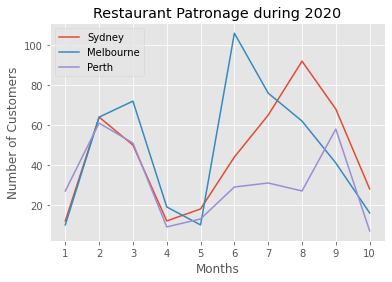

In [102]:
#Create Plot
plt.style.use('ggplot')
plt.plot(sydney_df['Month'],sydney_df['Count'],label='Sydney')
plt.plot(melbourne_df['Month'],melbourne_df['Count'],label='Melbourne')
plt.plot(perth_df['Month'],perth_df['Count'],label='Perth')
plt.xticks((1,2,3,4,5,6,7,8,9,10))

#Label
plt.xlabel('Months')
plt.ylabel('Number of Customers')
plt.title("Restaurant Patronage during 2020")

#Add Legend
plt.legend()

#Plot 
plt.show()

PART THREE: Retrieving Good Food Guide and Gourmet Traveller Data

In [28]:
#Get Zomato Restaurant CSV file
multi_city = "Multi_Restaurant_Data.csv"

#Read Zomato Restaurant CSV file
multi_df = pd.read_csv(multi_city)

#Get Gourmet Traveller 2019 Ratings CSV file
gt_resto_rating = "GT_Top_Restaurants.csv"

#Read Gourmet Traveller 2019 Ratings CSV file
gt_resto_rating_df = pd.read_csv(gt_resto_rating)

#Get Gourmet Traveller 2019 without Ratings CSV file
gt_resto = "GT_Top_Resto.csv"

#Read Gourmet Traveller 2019 without Ratings CSV file
gt_resto_df = pd.read_csv(gt_resto)

#Get Good Food Guide 2020 Ratings CSV file
gf_resto_rating = "GF_Top_Restaurants.csv"

#Read Good Food Guide 2020 Ratings CSV file
gf_resto_rating_df = pd.read_csv(gf_resto_rating)

#Get Good Food Guide 2020 without Ratings CSV file
gf_resto = "GF_Top_Resto.csv"

#Read Good Food Guide 2020 without Ratings CSV file
gf_resto_df = pd.read_csv(gf_resto)

In [29]:
#Print Gourmet Traveller 2019 Ratings without Ratings DataFrame
gt_resto_rating_df

Rating              Name       City   Latitude   Longitude
0        1             Quay    Sydney   -33.857606  151.207970
1        2   Momofuku Seiobo     Sydney -33.869509  151.193575
2        3            Orana    Adelaide -34.922622  138.607939
3        4           Attica   Melbourne -37.877005  144.995120
4        5              Brae  Melbourne -38.346922  143.805033
..     ...               ...        ...        ...         ...
95      96           Yellow    Sydney   -33.868693  151.223245
96      97     Bar Lourinhã   Melbourne -37.812811  144.970330
97      98  Gerard's Bistro    Brisbane -27.456514  153.036807
98      99       St Isidore    Sydney   -35.320556  150.430867
99     100             Ides   Melbourne -37.805613  144.981219

[100 rows x 5 columns]

In [30]:
#Merge Zomato Restaurant and Gourmet Traveller 2019 without Ratings DataFrames
merged_gtzom_resto = pd.merge(multi_df, gt_resto_df, on='Name', how='inner')

#Print DataFrame
merged_gtzom_resto

Restaurant ID                  Name  \
0       16597743  Rockpool Bar & Grill   
1       16572235  Rockpool Bar & Grill   
2       16559790  Rockpool Bar & Grill   
3       16586014           Minamishima   
4       16573067           Cutler & Co   
5       15547004     Restaurant Hubert   

                                   Cuisine                    Locality  \
0       Steak, Modern Australian, Bar Food                    Burswood   
1               Seafood, Steak, Australian  Crown Melbourne, Southbank   
2  Seafood, Steak, Modern Australian, Poké                         CBD   
3                          Japanese, Sushi                    Richmond   
4                        Modern Australian                     Fitzroy   
5                         French, European                         CBD   

        City  Rating  Total Number Ratings Delivery   Latitude   Longitude  
0      Perth     4.2                   791       No -31.961158  115.894267  
1  Melbourne     4.5                  1093       No -37.821970  144.960356  
2     Sydney     4.6                   397       No -33.866030  151.210022  
3  Melbourne     4.9                   293       No -37.819831  145.005194  
4  Melbourne     4.7                   569       No -37.805571  144.975943  
5     Sydney     4.9                   232       No -33.865381  151.210490

In [31]:
#Print Good Food Guide 2020 Ratings
gf_resto_rating_df

Name       City   Latitude   Longitude  Rating
0                      Quay   Sydney   -33.857606  151.207970       3
1                  Sixpenny   Sydney   -33.892536  151.162530       3
2                    Attica  Melbourne -37.877005  144.995120       3
3                      Brae  Melbourne -38.346922  143.805033       3
4               Minamishima  Melbourne -37.819748  145.002904       3
..                      ...        ...        ...         ...     ...
192  Rockpool Bar and Grill      Perth -31.961176  115.892067       1
193             Vasse Felix      Perth -33.822464  115.035537       1
194              Wildflower      Perth -32.950910  114.306012       1
195                   Yarri      Perth -33.615113  115.102250       1
196            Young George      Perth -32.044027  115.757860       1

[197 rows x 5 columns]

In [32]:
#Merge Zomato Restaurant and Good Food Guide 2020 without Ratings DataFrames
merged_gfzom_resto = pd.merge(multi_df, gf_resto_df, on='Name', how='inner')

#Print DataFrame
merged_gfzom_resto

Restaurant ID                      Name                        Cuisine  \
0        16595766                 Balthazar    European, Modern Australian   
1        16585905                   Tipo 00                        Italian   
2        16582897               Supernormal                  Asian, Fusion   
3        16571189              Cumulus Inc.  Modern European, Contemporary   
4        16586014               Minamishima                Japanese, Sushi   
5        16570775                    Attica       Australian, Contemporary   
6        16573419                      Coda                  Asian, Fusion   
7        16564570                     Sokyo                       Japanese   
8        16565634                  Mr. Wong    Cantonese, Chinese, Yum Cha   
9        16558798                      Quay              Modern Australian   
10       15547004         Restaurant Hubert               French, European   
11       16569007               Cho Cho San        Japanese, Asian, Fusion   
12       16559171                 Tetsuya's                       Japanese   
13       16557147                      Aria              Modern Australian   
14       16558709  The Restaurant Pendolino                        Italian   
15       16559582              Spice Temple       Chinese, Fusion, Yum Cha   
16       16588993                     Orana                     Australian   
17       16602348                 Aubergine               European, French   
18       16610196                      Subo              Modern Australian   
19       16609714                    Caveau                         French   
20       16606906                     Tulip              Modern Australian   
21       17858245                      Igni              Modern Australian   

                      Locality        City  Rating  Total Number Ratings  \
0                    Perth CBD       Perth     4.5                   286   
1                          CBD   Melbourne     4.9                   721   
2                          CBD   Melbourne     4.5                  1022   
3                          CBD   Melbourne     4.7                  1124   
4                     Richmond   Melbourne     4.9                   293   
5                    Ripponlea   Melbourne     4.8                   496   
6                          CBD   Melbourne     4.6                   562   
7            The Star, Pyrmont      Sydney     4.8                   574   
8           Establishment, CBD      Sydney     4.5                   647   
9                Circular Quay      Sydney     4.9                   452   
10                         CBD      Sydney     4.9                   232   
11                 Potts Point      Sydney     4.5                   256   
12                         CBD      Sydney     4.9                   330   
13               Circular Quay      Sydney     4.4                   330   
14      The Strand Arcade, CBD      Sydney     4.6                   192   
15                         CBD      Sydney     4.3                   244   
16  Rundle Street, City Centre    Adelaide     4.9                    77   
17                    Griffith         ACT     4.9                    58   
18                   Newcastle   Newcastle     4.4                    15   
19                  Wollongong  Wollongong     3.9                    24   
20                Geelong West     Geelong     4.6                    63   
21                 Geelong CBD     Geelong     4.1                    43   

   Delivery   Latitude   Longitude  
0        No -31.956594  115.858169  
1        No -37.813528  144.961973  
2        No -37.816048  144.968372  
3        No -37.814794  144.973136  
4        No -37.819831  145.005194  
5        No -37.876924  144.997312  
6        No -37.815822  144.969964  
7        No -33.869555  151.195900  
8        No -33.864141  151.208141  
9        No -33.858029  151.209970  
10       No -33.865381  151.210490  
11       No -33.

# OPEN MAPS.ipynb NEXT